In [1]:
import numpy as np
import pandas as pd
import itertools
import os

In [2]:
FILE_DIR = "testResultSmall"
nExperimentReptition = 10
randomSeed = 20220222
trueValue = 0.005
dataDistributions = ['gamma', 'lognorm', 'pareto']
dataSizes = [500, 800]

### Tail probability estimation with single threshold

In [3]:
metaDataDict = {"dataSize": 500,
                "percentageLHS": 0.99,
                "percentageRHS": 0.995,
                "thresholdPercentage": 0.7,
                "alpha": 0.05,
                "gEllipsoidalDimension": 3}

In [4]:
thresholdPercentages = np.linspace(0.6, 0.85, 11).tolist()
# served as the lhsEndpoint in the objective function: 1_{lhs<=x<=rhs}.
percentageLHSs = np.linspace(0.9, 0.99, 10).tolist()
columnNames = ['dataDistribution','dataSize','percentageLHS', 'percentageRHS', "thresholdPercentage", "trueValue", "nrepIndex", "(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"]
cumDf1 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, percentageLHS, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, percentageLHSs, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["percentageLHS"] = percentageLHS
    metaDataDict["percentageRHS"] = percentageLHS+trueValue
    metaDataDict["thresholdPercentage"] = thresholdPercentage
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["tailProbabilityEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["percentageLHS"] = percentageLHS
    df["percentageRHS"] = percentageLHS+trueValue
    df["thresholdPercentage"] = thresholdPercentage
    df["trueValue"] = trueValue
    cumDf1 = cumDf1.append(df)

### Tail probability estimation with multiple thresholds

In [5]:
thresholdPercentages = [0.6, 0.65, 0.70, 0.75, 0.8]
# served as the lhsEndpoint in the objective function: 1_{lhs<=x<=rhs}.
percentageLHSs = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]

cumDf2 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, percentageLHS, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, percentageLHSs, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["percentageLHS"] = percentageLHS
    metaDataDict["percentageRHS"] = percentageLHS+trueValue
    metaDataDict["thresholdPercentage"] = [thresholdPercentage +
                                           increment for increment in [0, 0.01, 0.02, 0.03, 0.04]]
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["tailProbabilityEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["percentageLHS"] = percentageLHS
    df["percentageRHS"] = percentageLHS+trueValue
    df["thresholdPercentage"] = thresholdPercentage
    df["trueValue"] = trueValue
    cumDf2 = cumDf2.append(df)

### Quantile estimation with single threshold

In [6]:
import dataPreparationUtils as dpu
from scipy.stats import gamma, lognorm, pareto, genpareto
stringToDataModule = {"gamma": gamma,
                      "lognorm": lognorm,
                      "pareto": pareto,
                      "genpareto": genpareto}
metaDataDict = {"dataSize": 500,
                "quantitleValue": 0.99,
                "thresholdPercentage": 0.7,
                "alpha": 0.05,
                "gEllipsoidalDimension": 3}

In [7]:
thresholdPercentages = np.linspace(0.6, 0.85, 11).tolist()
quantitleValues = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]
columnNames = ['dataDistribution','dataSize','quantitleValue', "thresholdPercentage", "trueValue", "nrepIndex",
               "(0,CHI2)","(1,CHI2)","(2,CHI2)"]

cumDf3 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, quantitleValue, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, quantitleValues, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["quantitleValue"] = quantitleValue
    metaDataDict["thresholdPercentage"] = thresholdPercentage
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["quantileEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["quantitleValue"] = quantitleValue
    df["thresholdPercentage"] = thresholdPercentage
    trueValue = dpu.endPointGeneration(
        stringToDataModule[dataDistribution], quantitleValue, dpu.dataModuleToDefaultParamDict[stringToDataModule[dataDistribution]])        
    df["trueValue"] = trueValue
    
    cumDf3 = cumDf3.append(df)    

### Quantile estimation with multiple thresholds

In [8]:
thresholdPercentages = [0.6, 0.65, 0.70, 0.75, 0.8]
quantitleValues = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]
columnNames = ['dataDistribution','dataSize','quantitleValue', "thresholdPercentage", "trueValue", "nrepIndex",
               "(0,CHI2)","(1,CHI2)","(2,CHI2)"]

cumDf4 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, quantitleValue, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, quantitleValues, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["quantitleValue"] = quantitleValue
    metaDataDict["thresholdPercentage"] = [thresholdPercentage +
                                           increment for increment in [0, 0.01, 0.02, 0.03, 0.04]]
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["quantileEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["quantitleValue"] = quantitleValue
    df["thresholdPercentage"] = thresholdPercentage    
    trueValue = dpu.endPointGeneration(
        stringToDataModule[dataDistribution], quantitleValue, dpu.dataModuleToDefaultParamDict[stringToDataModule[dataDistribution]])    
    df["trueValue"] = trueValue
    
    cumDf4 = cumDf4.append(df)        

In [9]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','percentageLHS','thresholdPercentage'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','percentageLHS','thresholdPercentage'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','quantitleValue','thresholdPercentage'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','quantitleValue','thresholdPercentage'])
# dictGO_key = list(dictGO.keys())
# dictGO_value = list(dictGO.values())
# using the variable axs for multiple Axes

### 5.1 Selection of shape constraints. i.e. D=0, 1, 2

In [10]:
import matplotlib.pyplot as plt

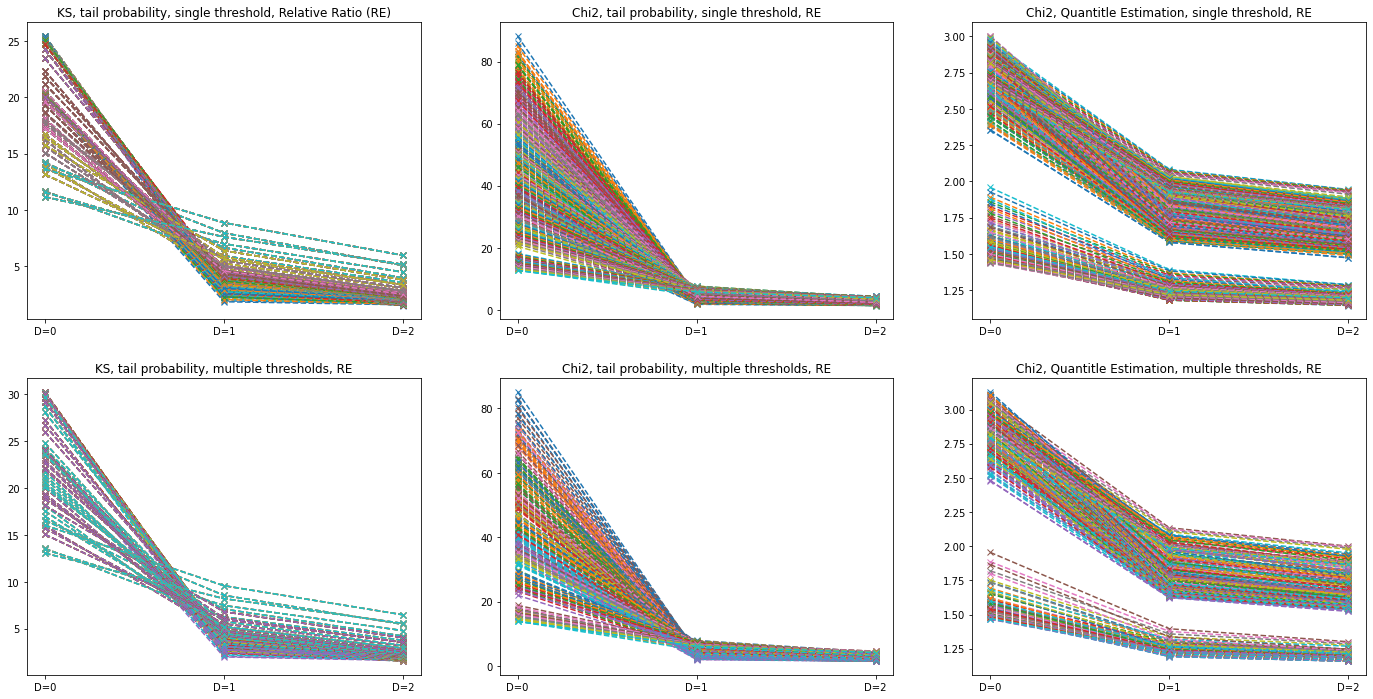

In [11]:
fig, axs = plt.subplots(2, 3,figsize=(24,12))
ks1= []
chi1 = []
for key, eachDF in go1:
#     print("KS: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))
    ks1.append((eachDF.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)']]/eachDF['trueValue'].unique()).tolist())
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3])) 
    chi1.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[0][0].plot(pd.DataFrame(data=ks1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][0].set_title("KS, tail probability, single threshold, Relative Ratio (RE)")
axs[0][1].plot(pd.DataFrame(data=chi1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][1].set_title("Chi2, tail probability, single threshold, RE")

ks2= []
chi2 = []
for key, eachDF in go2:
#     print("KS: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))
    ks2.append((eachDF.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)']]/eachDF['trueValue'].unique()).tolist())
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi2.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[1][0].plot(pd.DataFrame(data=ks2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1][0].set_title("KS, tail probability, multiple thresholds, RE")
axs[1][1].plot(pd.DataFrame(data=chi2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1][1].set_title("Chi2, tail probability, multiple thresholds, RE")

for i in range(2):
    for j in range(3):
        axs[i][j].set_xticks([0, 1, 2])     
        axs[i][j].set_xticklabels(['D=0', 'D=1', 'D=2'])

chi3 = []      
chi4 = []      
for key, eachDF in go3:
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi3.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
for key, eachDF in go4:
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi4.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[0][2].plot(pd.DataFrame(data=chi3,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][2].set_title("Chi2, Quantitle Estimation, single threshold, RE")
axs[1][2].plot(pd.DataFrame(data=chi4,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
_=axs[1][2].set_title("Chi2, Quantitle Estimation, multiple thresholds, RE")


### 5.2 Selection of shape constraints. i.e.  KS vs Chi2

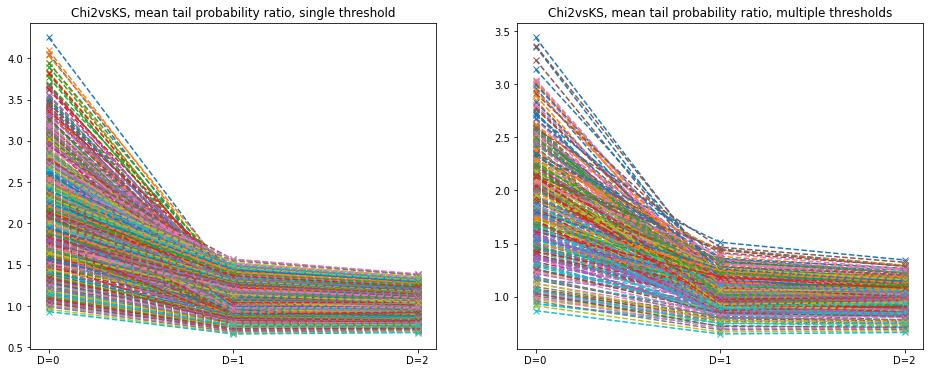

In [12]:
fig, axs = plt.subplots(1, 2,figsize=(16,6))
ksvschi1= []
for key, eachDF in go1:
    eachDF_mean = eachDF.mean(axis=0)
    ksvschi1.append([eachDF_mean['(0,CHI2)']/eachDF_mean['(0,KS)'],eachDF_mean['(1,CHI2)']/eachDF_mean['(1,KS)'],eachDF_mean['(2,CHI2)']/eachDF_mean['(2,KS)']])
    del eachDF_mean
ksvschi2= []    
for key, eachDF in go2:
    eachDF_mean = eachDF.mean(axis=0)
    ksvschi2.append([eachDF_mean['(0,CHI2)']/eachDF_mean['(0,KS)'],eachDF_mean['(1,CHI2)']/eachDF_mean['(1,KS)'],eachDF_mean['(2,CHI2)']/eachDF_mean['(2,KS)']])
    del eachDF_mean

axs[0].plot(pd.DataFrame(data=ksvschi1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0].set_title("Chi2vsKS, mean tail probability ratio, single threshold")
axs[1].plot(pd.DataFrame(data=ksvschi2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1].set_title("Chi2vsKS, mean tail probability ratio, multiple thresholds")
for i in range(2):
        axs[i].set_xticks([0, 1, 2])     
        axs[i].set_xticklabels(['D=0', 'D=1', 'D=2'])

### 5.3 Selection of Threshold

In [13]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','percentageLHS'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','percentageLHS'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','quantitleValue'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','quantitleValue'])

In [14]:
for key, eachDF in go1:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, dataSize is {:}, percentageLHS is {:}".format(key[0],key[1],key[2]))
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

for key, eachDF in go2:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, dataSize is {:}, percentageLHS is {:}".format(key[0],key[1],key[2]))        
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
for key, eachDF in go3:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, dataSize is {:}, quantitleValue is {:}".format(key[0],key[1],key[2]))        
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
for key, eachDF in go4:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, dataSize is {:}, quantitleValue is {:}".format(key[0],key[1],key[2]))                
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.294407  2.717356  1.515284  73.067762  2.695804   
1                 0.625  25.294407  2.722565  1.527557  72.331016  2.664024   
2                 0.650  25.294407  2.723549  1.539918  71.775252  2.577397   
3                 0.675  25.294407  2.715161  1.556837  70.921902  2.569057   
4                 0.700  25.294407  2.695030  1.578708  68.662589  2.530367   
5                 0.725  25.294407  2.671917  1.603977  65.268107  2.496597   
6                 0.750  25.294407  2.604434  1.626346  60.269938  2.404286   
7                 0.775  25.294407  2.434581  1.638337  54.202681  2.357752   
8                 0.800  25.294408  2.234662  1.631779  46.594237  2.220559   
9                 0.825  25.294407  2.062048  1.630649  38.799075  2.062045   
10                0.850  25.294408  1.904283  1.628076  29.988733  1.904279   

    (2,CHI2)  
0   1.538771  
1   1.541291  
2   1.522333  
3   1.536478  
4   1.537723  
5   1.533589  
6   1.514849  
7   1.512236  
8   1.517336  
9   1.539358  
10  1.517879

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.454407  2.865946  1.555602  68.368621  2.874330   
1                 0.625  25.454407  2.873992  1.564681  67.400408  2.836628   
2                 0.650  25.454407  2.879474  1.575335  66.663770  2.742922   
3                 0.675  25.454407  2.891864  1.594211  66.000439  2.729959   
4                 0.700  25.454407  2.879037  1.613433  65.128966  2.681470   
5                 0.725  25.454407  2.886778  1.637989  63.272155  2.626821   
6                 0.750  25.454408  2.841274  1.662156  59.709931  2.532860   
7                 0.775  25.454408  2.689639  1.682056  55.144077  2.491120   
8                 0.800  25.454409  2.468775  1.684821  48.473328  2.380486   
9                 0.825  25.454410  2.278078  1.690856  41.308055  2.261161   
10                0.850  25.454411  2.103785  1.693563  32.683353  2.096625   

    (2,CHI2)  
0   1.595334  
1   1.596898  
2   1.577753  
3   1.590157  
4   1.588507  
5   1.581264  
6   1.559654  
7   1.551180  
8   1.552666  
9   1.574561  
10  1.545209

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.214407  3.021834  1.608673  63.820556  3.088622   
1                 0.625  25.214408  3.026557  1.614253  62.667193  3.045567   
2                 0.650  25.214408  3.039633  1.622625  61.728980  2.945742   
3                 0.675  25.214407  3.065672  1.639555  60.780882  2.923561   
4                 0.700  25.214408  3.070947  1.654250  60.026452  2.863019   
5                 0.725  25.214409  3.081383  1.674226  59.272338  2.795173   
6                 0.750  25.214408  3.072971  1.697908  57.579990  2.690932   
7                 0.775  25.214409  2.992778  1.723006  54.409623  2.620612   
8                 0.800  25.214408  2.762443  1.738554  49.487409  2.532583   
9                 0.825  25.214408  2.549062  1.754362  43.254883  2.449385   
10                0.850  25.214409  2.354036  1.764289  35.297506  2.290284   

    (2,CHI2)  
0   1.660844  
1   1.661604  
2   1.642481  
3   1.652945  
4   1.649055  
5   1.639500  
6   1.615481  
7   1.602221  
8   1.597961  
9   1.617004  
10  1.576152

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  24.810246  3.194161  1.677953  59.383276  3.346553   
1                 0.625  24.810246  3.194574  1.680571  58.085598  3.299079   
2                 0.650  24.810246  3.200458  1.686524  56.991009  3.194997   
3                 0.675  24.810246  3.214546  1.698898  55.794113  3.164097   
4                 0.700  24.810249  3.224276  1.707958  54.749771  3.092405   
5                 0.725  24.810248  3.232868  1.719745  54.007439  3.012357   
6                 0.750  24.810249  3.241772  1.736323  53.270067  2.892932   
7                 0.775  24.810249  3.258754  1.760349  51.875760  2.801749   
8                 0.800  24.810248  3.121813  1.789228  48.674142  2.701031   
9                 0.825  24.810249  2.899179  1.818742  44.220568  2.656944   
10                0.850  24.810247  2.677367  1.838891  37.396699  2.478398   

    (2,CHI2)  
0   1.737088  
1   1.737407  
2   1.718851  
3   1.727441  
4   1.721937  
5   1.710712  
6   1.684957  
7   1.667812  
8   1.658536  
9   1.669253  
10  1.616831

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  24.260807  3.407353  1.767665  55.009818  3.655191   
1                 0.625  24.260807  3.407355  1.768542  53.605718  3.606416   
2                 0.650  24.260806  3.408698  1.771646  52.394511  3.501828   
3                 0.675  24.260806  3.416364  1.778461  51.011522  3.463074   
4                 0.700  24.260807  3.417944  1.781893  49.742071  3.382001   
5                 0.725  24.260808  3.421078  1.785419  48.733367  3.291607   
6                 0.750  24.260807  3.429710  1.792663  47.892969  3.159708   
7                 0.775  24.260806  3.447794  1.806129  47.127137  3.048957   
8                 0.800  24.260805  3.414255  1.838458  45.827312  2.941863   
9                 0.825  24.260805  3.297343  1.879886  43.148612  2.862957   
10                0.850  24.260805  3.104070  1.912994  38.423652  2.661425   

    (2,CHI2)  
0   1.826247  
1   1.826425  
2   1.809525  
3   1.816552  
4   1.810016  
5   1.797954  
6   1.771656  
7   1.751449  
8   1.737147  
9   1.739769  
10  1.679262

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  22.361925  3.600809  1.874962  49.737134  4.000935   
1                 0.625  22.361925  3.600811  1.874976  48.849116  3.962563   
2                 0.650  22.361925  3.600810  1.876366  47.849752  3.870800   
3                 0.675  22.361925  3.600810  1.878771  46.361954  3.830494   
4                 0.700  22.361926  3.600810  1.878772  44.934384  3.746281   
5                 0.725  22.361924  3.600810  1.880574  43.737426  3.649893   
6                 0.750  22.361924  3.600806  1.883192  42.643649  3.510476   
7                 0.775  22.361924  3.601590  1.888041  41.667937  3.383158   
8                 0.800  22.361924  3.620359  1.910713  40.799407  3.255997   
9                 0.825  22.361924  3.611133  1.943839  39.670294  3.165078   
10                0.850  22.361924  3.535298  1.982020  37.229350  2.928385   

    (2,CHI2)  
0   1.931322  
1   1.931766  
2   1.917798  
3   1.923310  
4   1.916676  
5   1.905244  
6   1.880373  
7   1.858263  
8   1.840098  
9   1.835575  
10  1.769832

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.547206  3.795748  2.008432  42.738393  4.347139   
1                 0.625  20.547206  3.795748  2.008433  42.222485  4.327278   
2                 0.650  20.547205  3.795747  2.008623  41.740968  4.269182   
3                 0.675  20.547205  3.795747  2.008806  40.946744  4.242031   
4                 0.700  20.547204  3.795748  2.008810  40.041626  4.174429   
5                 0.725  20.547204  3.795748  2.008991  38.893147  4.093627   
6                 0.750  20.547204  3.795747  2.009006  37.653553  3.966484   
7                 0.775  20.547204  3.795747  2.009412  36.457744  3.831868   
8                 0.800  20.547204  3.815582  2.022513  35.274883  3.688558   
9                 0.825  20.547204  3.835094  2.037905  34.297702  3.567475   
10                0.850  20.547204  3.874053  2.066089  33.310386  3.299247   

    (2,CHI2)  
0   2.055771  
1   2.057000  
2   2.048313  
3   2.051999  
4   2.046373  
5   2.037394  
6   2.017178  
7   1.995580  
8   1.976343  
9   1.964952  
10  1.897528

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  18.587206  4.134141  2.214735  35.141036  4.655390   
1                 0.625  18.587206  4.134141  2.214734  34.714068  4.637298   
2                 0.650  18.587204  4.134141  2.214733  34.307395  4.622414   
3                 0.675  18.587204  4.134141  2.214735  33.833556  4.601911   
4                 0.700  18.587204  4.134142  2.214732  33.348311  4.566447   
5                 0.725  18.587204  4.134142  2.214734  32.753778  4.528988   
6                 0.750  18.587204  4.134142  2.214732  32.082135  4.467987   
7                 0.775  18.587204  4.134142  2.214734  31.272875  4.373002   
8                 0.800  18.587204  4.134141  2.220109  30.048693  4.259134   
9                 0.825  18.587204  4.140276  2.226191  28.751002  4.132423   
10                0.850  18.587204  4.143330  2.234224  27.811422  3.863385   

    (2,CHI2)  
0   2.215334  
1   2.213880  
2   2.211187  
3   2.209708  
4   2.204612  
5   2.200535  
6   2.190386  
7   2.173167  
8   2.157960  
9   2.143495  
10  2.083769

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  16.707205  4.771857  2.635869  26.503923  5.154622   
1                 0.625  16.707205  4.771857  2.635868  26.288894  5.092231   
2                 0.650  16.707204  4.771856  2.635870  26.068373  5.055930   
3                 0.675  16.707204  4.771856  2.635869  25.830150  4.985413   
4                 0.700  16.707204  4.771856  2.635868  25.483659  4.933365   
5                 0.725  16.707204  4.771857  2.635867  25.036260  4.899959   
6                 0.750  16.707204  4.771857  2.635868  24.575389  4.875042   
7                 0.775  16.707204  4.771857  2.635868  24.144430  4.829399   
8                 0.800  16.707204  4.771856  2.635866  23.518597  4.776989   
9                 0.825  16.707204  4.771856  2.635868  22.779661  4.702962   
10                0.850  16.707204  4.771856  2.635867  22.063503  4.591040   

    (2,CHI2)  
0   2.488431  
1   2.475474  
2   2.471352  
3   2.452053  
4   2.436494  
5   2.429310  
6   2.424923  
7   2.413109  
8   2.404981  
9   2.392251  
10  2.361993

SingleThreshold data source is gamma, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  14.227204  6.637628  3.952160  17.011630  5.648616   
1                 0.625  14.227204  6.637628  3.952160  16.772912  5.582154   
2                 0.650  14.227204  6.637628  3.952160  16.519639  5.544180   
3                 0.675  14.227204  6.637628  3.952160  16.297149  5.499264   
4                 0.700  14.227204  6.637628  3.952159  16.077623  5.456654   
5                 0.725  14.227204  6.637628  3.952159  15.893494  5.415481   
6                 0.750  14.227204  6.637628  3.952160  15.675550  5.358946   
7                 0.775  14.227204  6.637628  3.952159  15.432416  5.308031   
8                 0.800  14.227204  6.637628  3.952158  15.074154  5.232125   
9                 0.825  14.227204  6.637628  3.952159  14.695191  5.126655   
10                0.850  14.227204  6.637628  3.952157  14.200559  5.091279   

    (2,CHI2)  
0   3.075339  
1   3.058085  
2   3.051479  
3   3.020821  
4   2.993724  
5   2.983278  
6   2.970252  
7   2.953094  
8   2.934246  
9   2.894590  
10  2.889964

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.156415  2.557548  1.489911  69.829353  2.641498   
1                 0.625  20.156415  2.557550  1.494875  69.037607  2.575762   
2                 0.650  20.156415  2.570055  1.508615  68.402721  2.522532   
3                 0.675  20.156415  2.584417  1.524728  67.935247  2.480776   
4                 0.700  20.156415  2.593678  1.542739  66.331549  2.427969   
5                 0.725  20.156415  2.598972  1.559029  63.053455  2.387973   
6                 0.750  20.156415  2.565490  1.574624  58.192906  2.310520   
7                 0.775  20.156415  2.402022  1.588175  51.960491  2.293635   
8                 0.800  20.156415  2.228888  1.583106  44.757995  2.158986   
9                 0.825  20.156415  2.031939  1.579509  36.717875  2.021529   
10                0.850  20.156416  1.825977  1.552913  28.348703  1.825974   

    (2,CHI2)  
0   1.510164  
1   1.498662  
2   1.491823  
3   1.489075  
4   1.480546  
5   1.475327  
6   1.451006  
7   1.456621  
8   1.438658  
9   1.442281  
10  1.437055

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.406415  2.688102  1.527259  65.290203  2.817870   
1                 0.625  20.406415  2.688104  1.529550  64.304131  2.746039   
2                 0.650  20.406415  2.697950  1.540584  63.409217  2.685213   
3                 0.675  20.406415  2.708450  1.555590  62.680193  2.633736   
4                 0.700  20.406415  2.718641  1.569484  62.210515  2.569317   
5                 0.725  20.406415  2.721375  1.583893  60.812429  2.514215   
6                 0.750  20.406415  2.718299  1.602914  57.698370  2.419945   
7                 0.775  20.406415  2.639450  1.626181  52.916853  2.389680   
8                 0.800  20.406415  2.462395  1.625786  46.620472  2.285586   
9                 0.825  20.406415  2.244815  1.630431  39.248892  2.183134   
10                0.850  20.406416  2.017274  1.611850  31.041896  2.017267   

    (2,CHI2)  
0   1.564581  
1   1.552770  
2   1.545026  
3   1.540698  
4   1.530399  
5   1.522143  
6   1.495133  
7   1.493657  
8   1.469577  
9   1.464717  
10  1.450497

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.156415  2.827650  1.575336  60.903272  3.029590   
1                 0.625  20.156415  2.827652  1.575927  59.763616  2.952532   
2                 0.650  20.156415  2.831763  1.582968  58.663898  2.884719   
3                 0.675  20.156415  2.831765  1.593161  57.663784  2.823917   
4                 0.700  20.156415  2.832274  1.600720  56.881168  2.748365   
5                 0.725  20.156415  2.833311  1.610631  56.311946  2.678594   
6                 0.750  20.156415  2.850145  1.628240  55.239721  2.568341   
7                 0.775  20.156415  2.866298  1.659901  52.263589  2.514473   
8                 0.800  20.156415  2.723173  1.665953  47.597387  2.401147   
9                 0.825  20.156416  2.511842  1.681868  41.223858  2.316519   
10                0.850  20.156418  2.257235  1.674494  33.670529  2.187356   

    (2,CHI2)  
0   1.626884  
1   1.615226  
2   1.607040  
3   1.601430  
4   1.589711  
5   1.578951  
6   1.550055  
7   1.543006  
8   1.513863  
9   1.499107  
10  1.471986

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.131415  2.985425  1.632865  56.629165  3.283737   
1                 0.625  20.131415  2.985425  1.633156  55.371850  3.203244   
2                 0.650  20.131415  2.985425  1.637530  54.115017  3.129781   
3                 0.675  20.131415  2.985423  1.641383  52.908159  3.060604   
4                 0.700  20.131415  2.985425  1.643203  51.869418  2.974943   
5                 0.725  20.131415  2.985662  1.645070  50.958379  2.891121   
6                 0.750  20.131415  2.996312  1.655840  50.382932  2.765892   
7                 0.775  20.131415  3.030414  1.686153  49.490333  2.689560   
8                 0.800  20.131415  2.999002  1.699464  46.746976  2.566630   
9                 0.825  20.131419  2.841960  1.730026  42.225012  2.466323   
10                0.850  20.131419  2.567269  1.738870  35.772946  2.311118   

    (2,CHI2)  
0   1.698047  
1   1.687297  
2   1.679270  
3   1.673019  
4   1.660544  
5   1.647846  
6   1.617765  
7   1.606234  
8   1.572506  
9   1.548997  
10  1.513006

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.296095  3.200945  1.698392  52.405800  3.585911   
1                 0.625  20.296095  3.200946  1.698392  51.080776  3.506552   
2                 0.650  20.296095  3.200945  1.699629  49.708808  3.430139   
3                 0.675  20.296095  3.200946  1.699625  48.350331  3.354748   
4                 0.700  20.296095  3.200946  1.699821  47.123882  3.261393   
5                 0.725  20.296095  3.200945  1.700104  45.964068  3.165175   
6                 0.750  20.296095  3.203890  1.705724  45.082974  3.027232   
7                 0.775  20.296095  3.216691  1.721813  44.279742  2.929412   
8                 0.800  20.296095  3.202404  1.731010  43.634921  2.781252   
9                 0.825  20.296097  3.183548  1.768889  41.153133  2.655505   
10                0.850  20.296096  2.983594  1.799572  36.797914  2.482891   

    (2,CHI2)  
0   1.779220  
1   1.770062  
2   1.762988  
3   1.757115  
4   1.744998  
5   1.731397  
6   1.701406  
7   1.686291  
8   1.649410  
9   1.619200  
10  1.576304

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  19.340132  3.389277  1.779168  47.171429  3.910841   
1                 0.625  19.340132  3.389277  1.779176  46.359624  3.852482   
2                 0.650  19.340133  3.389277  1.779604  45.229974  3.788483   
3                 0.675  19.340133  3.389276  1.779604  43.916622  3.715689   
4                 0.700  19.340132  3.389276  1.779714  42.566738  3.620962   
5                 0.725  19.340133  3.389276  1.779871  41.235442  3.516709   
6                 0.750  19.340133  3.389276  1.781614  40.142515  3.371524   
7                 0.775  19.340133  3.394560  1.786144  39.004320  3.254806   
8                 0.800  19.340133  3.400728  1.791248  38.183772  3.085136   
9                 0.825  19.340132  3.399386  1.813859  37.567747  2.927290   
10                0.850  19.340132  3.360577  1.850756  35.469154  2.740280   

    (2,CHI2)  
0   1.871298  
1   1.865159  
2   1.859880  
3   1.854984  
4   1.844733  
5   1.832071  
6   1.804680  
7   1.787471  
8   1.749542  
9   1.714894  
10  1.665513

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  18.128208  3.580971  1.893044  40.307679  4.193446   
1                 0.625  18.128208  3.580971  1.893042  39.911934  4.171838   
2                 0.650  18.128208  3.580971  1.893042  39.365174  4.140564   
3                 0.675  18.128208  3.580970  1.893042  38.662036  4.098311   
4                 0.700  18.128208  3.580970  1.893044  37.684581  4.036471   
5                 0.725  18.128208  3.580970  1.893042  36.561775  3.947776   
6                 0.750  18.128208  3.580969  1.893043  35.444372  3.817177   
7                 0.775  18.128208  3.580968  1.894242  34.091584  3.691049   
8                 0.800  18.128208  3.580972  1.894154  32.988735  3.509972   
9                 0.825  18.128208  3.603703  1.909188  31.985345  3.327523   
10                0.850  18.128208  3.622690  1.928344  31.310693  3.102350   

    (2,CHI2)  
0   1.973609  
1   1.972345  
2   1.970699  
3   1.967824  
4   1.961509  
5   1.951411  
6   1.930567  
7   1.914232  
8   1.879444  
9   1.843927  
10  1.791476

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  16.228209  3.871484  2.075042  32.382418  4.412263   
1                 0.625  16.228208  3.871485  2.075040  32.203142  4.396792   
2                 0.650  16.228208  3.871485  2.075044  31.994886  4.380729   
3                 0.675  16.228208  3.871484  2.075041  31.707963  4.365426   
4                 0.700  16.228208  3.871484  2.075042  31.243632  4.355310   
5                 0.725  16.228208  3.871484  2.075040  30.663969  4.328307   
6                 0.750  16.228209  3.871483  2.075041  30.054420  4.278206   
7                 0.775  16.228211  3.871483  2.075043  29.115506  4.195392   
8                 0.800  16.228210  3.871483  2.075042  28.076443  4.065936   
9                 0.825  16.228208  3.872493  2.079242  26.856683  3.897012   
10                0.850  16.228208  3.877910  2.084787  25.772604  3.661097   

    (2,CHI2)  
0   2.098235  
1   2.097888  
2   2.096915  
3   2.094786  
4   2.093264  
5   2.088390  
6   2.080087  
7   2.068772  
8   2.045253  
9   2.016669  
10  1.969934

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  14.103211  4.379771  2.424652  23.892528  4.836225   
1                 0.625  14.103210  4.379771  2.424652  23.696093  4.788513   
2                 0.650  14.103209  4.379771  2.424652  23.517579  4.730872   
3                 0.675  14.103209  4.379771  2.424652  23.361773  4.670389   
4                 0.700  14.103209  4.379771  2.424651  23.191782  4.625741   
5                 0.725  14.103210  4.379771  2.424651  22.978605  4.579949   
6                 0.750  14.103209  4.379770  2.424650  22.712797  4.556347   
7                 0.775  14.103210  4.379770  2.424650  22.301853  4.513768   
8                 0.800  14.103208  4.379771  2.424650  21.761772  4.495008   
9                 0.825  14.103208  4.379771  2.424659  21.262201  4.452332   
10                0.850  14.103208  4.379770  2.424656  20.484160  4.354966   

    (2,CHI2)  
0   2.335981  
1   2.325853  
2   2.310044  
3   2.292828  
4   2.279949  
5   2.266591  
6   2.265995  
7   2.257562  
8   2.252287  
9   2.240748  
10  2.218821

SingleThreshold data source is gamma, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  11.653208  5.903550  3.535552  15.177549  5.144107   
1                 0.625  11.653208  5.903550  3.535553  14.916539  5.115770   
2                 0.650  11.653208  5.903549  3.535553  14.662174  5.084763   
3                 0.675  11.653208  5.903550  3.535551  14.419911  5.057585   
4                 0.700  11.653208  5.903550  3.535552  14.191882  5.003215   
5                 0.725  11.653208  5.903550  3.535552  13.981373  4.951737   
6                 0.750  11.653208  5.903550  3.535551  13.780759  4.903402   
7                 0.775  11.653208  5.903550  3.535551  13.595596  4.854270   
8                 0.800  11.653208  5.903549  3.535550  13.372198  4.798686   
9                 0.825  11.653208  5.903549  3.535551  13.114998  4.759167   
10                0.850  11.653208  5.903549  3.535551  12.817849  4.703937   

    (2,CHI2)  
0   2.819685  
1   2.812437  
2   2.800531  
3   2.784547  
4   2.763683  
5   2.739002  
6   2.726724  
7   2.710011  
8   2.694669  
9   2.672331  
10  2.657439

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.454407  3.398972  1.939700  83.229283  3.765554   
1                 0.625  25.454407  3.398973  1.941397  81.509873  3.681238   
2                 0.650  25.454407  3.398973  1.941394  78.813587  3.521542   
3                 0.675  25.454407  3.403477  1.946040  75.360547  3.424044   
4                 0.700  25.454407  3.403477  1.951348  70.682641  3.290515   
5                 0.725  25.454407  3.415315  1.965458  65.789251  3.206843   
6                 0.750  25.454407  3.428573  1.990056  59.778879  3.053794   
7                 0.775  25.454408  3.474380  2.050199  53.671743  3.029358   
8                 0.800  25.454408  3.250364  2.036080  46.579084  2.861350   
9                 0.825  25.454409  2.848091  2.019420  39.684715  2.656819   
10                0.850  25.454409  2.653485  2.078999  32.079837  2.500768   

    (2,CHI2)  
0   2.045978  
1   2.021383  
2   1.957519  
3   1.921028  
4   1.865299  
5   1.829806  
6   1.756101  
7   1.766136  
8   1.723825  
9   1.708701  
10  1.750487

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.294407  3.568458  1.985694  77.795510  4.046213   
1                 0.625  25.294407  3.568458  1.985947  76.555429  3.947349   
2                 0.650  25.294407  3.568458  1.985949  74.888833  3.772453   
3                 0.675  25.294407  3.568827  1.988955  72.855022  3.657024   
4                 0.700  25.294407  3.568826  1.989273  69.525003  3.501890   
5                 0.725  25.294407  3.568835  1.995561  65.434027  3.393194   
6                 0.750  25.294408  3.581997  2.010166  60.244060  3.212843   
7                 0.775  25.294408  3.629493  2.058581  54.764775  3.188479   
8                 0.800  25.294408  3.455050  2.072458  48.113825  3.015244   
9                 0.825  25.294408  3.196881  2.082109  41.477286  2.839660   
10                0.850  25.294408  2.986896  2.158934  33.903787  2.705958   

    (2,CHI2)  
0   2.159499  
1   2.132125  
2   2.065746  
3   2.025351  
4   1.964829  
5   1.921980  
6   1.840095  
7   1.834545  
8   1.778461  
9   1.749012  
10  1.772360

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.174407  3.752055  2.044734  71.652335  4.386998   
1                 0.625  25.174407  3.752055  2.044846  70.720627  4.273954   
2                 0.650  25.174408  3.752055  2.044848  69.633886  4.084693   
3                 0.675  25.174407  3.752055  2.045867  68.250151  3.951618   
4                 0.700  25.174409  3.752055  2.045869  66.348914  3.775156   
5                 0.725  25.174409  3.752055  2.046889  63.705182  3.641205   
6                 0.750  25.174410  3.756443  2.051827  59.695467  3.433058   
7                 0.775  25.174410  3.773502  2.074577  55.005954  3.373806   
8                 0.800  25.174409  3.735946  2.107756  49.186569  3.195855   
9                 0.825  25.174408  3.563208  2.129591  43.034624  3.000745   
10                0.850  25.174409  3.389302  2.227265  35.753544  2.884374   

    (2,CHI2)  
0   2.291143  
1   2.261220  
2   2.192968  
3   2.149554  
4   2.085263  
5   2.035625  
6   1.947015  
7   1.926368  
8   1.856920  
9   1.817417  
10  1.807780

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.079687  3.979312  2.108878  65.466067  4.799287   
1                 0.625  25.079687  3.979311  2.108874  64.457698  4.674072   
2                 0.650  25.079687  3.979310  2.108876  63.540847  4.472698   
3                 0.675  25.079688  3.979313  2.108874  62.610016  4.323037   
4                 0.700  25.079690  3.979312  2.108876  61.314362  4.126567   
5                 0.725  25.079690  3.979312  2.108874  59.665725  3.967494   
6                 0.750  25.079689  3.979313  2.109931  57.346288  3.731284   
7                 0.775  25.079687  3.985979  2.116069  54.051391  3.631298   
8                 0.800  25.079688  4.021390  2.145421  49.226936  3.426834   
9                 0.825  25.079689  3.892317  2.169006  44.001805  3.231299   
10                0.850  25.079688  3.816259  2.271437  37.366980  3.088361   

    (2,CHI2)  
0   2.442662  
1   2.411383  
2   2.343178  
3   2.297527  
4   2.230337  
5   2.174966  
6   2.081138  
7   2.047686  
8   1.964642  
9   1.915441  
10  1.873814

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  24.256644  4.155563  2.198849  59.082115  5.281520   
1                 0.625  24.256644  4.155563  2.198848  58.171696  5.153468   
2                 0.650  24.256644  4.155562  2.198847  57.285264  4.949851   
3                 0.675  24.256644  4.155563  2.198847  56.312713  4.788589   
4                 0.700  24.256644  4.155562  2.198846  55.329722  4.576116   
5                 0.725  24.256644  4.155564  2.198846  54.235595  4.393490   
6                 0.750  24.256644  4.155563  2.198845  52.716896  4.130836   
7                 0.775  24.256644  4.156321  2.199903  50.785581  3.990069   
8                 0.800  24.256644  4.173455  2.213203  47.827092  3.740673   
9                 0.825  24.256644  4.112994  2.234305  43.779124  3.546996   
10                0.850  24.256644  4.126517  2.314903  38.252384  3.353830   

    (2,CHI2)  
0   2.612775  
1   2.582127  
2   2.517782  
3   2.472716  
4   2.405146  
5   2.345517  
6   2.248446  
7   2.204617  
8   2.111382  
9   2.048020  
10  1.977801

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  21.867204  4.351562  2.320710  52.346281  5.780771   
1                 0.625  21.867204  4.351562  2.320710  51.482715  5.674304   
2                 0.650  21.867204  4.351562  2.320710  50.826260  5.499251   
3                 0.675  21.867204  4.351561  2.320707  49.968840  5.347470   
4                 0.700  21.867204  4.351562  2.320708  49.008413  5.138864   
5                 0.725  21.867204  4.351560  2.320708  47.963188  4.939127   
6                 0.750  21.867204  4.351561  2.320707  46.920310  4.659820   
7                 0.775  21.867204  4.351561  2.320707  45.566095  4.480997   
8                 0.800  21.867204  4.351559  2.321561  43.838351  4.191797   
9                 0.825  21.867204  4.352604  2.335339  41.568790  3.968345   
10                0.850  21.867204  4.412733  2.388163  37.806898  3.709715   

    (2,CHI2)  
0   2.795745  
1   2.768030  
2   2.713701  
3   2.673641  
4   2.611311  
5   2.551411  
6   2.455776  
7   2.405372  
8   2.305148  
9   2.225210  
10  2.128168

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  19.747208  4.611013  2.493467  45.281325  6.156263   
1                 0.625  19.747207  4.611013  2.493467  44.518577  6.089010   
2                 0.650  19.747206  4.611013  2.493466  43.903273  5.991562   
3                 0.675  19.747206  4.611013  2.493464  43.159196  5.895827   
4                 0.700  19.747204  4.611013  2.493466  42.452113  5.748880   
5                 0.725  19.747205  4.611013  2.493465  41.560776  5.574077   
6                 0.750  19.747204  4.611012  2.493465  40.573176  5.313452   
7                 0.775  19.747204  4.611012  2.493464  39.364382  5.115066   
8                 0.800  19.747204  4.611013  2.493255  38.277205  4.813176   
9                 0.825  19.747204  4.618900  2.498881  36.842676  4.550387   
10                0.850  19.747204  4.639985  2.519981  34.780249  4.226452   

    (2,CHI2)  
0   2.981061  
1   2.958307  
2   2.920338  
3   2.890507  
4   2.841650  
5   2.788148  
6   2.703293  
7   2.653065  
8   2.555933  
9   2.469125  
10  2.354722

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  17.907206  5.005091  2.765535  37.242423  6.460466   
1                 0.625  17.907206  5.005091  2.765533  36.597423  6.396027   
2                 0.650  17.907206  5.005092  2.765534  36.035025  6.344097   
3                 0.675  17.907206  5.005091  2.765532  35.376471  6.276940   
4                 0.700  17.907204  5.005091  2.765532  34.744886  6.190414   
5                 0.725  17.907204  5.005091  2.765532  34.175237  6.081831   
6                 0.750  17.907204  5.005091  2.765532  33.710934  5.926331   
7                 0.775  17.907204  5.005091  2.765530  32.884914  5.775049   
8                 0.800  17.907204  5.005091  2.762213  31.881653  5.553875   
9                 0.825  17.907204  5.005091  2.765530  30.779489  5.314401   
10                0.850  17.907204  5.005091  2.765529  29.554312  4.997264   

    (2,CHI2)  
0   3.180756  
1   3.155157  
2   3.131032  
3   3.112271  
4   3.082393  
5   3.041466  
6   2.977835  
7   2.934133  
8   2.863152  
9   2.789572  
10  2.680076

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  16.427204  5.797554  3.317555  27.907856  6.799843   
1                 0.625  16.427205  5.797555  3.317554  27.527572  6.725611   
2                 0.650  16.427204  5.797554  3.317551  27.198919  6.684342   
3                 0.675  16.427204  5.797554  3.317553  26.799263  6.611240   
4                 0.700  16.427204  5.797554  3.317551  26.346502  6.549445   
5                 0.725  16.427204  5.797554  3.317550  25.898848  6.455340   
6                 0.750  16.427204  5.797554  3.317549  25.499232  6.355756   
7                 0.775  16.427204  5.797554  3.317548  24.819901  6.244874   
8                 0.800  16.427204  5.797553  3.317548  24.244237  6.121086   
9                 0.825  16.427204  5.797553  3.317548  23.612822  5.967266   
10                0.850  16.427204  5.797553  3.317546  22.719112  5.784072   

    (2,CHI2)  
0   3.495551  
1   3.452824  
2   3.430025  
3   3.404321  
4   3.388383  
5   3.349673  
6   3.303873  
7   3.251860  
8   3.212743  
9   3.172313  
10  3.102458

SingleThreshold data source is lognorm, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  14.107204  7.935958  5.057790  16.703314  6.571411   
1                 0.625  14.107204  7.935957  5.057783  16.435228  6.491759   
2                 0.650  14.107204  7.935957  5.057789  16.240299  6.460311   
3                 0.675  14.107204  7.935957  5.057790  15.976740  6.393485   
4                 0.700  14.107204  7.935957  5.057778  15.750535  6.350995   
5                 0.725  14.107204  7.935957  5.057775  15.507046  6.295834   
6                 0.750  14.107204  7.935957  5.057779  15.333141  6.276108   
7                 0.775  14.107204  7.935957  5.057772  15.063782  6.193001   
8                 0.800  14.107204  7.935958  5.057773  14.762299  6.120184   
9                 0.825  14.107204  7.935957  5.057767  14.440044  6.016842   
10                0.850  14.107204  7.935957  5.057769  14.093700  5.888567   

    (2,CHI2)  
0   4.039972  
1   3.998631  
2   3.980220  
3   3.948754  
4   3.926810  
5   3.906142  
6   3.896458  
7   3.839213  
8   3.790034  
9   3.732002  
10  3.663130

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.281415  3.128396  1.880933  82.275259  3.684640   
1                 0.625  20.281415  3.128396  1.880932  80.049582  3.584774   
2                 0.650  20.281415  3.128396  1.880929  77.236056  3.446476   
3                 0.675  20.281415  3.128395  1.880934  73.561247  3.335176   
4                 0.700  20.281415  3.129393  1.889181  68.762900  3.212103   
5                 0.725  20.281415  3.129391  1.898326  63.305125  3.138730   
6                 0.750  20.281415  3.143735  1.918430  57.452185  3.036539   
7                 0.775  20.281415  3.157562  1.961591  51.227049  2.997126   
8                 0.800  20.281415  3.113851  1.977591  44.676818  2.869781   
9                 0.825  20.281415  2.708648  1.965376  37.906226  2.620930   
10                0.850  20.281416  2.516089  1.980441  31.095761  2.511952   

    (2,CHI2)  
0   1.971574  
1   1.942738  
2   1.885610  
3   1.843362  
4   1.790413  
5   1.758490  
6   1.708599  
7   1.686060  
8   1.658421  
9   1.696069  
10  1.708284

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.081415  3.249614  1.926220  77.011067  3.948288   
1                 0.625  20.081415  3.249614  1.926217  75.674944  3.832185   
2                 0.650  20.081415  3.249614  1.926217  73.829345  3.677333   
3                 0.675  20.081415  3.249614  1.926215  71.244730  3.546272   
4                 0.700  20.081415  3.249614  1.929195  67.980665  3.401535   
5                 0.725  20.081415  3.249614  1.930568  63.519619  3.300814   
6                 0.750  20.081415  3.253544  1.942726  58.135752  3.168983   
7                 0.775  20.081415  3.270604  1.974334  52.290130  3.089336   
8                 0.800  20.081415  3.258424  2.002408  46.028578  2.965370   
9                 0.825  20.081415  3.061338  2.034414  39.396105  2.841129   
10                0.850  20.081416  2.895740  2.064545  32.541168  2.679798   

    (2,CHI2)  
0   2.078389  
1   2.046983  
2   1.986635  
3   1.940793  
4   1.882672  
5   1.842781  
6   1.782898  
7   1.743270  
8   1.698001  
9   1.722352  
10  1.714195

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.206415  3.427834  1.976712  70.976819  4.272996   
1                 0.625  20.206415  3.427834  1.976715  69.996672  4.140456   
2                 0.650  20.206415  3.427834  1.976658  68.916734  3.968972   
3                 0.675  20.206415  3.427834  1.976627  67.379179  3.817592   
4                 0.700  20.206415  3.427834  1.977162  65.101178  3.650500   
5                 0.725  20.206415  3.427834  1.977264  62.159965  3.521993   
6                 0.750  20.206415  3.429792  1.981005  58.149163  3.360082   
7                 0.775  20.206415  3.433780  1.992278  52.905410  3.241559   
8                 0.800  20.206415  3.445336  2.014786  47.081442  3.108756   
9                 0.825  20.206416  3.410905  2.082759  40.780930  3.064325   
10                0.850  20.206418  3.292698  2.124716  34.062551  2.882536   

    (2,CHI2)  
0   2.204674  
1   2.171010  
2   2.107846  
3   2.058827  
4   1.996596  
5   1.950234  
6   1.881626  
7   1.827761  
8   1.763541  
9   1.758048  
10  1.731686

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.181415  3.643560  2.028217  64.221808  4.673635   
1                 0.625  20.181415  3.643560  2.028219  63.611540  4.525112   
2                 0.650  20.181415  3.643559  2.028199  62.972481  4.337847   
3                 0.675  20.181415  3.643559  2.028191  61.941940  4.166204   
4                 0.700  20.181416  3.643559  2.028203  60.678410  3.976642   
5                 0.725  20.181415  3.643558  2.028213  58.782673  3.819754   
6                 0.750  20.181415  3.643558  2.028757  56.092222  3.626731   
7                 0.775  20.181415  3.643558  2.029326  52.587127  3.468892   
8                 0.800  20.181415  3.655748  2.042962  47.609744  3.289486   
9                 0.825  20.181417  3.722830  2.105134  41.820208  3.207065   
10                0.850  20.181418  3.646520  2.148390  35.485668  3.046867   

    (2,CHI2)  
0   2.353190  
1   2.318560  
2   2.254091  
3   2.202430  
4   2.137106  
5   2.084826  
6   2.008964  
7   1.943834  
8   1.862592  
9   1.826047  
10  1.767535

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.271095  3.898273  2.098611  57.540854  5.164262   
1                 0.625  20.271095  3.898273  2.098610  56.792840  5.004993   
2                 0.650  20.271095  3.898271  2.098611  56.252639  4.804946   
3                 0.675  20.271095  3.898272  2.098609  55.695226  4.614452   
4                 0.700  20.271095  3.898272  2.098609  54.864076  4.403742   
5                 0.725  20.271095  3.898272  2.098607  53.718258  4.218769   
6                 0.750  20.271095  3.898270  2.098609  52.206762  3.994112   
7                 0.775  20.271094  3.898272  2.098607  49.832768  3.795636   
8                 0.800  20.271094  3.899156  2.102051  46.732107  3.569576   
9                 0.825  20.271096  3.934092  2.132976  42.228275  3.421047   
10                0.850  20.271096  3.906320  2.158261  36.502396  3.220997   

    (2,CHI2)  
0   2.524678  
1   2.491160  
2   2.429301  
3   2.377093  
4   2.310877  
5   2.253743  
6   2.171661  
7   2.097506  
8   2.003222  
9   1.940935  
10  1.849122

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  19.294491  4.094975  2.191499  50.961189  5.673372   
1                 0.625  19.294491  4.094975  2.191498  50.124512  5.550787   
2                 0.650  19.294491  4.094975  2.191498  49.487060  5.376375   
3                 0.675  19.294491  4.094974  2.191496  48.795737  5.185482   
4                 0.700  19.294492  4.094974  2.191495  48.213101  4.962379   
5                 0.725  19.294491  4.094974  2.191496  47.566130  4.752248   
6                 0.750  19.294492  4.094973  2.191494  46.555074  4.497878   
7                 0.775  19.294491  4.094973  2.191497  45.230414  4.258721   
8                 0.800  19.294491  4.094974  2.191496  43.406462  3.986635   
9                 0.825  19.294491  4.094974  2.194327  40.588863  3.773027   
10                0.850  19.294491  4.111123  2.205854  36.690983  3.494367   

    (2,CHI2)  
0   2.715814  
1   2.686817  
2   2.633563  
3   2.585328  
4   2.522980  
5   2.464538  
6   2.378915  
7   2.298507  
8   2.195998  
9   2.112707  
10  1.993161

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  17.478209  4.295159  2.324608  44.384372  6.078242   
1                 0.625  17.478208  4.295159  2.324609  43.505159  5.996997   
2                 0.650  17.478208  4.295159  2.324608  42.814616  5.890955   
3                 0.675  17.478208  4.295159  2.324608  42.040563  5.762699   
4                 0.700  17.478208  4.295159  2.324608  41.347273  5.610205   
5                 0.725  17.478208  4.295158  2.324607  40.591304  5.431078   
6                 0.750  17.478208  4.295158  2.324606  39.956106  5.177456   
7                 0.775  17.478208  4.295158  2.324606  39.171637  4.909293   
8                 0.800  17.478208  4.295158  2.324606  38.092072  4.599014   
9                 0.825  17.478208  4.295158  2.324604  36.598169  4.322230   
10                0.850  17.478208  4.296052  2.326942  34.271170  3.969124   

    (2,CHI2)  
0   2.907430  
1   2.888121  
2   2.856133  
3   2.820507  
4   2.772120  
5   2.719155  
6   2.637180  
7   2.557098  
8   2.456446  
9   2.360197  
10  2.219389

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  15.653208  4.607582  2.549720  37.307856  6.370176   
1                 0.625  15.653208  4.607583  2.549724  36.524402  6.316530   
2                 0.650  15.653209  4.607582  2.549722  35.875490  6.263681   
3                 0.675  15.653210  4.607582  2.549723  35.166803  6.196819   
4                 0.700  15.653209  4.607582  2.549723  34.519481  6.117231   
5                 0.725  15.653209  4.607582  2.549722  33.696259  6.018808   
6                 0.750  15.653209  4.607582  2.549720  32.960518  5.854630   
7                 0.775  15.653208  4.607582  2.549720  32.163262  5.654443   
8                 0.800  15.653208  4.607582  2.549720  31.548894  5.423037   
9                 0.825  15.653208  4.607582  2.549720  30.660163  5.142042   
10                0.850  15.653208  4.607581  2.549725  29.482829  4.746123   

    (2,CHI2)  
0   3.108180  
1   3.091784  
2   3.077745  
3   3.060751  
4   3.035433  
5   2.997580  
6   2.935359  
7   2.871846  
8   2.795274  
9   2.703490  
10  2.559876

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  13.803209  5.226447  3.013847  28.866132  6.663949   
1                 0.625  13.803208  5.226446  3.013845  28.362619  6.588754   
2                 0.650  13.803208  5.226446  3.013846  27.895865  6.555291   
3                 0.675  13.803210  5.226446  3.013846  27.386549  6.505232   
4                 0.700  13.803208  5.226446  3.013845  26.878781  6.460690   
5                 0.725  13.803209  5.226445  3.013839  26.220455  6.406082   
6                 0.750  13.803209  5.226445  3.013838  25.614937  6.323669   
7                 0.775  13.803209  5.226445  3.013838  24.850442  6.200218   
8                 0.800  13.803210  5.226445  3.013838  24.196331  6.098172   
9                 0.825  13.803208  5.226446  3.013836  23.459539  5.930191   
10                0.850  13.803208  5.226445  3.013836  22.878421  5.696154   

    (2,CHI2)  
0   3.409931  
1   3.380984  
2   3.372800  
3   3.356145  
4   3.338920  
5   3.309936  
6   3.271256  
7   3.227999  
8   3.192489  
9   3.132050  
10  3.037983

SingleThreshold data source is lognorm, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  11.553208  6.977943  4.461379  18.194227  6.912828   
1                 0.625  11.553208  6.977946  4.461418  17.929062  6.807583   
2                 0.650  11.553208  6.977946  4.461381  17.669343  6.738311   
3                 0.675  11.553208  6.977944  4.461378  17.339446  6.661493   
4                 0.700  11.553208  6.977942  4.461360  16.981859  6.575429   
5                 0.725  11.553209  6.977942  4.461377  16.565274  6.462659   
6                 0.750  11.553209  6.977942  4.461359  16.269479  6.382574   
7                 0.775  11.553209  6.977943  4.461353  15.919678  6.294668   
8                 0.800  11.553209  6.977943  4.461351  15.546324  6.215088   
9                 0.825  11.553208  6.977942  4.461351  15.007446  6.105698   
10                0.850  11.553208  6.977941  4.461352  14.508740  6.050809   

    (2,CHI2)  
0   4.145253  
1   4.089044  
2   4.060464  
3   4.028514  
4   3.991402  
5   3.943348  
6   3.907730  
7   3.849673  
8   3.825758  
9   3.778910  
10  3.749405

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.254407  3.589998  2.060884  88.225082  4.313671   
1                 0.625  25.254407  3.589998  2.060926  85.030603  4.179617   
2                 0.650  25.254407  3.589998  2.060925  80.853730  4.002283   
3                 0.675  25.254407  3.589998  2.060924  76.433651  3.867907   
4                 0.700  25.254408  3.589998  2.060924  71.098694  3.689076   
5                 0.725  25.254408  3.589998  2.060927  65.787144  3.567016   
6                 0.750  25.254409  3.589999  2.068621  59.647529  3.376406   
7                 0.775  25.254409  3.612151  2.096622  53.683552  3.291620   
8                 0.800  25.254408  3.633759  2.122224  46.899325  3.113143   
9                 0.825  25.254408  3.320959  2.137987  40.392156  2.983227   
10                0.850  25.254409  3.122217  2.254636  33.208787  2.890401   

    (2,CHI2)  
0   2.277567  
1   2.230229  
2   2.153281  
3   2.101676  
4   2.020153  
5   1.961970  
6   1.867959  
7   1.824627  
8   1.726490  
9   1.746867  
10  1.755532

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.134408  3.744756  2.102140  83.241281  4.653179   
1                 0.625  25.134407  3.744756  2.102142  81.507485  4.500010   
2                 0.650  25.134407  3.744757  2.102138  78.749151  4.301463   
3                 0.675  25.134407  3.744756  2.102139  75.271367  4.143689   
4                 0.700  25.134408  3.744755  2.102137  70.781891  3.938676   
5                 0.725  25.134408  3.744756  2.102140  66.014523  3.787423   
6                 0.750  25.134408  3.744755  2.103125  60.347369  3.564584   
7                 0.775  25.134408  3.754844  2.115189  54.680192  3.437943   
8                 0.800  25.134409  3.770705  2.137116  48.153221  3.213980   
9                 0.825  25.134409  3.676645  2.184459  41.771603  3.127936   
10                0.850  25.134411  3.603200  2.318598  34.567015  3.001910   

    (2,CHI2)  
0   2.424638  
1   2.372731  
2   2.289672  
3   2.232931  
4   2.146665  
5   2.077213  
6   1.971273  
7   1.913237  
8   1.795513  
9   1.788749  
10  1.754429

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  25.119687  3.939959  2.150886  76.375216  5.073830   
1                 0.625  25.119687  3.939959  2.150884  75.512490  4.900889   
2                 0.650  25.119687  3.939958  2.150884  74.115979  4.680561   
3                 0.675  25.119687  3.939959  2.150881  72.187747  4.498261   
4                 0.700  25.119689  3.939959  2.150883  69.093490  4.265652   
5                 0.725  25.119690  3.939959  2.150883  65.294524  4.083596   
6                 0.750  25.119687  3.939959  2.150879  60.404047  3.826647   
7                 0.775  25.119687  3.939959  2.156565  55.286481  3.658082   
8                 0.800  25.119687  3.947848  2.164887  49.169917  3.388465   
9                 0.825  25.119688  3.953593  2.224536  43.078268  3.300811   
10                0.850  25.119687  4.011274  2.344316  36.022127  3.137556   

    (2,CHI2)  
0   2.601143  
1   2.544501  
2   2.455522  
3   2.393943  
4   2.301052  
5   2.224620  
6   2.109040  
7   2.036482  
8   1.899601  
9   1.864680  
10  1.783805

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  24.700805  4.167946  2.233698  68.894376  5.596965   
1                 0.625  24.700805  4.167946  2.233697  68.068877  5.404159   
2                 0.650  24.700805  4.167946  2.233696  67.317809  5.162222   
3                 0.675  24.700805  4.167946  2.233695  66.418284  4.954838   
4                 0.700  24.700806  4.167946  2.233695  64.913962  4.693982   
5                 0.725  24.700808  4.167945  2.233696  62.712834  4.479513   
6                 0.750  24.700807  4.167945  2.233693  59.232738  4.186464   
7                 0.775  24.700806  4.167945  2.233772  55.047285  3.973465   
8                 0.800  24.700806  4.172192  2.237164  49.677388  3.656690   
9                 0.825  24.700807  4.214934  2.271334  44.088385  3.511669   
10                0.850  24.700805  4.300416  2.353865  37.413682  3.281179   

    (2,CHI2)  
0   2.812491  
1   2.752148  
2   2.659311  
3   2.592185  
4   2.493415  
5   2.408645  
6   2.286816  
7   2.200996  
8   2.050535  
9   1.982953  
10  1.859867

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  23.456644  4.376430  2.333409  61.458717  6.236826   
1                 0.625  23.456644  4.376430  2.333408  60.608659  6.031056   
2                 0.650  23.456644  4.376431  2.333408  59.802371  5.774060   
3                 0.675  23.456645  4.376431  2.333406  58.971402  5.543731   
4                 0.700  23.456645  4.376429  2.333405  58.191593  5.255981   
5                 0.725  23.456645  4.376430  2.333406  57.235198  5.008549   
6                 0.750  23.456644  4.376430  2.333404  55.606010  4.678941   
7                 0.775  23.456644  4.376430  2.333404  53.065051  4.421814   
8                 0.800  23.456644  4.376748  2.334442  49.088265  4.052837   
9                 0.825  23.456644  4.379361  2.344012  44.390071  3.837464   
10                0.850  23.456644  4.425595  2.382310  38.440034  3.521287   

    (2,CHI2)  
0   3.059639  
1   2.998559  
2   2.906090  
3   2.836433  
4   2.733635  
5   2.642942  
6   2.514337  
7   2.419359  
8   2.254552  
9   2.163186  
10  2.006272

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  21.187206  4.577968  2.471254  53.633569  6.918923   
1                 0.625  21.187205  4.577968  2.471253  53.017713  6.738817   
2                 0.650  21.187205  4.577968  2.471252  52.309363  6.508751   
3                 0.675  21.187205  4.577968  2.471251  51.472649  6.280502   
4                 0.700  21.187204  4.577968  2.471251  50.650441  5.984290   
5                 0.725  21.187204  4.577968  2.471250  49.795383  5.711620   
6                 0.750  21.187204  4.577967  2.471249  49.018929  5.352547   
7                 0.775  21.187204  4.577968  2.471248  48.016757  5.051061   
8                 0.800  21.187204  4.577968  2.471249  46.111878  4.629968   
9                 0.825  21.187204  4.577967  2.471245  43.134972  4.346159   
10                0.850  21.187204  4.577967  2.475277  38.520413  3.940366   

    (2,CHI2)  
0   3.333420  
1   3.276332  
2   3.194180  
3   3.127497  
4   3.029063  
5   2.936956  
6   2.808727  
7   2.706742  
8   2.531327  
9   2.420525  
10  2.236762

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  19.587205  4.896662  2.681833  45.396278  7.373481   
1                 0.625  19.587204  4.896662  2.681832  44.784171  7.286845   
2                 0.650  19.587205  4.896663  2.681832  44.269662  7.174878   
3                 0.675  19.587205  4.896662  2.681831  43.693727  7.022716   
4                 0.700  19.587205  4.896662  2.681830  43.078738  6.805515   
5                 0.725  19.587204  4.896662  2.681829  42.260494  6.564956   
6                 0.750  19.587204  4.896662  2.681829  41.461436  6.236576   
7                 0.775  19.587204  4.896662  2.681827  40.597332  5.918651   
8                 0.800  19.587204  4.896662  2.681827  39.773471  5.466573   
9                 0.825  19.587204  4.896660  2.681825  38.668420  5.114952   
10                0.850  19.587204  4.896662  2.681819  36.328071  4.623367   

    (2,CHI2)  
0   3.599842  
1   3.557258  
2   3.499994  
3   3.446766  
4   3.367480  
5   3.290341  
6   3.177559  
7   3.079465  
8   2.904531  
9   2.779811  
10  2.576148

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  17.667206  5.488196  3.063721  37.036742  7.552882   
1                 0.625  17.667206  5.488195  3.063712  36.449716  7.480816   
2                 0.650  17.667204  5.488195  3.063714  35.919802  7.427257   
3                 0.675  17.667204  5.488195  3.063721  35.321712  7.358184   
4                 0.700  17.667204  5.488196  3.063718  34.801712  7.301373   
5                 0.725  17.667204  5.488195  3.063714  34.216186  7.210143   
6                 0.750  17.667204  5.488195  3.063713  33.738678  7.060268   
7                 0.775  17.667204  5.488194  3.063709  32.996545  6.854837   
8                 0.800  17.667204  5.488194  3.063707  32.201144  6.520929   
9                 0.825  17.667204  5.488194  3.063703  31.253895  6.194267   
10                0.850  17.667204  5.488194  3.063700  30.332843  5.687257   

    (2,CHI2)  
0   3.815209  
1   3.788017  
2   3.766671  
3   3.738418  
4   3.699366  
5   3.651444  
6   3.584302  
7   3.511212  
8   3.376654  
9   3.268615  
10  3.063410

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  15.747204  6.370825  3.772863  26.693804  7.712519   
1                 0.625  15.747204  6.370824  3.772853  26.363177  7.638338   
2                 0.650  15.747204  6.370824  3.772849  26.015458  7.598730   
3                 0.675  15.747204  6.370823  3.772853  25.628929  7.524094   
4                 0.700  15.747204  6.370823  3.772846  25.312086  7.454058   
5                 0.725  15.747204  6.370823  3.772839  24.953987  7.355659   
6                 0.750  15.747204  6.370823  3.772835  24.624905  7.269019   
7                 0.775  15.747204  6.370823  3.772835  24.257905  7.162799   
8                 0.800  15.747204  6.370822  3.772834  23.957222  7.060331   
9                 0.825  15.747204  6.370822  3.772831  23.447155  6.946658   
10                0.850  15.747204  6.370822  3.772829  22.664519  6.743035   

    (2,CHI2)  
0   4.123394  
1   4.084237  
2   4.058674  
3   4.022522  
4   3.994499  
5   3.960396  
6   3.932080  
7   3.896340  
8   3.852626  
9   3.799256  
10  3.672554

SingleThreshold data source is pareto, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  13.627204  8.850446  5.951414  15.803677  6.707734   
1                 0.625  13.627204  8.850451  5.951404  15.591008  6.628822   
2                 0.650  13.627204  8.850451  5.951432  15.348234  6.541846   
3                 0.675  13.627204  8.850449  5.951364  15.048246  6.445972   
4                 0.700  13.627204  8.850446  5.951388  14.776660  6.392859   
5                 0.725  13.627204  8.850447  5.951391  14.460916  6.301017   
6                 0.750  13.627204  8.850447  5.951362  14.154524  6.215288   
7                 0.775  13.627204  8.850448  5.951355  13.799015  6.116698   
8                 0.800  13.627204  8.850446  5.951350  13.498176  6.057129   
9                 0.825  13.627204  8.850448  5.951336  13.085199  5.936208   
10                0.850  13.627204  8.850446  5.951345  12.719894  5.863904   

    (2,CHI2)  
0   4.430852  
1   4.396262  
2   4.353908  
3   4.309168  
4   4.292992  
5   4.252432  
6   4.214317  
7   4.176374  
8   4.152561  
9   4.099343  
10  4.045628

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.231415  3.277441  1.992894  86.002190  4.213404   
1                 0.625  20.231415  3.277441  1.992889  82.849859  4.067945   
2                 0.650  20.231415  3.277441  1.992890  78.869517  3.899853   
3                 0.675  20.231415  3.277441  1.992892  74.053516  3.738034   
4                 0.700  20.231415  3.277441  1.993327  68.799925  3.583339   
5                 0.725  20.231415  3.277441  1.993325  63.245827  3.451417   
6                 0.750  20.231415  3.278143  1.996180  57.422298  3.328276   
7                 0.775  20.231415  3.280900  2.007123  51.327995  3.213240   
8                 0.800  20.231415  3.310176  2.046334  44.990763  3.106910   
9                 0.825  20.231415  3.115080  2.072341  38.492312  2.945155   
10                0.850  20.231416  3.007297  2.165442  31.964673  2.896238   

    (2,CHI2)  
0   2.199324  
1   2.147996  
2   2.077815  
3   2.014719  
4   1.950611  
5   1.887797  
6   1.823706  
7   1.760850  
8   1.697916  
9   1.709191  
10  1.750847

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.056415  3.422938  2.041061  80.882431  4.539342   
1                 0.625  20.056415  3.422938  2.041056  79.152701  4.373411   
2                 0.650  20.056415  3.422939  2.041057  76.636256  4.183867   
3                 0.675  20.056415  3.422939  2.041057  73.183347  3.998270   
4                 0.700  20.056415  3.422939  2.041056  68.765939  3.817284   
5                 0.725  20.056415  3.422938  2.041056  63.622087  3.655131   
6                 0.750  20.056415  3.422938  2.041586  58.119450  3.497309   
7                 0.775  20.056415  3.422937  2.046385  52.296828  3.341548   
8                 0.800  20.056415  3.436940  2.067225  46.151403  3.186298   
9                 0.825  20.056416  3.418292  2.110726  39.721904  3.109331   
10                0.850  20.056417  3.380917  2.214776  33.128349  3.015563   

    (2,CHI2)  
0   2.338251  
1   2.281554  
2   2.205510  
3   2.136500  
4   2.066601  
5   1.997524  
6   1.919944  
7   1.841498  
8   1.757657  
9   1.731317  
10  1.731689

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.206415  3.604407  2.084214  74.405880  4.946071   
1                 0.625  20.206415  3.604407  2.084212  73.255097  4.758849   
2                 0.650  20.206415  3.604407  2.084213  71.893133  4.546889   
3                 0.675  20.206415  3.604407  2.084211  69.988278  4.335923   
4                 0.700  20.206415  3.604406  2.084211  67.111566  4.126667   
5                 0.725  20.206415  3.604407  2.084209  63.262925  3.932154   
6                 0.750  20.206415  3.604406  2.084205  58.371214  3.737828   
7                 0.775  20.206415  3.604406  2.084206  52.938267  3.540438   
8                 0.800  20.206415  3.607619  2.092293  47.121231  3.337155   
9                 0.825  20.206418  3.600685  2.135764  40.926302  3.229364   
10                0.850  20.206419  3.649580  2.225091  34.400956  3.125984   

    (2,CHI2)  
0   2.506723  
1   2.444588  
2   2.362566  
3   2.287678  
4   2.211583  
5   2.136121  
6   2.049743  
7   1.957141  
8   1.852834  
9   1.792423  
10  1.746490

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.081415  3.852545  2.140296  67.470489  5.455185   
1                 0.625  20.081415  3.852545  2.140296  66.507295  5.246397   
2                 0.650  20.081415  3.852545  2.140295  65.482084  5.011916   
3                 0.675  20.081415  3.852545  2.140294  64.308416  4.774881   
4                 0.700  20.081415  3.852545  2.140294  62.832160  4.535922   
5                 0.725  20.081415  3.852545  2.140293  60.667442  4.306754   
6                 0.750  20.081415  3.852545  2.140292  57.379370  4.073297   
7                 0.775  20.081415  3.852545  2.140290  52.996135  3.831633   
8                 0.800  20.081415  3.852545  2.141522  47.680480  3.578159   
9                 0.825  20.081417  3.869706  2.163387  41.889440  3.399931   
10                0.850  20.081418  3.928401  2.221675  35.652139  3.236318   

    (2,CHI2)  
0   2.710740  
1   2.644340  
2   2.557182  
3   2.476390  
4   2.394154  
5   2.311413  
6   2.215546  
7   2.112218  
8   1.993312  
9   1.898504  
10  1.805869

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  20.065132  4.091585  2.220668  59.487450  6.087830   
1                 0.625  20.065133  4.091585  2.220667  58.995239  5.863283   
2                 0.650  20.065132  4.091585  2.220667  58.503512  5.609054   
3                 0.675  20.065132  4.091585  2.220665  57.591799  5.346565   
4                 0.700  20.065133  4.091585  2.220664  56.524829  5.077916   
5                 0.725  20.065132  4.091584  2.220665  55.254676  4.813051   
6                 0.750  20.065132  4.091584  2.220663  53.646899  4.538592   
7                 0.775  20.065132  4.091584  2.220661  51.117514  4.249794   
8                 0.800  20.065132  4.091584  2.220660  47.367256  3.942124   
9                 0.825  20.065133  4.097895  2.227388  42.337359  3.694139   
10                0.850  20.065133  4.115710  2.244619  36.589405  3.442315   

    (2,CHI2)  
0   2.951502  
1   2.884343  
2   2.797004  
3   2.712489  
4   2.625605  
5   2.535839  
6   2.429924  
7   2.314212  
8   2.181305  
9   2.067206  
10  1.938932

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.95


thresholdPercentage    (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  18.65917  4.310718  2.329146  51.491458  6.741806   
1                 0.625  18.65917  4.310719  2.329146  50.911273  6.563842   
2                 0.650  18.65917  4.310719  2.329146  50.446039  6.343089   
3                 0.675  18.65917  4.310718  2.329145  49.989268  6.080971   
4                 0.700  18.65917  4.310718  2.329143  49.504071  5.793547   
5                 0.725  18.65917  4.310718  2.329143  48.560448  5.496570   
6                 0.750  18.65917  4.310717  2.329143  47.455604  5.181957   
7                 0.775  18.65917  4.310718  2.329140  46.136926  4.846067   
8                 0.800  18.65917  4.310717  2.329140  44.338407  4.482161   
9                 0.825  18.65917  4.310717  2.330223  41.286389  4.161045   
10                0.850  18.65917  4.310717  2.331468  36.840771  3.819224   

    (2,CHI2)  
0   3.219670  
1   3.159582  
2   3.079723  
3   2.998522  
4   2.913141  
5   2.822692  
6   2.710504  
7   2.583880  
8   2.440649  
9   2.305740  
10  2.145574

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  17.228208  4.553037  2.496888  43.559753  7.136443   
1                 0.625  17.228208  4.553037  2.496889  42.940363  7.049135   
2                 0.650  17.228208  4.553037  2.496890  42.421432  6.946593   
3                 0.675  17.228208  4.553037  2.496888  41.891001  6.799483   
4                 0.700  17.228208  4.553037  2.496886  41.373231  6.594939   
5                 0.725  17.228208  4.553037  2.496886  40.833911  6.347551   
6                 0.750  17.228208  4.553036  2.496884  40.348183  6.046062   
7                 0.775  17.228208  4.553036  2.496883  39.477622  5.686130   
8                 0.800  17.228208  4.553036  2.496883  38.361870  5.274524   
9                 0.825  17.228208  4.553036  2.496880  36.899971  4.879686   
10                0.850  17.228208  4.553036  2.496880  34.752933  4.445232   

    (2,CHI2)  
0   3.472042  
1   3.430194  
2   3.377508  
3   3.315172  
4   3.246682  
5   3.168250  
6   3.063441  
7   2.938066  
8   2.793480  
9   2.645156  
10  2.458451

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  15.078211  4.967197  2.786896  35.377751  7.333403   
1                 0.625  15.078209  4.967197  2.786899  34.830351  7.290610   
2                 0.650  15.078210  4.967198  2.786894  34.358654  7.228537   
3                 0.675  15.078209  4.967196  2.786898  33.841847  7.143501   
4                 0.700  15.078208  4.967197  2.786891  33.298610  7.049827   
5                 0.725  15.078208  4.967197  2.786894  32.696891  6.929780   
6                 0.750  15.078209  4.967196  2.786890  32.128838  6.790397   
7                 0.775  15.078210  4.967196  2.786888  31.600380  6.590637   
8                 0.800  15.078211  4.967195  2.786888  31.126443  6.285994   
9                 0.825  15.078208  4.967195  2.786885  30.293102  5.911059   
10                0.850  15.078208  4.967195  2.786882  29.105008  5.435703   

    (2,CHI2)  
0   3.678558  
1   3.651586  
2   3.623951  
3   3.592853  
4   3.556547  
5   3.511702  
6   3.447150  
7   3.353323  
8   3.240979  
9   3.109468  
10  2.916932

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  13.153210  5.614413  3.340332  26.458838  7.330722   
1                 0.625  13.153210  5.614414  3.340319  25.957875  7.269317   
2                 0.650  13.153210  5.614415  3.340329  25.522429  7.232772   
3                 0.675  13.153209  5.614411  3.340330  25.064125  7.182300   
4                 0.700  13.153208  5.614412  3.340325  24.600792  7.127036   
5                 0.725  13.153208  5.614412  3.340326  24.090363  7.069184   
6                 0.750  13.153210  5.614412  3.340316  23.604438  7.023872   
7                 0.775  13.153209  5.614412  3.340318  23.107310  6.928665   
8                 0.800  13.153210  5.614411  3.340313  22.640050  6.790726   
9                 0.825  13.153208  5.614411  3.340310  22.131317  6.614930   
10                0.850  13.153208  5.614411  3.340309  21.653171  6.400737   

    (2,CHI2)  
0   3.915844  
1   3.893492  
2   3.883663  
3   3.867128  
4   3.841414  
5   3.808864  
6   3.771043  
7   3.719332  
8   3.669736  
9   3.607463  
10  3.492311

SingleThreshold data source is pareto, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.600  11.153208  7.587044  5.143012  15.577072  6.767501   
1                 0.625  11.153208  7.587036  5.142983  15.414338  6.692562   
2                 0.650  11.153208  7.587033  5.142977  15.243895  6.618606   
3                 0.675  11.153208  7.587041  5.142981  15.104802  6.526076   
4                 0.700  11.153208  7.587035  5.142964  14.916342  6.442955   
5                 0.725  11.153208  7.587035  5.142964  14.687227  6.339234   
6                 0.750  11.153208  7.587033  5.142964  14.388839  6.239053   
7                 0.775  11.153208  7.587034  5.142956  14.041454  6.133463   
8                 0.800  11.153208  7.587033  5.142955  13.670005  6.036540   
9                 0.825  11.153208  7.587033  5.142939  13.209386  5.897325   
10                0.850  11.153208  7.587032  5.142943  12.730173  5.808868   

    (2,CHI2)  
0   4.412592  
1   4.354759  
2   4.319635  
3   4.279364  
4   4.229917  
5   4.171276  
6   4.127268  
7   4.078632  
8   4.038920  
9   3.979419  
10  3.936734

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  30.115817  2.819733  1.546725  74.916212  2.652665   
1                 0.65  30.115816  2.800810  1.575375  72.360342  2.553655   
2                 0.70  30.115816  2.738475  1.619502  64.694638  2.484103   
3                 0.75  30.115816  2.407254  1.661892  51.728104  2.320319   
4                 0.80  30.115816  2.034219  1.644600  35.111438  2.034217   

   (2,CHI2)  
0  1.547198  
1  1.535857  
2  1.539661  
3  1.516773  
4  1.529986

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  30.260026  2.984159  1.588874  69.685821  2.825709   
1                 0.65  30.260025  2.982891  1.611843  68.315715  2.712061   
2                 0.70  30.260025  2.968817  1.655490  63.633175  2.613413   
3                 0.75  30.260025  2.659449  1.705028  53.281554  2.465159   
4                 0.80  30.260025  2.247334  1.707711  37.886717  2.241526   

   (2,CHI2)  
0  1.605172  
1  1.592025  
2  1.589057  
3  1.558300  
4  1.560503

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  29.612653  3.134881  1.644733  64.637444  3.034823   
1                 0.65  29.612653  3.156918  1.661625  63.018968  2.908729   
2                 0.70  29.612653  3.180639  1.697922  60.920911  2.782799   
3                 0.75  29.612654  2.973595  1.744456  53.746799  2.609768   
4                 0.80  29.612654  2.514660  1.775012  40.365643  2.428295   

   (2,CHI2)  
0  1.672938  
1  1.658475  
2  1.649440  
3  1.612135  
4  1.600646

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  28.716863  3.305218  1.718078  59.774147  3.290208   
1                 0.65  28.716862  3.320847  1.728571  57.644332  3.152530   
2                 0.70  28.716862  3.351903  1.752865  56.106140  3.001938   
3                 0.75  28.716862  3.294007  1.787303  52.334337  2.789847   
4                 0.80  28.716862  2.860053  1.840628  42.103403  2.606943   

   (2,CHI2)  
0  1.752842  
1  1.737581  
2  1.723511  
3  1.680187  
4  1.658269

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  27.277909  3.501965  1.814133  55.040764  3.602725   
1                 0.65  27.277908  3.504365  1.819330  52.521346  3.457008   
2                 0.70  27.277908  3.519347  1.832169  50.518855  3.283934   
3                 0.75  27.277908  3.535786  1.846536  48.743058  3.037771   
4                 0.80  27.277908  3.261532  1.899354  42.420162  2.805892   

   (2,CHI2)  
0  1.847873  
1  1.832575  
2  1.815093  
3  1.767285  
4  1.733897

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.837908  3.709873  1.934487  50.342483  3.975865   
1                 0.65  24.837908  3.709875  1.935952  47.574925  3.836284   
2                 0.70  24.837908  3.709872  1.939420  45.116940  3.649245   
3                 0.75  24.837908  3.710204  1.944767  43.338819  3.372345   
4                 0.80  24.837908  3.655156  1.977481  40.417893  3.105356   

   (2,CHI2)  
0  1.962305  
1  1.948461  
2  1.929381  
3  1.879463  
4  1.834138

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  22.957908  3.930217  2.084874  44.121137  4.380650   
1                 0.65  22.957908  3.930214  2.085217  42.457584  4.283103   
2                 0.70  22.957908  3.930215  2.085630  39.951141  4.115311   
3                 0.75  22.957908  3.930213  2.086385  37.663311  3.826303   
4                 0.80  22.957908  3.952998  2.102550  35.717341  3.504228   

   (2,CHI2)  
0  2.101682  
1  2.092054  
2  2.073618  
3  2.026623  
4  1.973408

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  20.997908  4.314261  2.313981  36.428997  4.750350   
1                 0.65  20.997908  4.314261  2.313979  35.498069  4.703385   
2                 0.70  20.997908  4.314261  2.313978  34.171841  4.615158   
3                 0.75  20.997908  4.314261  2.313979  32.261961  4.410843   
4                 0.80  20.997908  4.314261  2.321269  29.850644  4.089432   

   (2,CHI2)  
0  2.276505  
1  2.270779  
2  2.258136  
3  2.223738  
4  2.169223

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  19.117908  5.026526  2.772717  27.869886  5.224573   
1                 0.65  19.117908  5.026525  2.772717  27.274440  5.121750   
2                 0.70  19.117908  5.026526  2.772717  26.354494  5.041336   
3                 0.75  19.117908  5.026526  2.772715  25.337426  4.960537   
4                 0.80  19.117908  5.026526  2.772716  23.849437  4.797643   

   (2,CHI2)  
0  2.554924  
1  2.531053  
2  2.507793  
3  2.493820  
4  2.459903

MultiThresholds data source is gamma, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  16.637908  7.092055  4.215504  17.842716  5.791437   
1                 0.65  16.637908  7.092055  4.215504  17.402058  5.708025   
2                 0.70  16.637908  7.092055  4.215502  16.985730  5.612997   
3                 0.75  16.637908  7.092055  4.215503  16.404852  5.488562   
4                 0.80  16.637908  7.092055  4.215502  15.522000  5.348334   

   (2,CHI2)  
0  3.189089  
1  3.144591  
2  3.099401  
3  3.077482  
4  3.028336

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.968074  2.655802  1.515374  70.965277  2.578287   
1                 0.65  23.968074  2.668517  1.536115  69.344690  2.471411   
2                 0.70  23.968074  2.663171  1.573838  62.157191  2.381979   
3                 0.75  23.968074  2.368656  1.608741  49.412216  2.259053   
4                 0.80  23.968074  1.986003  1.602513  33.074204  1.985999   

   (2,CHI2)  
0  1.510820  
1  1.493375  
2  1.481093  
3  1.455488  
4  1.441835

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.218074  2.790655  1.554015  65.917048  2.747205   
1                 0.65  24.218074  2.802870  1.568990  64.705266  2.624661   
2                 0.70  24.218074  2.821718  1.601545  61.033625  2.510463   
3                 0.75  24.218074  2.616808  1.640042  50.922422  2.379603   
4                 0.80  24.218074  2.194066  1.655109  35.837805  2.172279   

   (2,CHI2)  
0  1.566256  
1  1.547045  
2  1.529635  
3  1.497059  
4  1.463728

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.968074  2.945841  1.605327  61.100860  2.953013   
1                 0.65  23.968074  2.954469  1.613778  59.320979  2.814920   
2                 0.70  23.968074  2.964002  1.634516  57.913524  2.674583   
3                 0.75  23.968074  2.891322  1.666904  51.412962  2.508689   
4                 0.80  23.968074  2.455057  1.703782  38.310348  2.305462   

   (2,CHI2)  
0  1.630595  
1  1.610194  
2  1.588487  
3  1.549948  
4  1.498196

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.942171  3.123360  1.667603  56.466685  3.204218   
1                 0.65  23.942170  3.123359  1.672851  54.248986  3.052265   
2                 0.70  23.942171  3.123592  1.680966  52.602330  2.886330   
3                 0.75  23.942171  3.121559  1.696451  49.841756  2.682887   
4                 0.80  23.942170  2.792262  1.746368  40.005939  2.438032   

   (2,CHI2)  
0  1.705387  
1  1.685075  
2  1.659948  
3  1.616610  
4  1.550348

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.488556  3.317006  1.740644  51.961576  3.510369   
1                 0.65  23.488556  3.317006  1.742044  49.419426  3.348170   
2                 0.70  23.488556  3.317007  1.742269  47.213712  3.158641   
3                 0.75  23.488556  3.325804  1.748919  45.893021  2.920486   
4                 0.80  23.488555  3.195950  1.780029  40.367478  2.625902   

   (2,CHI2)  
0  1.792445  
1  1.773809  
2  1.747086  
3  1.699717  
4  1.621741

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  21.759037  3.492210  1.829890  47.389081  3.871908   
1                 0.65  21.759037  3.492212  1.830387  44.756711  3.714509   
2                 0.70  21.759037  3.492210  1.830496  42.160419  3.510408   
3                 0.75  21.759037  3.492210  1.833035  40.191236  3.238321   
4                 0.80  21.759037  3.464195  1.845342  38.198707  2.891949   

   (2,CHI2)  
0  1.894284  
1  1.878904  
2  1.853570  
3  1.804943  
4  1.720321

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  20.034037  3.691994  1.954328  41.374155  4.229322   
1                 0.65  20.034037  3.691995  1.954332  39.729935  4.134865   
2                 0.70  20.034037  3.691995  1.954327  37.326521  3.955916   
3                 0.75  20.034037  3.691997  1.954255  34.886030  3.672812   
4                 0.80  20.034037  3.691998  1.956619  33.103783  3.287020   

   (2,CHI2)  
0  2.011749  
1  2.003728  
2  1.982739  
3  1.939667  
4  1.855216

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  18.134037  4.008922  2.156043  33.795459  4.489666   
1                 0.65  18.134037  4.008920  2.156049  33.012866  4.467472   
2                 0.70  18.134037  4.008921  2.156046  31.778664  4.400333   
3                 0.75  18.134037  4.008922  2.156044  29.808480  4.222810   
4                 0.80  18.134037  4.008921  2.156045  27.475457  3.865233   

   (2,CHI2)  
0  2.149822  
1  2.148175  
2  2.137522  
3  2.110891  
4  2.040651

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  16.009037  4.584935  2.542665  24.996562  4.882331   
1                 0.65  16.009037  4.584935  2.542664  24.643461  4.783509   
2                 0.70  16.009039  4.584934  2.542662  24.148795  4.692557   
3                 0.75  16.009037  4.584935  2.542663  23.208140  4.633308   
4                 0.80  16.009037  4.584934  2.542664  21.958245  4.527434   

   (2,CHI2)  
0  2.384651  
1  2.359039  
2  2.335528  
3  2.325802  
4  2.298222

MultiThresholds data source is gamma, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  13.559037  6.270617  3.758034  15.692243  5.303805   
1                 0.65  13.559037  6.270617  3.758033  15.227405  5.216700   
2                 0.70  13.559037  6.270617  3.758033  14.823818  5.114717   
3                 0.75  13.559037  6.270617  3.758032  14.426948  5.007815   
4                 0.80  13.559037  6.270617  3.758032  13.895296  4.911346   

   (2,CHI2)  
0  2.922444  
1  2.888182  
2  2.845047  
3  2.809202  
4  2.768153

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  30.275817  3.581017  1.989494  82.793111  3.666029   
1                 0.65  30.275816  3.581017  1.991418  75.032135  3.403488   
2                 0.70  30.275817  3.588026  2.003046  64.428595  3.183390   
3                 0.75  30.275816  3.488692  2.045087  51.423359  2.963506   
4                 0.80  30.275816  2.746498  2.011934  36.733460  2.561011   

   (2,CHI2)  
0  2.031787  
1  1.924436  
2  1.827820  
3  1.745472  
4  1.696516

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  30.100025  3.753980  2.039154  78.631740  3.926645   
1                 0.65  30.100025  3.753981  2.039284  73.509351  3.630226   
2                 0.70  30.100026  3.757103  2.043787  64.625869  3.357236   
3                 0.75  30.100026  3.751914  2.068991  52.822652  3.134986   
4                 0.80  30.100026  3.094914  2.080615  38.639114  2.740698   

   (2,CHI2)  
0  2.145326  
1  2.030250  
2  1.918312  
3  1.823212  
4  1.753790

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  29.748444  3.958499  2.104054  73.173927  4.248923   
1                 0.65  29.748444  3.958500  2.104051  69.990557  3.919549   
2                 0.70  29.748444  3.958501  2.105476  63.745057  3.593643   
3                 0.75  29.748444  3.961649  2.113626  53.628323  3.330493   
4                 0.80  29.748444  3.496920  2.144498  40.460501  2.949873   

   (2,CHI2)  
0  2.278200  
1  2.156711  
2  2.031302  
3  1.917666  
4  1.824566

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.93


thresholdPercentage    (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  28.70949  4.129994  2.177942  66.898741  4.646935   
1                 0.65  28.70949  4.129994  2.177936  64.693692  4.286155   
2                 0.70  28.70949  4.129995  2.177939  60.933265  3.909643   
3                 0.75  28.70949  4.130013  2.179704  53.362766  3.576438   
4                 0.80  28.70949  3.858820  2.210207  41.906173  3.203228   

   (2,CHI2)  
0  2.434183  
1  2.308823  
2  2.172149  
3  2.040393  
4  1.918521

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  26.717908  4.293266  2.276787  60.367034  5.133121   
1                 0.65  26.717908  4.293268  2.276788  58.496126  4.749703   
2                 0.70  26.717908  4.293268  2.276789  55.951125  4.328189   
3                 0.75  26.717908  4.293266  2.276787  51.385467  3.920978   
4                 0.80  26.717908  4.183687  2.294718  42.389671  3.530877   

   (2,CHI2)  
0  2.614450  
1  2.491034  
2  2.347258  
3  2.199736  
4  2.052750

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.277908  4.510984  2.410841  53.682537  5.688783   
1                 0.65  24.277908  4.510983  2.410842  51.888202  5.325058   
2                 0.70  24.277908  4.510983  2.410839  49.883412  4.875814   
3                 0.75  24.277908  4.510981  2.410839  46.900268  4.402424   
4                 0.80  24.277908  4.509509  2.413238  41.410211  3.937891   

   (2,CHI2)  
0  2.816494  
1  2.704764  
2  2.563517  
3  2.405259  
4  2.234139

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  22.157908  4.803084  2.605267  46.482621  6.188203   
1                 0.65  22.157908  4.803083  2.605267  45.080125  5.941804   
2                 0.70  22.157908  4.803083  2.605265  43.208646  5.547099   
3                 0.75  22.157908  4.803082  2.605262  40.978504  5.048827   
4                 0.80  22.157908  4.803082  2.605262  37.655489  4.514170   

   (2,CHI2)  
0  3.031012  
1  2.944202  
2  2.821630  
3  2.668153  
4  2.487808

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  20.317908  5.251816  2.911498  38.273047  6.563595   
1                 0.65  20.317908  5.251817  2.911498  37.049895  6.403627   
2                 0.70  20.317908  5.251817  2.911497  35.990882  6.171684   
3                 0.75  20.317908  5.251816  2.911496  34.230312  5.807724   
4                 0.80  20.317908  5.251816  2.911495  31.894151  5.306172   

   (2,CHI2)  
0  3.253292  
1  3.197878  
2  3.109999  
3  2.987960  
4  2.829573

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  18.837908  6.144266  3.515306  29.094846  6.945759   
1                 0.65  18.837908  6.144266  3.515305  28.249031  6.811270   
2                 0.70  18.837908  6.144266  3.515305  27.321529  6.633821   
3                 0.75  18.837908  6.144266  3.515304  26.175313  6.404371   
4                 0.80  18.837908  6.144265  3.515302  24.602272  6.074234   

   (2,CHI2)  
0  3.577902  
1  3.529544  
2  3.459312  
3  3.359040  
4  3.252782

MultiThresholds data source is lognorm, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  16.517908  8.556755  5.461642  17.510546  6.777987   
1                 0.65  16.517908  8.556755  5.461641  17.094375  6.687133   
2                 0.70  16.517908  8.556755  5.461640  16.604919  6.590578   
3                 0.75  16.517908  8.556755  5.461638  16.057620  6.464017   
4                 0.80  16.517908  8.556756  5.461635  15.419358  6.225273   

   (2,CHI2)  
0  4.185241  
1  4.132049  
2  4.096951  
3  4.006402  
4  3.870822

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.093074  3.279663  1.920991  80.781659  3.563555   
1                 0.65  24.093074  3.279667  1.920988  72.700033  3.315912   
2                 0.70  24.093074  3.282850  1.931400  61.614312  3.129117   
3                 0.75  24.093074  3.267080  1.969083  48.955492  2.991862   
4                 0.80  24.093074  2.716736  1.986441  35.185943  2.647095   

   (2,CHI2)  
0  1.952677  
1  1.847965  
2  1.761898  
3  1.697532  
4  1.685911

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.893074  3.416810  1.969489  77.155876  3.804206   
1                 0.65  23.893074  3.416812  1.969489  71.538029  3.517524   
2                 0.70  23.893074  3.416810  1.973051  62.130773  3.282726   
3                 0.75  23.893074  3.425162  1.989533  50.223854  3.102216   
4                 0.80  23.893074  3.105491  2.046172  36.714953  2.838467   

   (2,CHI2)  
0  2.059262  
1  1.945874  
2  1.845494  
3  1.756405  
4  1.709336

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.018074  3.611252  2.025022  72.034712  4.106421   
1                 0.65  24.018074  3.611250  2.025019  68.371184  3.779690   
2                 0.70  24.018074  3.611252  2.025869  61.814054  3.492781   
3                 0.75  24.018074  3.614217  2.031366  51.117054  3.242436   
4                 0.80  24.018074  3.493044  2.071430  38.245137  3.045813   

   (2,CHI2)  
0  2.186496  
1  2.065724  
2  1.952255  
3  1.837035  
4  1.754363

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.817171  3.831943  2.084888  65.901127  4.486399   
1                 0.65  23.817171  3.831943  2.084884  63.670167  4.119933   
2                 0.70  23.817171  3.831942  2.084881  59.322273  3.778727   
3                 0.75  23.817171  3.831942  2.085710  51.421910  3.447752   
4                 0.80  23.817170  3.825686  2.102242  39.560846  3.182399   

   (2,CHI2)  
0  2.338985  
1  2.212435  
2  2.087604  
3  1.946360  
4  1.821966

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.535845  4.067129  2.162803  59.033116  4.964980   
1                 0.65  23.535844  4.067130  2.162800  57.614757  4.561709   
2                 0.70  23.535845  4.067129  2.162796  55.099526  4.167214   
3                 0.75  23.535845  4.067130  2.162797  49.949557  3.752426   
4                 0.80  23.535844  4.070735  2.168135  40.353470  3.379830   

   (2,CHI2)  
0  2.519541  
1  2.392322  
2  2.259022  
3  2.095869  
4  1.933608

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  21.334037  4.230577  2.269141  51.998428  5.542771   
1                 0.65  21.334037  4.230575  2.269143  50.782477  5.134903   
2                 0.70  21.334037  4.230576  2.269143  49.148300  4.691595   
3                 0.75  21.334037  4.230576  2.269141  46.193498  4.196089   
4                 0.80  21.334037  4.230575  2.269140  40.058325  3.701740   

   (2,CHI2)  
0  2.728797  
1  2.610037  
2  2.476211  
3  2.298865  
4  2.098371

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  19.384037  4.453079  2.416787  45.043078  6.064304   
1                 0.65  19.384037  4.453078  2.416787  43.643054  5.784815   
2                 0.70  19.384037  4.453077  2.416784  42.295498  5.388022   
3                 0.75  19.384037  4.453077  2.416783  40.457396  4.835331   
4                 0.80  19.384037  4.453076  2.416781  36.989415  4.218888   

   (2,CHI2)  
0  2.954402  
1  2.864712  
2  2.745117  
3  2.569853  
4  2.340539

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  17.559037  4.814019  2.668743  37.837422  6.456557   
1                 0.65  17.559037  4.814019  2.668746  36.518414  6.307377   
2                 0.70  17.559037  4.814018  2.668744  34.980899  6.071501   
3                 0.75  17.559037  4.814018  2.668744  33.567906  5.664215   
4                 0.80  17.559037  4.814018  2.668742  31.618209  5.035036   

   (2,CHI2)  
0  3.182705  
1  3.134736  
2  3.052954  
3  2.918232  
4  2.696822

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  15.709037  5.517588  3.181827  29.567927  6.785231   
1                 0.65  15.709037  5.517588  3.181826  28.569737  6.699485   
2                 0.70  15.709037  5.517588  3.181825  27.255429  6.565370   
3                 0.75  15.709038  5.517587  3.181824  25.869361  6.339896   
4                 0.80  15.709037  5.517588  3.181823  24.570559  5.973654   

   (2,CHI2)  
0  3.499271  
1  3.465129  
2  3.408271  
3  3.327531  
4  3.185062

MultiThresholds data source is lognorm, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  13.459037  7.476594  4.791698  18.844479  7.042690   
1                 0.65  13.459037  7.476594  4.791703  18.228970  6.903949   
2                 0.70  13.459037  7.476593  4.791700  17.466995  6.693969   
3                 0.75  13.459037  7.476593  4.791696  16.742800  6.518630   
4                 0.80  13.459037  7.476593  4.791694  15.731478  6.355360   

   (2,CHI2)  
0  4.248567  
1  4.191891  
2  4.101817  
3  4.014040  
4  3.936118

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  30.075817  3.810055  2.121195  85.182979  4.150448   
1                 0.65  30.075816  3.810054  2.121419  75.597556  3.840189   
2                 0.70  30.075817  3.810054  2.121415  64.295167  3.511007   
3                 0.75  30.075817  3.815697  2.130755  51.603394  3.266354   
4                 0.80  30.075817  3.374464  2.147376  37.719665  2.981819   

   (2,CHI2)  
0  2.240501  
1  2.104932  
2  1.944141  
3  1.816452  
4  1.737229

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  29.748444  3.964691  2.167682  82.860929  4.463170   
1                 0.65  29.748444  3.964691  2.167678  75.104308  4.106506   
2                 0.70  29.748444  3.964689  2.167676  64.843051  3.717928   
3                 0.75  29.748444  3.964692  2.170213  52.791280  3.399425   
4                 0.80  29.748444  3.728704  2.206756  39.157231  3.124412   

   (2,CHI2)  
0  2.384709  
1  2.237924  
2  2.057028  
3  1.901375  
4  1.783028

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  29.196862  4.133555  2.223393  78.168364  4.857064   
1                 0.65  29.196862  4.133556  2.223392  73.115787  4.452139   
2                 0.70  29.196862  4.133554  2.223390  64.708370  4.000732   
3                 0.75  29.196862  4.133554  2.223387  53.679344  3.599196   
4                 0.80  29.196862  4.062798  2.240087  40.625160  3.276596   

   (2,CHI2)  
0  2.559451  
1  2.402219  
2  2.203983  
3  2.018441  
4  1.854353

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.93


thresholdPercentage    (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  28.06949  4.355241  2.312067  71.205040  5.354823   
1                 0.65  28.06949  4.355241  2.312062  68.727857  4.899572   
2                 0.70  28.06949  4.355239  2.312061  63.167056  4.383873   
3                 0.75  28.06949  4.355238  2.312056  53.942598  3.894790   
4                 0.80  28.06949  4.360867  2.316411  41.915934  3.457007   

   (2,CHI2)  
0  2.772350  
1  2.604774  
2  2.391813  
3  2.180265  
4  1.965198

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  25.997908  4.532952  2.425103  63.317341  5.983614   
1                 0.65  25.997908  4.532951  2.425100  61.775223  5.482247   
2                 0.70  25.997908  4.532951  2.425099  59.156891  4.902260   
3                 0.75  25.997908  4.532951  2.425096  52.966074  4.320594   
4                 0.80  25.997908  4.534364  2.426470  42.714025  3.749111   

   (2,CHI2)  
0  3.028789  
1  2.856319  
2  2.631034  
3  2.395990  
4  2.135673

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.597908  4.766458  2.580384  55.459961  6.732896   
1                 0.65  23.597908  4.766458  2.580382  53.827698  6.231603   
2                 0.70  23.597908  4.766458  2.580380  52.255960  5.603485   
3                 0.75  23.597908  4.766456  2.580376  49.434746  4.931513   
4                 0.80  23.597908  4.766456  2.580368  42.395000  4.222212   

   (2,CHI2)  
0  3.326625  
1  3.162649  
2  2.938418  
3  2.684890  
4  2.385368

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  21.997908  5.121289  2.813786  47.133215  7.419193   
1                 0.65  21.997908  5.121289  2.813785  45.859879  7.065301   
2                 0.70  21.997908  5.121290  2.813784  44.287761  6.508406   
3                 0.75  21.997908  5.121289  2.813781  42.604698  5.798867   
4                 0.80  21.997908  5.121288  2.813774  39.482146  4.960000   

   (2,CHI2)  
0  3.644127  
1  3.513102  
2  3.319975  
3  3.071054  
4  2.745023

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  20.077908  5.767259  3.225655  38.294115  7.710052   
1                 0.65  20.077908  5.767259  3.225653  37.193863  7.586245   
2                 0.70  20.077908  5.767259  3.225651  36.154736  7.347529   
3                 0.75  20.077908  5.767259  3.225650  34.549088  6.853938   
4                 0.80  20.077908  5.767258  3.225644  32.779939  6.068604   

   (2,CHI2)  
0  3.925977  
1  3.862372  
2  3.740567  
3  3.551983  
4  3.255512

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  18.157908  6.802703  4.034338  27.937987  7.934791   
1                 0.65  18.157908  6.802703  4.034337  27.221737  7.776795   
2                 0.70  18.157908  6.802704  4.034332  26.605208  7.600701   
3                 0.75  18.157908  6.802703  4.034331  25.859791  7.382806   
4                 0.80  18.157908  6.802703  4.034329  24.593666  7.108157   

   (2,CHI2)  
0  4.248772  
1  4.185368  
2  4.119643  
3  4.036636  
4  3.880671

MultiThresholds data source is pareto, dataSize is 500, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  16.037908  9.585558  6.480394  16.526912  6.905341   
1                 0.65  16.037908  9.585558  6.480390  15.925639  6.736808   
2                 0.70  16.037908  9.585558  6.480374  15.352151  6.594687   
3                 0.75  16.037908  9.585558  6.480375  14.651540  6.403152   
4                 0.80  16.037908  9.585558  6.480362  13.921864  6.220043   

   (2,CHI2)  
0  4.612515  
1  4.534904  
2  4.481312  
3  4.397975  
4  4.301547

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.9


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.043074  3.456834  2.055470  82.677057  4.035822   
1                 0.65  24.043074  3.456834  2.055467  72.813929  3.700669   
2                 0.70  24.043074  3.456832  2.056343  61.561153  3.430673   
3                 0.75  24.043074  3.458640  2.060544  49.174068  3.207539   
4                 0.80  24.043074  3.067339  2.070092  35.950689  2.876634   

   (2,CHI2)  
0  2.159069  
1  2.017780  
2  1.885249  
3  1.762136  
4  1.710003

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.91


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.868074  3.623086  2.095284  80.219178  4.332499   
1                 0.65  23.868074  3.623086  2.095282  72.594714  3.949609   
2                 0.70  23.868074  3.623083  2.095326  62.142196  3.618123   
3                 0.75  23.868074  3.623085  2.096134  50.289277  3.319364   
4                 0.80  23.868074  3.406627  2.124976  37.192333  3.043987   

   (2,CHI2)  
0  2.294099  
1  2.141330  
2  1.989938  
3  1.835367  
4  1.737752

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.92


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  24.018074  3.818861  2.143840  75.358974  4.709570   
1                 0.65  24.018074  3.818862  2.143838  70.627731  4.276001   
2                 0.70  24.018074  3.818861  2.143835  62.223095  3.878914   
3                 0.75  24.018074  3.818863  2.143835  51.140480  3.496847   
4                 0.80  24.018074  3.753761  2.153469  38.495531  3.209173   

   (2,CHI2)  
0  2.459191  
1  2.294648  
2  2.128638  
3  1.943899  
4  1.794586

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.93


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  23.590363  4.053071  2.206276  68.726551  5.189787   
1                 0.65  23.590364  4.053071  2.206273  66.120988  4.704384   
2                 0.70  23.590364  4.053070  2.206270  60.842559  4.237391   
3                 0.75  23.590363  4.053068  2.206268  51.527505  3.763730   
4                 0.80  23.590363  4.054556  2.207900  39.677351  3.367701   

   (2,CHI2)  
0  2.662528  
1  2.486606  
2  2.305723  
3  2.093371  
4  1.886625

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.9400000000000001


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  22.710845  4.270972  2.297310  61.509303  5.803164   
1                 0.65  22.710845  4.270972  2.297308  59.559846  5.267388   
2                 0.70  22.710845  4.270972  2.297307  56.742361  4.728653   
3                 0.75  22.710844  4.270971  2.297303  50.806181  4.157693   
4                 0.80  22.710844  4.270970  2.297301  40.432568  3.623182   

   (2,CHI2)  
0  2.910253  
1  2.728078  
2  2.532584  
3  2.296033  
4  2.041155

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.95


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  20.609037  4.468338  2.418513  53.235183  6.547836   
1                 0.65  20.609037  4.468337  2.418512  52.281403  6.005159   
2                 0.70  20.609037  4.468338  2.418510  50.245221  5.400627   
3                 0.75  20.609037  4.468338  2.418506  47.241844  4.731717   
4                 0.80  20.609037  4.468336  2.418502  40.350071  4.050704   

   (2,CHI2)  
0  3.200550  
1  3.026153  
2  2.826722  
3  2.569150  
4  2.271592

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.96


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  19.134037  4.739932  2.604671  44.818857  7.164567   
1                 0.65  19.134037  4.739932  2.604671  43.861732  6.820626   
2                 0.70  19.134037  4.739931  2.604670  42.841479  6.288239   
3                 0.75  19.134037  4.739931  2.604667  40.837945  5.560198   
4                 0.80  19.134037  4.739930  2.604664  37.533213  4.732000   

   (2,CHI2)  
0  3.504291  
1  3.370307  
2  3.193623  
3  2.936855  
4  2.607883

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.97


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  16.984037  5.200069  2.928149  36.368687  7.471365   
1                 0.65  16.984037  5.200069  2.928147  35.368993  7.301247   
2                 0.70  16.984038  5.200069  2.928147  34.246891  7.048353   
3                 0.75  16.984037  5.200068  2.928146  33.223357  6.578275   
4                 0.80  16.984037  5.200068  2.928144  31.302398  5.774487   

   (2,CHI2)  
0  3.760933  
1  3.693912  
2  3.591821  
3  3.395479  
4  3.091367

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.98


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  15.059037  5.967338  3.555116  27.077764  7.514142   
1                 0.65  15.059037  5.967338  3.555119  26.209559  7.429594   
2                 0.70  15.059038  5.967338  3.555117  25.249284  7.322137   
3                 0.75  15.059038  5.967338  3.555115  24.265942  7.087316   
4                 0.80  15.059037  5.967338  3.555112  23.341869  6.724093   

   (2,CHI2)  
0  4.046039  
1  4.012339  
2  3.944612  
3  3.835638  
4  3.683930

MultiThresholds data source is pareto, dataSize is 800, percentageLHS is 0.99


thresholdPercentage     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0                 0.60  13.059037  8.202027  5.565408  16.461087  6.938432   
1                 0.65  13.059037  8.202027  5.565389  16.084775  6.778585   
2                 0.70  13.059037  8.202027  5.565402  15.496272  6.574832   
3                 0.75  13.059037  8.202027  5.565393  14.728660  6.355302   
4                 0.80  13.059037  8.202027  5.565388  13.824380  6.121920   

   (2,CHI2)  
0  4.536015  
1  4.461634  
2  4.357582  
3  4.256272  
4  4.159739

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.560310  1.254806  1.192994
1                 0.625  1.555844  1.248815  1.189355
2                 0.650  1.551393  1.244883  1.187821
3                 0.675  1.547801  1.235839  1.182758
4                 0.700  1.544604  1.228582  1.179401
5                 0.725  1.542298  1.222583  1.176500
6                 0.750  1.540398  1.218556  1.175368
7                 0.775  1.539097  1.214775  1.174559
8                 0.800  1.532965  1.211661  1.174276
9                 0.825  1.524297  1.210142  1.174274
10                0.850  1.504972  1.209161  1.172033

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.556927  1.258209  1.197219
1                 0.625  1.551588  1.254103  1.194475
2                 0.650  1.546187  1.251425  1.193301
3                 0.675  1.541717  1.243393  1.187689
4                 0.700  1.537614  1.235821  1.183628
5                 0.725  1.534489  1.228991  1.179859
6                 0.750  1.531765  1.223772  1.177875
7                 0.775  1.529761  1.218225  1.176048
8                 0.800  1.526683  1.213131  1.174743
9                 0.825  1.519089  1.209794  1.174426
10                0.850  1.510450  1.209240  1.174004

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.555770  1.259840  1.201465
1                 0.625  1.549437  1.257686  1.199844
2                 0.650  1.542903  1.256176  1.199298
3                 0.675  1.537399  1.250781  1.193741
4                 0.700  1.532219  1.244135  1.189099
5                 0.725  1.528115  1.237596  1.184914
6                 0.750  1.524329  1.231579  1.182088
7                 0.775  1.521377  1.224315  1.179177
8                 0.800  1.518982  1.217033  1.176479
9                 0.825  1.513450  1.211256  1.174794
10                0.850  1.504479  1.209647  1.175282

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.557705  1.259778  1.205320
1                 0.625  1.550190  1.259187  1.204764
2                 0.650  1.542345  1.258677  1.204703
3                 0.675  1.535612  1.255896  1.200158
4                 0.700  1.529080  1.251747  1.195574
5                 0.725  1.523748  1.247151  1.191731
6                 0.750  1.518700  1.241168  1.188322
7                 0.775  1.514528  1.233443  1.184470
8                 0.800  1.510880  1.224120  1.180277
9                 0.825  1.507955  1.215665  1.176777
10                0.850  1.498662  1.212512  1.176631

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.564102  1.259397  1.208542
1                 0.625  1.555154  1.259259  1.208899
2                 0.650  1.545714  1.259022  1.209155
3                 0.675  1.537469  1.258381  1.206153
4                 0.700  1.529300  1.256448  1.202284
5                 0.725  1.522521  1.254290  1.199563
6                 0.750  1.515778  1.249683  1.196248
7                 0.775  1.510059  1.243695  1.192198
8                 0.800  1.504785  1.234339  1.186910
9                 0.825  1.500838  1.223964  1.181472
10                0.850  1.495394  1.218978  1.179952

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.577284  1.259763  1.211010
1                 0.625  1.566524  1.259523  1.212073
2                 0.650  1.555076  1.258685  1.212441
3                 0.675  1.544954  1.258882  1.211121
4                 0.700  1.534763  1.258445  1.208571
5                 0.725  1.526075  1.257986  1.207233
6                 0.750  1.517259  1.255371  1.204669
7                 0.775  1.509518  1.251940  1.201307
8                 0.800  1.502060  1.244023  1.195664
9                 0.825  1.496095  1.235314  1.189520
10                0.850  1.490782  1.230389  1.187020

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.601448  1.263049  1.213782
1                 0.625  1.588377  1.262168  1.214829
2                 0.650  1.574335  1.260347  1.214744
3                 0.675  1.561766  1.260214  1.214991
4                 0.700  1.548941  1.259693  1.213872
5                 0.725  1.537745  1.259458  1.213798
6                 0.750  1.526157  1.258208  1.212464
7                 0.775  1.515760  1.256863  1.210420
8                 0.800  1.505287  1.250420  1.204375
9                 0.825  1.496576  1.245358  1.199457
10                0.850  1.488201  1.242303  1.196639

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.645684  1.273406  1.218809
1                 0.625  1.629405  1.271394  1.219328
2                 0.650  1.611732  1.267807  1.218217
3                 0.675  1.595767  1.266862  1.219268
4                 0.700  1.579227  1.265204  1.219084
5                 0.725  1.564631  1.263927  1.219501
6                 0.750  1.549046  1.262243  1.219087
7                 0.775  1.534856  1.261123  1.218353
8                 0.800  1.520195  1.256931  1.212965
9                 0.825  1.507418  1.253255  1.209831
10                0.850  1.494439  1.249911  1.205725

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.733612  1.301471  1.233243
1                 0.625  1.712211  1.297445  1.232977
2                 0.650  1.688960  1.290857  1.229933
3                 0.675  1.667571  1.288141  1.230782
4                 0.700  1.645283  1.284033  1.230270
5                 0.725  1.625131  1.280582  1.229830
6                 0.750  1.603548  1.276222  1.228551
7                 0.775  1.583250  1.272826  1.227841
8                 0.800  1.561868  1.269821  1.224808
9                 0.825  1.542608  1.266910  1.223162
10                0.850  1.522101  1.262149  1.215704

SingleThreshold data source is gamma, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.959219  1.392635  1.289422
1                 0.625  1.927382  1.384056  1.286824
2                 0.650  1.892383  1.370732  1.278427
3                 0.675  1.860341  1.363818  1.277896
4                 0.700  1.826123  1.354178  1.274405
5                 0.725  1.794447  1.345240  1.270803
6                 0.750  1.760224  1.334112  1.264831
7                 0.775  1.727858  1.324719  1.260552
8                 0.800  1.692548  1.315316  1.256661
9                 0.825  1.659951  1.307862  1.254460
10                0.850  1.623765  1.296500  1.246395

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.516301  1.223478  1.164316
1                 0.625  1.511798  1.219030  1.162222
2                 0.650  1.507731  1.212436  1.158417
3                 0.675  1.504222  1.204601  1.154684
4                 0.700  1.501308  1.198619  1.151654
5                 0.725  1.499019  1.193191  1.149310
6                 0.750  1.497261  1.190208  1.148933
7                 0.775  1.496109  1.186369  1.148233
8                 0.800  1.493480  1.184808  1.148409
9                 0.825  1.487758  1.183987  1.147755
10                0.850  1.466951  1.181980  1.145130

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.511985  1.226850  1.168230
1                 0.625  1.506595  1.223822  1.166465
2                 0.650  1.501605  1.218673  1.162825
3                 0.675  1.497232  1.211466  1.158507
4                 0.700  1.493442  1.204617  1.154636
5                 0.725  1.490317  1.197995  1.151269
6                 0.750  1.487764  1.193741  1.150226
7                 0.775  1.485840  1.187942  1.148379
8                 0.800  1.484533  1.185233  1.148265
9                 0.825  1.480934  1.183086  1.148275
10                0.850  1.471964  1.182415  1.147136

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.509705  1.227889  1.172084
1                 0.625  1.503307  1.226459  1.170737
2                 0.650  1.497294  1.223409  1.167664
3                 0.675  1.491829  1.218367  1.163340
4                 0.700  1.486985  1.212080  1.158942
5                 0.725  1.482847  1.205112  1.154833
6                 0.750  1.479296  1.200168  1.153146
7                 0.775  1.476399  1.191994  1.149957
8                 0.800  1.474340  1.187678  1.148960
9                 0.825  1.472654  1.183719  1.148308
10                0.850  1.466007  1.181773  1.148342

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.510310  1.226922  1.175154
1                 0.625  1.502681  1.226464  1.174402
2                 0.650  1.495419  1.225392  1.172249
3                 0.675  1.488688  1.222878  1.168824
4                 0.700  1.482614  1.218823  1.164564
5                 0.725  1.477223  1.212879  1.159758
6                 0.750  1.472405  1.208409  1.157701
7                 0.775  1.468268  1.199472  1.153506
8                 0.800  1.465030  1.193168  1.151431
9                 0.825  1.462621  1.186944  1.149423
10                0.850  1.459038  1.182962  1.148904

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.515067  1.225136  1.177116
1                 0.625  1.505932  1.224907  1.176965
2                 0.650  1.497168  1.224663  1.175827
3                 0.675  1.488928  1.224152  1.173710
4                 0.700  1.481299  1.222371  1.170594
5                 0.725  1.474356  1.219092  1.166034
6                 0.750  1.467967  1.216080  1.164015
7                 0.775  1.462238  1.209280  1.159561
8                 0.800  1.457454  1.202355  1.156511
9                 0.825  1.453503  1.194533  1.153252
10                0.850  1.450711  1.187584  1.150998

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.526088  1.223877  1.178073
1                 0.625  1.515127  1.223275  1.178194
2                 0.650  1.504451  1.223061  1.178029
3                 0.675  1.494291  1.223006  1.177278
4                 0.700  1.484735  1.222657  1.175520
5                 0.725  1.475867  1.221485  1.172583
6                 0.750  1.467462  1.220179  1.171083
7                 0.775  1.459669  1.217137  1.167659
8                 0.800  1.452834  1.211492  1.164155
9                 0.825  1.446777  1.205865  1.160704
10                0.850  1.441945  1.197860  1.157060

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.547381  1.225241  1.178564
1                 0.625  1.534019  1.223821  1.178656
2                 0.650  1.520911  1.222896  1.178929
3                 0.675  1.508241  1.222389  1.179299
4                 0.700  1.496208  1.221830  1.178821
5                 0.725  1.484779  1.221510  1.177558
6                 0.750  1.473702  1.220758  1.176802
7                 0.775  1.463219  1.220111  1.175303
8                 0.800  1.453528  1.216749  1.171697
9                 0.825  1.444593  1.214471  1.169661
10                0.850  1.436790  1.208832  1.166194

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.587405  1.232847  1.180605
1                 0.625  1.570705  1.229997  1.180228
2                 0.650  1.554219  1.227879  1.180390
3                 0.675  1.538108  1.226227  1.180887
4                 0.700  1.522576  1.224468  1.181021
5                 0.725  1.507569  1.223270  1.181149
6                 0.750  1.492789  1.221659  1.180820
7                 0.775  1.478336  1.221131  1.180820
8                 0.800  1.464726  1.219087  1.178292
9                 0.825  1.451582  1.218249  1.177697
10                0.850  1.439365  1.214217  1.174461

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.668403  1.256367  1.190869
1                 0.625  1.646563  1.251104  1.189176
2                 0.650  1.624645  1.246706  1.188410
3                 0.675  1.603094  1.242882  1.188117
4                 0.700  1.582001  1.238788  1.187334
5                 0.725  1.561451  1.235352  1.187033
6                 0.750  1.540763  1.231121  1.185802
7                 0.775  1.520263  1.228500  1.186000
8                 0.800  1.500310  1.225261  1.184312
9                 0.825  1.480385  1.223146  1.184230
10                0.850  1.461054  1.220107  1.181728

SingleThreshold data source is gamma, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  1.878341  1.337606  1.237748
1                 0.625  1.845902  1.326837  1.232437
2                 0.650  1.813441  1.317309  1.228655
3                 0.675  1.780610  1.308606  1.225828
4                 0.700  1.748218  1.299006  1.221791
5                 0.725  1.716296  1.290016  1.218563
6                 0.750  1.683567  1.279365  1.212799
7                 0.775  1.650410  1.271243  1.210339
8                 0.800  1.617545  1.261196  1.205320
9                 0.825  1.583757  1.252672  1.202154
10                0.850  1.549584  1.243690  1.198113

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.748966  1.699887  1.566819
1                 0.625  2.726382  1.680927  1.554554
2                 0.650  2.707398  1.672544  1.551311
3                 0.675  2.678370  1.658794  1.543492
4                 0.700  2.654822  1.649416  1.539261
5                 0.725  2.628861  1.638347  1.533140
6                 0.750  2.610999  1.632948  1.532162
7                 0.775  2.573895  1.623238  1.528446
8                 0.800  2.520635  1.620050  1.528805
9                 0.825  2.454011  1.618094  1.526389
10                0.850  2.389071  1.610811  1.511714

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.731632  1.719089  1.580098
1                 0.625  2.720888  1.698697  1.565781
2                 0.650  2.708561  1.688851  1.561641
3                 0.675  2.683436  1.672897  1.552044
4                 0.700  2.657187  1.661943  1.546939
5                 0.725  2.629003  1.648040  1.538866
6                 0.750  2.611474  1.640414  1.536177
7                 0.775  2.581673  1.626461  1.528835
8                 0.800  2.545666  1.620901  1.528012
9                 0.825  2.485835  1.616105  1.528109
10                0.850  2.411362  1.613792  1.521900

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.714856  1.741796  1.597058
1                 0.625  2.703819  1.721041  1.581648
2                 0.650  2.694233  1.710261  1.576094
3                 0.675  2.682226  1.692186  1.564522
4                 0.700  2.662612  1.679677  1.558910
5                 0.725  2.636502  1.663828  1.549136
6                 0.750  2.616468  1.654098  1.545197
7                 0.775  2.584908  1.635097  1.533345
8                 0.800  2.552710  1.626423  1.530019
9                 0.825  2.513124  1.617601  1.527655
10                0.850  2.442148  1.612645  1.526915

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.703785  1.765091  1.618288
1                 0.625  2.691202  1.746147  1.602561
2                 0.650  2.680152  1.736619  1.596500
3                 0.675  2.667459  1.718059  1.582758
4                 0.700  2.650935  1.704133  1.576045
5                 0.725  2.636855  1.687618  1.564867
6                 0.750  2.623046  1.676327  1.560100
7                 0.775  2.595362  1.651176  1.542712
8                 0.800  2.559918  1.638690  1.536926
9                 0.825  2.525352  1.624922  1.531246
10                0.850  2.474521  1.615945  1.527986

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.701529  1.787236  1.641525
1                 0.625  2.686884  1.770541  1.626713
2                 0.650  2.673989  1.763650  1.621913
3                 0.675  2.659164  1.746688  1.607661
4                 0.700  2.639664  1.734171  1.600069
5                 0.725  2.624118  1.719114  1.588926
6                 0.750  2.610893  1.709550  1.583496
7                 0.775  2.593132  1.677240  1.559168
8                 0.800  2.571038  1.660096  1.550091
9                 0.825  2.539451  1.640849  1.541846
10                0.850  2.487373  1.627251  1.533369

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.685836  1.811080  1.667136
1                 0.625  2.679954  1.795711  1.653136
2                 0.650  2.671835  1.791048  1.649870
3                 0.675  2.660357  1.775145  1.635762
4                 0.700  2.639938  1.764484  1.628911
5                 0.725  2.621255  1.751754  1.618469
6                 0.750  2.604887  1.746355  1.615908
7                 0.775  2.583381  1.716620  1.587815
8                 0.800  2.560138  1.695100  1.573720
9                 0.825  2.536227  1.669418  1.561685
10                0.850  2.504905  1.649906  1.547908

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.654024  1.832204  1.694970
1                 0.625  2.647125  1.822490  1.684436
2                 0.650  2.639881  1.818958  1.682749
3                 0.675  2.632778  1.806063  1.669068
4                 0.700  2.625381  1.796083  1.662270
5                 0.725  2.618259  1.785251  1.652514
6                 0.750  2.608138  1.782975  1.652962
7                 0.775  2.589282  1.758804  1.627383
8                 0.800  2.560431  1.739289  1.611363
9                 0.825  2.529946  1.712180  1.594751
10                0.850  2.497670  1.688762  1.576278

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.632242  1.854618  1.721664
1                 0.625  2.623349  1.849495  1.715787
2                 0.650  2.613616  1.845565  1.714034
3                 0.675  2.604493  1.835874  1.704417
4                 0.700  2.594335  1.823659  1.696283
5                 0.725  2.584885  1.815794  1.689123
6                 0.750  2.574487  1.812402  1.689923
7                 0.775  2.565104  1.795516  1.671426
8                 0.800  2.555150  1.782519  1.658538
9                 0.825  2.542800  1.761383  1.641243
10                0.850  2.506583  1.738708  1.621599

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.634801  1.876185  1.750132
1                 0.625  2.623014  1.872860  1.748383
2                 0.650  2.609892  1.868590  1.745679
3                 0.675  2.597361  1.863579  1.740981
4                 0.700  2.583409  1.854573  1.732184
5                 0.725  2.570065  1.848242  1.726710
6                 0.750  2.555045  1.843225  1.724885
7                 0.775  2.541041  1.828222  1.710152
8                 0.800  2.525394  1.814774  1.699278
9                 0.825  2.510536  1.795242  1.683635
10                0.850  2.493861  1.782952  1.672175

SingleThreshold data source is lognorm, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.719839  1.900729  1.770329
1                 0.625  2.702654  1.895350  1.767930
2                 0.650  2.683965  1.887442  1.762054
3                 0.675  2.665660  1.881130  1.758368
4                 0.700  2.644320  1.873213  1.753440
5                 0.725  2.624329  1.867052  1.750208
6                 0.750  2.600303  1.858896  1.745353
7                 0.775  2.578212  1.854005  1.743151
8                 0.800  2.552305  1.845718  1.736950
9                 0.825  2.526912  1.838605  1.728992
10                0.850  2.497273  1.829164  1.721483

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.820724  1.664988  1.533003
1                 0.625  2.795350  1.647860  1.522821
2                 0.650  2.771820  1.639571  1.520199
3                 0.675  2.739889  1.628470  1.514829
4                 0.700  2.702688  1.618820  1.510463
5                 0.725  2.652892  1.608627  1.505708
6                 0.750  2.609811  1.603369  1.504283
7                 0.775  2.550217  1.597715  1.503427
8                 0.800  2.486148  1.595107  1.503048
9                 0.825  2.415768  1.593582  1.496353
10                0.850  2.356928  1.580187  1.474174

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.830900  1.686490  1.546519
1                 0.625  2.805491  1.666701  1.533798
2                 0.650  2.783271  1.656477  1.530151
3                 0.675  2.754345  1.642958  1.523274
4                 0.700  2.717956  1.630333  1.517221
5                 0.725  2.675720  1.616877  1.510245
6                 0.750  2.639182  1.609506  1.507134
7                 0.775  2.586675  1.600910  1.504005
8                 0.800  2.525162  1.596059  1.503647
9                 0.825  2.448166  1.591882  1.502554
10                0.850  2.384581  1.589552  1.490589

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.850707  1.715382  1.565830
1                 0.625  2.822611  1.692534  1.550249
2                 0.650  2.798153  1.680055  1.545117
3                 0.675  2.769353  1.664544  1.536670
4                 0.700  2.733850  1.648915  1.528703
5                 0.725  2.694874  1.631552  1.519366
6                 0.750  2.662507  1.621438  1.514400
7                 0.775  2.619846  1.609095  1.508825
8                 0.800  2.563852  1.601435  1.505767
9                 0.825  2.492153  1.593107  1.504025
10                0.850  2.420868  1.590735  1.501670

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.883705  1.753029  1.593232
1                 0.625  2.852524  1.728121  1.574229
2                 0.650  2.825230  1.713093  1.567366
3                 0.675  2.793026  1.695075  1.557051
4                 0.700  2.753588  1.676908  1.547087
5                 0.725  2.714432  1.655425  1.534449
6                 0.750  2.684755  1.641934  1.527768
7                 0.775  2.648186  1.625008  1.518986
8                 0.800  2.599612  1.613522  1.513507
9                 0.825  2.537009  1.599598  1.507075
10                0.850  2.470452  1.594583  1.506668

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.916626  1.795980  1.630084
1                 0.625  2.895508  1.771687  1.609140
2                 0.650  2.869426  1.756086  1.600238
3                 0.675  2.833781  1.736866  1.587459
4                 0.700  2.789075  1.715995  1.574741
5                 0.725  2.744492  1.691089  1.558655
6                 0.750  2.711202  1.674593  1.550035
7                 0.775  2.677564  1.651775  1.537160
8                 0.800  2.633711  1.636025  1.528607
9                 0.825  2.579954  1.614853  1.517036
10                0.850  2.519986  1.606359  1.513051

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.897045  1.841645  1.674662
1                 0.625  2.893324  1.819443  1.653399
2                 0.650  2.889135  1.805798  1.644187
3                 0.675  2.877927  1.786469  1.629636
4                 0.700  2.847363  1.763476  1.613033
5                 0.725  2.798037  1.736806  1.593992
6                 0.750  2.758962  1.720548  1.584065
7                 0.775  2.719393  1.694244  1.566693
8                 0.800  2.671251  1.673188  1.554545
9                 0.825  2.622152  1.644052  1.536790
10                0.850  2.568940  1.631521  1.530319

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.870053  1.890749  1.726938
1                 0.625  2.865266  1.872373  1.707244
2                 0.650  2.860349  1.860573  1.698957
3                 0.675  2.855506  1.841745  1.682793
4                 0.700  2.850756  1.816160  1.662441
5                 0.725  2.845705  1.792816  1.642519
6                 0.750  2.829591  1.778755  1.633173
7                 0.775  2.794325  1.753995  1.614683
8                 0.800  2.738185  1.729645  1.597966
9                 0.825  2.678665  1.695026  1.572898
10                0.850  2.618534  1.677958  1.565438

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.855201  1.963345  1.793525
1                 0.625  2.848471  1.945426  1.776430
2                 0.650  2.841717  1.930934  1.767398
3                 0.675  2.835047  1.909403  1.749439
4                 0.700  2.828224  1.878494  1.723293
5                 0.725  2.821449  1.858515  1.705975
6                 0.750  2.814612  1.849287  1.700151
7                 0.775  2.808074  1.829497  1.682044
8                 0.800  2.801592  1.802540  1.661442
9                 0.825  2.775442  1.771336  1.635911
10                0.850  2.714883  1.751990  1.625883

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.868529  2.035235  1.882202
1                 0.625  2.859059  2.029189  1.872820
2                 0.650  2.849378  2.021954  1.864534
3                 0.675  2.839651  2.009009  1.847791
4                 0.700  2.829378  1.982208  1.816458
5                 0.725  2.819511  1.963622  1.801160
6                 0.750  2.808867  1.955877  1.798732
7                 0.775  2.798145  1.939188  1.783827
8                 0.800  2.787365  1.905070  1.756868
9                 0.825  2.776489  1.872141  1.731195
10                0.850  2.765842  1.851528  1.719154

SingleThreshold data source is lognorm, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.975453  2.084032  1.944884
1                 0.625  2.961168  2.079549  1.943030
2                 0.650  2.947108  2.074461  1.939785
3                 0.675  2.931001  2.069867  1.937276
4                 0.700  2.915088  2.064761  1.931778
5                 0.725  2.898582  2.060295  1.928264
6                 0.750  2.881099  2.055347  1.926316
7                 0.775  2.862659  2.051038  1.922340
8                 0.800  2.843149  2.045740  1.912030
9                 0.825  2.822605  2.033334  1.893111
10                0.850  2.800480  2.023146  1.884423

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.829046  1.697170  1.579223
1                 0.625  2.799851  1.685984  1.572392
2                 0.650  2.766938  1.679078  1.569440
3                 0.675  2.728564  1.670482  1.564808
4                 0.700  2.695825  1.665216  1.562199
5                 0.725  2.659403  1.658163  1.558246
6                 0.750  2.625968  1.654692  1.557662
7                 0.775  2.585645  1.649559  1.556313
8                 0.800  2.550756  1.647948  1.556171
9                 0.825  2.495359  1.646009  1.551293
10                0.850  2.447523  1.635210  1.530608

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.881726  1.724762  1.598690
1                 0.625  2.855852  1.711365  1.590153
2                 0.650  2.826585  1.702700  1.586081
3                 0.675  2.789413  1.692088  1.579915
4                 0.700  2.754288  1.685223  1.576758
5                 0.725  2.713976  1.676081  1.571331
6                 0.750  2.676845  1.670980  1.569681
7                 0.775  2.633761  1.663429  1.566079
8                 0.800  2.600021  1.660618  1.566188
9                 0.825  2.549256  1.655608  1.564768
10                0.850  2.496480  1.653786  1.555890

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.928087  1.759040  1.623879
1                 0.625  2.908406  1.743819  1.613385
2                 0.650  2.883707  1.733176  1.608121
3                 0.675  2.850598  1.720350  1.599926
4                 0.700  2.820559  1.711579  1.595884
5                 0.725  2.780514  1.699936  1.588627
6                 0.750  2.740120  1.692762  1.586287
7                 0.775  2.691706  1.682192  1.580168
8                 0.800  2.653558  1.677752  1.578085
9                 0.825  2.599765  1.668462  1.575019
10                0.850  2.553700  1.665558  1.574024

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.955692  1.798566  1.655110
1                 0.625  2.941951  1.783127  1.643337
2                 0.650  2.924338  1.770733  1.636315
3                 0.675  2.902246  1.755688  1.626428
4                 0.700  2.879955  1.746533  1.621787
5                 0.725  2.847422  1.732091  1.612223
6                 0.750  2.811290  1.722476  1.608081
7                 0.775  2.765136  1.708247  1.600186
8                 0.800  2.722390  1.701631  1.596666
9                 0.825  2.660275  1.686679  1.587379
10                0.850  2.608846  1.680730  1.585688

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.972006  1.845119  1.692930
1                 0.625  2.961194  1.829280  1.680405
2                 0.650  2.946797  1.815013  1.671397
3                 0.675  2.930967  1.798746  1.659690
4                 0.700  2.916073  1.789448  1.655228
5                 0.725  2.898064  1.773548  1.644232
6                 0.750  2.875076  1.761497  1.637522
7                 0.775  2.839061  1.744214  1.626929
8                 0.800  2.803977  1.735483  1.622717
9                 0.825  2.740968  1.713411  1.608522
10                0.850  2.680475  1.703461  1.601400

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.977892  1.901017  1.740891
1                 0.625  2.968691  1.886238  1.727788
2                 0.650  2.956573  1.869811  1.715964
3                 0.675  2.947212  1.852080  1.702540
4                 0.700  2.933323  1.842084  1.697661
5                 0.725  2.920629  1.824323  1.684697
6                 0.750  2.905196  1.809188  1.675366
7                 0.775  2.883738  1.790196  1.662732
8                 0.800  2.863858  1.780031  1.657429
9                 0.825  2.824060  1.753375  1.638495
10                0.850  2.774562  1.738506  1.627748

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.977262  1.963960  1.798606
1                 0.625  2.973111  1.952395  1.787734
2                 0.650  2.964221  1.937847  1.775302
3                 0.675  2.954572  1.919165  1.759975
4                 0.700  2.939027  1.909315  1.754910
5                 0.725  2.926225  1.889997  1.739485
6                 0.750  2.913389  1.871891  1.726768
7                 0.775  2.895990  1.849868  1.711121
8                 0.800  2.883797  1.837458  1.703803
9                 0.825  2.857217  1.806019  1.680069
10                0.850  2.830620  1.789106  1.669859

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.917609  2.011665  1.854130
1                 0.625  2.913754  2.006025  1.847221
2                 0.650  2.909457  1.997047  1.838206
3                 0.675  2.905545  1.985043  1.826031
4                 0.700  2.900750  1.977708  1.821306
5                 0.725  2.896662  1.964504  1.808597
6                 0.750  2.891938  1.949086  1.795954
7                 0.775  2.887693  1.929009  1.780117
8                 0.800  2.880887  1.916975  1.771712
9                 0.825  2.857939  1.881551  1.742381
10                0.850  2.836148  1.862283  1.729697

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.840537  2.022675  1.883190
1                 0.625  2.835036  2.019965  1.880324
2                 0.650  2.828699  2.015181  1.875747
3                 0.675  2.822572  2.011414  1.871725
4                 0.700  2.815605  2.005538  1.866930
5                 0.725  2.808891  2.000042  1.860538
6                 0.750  2.801149  1.992532  1.853235
7                 0.775  2.793535  1.982457  1.843537
8                 0.800  2.784813  1.974581  1.836840
9                 0.825  2.775917  1.953568  1.814729
10                0.850  2.766121  1.941495  1.805455

SingleThreshold data source is pareto, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.730445  1.932242  1.809862
1                 0.625  2.722709  1.929976  1.808961
2                 0.650  2.712573  1.925999  1.806542
3                 0.675  2.702803  1.922890  1.804947
4                 0.700  2.691734  1.919391  1.802498
5                 0.725  2.681520  1.916464  1.800591
6                 0.750  2.667708  1.911976  1.797987
7                 0.775  2.654938  1.908065  1.796050
8                 0.800  2.639204  1.903825  1.792953
9                 0.825  2.622812  1.900384  1.789369
10                0.850  2.603521  1.895664  1.785183

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.803306  1.642982  1.528919
1                 0.625  2.764325  1.633446  1.524334
2                 0.650  2.725016  1.627817  1.521679
3                 0.675  2.681696  1.621034  1.518652
4                 0.700  2.637408  1.614248  1.515254
5                 0.725  2.589516  1.607980  1.512308
6                 0.750  2.543922  1.603473  1.510688
7                 0.775  2.498159  1.600304  1.510387
8                 0.800  2.454582  1.598611  1.508545
9                 0.825  2.400883  1.597258  1.499916
10                0.850  2.354051  1.581353  1.474534

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.862740  1.667194  1.545060
1                 0.625  2.830289  1.655641  1.539185
2                 0.650  2.796351  1.648632  1.535934
3                 0.675  2.755387  1.639983  1.531518
4                 0.700  2.710443  1.631043  1.527025
5                 0.725  2.658401  1.622610  1.522614
6                 0.750  2.607635  1.616169  1.519408
7                 0.775  2.556285  1.611251  1.517722
8                 0.800  2.508777  1.607917  1.517801
9                 0.825  2.452118  1.604916  1.515889
10                0.850  2.396588  1.601976  1.501695

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.905896  1.698307  1.566481
1                 0.625  2.882989  1.684503  1.559005
2                 0.650  2.856527  1.675954  1.554595
3                 0.675  2.826629  1.665105  1.548736
4                 0.700  2.787923  1.653531  1.542455
5                 0.725  2.740121  1.642444  1.536507
6                 0.750  2.686662  1.633596  1.532051
7                 0.775  2.628981  1.626464  1.528460
8                 0.800  2.574956  1.620894  1.526519
9                 0.825  2.512771  1.614584  1.524911
10                0.850  2.452022  1.612344  1.522150

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.938708  1.737721  1.594838
1                 0.625  2.918835  1.721320  1.585460
2                 0.650  2.896951  1.711111  1.579697
3                 0.675  2.877255  1.698219  1.572118
4                 0.700  2.851633  1.684161  1.563623
5                 0.725  2.817744  1.669843  1.555455
6                 0.750  2.773542  1.657992  1.549091
7                 0.775  2.719149  1.648059  1.544099
8                 0.800  2.659936  1.639514  1.540089
9                 0.825  2.588085  1.628666  1.534652
10                0.850  2.519944  1.623696  1.533172

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.966809  1.789270  1.632816
1                 0.625  2.950720  1.769636  1.621037
2                 0.650  2.933308  1.757327  1.613545
3                 0.675  2.914386  1.741821  1.603857
4                 0.700  2.893277  1.725252  1.593174
5                 0.725  2.868613  1.707850  1.582411
6                 0.750  2.841594  1.692824  1.573485
7                 0.775  2.806996  1.679443  1.566872
8                 0.800  2.758117  1.666986  1.560276
9                 0.825  2.686437  1.650020  1.550241
10                0.850  2.607925  1.641480  1.544572

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  3.000101  1.856502  1.685659
1                 0.625  2.981596  1.835443  1.671152
2                 0.650  2.964300  1.820565  1.661372
3                 0.675  2.946144  1.801742  1.648857
4                 0.700  2.927394  1.782038  1.635203
5                 0.725  2.908019  1.760593  1.621147
6                 0.750  2.883800  1.741927  1.609359
7                 0.775  2.856545  1.724530  1.599763
8                 0.800  2.827177  1.708185  1.590198
9                 0.825  2.783028  1.683640  1.574274
10                0.850  2.717762  1.670383  1.566722

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  3.003198  1.931376  1.753837
1                 0.625  2.999442  1.914384  1.740336
2                 0.650  2.991593  1.900474  1.729034
3                 0.675  2.980368  1.881688  1.713928
4                 0.700  2.964193  1.860800  1.697896
5                 0.725  2.943847  1.837196  1.680124
6                 0.750  2.919874  1.814328  1.664211
7                 0.775  2.894651  1.791911  1.650406
8                 0.800  2.874457  1.770240  1.636402
9                 0.825  2.837771  1.738336  1.614453
10                0.850  2.794448  1.719043  1.603499

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.945501  1.993271  1.823910
1                 0.625  2.942472  1.982945  1.814370
2                 0.650  2.939398  1.972428  1.803977
3                 0.675  2.936253  1.960010  1.791968
4                 0.700  2.933060  1.945551  1.778181
5                 0.725  2.929920  1.927337  1.762482
6                 0.750  2.926747  1.907600  1.745496
7                 0.775  2.918436  1.888514  1.730835
8                 0.800  2.905369  1.864720  1.712412
9                 0.825  2.878684  1.828216  1.683718
10                0.850  2.842870  1.801047  1.667429

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.870672  2.029890  1.877269
1                 0.625  2.865949  2.024883  1.872796
2                 0.650  2.861050  2.018545  1.865612
3                 0.675  2.855929  2.010816  1.858489
4                 0.700  2.850587  2.001145  1.848906
5                 0.725  2.845128  1.990964  1.840322
6                 0.750  2.839472  1.979281  1.827972
7                 0.775  2.833633  1.971028  1.820645
8                 0.800  2.827553  1.956001  1.805286
9                 0.825  2.821323  1.928180  1.778523
10                0.850  2.815170  1.905367  1.761258

SingleThreshold data source is pareto, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.600  2.763370  1.954489  1.830929
1                 0.625  2.755825  1.952361  1.829882
2                 0.650  2.747851  1.949872  1.828294
3                 0.675  2.739350  1.947386  1.826880
4                 0.700  2.730270  1.944898  1.825297
5                 0.725  2.720679  1.942603  1.823831
6                 0.750  2.710391  1.940271  1.821981
7                 0.775  2.699325  1.937774  1.820136
8                 0.800  2.687223  1.935047  1.817286
9                 0.825  2.674014  1.931010  1.810649
10                0.850  2.659699  1.927549  1.806974

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.581931  1.261723  1.203287
1                 0.65  1.574350  1.247536  1.196079
2                 0.70  1.569380  1.233983  1.188935
3                 0.75  1.564843  1.226457  1.187489
4                 0.80  1.548180  1.222795  1.186960

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.577488  1.267217  1.208801
1                 0.65  1.568088  1.255286  1.201145
2                 0.70  1.561418  1.240347  1.192266
3                 0.75  1.557012  1.229600  1.188869
4                 0.80  1.543837  1.222307  1.187895

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.575164  1.270995  1.214405
1                 0.65  1.563592  1.262911  1.207237
2                 0.70  1.554831  1.248966  1.197337
3                 0.75  1.548548  1.235144  1.191732
4                 0.80  1.537821  1.223693  1.188496

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.575733  1.272697  1.219370
1                 0.65  1.561585  1.268523  1.213668
2                 0.70  1.550272  1.258578  1.204300
3                 0.75  1.541427  1.243779  1.196940
4                 0.80  1.533610  1.228070  1.190564

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.580549  1.272566  1.223477
1                 0.65  1.563229  1.271478  1.219781
2                 0.70  1.548786  1.266404  1.212418
3                 0.75  1.536658  1.254049  1.204807
4                 0.80  1.528116  1.236755  1.195579

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.591802  1.272821  1.226383
1                 0.65  1.570523  1.272289  1.225028
2                 0.70  1.552077  1.270982  1.220817
3                 0.75  1.535712  1.262431  1.213753
4                 0.80  1.522921  1.249708  1.204533

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.613611  1.275468  1.228888
1                 0.65  1.587241  1.273806  1.228939
2                 0.70  1.563482  1.273275  1.228095
3                 0.75  1.541491  1.268184  1.222601
4                 0.80  1.522745  1.260599  1.214991

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.654747  1.284495  1.233314
1                 0.65  1.621157  1.280462  1.233408
2                 0.70  1.590057  1.277940  1.234300
3                 0.75  1.560048  1.274249  1.231046
4                 0.80  1.532683  1.268242  1.225590

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.738043  1.310153  1.246889
1                 0.65  1.693251  1.301410  1.244949
2                 0.70  1.650499  1.294512  1.244770
3                 0.75  1.607819  1.286803  1.242253
4                 0.80  1.566667  1.281378  1.238714

MultiThresholds data source is gamma, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.954945  1.396260  1.301082
1                 0.65  1.886923  1.376671  1.292552
2                 0.70  1.820491  1.358799  1.285977
3                 0.75  1.751559  1.337642  1.275539
4                 0.80  1.681814  1.319912  1.268642

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.532338  1.228479  1.172743
1                 0.65  1.525282  1.214457  1.165571
2                 0.70  1.520591  1.202279  1.159821
3                 0.75  1.517888  1.195559  1.158634
4                 0.80  1.503785  1.193777  1.157861

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.526911  1.233941  1.177607
1                 0.65  1.518071  1.221313  1.169745
2                 0.70  1.511694  1.207039  1.161993
3                 0.75  1.507805  1.196853  1.158752
4                 0.80  1.500298  1.192838  1.158719

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.523405  1.237178  1.182318
1                 0.65  1.512441  1.228143  1.174713
2                 0.70  1.503997  1.214349  1.165790
3                 0.75  1.498158  1.200638  1.160408
4                 0.80  1.493229  1.192942  1.158637

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.522573  1.237425  1.186271
1                 0.65  1.509079  1.233035  1.180165
2                 0.70  1.498108  1.222616  1.171166
3                 0.75  1.489760  1.207719  1.164217
4                 0.80  1.484754  1.195508  1.159664

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.525578  1.235936  1.188924
1                 0.65  1.509025  1.234583  1.185189
2                 0.70  1.494938  1.229347  1.178006
3                 0.75  1.483377  1.217710  1.170605
4                 0.80  1.475382  1.202305  1.163422

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.534486  1.234417  1.190016
1                 0.65  1.514155  1.233818  1.188770
2                 0.70  1.496077  1.232269  1.184693
3                 0.75  1.480380  1.226270  1.178986
4                 0.80  1.468141  1.214260  1.171513

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.553188  1.234976  1.190439
1                 0.65  1.527761  1.233429  1.190674
2                 0.70  1.504541  1.232638  1.189674
3                 0.75  1.483335  1.230471  1.187075
4                 0.80  1.465224  1.224494  1.181252

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.589686  1.241152  1.192324
1                 0.65  1.557354  1.237241  1.192442
2                 0.70  1.526889  1.234613  1.192990
3                 0.75  1.497795  1.232517  1.192572
4                 0.80  1.471104  1.229385  1.190029

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.665407  1.262134  1.201884
1                 0.65  1.622151  1.253549  1.199896
2                 0.70  1.580224  1.246535  1.199239
3                 0.75  1.538794  1.239924  1.198108
4                 0.80  1.498412  1.234994  1.196702

MultiThresholds data source is gamma, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  1.865287  1.337659  1.246299
1                 0.65  1.799844  1.318354  1.237985
2                 0.70  1.734434  1.300392  1.231355
3                 0.75  1.667663  1.281293  1.222944
4                 0.80  1.599017  1.263017  1.214507

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.823020  1.717672  1.593686
1                 0.65  2.778272  1.696266  1.582465
2                 0.70  2.725448  1.676060  1.572532
3                 0.75  2.658951  1.660411  1.566999
4                 0.80  2.521642  1.654664  1.561158

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.821328  1.735770  1.605700
1                 0.65  2.784300  1.711291  1.592276
2                 0.70  2.727144  1.686550  1.579179
3                 0.75  2.669579  1.664168  1.567860
4                 0.80  2.550404  1.652987  1.566301

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.806022  1.758960  1.622454
1                 0.65  2.783620  1.731585  1.606422
2                 0.70  2.735717  1.703689  1.591023
3                 0.75  2.675248  1.673596  1.573189
4                 0.80  2.585077  1.653460  1.566684

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.793515  1.785922  1.644649
1                 0.65  2.769539  1.758822  1.626297
2                 0.70  2.738354  1.729157  1.608924
3                 0.75  2.686085  1.690463  1.583594
4                 0.80  2.604637  1.659751  1.568672

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.789739  1.812297  1.670456
1                 0.65  2.761592  1.789831  1.653049
2                 0.70  2.726565  1.763127  1.635486
3                 0.75  2.688474  1.717769  1.601721
4                 0.80  2.618017  1.674899  1.577050

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.786757  1.840043  1.698756
1                 0.65  2.764537  1.821440  1.683437
2                 0.70  2.724231  1.797706  1.667027
3                 0.75  2.678435  1.757133  1.631433
4                 0.80  2.628133  1.702280  1.595540

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.754606  1.868000  1.731878
1                 0.65  2.739724  1.853789  1.719317
2                 0.70  2.724139  1.833072  1.703394
3                 0.75  2.684251  1.799725  1.671644
4                 0.80  2.620743  1.745403  1.630290

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.729987  1.896457  1.763887
1                 0.65  2.710286  1.883044  1.754259
2                 0.70  2.689768  1.864364  1.740281
3                 0.75  2.669328  1.836784  1.715909
4                 0.80  2.638237  1.794485  1.677507

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.729837  1.920081  1.796793
1                 0.65  2.702720  1.910559  1.790142
2                 0.70  2.673711  1.896968  1.778429
3                 0.75  2.643118  1.869928  1.752684
4                 0.80  2.610255  1.836267  1.725563

MultiThresholds data source is lognorm, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.812389  1.941971  1.817163
1                 0.65  2.772417  1.927234  1.807372
2                 0.70  2.729082  1.912588  1.798392
3                 0.75  2.679823  1.898402  1.789704
4                 0.80  2.623987  1.883535  1.775625

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.881457  1.679411  1.556969
1                 0.65  2.823462  1.659687  1.548361
2                 0.70  2.730774  1.640228  1.538894
3                 0.75  2.614335  1.629581  1.536807
4                 0.80  2.480769  1.622963  1.523224

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.893590  1.698626  1.568895
1                 0.65  2.840109  1.674589  1.557781
2                 0.70  2.758763  1.648923  1.544359
3                 0.75  2.654071  1.632715  1.537972
4                 0.80  2.514133  1.625605  1.534383

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.911393  1.724978  1.586394
1                 0.65  2.858646  1.697133  1.572371
2                 0.70  2.781336  1.664216  1.554617
3                 0.75  2.690721  1.641072  1.542982
4                 0.80  2.558729  1.627057  1.539409

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.942319  1.761185  1.611714
1                 0.65  2.883326  1.729222  1.594497
2                 0.70  2.804226  1.688870  1.571414
3                 0.75  2.726390  1.657061  1.554009
4                 0.80  2.607822  1.634136  1.542932

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.991544  1.805780  1.647717
1                 0.65  2.925589  1.772421  1.626886
2                 0.70  2.835452  1.725514  1.597211
3                 0.75  2.761952  1.684475  1.572646
4                 0.80  2.655705  1.650477  1.553579

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.014696  1.856062  1.693444
1                 0.65  2.985223  1.823391  1.670870
2                 0.70  2.890779  1.774841  1.635355
3                 0.75  2.805516  1.727615  1.603515
4                 0.80  2.703745  1.681693  1.576538

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.987262  1.911218  1.749771
1                 0.65  2.977557  1.879409  1.725354
2                 0.70  2.959760  1.835940  1.688293
3                 0.75  2.884121  1.787907  1.652165
4                 0.80  2.762871  1.735507  1.617593

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.970684  1.986117  1.820843
1                 0.65  2.957055  1.948723  1.793575
2                 0.70  2.943054  1.906924  1.757462
3                 0.75  2.929543  1.864979  1.721441
4                 0.80  2.870844  1.813724  1.683822

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.982713  2.078914  1.922153
1                 0.65  2.962829  2.055817  1.897003
2                 0.70  2.941692  2.017156  1.859965
3                 0.75  2.919864  1.975971  1.824501
4                 0.80  2.897491  1.916978  1.781022

MultiThresholds data source is lognorm, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.090375  2.135278  2.000601
1                 0.65  3.058958  2.125465  1.995043
2                 0.70  3.024838  2.115433  1.986677
3                 0.75  2.986232  2.106239  1.977374
4                 0.80  2.943701  2.087917  1.951828

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.912345  1.727631  1.615113
1                 0.65  2.838340  1.711506  1.606695
2                 0.70  2.771652  1.700694  1.601248
3                 0.75  2.692337  1.690580  1.598263
4                 0.80  2.594103  1.685223  1.586380

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.974833  1.754745  1.634887
1                 0.65  2.903673  1.734714  1.623743
2                 0.70  2.830189  1.720444  1.616376
3                 0.75  2.744094  1.705775  1.609470
4                 0.80  2.650959  1.698392  1.606687

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.032926  1.789103  1.660547
1                 0.65  2.972545  1.764857  1.645878
2                 0.70  2.901577  1.746518  1.636340
3                 0.75  2.805842  1.726212  1.625074
4                 0.80  2.707896  1.712331  1.619529

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.072248  1.830174  1.692919
1                 0.65  3.030999  1.803124  1.675061
2                 0.70  2.974972  1.781250  1.662804
3                 0.75  2.884483  1.754327  1.647249
4                 0.80  2.771574  1.731957  1.633381

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.095813  1.878604  1.732674
1                 0.65  3.065616  1.849189  1.711688
2                 0.70  3.030548  1.825311  1.697457
3                 0.75  2.967022  1.793132  1.677534
4                 0.80  2.856339  1.760602  1.654337

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.107230  1.938807  1.783424
1                 0.65  3.085128  1.905986  1.758355
2                 0.70  3.058016  1.879079  1.741306
3                 0.75  3.020341  1.842233  1.716629
4                 0.80  2.949901  1.802860  1.689988

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.111898  2.009040  1.847356
1                 0.65  3.095299  1.977194  1.820771
2                 0.70  3.067913  1.948658  1.800425
3                 0.75  3.039750  1.906327  1.769257
4                 0.80  2.991906  1.859595  1.737155

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.050602  2.065874  1.909694
1                 0.65  3.041825  2.046019  1.889997
2                 0.70  3.032592  2.025263  1.872064
3                 0.75  3.022651  1.989674  1.842751
4                 0.80  2.997587  1.940148  1.805238

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.969283  2.079812  1.943107
1                 0.65  2.955946  2.071737  1.935989
2                 0.70  2.941221  2.061577  1.924645
3                 0.75  2.924436  2.046160  1.908897
4                 0.80  2.904938  2.013502  1.878739

MultiThresholds data source is pareto, dataSize is 500, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.852342  1.985629  1.866543
1                 0.65  2.831464  1.978757  1.862104
2                 0.70  2.807391  1.971097  1.857238
3                 0.75  2.778492  1.962937  1.852475
4                 0.80  2.742303  1.954101  1.846370

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.9


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.853703  1.667351  1.558942
1                 0.65  2.769652  1.654612  1.553419
2                 0.70  2.675342  1.641778  1.547067
3                 0.75  2.580597  1.634216  1.545121
4                 0.80  2.479281  1.626892  1.526835

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.91


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.927507  1.690956  1.575492
1                 0.65  2.848475  1.674673  1.568103
2                 0.70  2.747128  1.657518  1.558687
3                 0.75  2.641074  1.646037  1.553789
4                 0.80  2.531299  1.640614  1.548706

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.92


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.987580  1.721453  1.597079
1                 0.65  2.927930  1.701105  1.586964
2                 0.70  2.833966  1.678666  1.574412
3                 0.75  2.716410  1.662285  1.565636
4                 0.80  2.595587  1.651064  1.562083

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.93


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.029243  1.760218  1.625490
1                 0.65  2.987712  1.735947  1.612577
2                 0.70  2.921226  1.707666  1.595278
3                 0.75  2.811367  1.685133  1.582979
4                 0.80  2.672981  1.665992  1.573417

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.9400000000000001


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.068668  1.810980  1.663511
1                 0.65  3.030729  1.781719  1.646877
2                 0.70  2.981370  1.747831  1.624497
3                 0.75  2.910439  1.718066  1.607762
4                 0.80  2.775552  1.688402  1.589649

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.95


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.103764  1.879871  1.716797
1                 0.65  3.067529  1.844629  1.695186
2                 0.70  3.026670  1.803413  1.666186
3                 0.75  2.971140  1.765212  1.643340
4                 0.80  2.885835  1.723425  1.617308

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.96


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.129897  1.962128  1.789531
1                 0.65  3.107637  1.928344  1.764703
2                 0.70  3.066761  1.883709  1.729106
3                 0.75  3.020869  1.835451  1.697442
4                 0.80  2.951776  1.779825  1.660154

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.97


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  3.074799  2.034375  1.866649
1                 0.65  3.068422  2.011099  1.846515
2                 0.70  3.061977  1.977629  1.815270
3                 0.75  3.049792  1.936029  1.781941
4                 0.80  3.001474  1.871239  1.732133

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.98


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.996397  2.080268  1.928857
1                 0.65  2.985930  2.065575  1.915305
2                 0.70  2.974654  2.044798  1.896654
3                 0.75  2.962560  2.026087  1.877248
4                 0.80  2.949589  1.974355  1.829199

MultiThresholds data source is pareto, dataSize is 800, quantitleValue is 0.99


thresholdPercentage  (0,CHI2)  (1,CHI2)  (2,CHI2)
0                 0.60  2.882928  2.007245  1.886275
1                 0.65  2.865425  2.002003  1.883185
2                 0.70  2.845494  1.997150  1.880028
3                 0.75  2.822386  1.992118  1.876837
4                 0.80  2.794599  1.985690  1.866946

### 5.4 Selection of objective functions

In [15]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])

In [16]:
for key, eachDF in go1:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='percentageLHS'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, dataSize is {:}, thresholdPercentage is {:}".format(key[0],key[1],key[2]))        
    display(pd.DataFrame(resultPercentage,columns=['ObjectiveLHS','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

for key, eachDF in go2:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='percentageLHS'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, dataSize is {:}, thresholdPercentage is {:}".format(key[0],key[1],key[2]))                
    display(pd.DataFrame(resultPercentage,columns=['ObjectiveLHS','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

for key, eachDF in go3:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='quantitleValue'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, dataSize is {:}, thresholdPercentage is {:}".format(key[0],key[1],key[2]))                
    display(pd.DataFrame(resultPercentage,columns=['targetQuantile','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

for key, eachDF in go4:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='quantitleValue'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, dataSize is {:}, thresholdPercentage is {:}".format(key[0],key[1],key[2]))                
    display(pd.DataFrame(resultPercentage,columns=['targetQuantile','(0,CHI2)','(1,CHI2)','(2,CHI2)'])) 

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.717356  1.515284  73.067762  2.695804  1.538771
1          0.91  25.454407  2.865946  1.555602  68.368621  2.874330  1.595334
2          0.92  25.214407  3.021834  1.608673  63.820556  3.088622  1.660844
3          0.93  24.810246  3.194161  1.677953  59.383276  3.346553  1.737088
4          0.94  24.260807  3.407353  1.767665  55.009818  3.655191  1.826247
5          0.95  22.361925  3.600809  1.874962  49.737134  4.000935  1.931322
6          0.96  20.547206  3.795748  2.008432  42.738393  4.347139  2.055771
7          0.97  18.587206  4.134141  2.214735  35.141036  4.655390  2.215334
8          0.98  16.707205  4.771857  2.635869  26.503923  5.154622  2.488431
9          0.99  14.227204  6.637628  3.952160  17.011630  5.648616  3.075339

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.722565  1.527557  72.331016  2.664024  1.541291
1          0.91  25.454407  2.873992  1.564681  67.400408  2.836628  1.596898
2          0.92  25.214408  3.026557  1.614253  62.667193  3.045567  1.661604
3          0.93  24.810246  3.194574  1.680571  58.085598  3.299079  1.737407
4          0.94  24.260807  3.407355  1.768542  53.605718  3.606416  1.826425
5          0.95  22.361925  3.600811  1.874976  48.849116  3.962563  1.931766
6          0.96  20.547206  3.795748  2.008433  42.222485  4.327278  2.057000
7          0.97  18.587206  4.134141  2.214734  34.714068  4.637298  2.213880
8          0.98  16.707205  4.771857  2.635868  26.288894  5.092231  2.475474
9          0.99  14.227204  6.637628  3.952160  16.772912  5.582154  3.058085

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.723549  1.539918  71.775252  2.577397  1.522333
1          0.91  25.454407  2.879474  1.575335  66.663770  2.742922  1.577753
2          0.92  25.214408  3.039633  1.622625  61.728980  2.945742  1.642481
3          0.93  24.810246  3.200458  1.686524  56.991009  3.194997  1.718851
4          0.94  24.260806  3.408698  1.771646  52.394511  3.501828  1.809525
5          0.95  22.361925  3.600810  1.876366  47.849752  3.870800  1.917798
6          0.96  20.547205  3.795747  2.008623  41.740968  4.269182  2.048313
7          0.97  18.587204  4.134141  2.214733  34.307395  4.622414  2.211187
8          0.98  16.707204  4.771856  2.635870  26.068373  5.055930  2.471352
9          0.99  14.227204  6.637628  3.952160  16.519639  5.544180  3.051479

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.715161  1.556837  70.921902  2.569057  1.536478
1          0.91  25.454407  2.891864  1.594211  66.000439  2.729959  1.590157
2          0.92  25.214407  3.065672  1.639555  60.780882  2.923561  1.652945
3          0.93  24.810246  3.214546  1.698898  55.794113  3.164097  1.727441
4          0.94  24.260806  3.416364  1.778461  51.011522  3.463074  1.816552
5          0.95  22.361925  3.600810  1.878771  46.361954  3.830494  1.923310
6          0.96  20.547205  3.795747  2.008806  40.946744  4.242031  2.051999
7          0.97  18.587204  4.134141  2.214735  33.833556  4.601911  2.209708
8          0.98  16.707204  4.771856  2.635869  25.830150  4.985413  2.452053
9          0.99  14.227204  6.637628  3.952160  16.297149  5.499264  3.020821

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.695030  1.578708  68.662589  2.530367  1.537723
1          0.91  25.454407  2.879037  1.613433  65.128966  2.681470  1.588507
2          0.92  25.214408  3.070947  1.654250  60.026452  2.863019  1.649055
3          0.93  24.810249  3.224276  1.707958  54.749771  3.092405  1.721937
4          0.94  24.260807  3.417944  1.781893  49.742071  3.382001  1.810016
5          0.95  22.361926  3.600810  1.878772  44.934384  3.746281  1.916676
6          0.96  20.547204  3.795748  2.008810  40.041626  4.174429  2.046373
7          0.97  18.587204  4.134142  2.214732  33.348311  4.566447  2.204612
8          0.98  16.707204  4.771856  2.635868  25.483659  4.933365  2.436494
9          0.99  14.227204  6.637628  3.952159  16.077623  5.456654  2.993724

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.671917  1.603977  65.268107  2.496597  1.533589
1          0.91  25.454407  2.886778  1.637989  63.272155  2.626821  1.581264
2          0.92  25.214409  3.081383  1.674226  59.272338  2.795173  1.639500
3          0.93  24.810248  3.232868  1.719745  54.007439  3.012357  1.710712
4          0.94  24.260808  3.421078  1.785419  48.733367  3.291607  1.797954
5          0.95  22.361924  3.600810  1.880574  43.737426  3.649893  1.905244
6          0.96  20.547204  3.795748  2.008991  38.893147  4.093627  2.037394
7          0.97  18.587204  4.134142  2.214734  32.753778  4.528988  2.200535
8          0.98  16.707204  4.771857  2.635867  25.036260  4.899959  2.429310
9          0.99  14.227204  6.637628  3.952159  15.893494  5.415481  2.983278

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.604434  1.626346  60.269938  2.404286  1.514849
1          0.91  25.454408  2.841274  1.662156  59.709931  2.532860  1.559654
2          0.92  25.214408  3.072971  1.697908  57.579990  2.690932  1.615481
3          0.93  24.810249  3.241772  1.736323  53.270067  2.892932  1.684957
4          0.94  24.260807  3.429710  1.792663  47.892969  3.159708  1.771656
5          0.95  22.361924  3.600806  1.883192  42.643649  3.510476  1.880373
6          0.96  20.547204  3.795747  2.009006  37.653553  3.966484  2.017178
7          0.97  18.587204  4.134142  2.214732  32.082135  4.467987  2.190386
8          0.98  16.707204  4.771857  2.635868  24.575389  4.875042  2.424923
9          0.99  14.227204  6.637628  3.952160  15.675550  5.358946  2.970252

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.434581  1.638337  54.202681  2.357752  1.512236
1          0.91  25.454408  2.689639  1.682056  55.144077  2.491120  1.551180
2          0.92  25.214409  2.992778  1.723006  54.409623  2.620612  1.602221
3          0.93  24.810249  3.258754  1.760349  51.875760  2.801749  1.667812
4          0.94  24.260806  3.447794  1.806129  47.127137  3.048957  1.751449
5          0.95  22.361924  3.601590  1.888041  41.667937  3.383158  1.858263
6          0.96  20.547204  3.795747  2.009412  36.457744  3.831868  1.995580
7          0.97  18.587204  4.134142  2.214734  31.272875  4.373002  2.173167
8          0.98  16.707204  4.771857  2.635868  24.144430  4.829399  2.413109
9          0.99  14.227204  6.637628  3.952159  15.432416  5.308031  2.953094

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294408  2.234662  1.631779  46.594237  2.220559  1.517336
1          0.91  25.454409  2.468775  1.684821  48.473328  2.380486  1.552666
2          0.92  25.214408  2.762443  1.738554  49.487409  2.532583  1.597961
3          0.93  24.810248  3.121813  1.789228  48.674142  2.701031  1.658536
4          0.94  24.260805  3.414255  1.838458  45.827312  2.941863  1.737147
5          0.95  22.361924  3.620359  1.910713  40.799407  3.255997  1.840098
6          0.96  20.547204  3.815582  2.022513  35.274883  3.688558  1.976343
7          0.97  18.587204  4.134141  2.220109  30.048693  4.259134  2.157960
8          0.98  16.707204  4.771856  2.635866  23.518597  4.776989  2.404981
9          0.99  14.227204  6.637628  3.952158  15.074154  5.232125  2.934246

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294407  2.062048  1.630649  38.799075  2.062045  1.539358
1          0.91  25.454410  2.278078  1.690856  41.308055  2.261161  1.574561
2          0.92  25.214408  2.549062  1.754362  43.254883  2.449385  1.617004
3          0.93  24.810249  2.899179  1.818742  44.220568  2.656944  1.669253
4          0.94  24.260805  3.297343  1.879886  43.148612  2.862957  1.739769
5          0.95  22.361924  3.611133  1.943839  39.670294  3.165078  1.835575
6          0.96  20.547204  3.835094  2.037905  34.297702  3.567475  1.964952
7          0.97  18.587204  4.140276  2.226191  28.751002  4.132423  2.143495
8          0.98  16.707204  4.771856  2.635868  22.779661  4.702962  2.392251
9          0.99  14.227204  6.637628  3.952159  14.695191  5.126655  2.894590

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.294408  1.904283  1.628076  29.988733  1.904279  1.517879
1          0.91  25.454411  2.103785  1.693563  32.683353  2.096625  1.545209
2          0.92  25.214409  2.354036  1.764289  35.297506  2.290284  1.576152
3          0.93  24.810247  2.677367  1.838891  37.396699  2.478398  1.616831
4          0.94  24.260805  3.104070  1.912994  38.423652  2.661425  1.679262
5          0.95  22.361924  3.535298  1.982020  37.229350  2.928385  1.769832
6          0.96  20.547204  3.874053  2.066089  33.310386  3.299247  1.897528
7          0.97  18.587204  4.143330  2.234224  27.811422  3.863385  2.083769
8          0.98  16.707204  4.771856  2.635867  22.063503  4.591040  2.361993
9          0.99  14.227204  6.637628  3.952157  14.200559  5.091279  2.889964

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.557548  1.489911  69.829353  2.641498  1.510164
1          0.91  20.406415  2.688102  1.527259  65.290203  2.817870  1.564581
2          0.92  20.156415  2.827650  1.575336  60.903272  3.029590  1.626884
3          0.93  20.131415  2.985425  1.632865  56.629165  3.283737  1.698047
4          0.94  20.296095  3.200945  1.698392  52.405800  3.585911  1.779220
5          0.95  19.340132  3.389277  1.779168  47.171429  3.910841  1.871298
6          0.96  18.128208  3.580971  1.893044  40.307679  4.193446  1.973609
7          0.97  16.228209  3.871484  2.075042  32.382418  4.412263  2.098235
8          0.98  14.103211  4.379771  2.424652  23.892528  4.836225  2.335981
9          0.99  11.653208  5.903550  3.535552  15.177549  5.144107  2.819685

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.557550  1.494875  69.037607  2.575762  1.498662
1          0.91  20.406415  2.688104  1.529550  64.304131  2.746039  1.552770
2          0.92  20.156415  2.827652  1.575927  59.763616  2.952532  1.615226
3          0.93  20.131415  2.985425  1.633156  55.371850  3.203244  1.687297
4          0.94  20.296095  3.200946  1.698392  51.080776  3.506552  1.770062
5          0.95  19.340132  3.389277  1.779176  46.359624  3.852482  1.865159
6          0.96  18.128208  3.580971  1.893042  39.911934  4.171838  1.972345
7          0.97  16.228208  3.871485  2.075040  32.203142  4.396792  2.097888
8          0.98  14.103210  4.379771  2.424652  23.696093  4.788513  2.325853
9          0.99  11.653208  5.903550  3.535553  14.916539  5.115770  2.812437

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.570055  1.508615  68.402721  2.522532  1.491823
1          0.91  20.406415  2.697950  1.540584  63.409217  2.685213  1.545026
2          0.92  20.156415  2.831763  1.582968  58.663898  2.884719  1.607040
3          0.93  20.131415  2.985425  1.637530  54.115017  3.129781  1.679270
4          0.94  20.296095  3.200945  1.699629  49.708808  3.430139  1.762988
5          0.95  19.340133  3.389277  1.779604  45.229974  3.788483  1.859880
6          0.96  18.128208  3.580971  1.893042  39.365174  4.140564  1.970699
7          0.97  16.228208  3.871485  2.075044  31.994886  4.380729  2.096915
8          0.98  14.103209  4.379771  2.424652  23.517579  4.730872  2.310044
9          0.99  11.653208  5.903549  3.535553  14.662174  5.084763  2.800531

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.584417  1.524728  67.935247  2.480776  1.489075
1          0.91  20.406415  2.708450  1.555590  62.680193  2.633736  1.540698
2          0.92  20.156415  2.831765  1.593161  57.663784  2.823917  1.601430
3          0.93  20.131415  2.985423  1.641383  52.908159  3.060604  1.673019
4          0.94  20.296095  3.200946  1.699625  48.350331  3.354748  1.757115
5          0.95  19.340133  3.389276  1.779604  43.916622  3.715689  1.854984
6          0.96  18.128208  3.580970  1.893042  38.662036  4.098311  1.967824
7          0.97  16.228208  3.871484  2.075041  31.707963  4.365426  2.094786
8          0.98  14.103209  4.379771  2.424652  23.361773  4.670389  2.292828
9          0.99  11.653208  5.903550  3.535551  14.419911  5.057585  2.784547

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.593678  1.542739  66.331549  2.427969  1.480546
1          0.91  20.406415  2.718641  1.569484  62.210515  2.569317  1.530399
2          0.92  20.156415  2.832274  1.600720  56.881168  2.748365  1.589711
3          0.93  20.131415  2.985425  1.643203  51.869418  2.974943  1.660544
4          0.94  20.296095  3.200946  1.699821  47.123882  3.261393  1.744998
5          0.95  19.340132  3.389276  1.779714  42.566738  3.620962  1.844733
6          0.96  18.128208  3.580970  1.893044  37.684581  4.036471  1.961509
7          0.97  16.228208  3.871484  2.075042  31.243632  4.355310  2.093264
8          0.98  14.103209  4.379771  2.424651  23.191782  4.625741  2.279949
9          0.99  11.653208  5.903550  3.535552  14.191882  5.003215  2.763683

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.598972  1.559029  63.053455  2.387973  1.475327
1          0.91  20.406415  2.721375  1.583893  60.812429  2.514215  1.522143
2          0.92  20.156415  2.833311  1.610631  56.311946  2.678594  1.578951
3          0.93  20.131415  2.985662  1.645070  50.958379  2.891121  1.647846
4          0.94  20.296095  3.200945  1.700104  45.964068  3.165175  1.731397
5          0.95  19.340133  3.389276  1.779871  41.235442  3.516709  1.832071
6          0.96  18.128208  3.580970  1.893042  36.561775  3.947776  1.951411
7          0.97  16.228208  3.871484  2.075040  30.663969  4.328307  2.088390
8          0.98  14.103210  4.379771  2.424651  22.978605  4.579949  2.266591
9          0.99  11.653208  5.903550  3.535552  13.981373  4.951737  2.739002

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.565490  1.574624  58.192906  2.310520  1.451006
1          0.91  20.406415  2.718299  1.602914  57.698370  2.419945  1.495133
2          0.92  20.156415  2.850145  1.628240  55.239721  2.568341  1.550055
3          0.93  20.131415  2.996312  1.655840  50.382932  2.765892  1.617765
4          0.94  20.296095  3.203890  1.705724  45.082974  3.027232  1.701406
5          0.95  19.340133  3.389276  1.781614  40.142515  3.371524  1.804680
6          0.96  18.128208  3.580969  1.893043  35.444372  3.817177  1.930567
7          0.97  16.228209  3.871483  2.075041  30.054420  4.278206  2.080087
8          0.98  14.103209  4.379770  2.424650  22.712797  4.556347  2.265995
9          0.99  11.653208  5.903550  3.535551  13.780759  4.903402  2.726724

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.402022  1.588175  51.960491  2.293635  1.456621
1          0.91  20.406415  2.639450  1.626181  52.916853  2.389680  1.493657
2          0.92  20.156415  2.866298  1.659901  52.263589  2.514473  1.543006
3          0.93  20.131415  3.030414  1.686153  49.490333  2.689560  1.606234
4          0.94  20.296095  3.216691  1.721813  44.279742  2.929412  1.686291
5          0.95  19.340133  3.394560  1.786144  39.004320  3.254806  1.787471
6          0.96  18.128208  3.580968  1.894242  34.091584  3.691049  1.914232
7          0.97  16.228211  3.871483  2.075043  29.115506  4.195392  2.068772
8          0.98  14.103210  4.379770  2.424650  22.301853  4.513768  2.257562
9          0.99  11.653208  5.903550  3.535551  13.595596  4.854270  2.710011

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.228888  1.583106  44.757995  2.158986  1.438658
1          0.91  20.406415  2.462395  1.625786  46.620472  2.285586  1.469577
2          0.92  20.156415  2.723173  1.665953  47.597387  2.401147  1.513863
3          0.93  20.131415  2.999002  1.699464  46.746976  2.566630  1.572506
4          0.94  20.296095  3.202404  1.731010  43.634921  2.781252  1.649410
5          0.95  19.340133  3.400728  1.791248  38.183772  3.085136  1.749542
6          0.96  18.128208  3.580972  1.894154  32.988735  3.509972  1.879444
7          0.97  16.228210  3.871483  2.075042  28.076443  4.065936  2.045253
8          0.98  14.103208  4.379771  2.424650  21.761772  4.495008  2.252287
9          0.99  11.653208  5.903549  3.535550  13.372198  4.798686  2.694669

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156415  2.031939  1.579509  36.717875  2.021529  1.442281
1          0.91  20.406415  2.244815  1.630431  39.248892  2.183134  1.464717
2          0.92  20.156416  2.511842  1.681868  41.223858  2.316519  1.499107
3          0.93  20.131419  2.841960  1.730026  42.225012  2.466323  1.548997
4          0.94  20.296097  3.183548  1.768889  41.153133  2.655505  1.619200
5          0.95  19.340132  3.399386  1.813859  37.567747  2.927290  1.714894
6          0.96  18.128208  3.603703  1.909188  31.985345  3.327523  1.843927
7          0.97  16.228208  3.872493  2.079242  26.856683  3.897012  2.016669
8          0.98  14.103208  4.379771  2.424659  21.262201  4.452332  2.240748
9          0.99  11.653208  5.903549  3.535551  13.114998  4.759167  2.672331

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.156416  1.825977  1.552913  28.348703  1.825974  1.437055
1          0.91  20.406416  2.017274  1.611850  31.041896  2.017267  1.450497
2          0.92  20.156418  2.257235  1.674494  33.670529  2.187356  1.471986
3          0.93  20.131419  2.567269  1.738870  35.772946  2.311118  1.513006
4          0.94  20.296096  2.983594  1.799572  36.797914  2.482891  1.576304
5          0.95  19.340132  3.360577  1.850756  35.469154  2.740280  1.665513
6          0.96  18.128208  3.622690  1.928344  31.310693  3.102350  1.791476
7          0.97  16.228208  3.877910  2.084787  25.772604  3.661097  1.969934
8          0.98  14.103208  4.379770  2.424656  20.484160  4.354966  2.218821
9          0.99  11.653208  5.903549  3.535551  12.817849  4.703937  2.657439

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.398972  1.939700  83.229283  3.765554  2.045978
1          0.91  25.294407  3.568458  1.985694  77.795510  4.046213  2.159499
2          0.92  25.174407  3.752055  2.044734  71.652335  4.386998  2.291143
3          0.93  25.079687  3.979312  2.108878  65.466067  4.799287  2.442662
4          0.94  24.256644  4.155563  2.198849  59.082115  5.281520  2.612775
5          0.95  21.867204  4.351562  2.320710  52.346281  5.780771  2.795745
6          0.96  19.747208  4.611013  2.493467  45.281325  6.156263  2.981061
7          0.97  17.907206  5.005091  2.765535  37.242423  6.460466  3.180756
8          0.98  16.427204  5.797554  3.317555  27.907856  6.799843  3.495551
9          0.99  14.107204  7.935958  5.057790  16.703314  6.571411  4.039972

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.398973  1.941397  81.509873  3.681238  2.021383
1          0.91  25.294407  3.568458  1.985947  76.555429  3.947349  2.132125
2          0.92  25.174407  3.752055  2.044846  70.720627  4.273954  2.261220
3          0.93  25.079687  3.979311  2.108874  64.457698  4.674072  2.411383
4          0.94  24.256644  4.155563  2.198848  58.171696  5.153468  2.582127
5          0.95  21.867204  4.351562  2.320710  51.482715  5.674304  2.768030
6          0.96  19.747207  4.611013  2.493467  44.518577  6.089010  2.958307
7          0.97  17.907206  5.005091  2.765533  36.597423  6.396027  3.155157
8          0.98  16.427205  5.797555  3.317554  27.527572  6.725611  3.452824
9          0.99  14.107204  7.935957  5.057783  16.435228  6.491759  3.998631

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.398973  1.941394  78.813587  3.521542  1.957519
1          0.91  25.294407  3.568458  1.985949  74.888833  3.772453  2.065746
2          0.92  25.174408  3.752055  2.044848  69.633886  4.084693  2.192968
3          0.93  25.079687  3.979310  2.108876  63.540847  4.472698  2.343178
4          0.94  24.256644  4.155562  2.198847  57.285264  4.949851  2.517782
5          0.95  21.867204  4.351562  2.320710  50.826260  5.499251  2.713701
6          0.96  19.747206  4.611013  2.493466  43.903273  5.991562  2.920338
7          0.97  17.907206  5.005092  2.765534  36.035025  6.344097  3.131032
8          0.98  16.427204  5.797554  3.317551  27.198919  6.684342  3.430025
9          0.99  14.107204  7.935957  5.057789  16.240299  6.460311  3.980220

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.403477  1.946040  75.360547  3.424044  1.921028
1          0.91  25.294407  3.568827  1.988955  72.855022  3.657024  2.025351
2          0.92  25.174407  3.752055  2.045867  68.250151  3.951618  2.149554
3          0.93  25.079688  3.979313  2.108874  62.610016  4.323037  2.297527
4          0.94  24.256644  4.155563  2.198847  56.312713  4.788589  2.472716
5          0.95  21.867204  4.351561  2.320707  49.968840  5.347470  2.673641
6          0.96  19.747206  4.611013  2.493464  43.159196  5.895827  2.890507
7          0.97  17.907206  5.005091  2.765532  35.376471  6.276940  3.112271
8          0.98  16.427204  5.797554  3.317553  26.799263  6.611240  3.404321
9          0.99  14.107204  7.935957  5.057790  15.976740  6.393485  3.948754

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.403477  1.951348  70.682641  3.290515  1.865299
1          0.91  25.294407  3.568826  1.989273  69.525003  3.501890  1.964829
2          0.92  25.174409  3.752055  2.045869  66.348914  3.775156  2.085263
3          0.93  25.079690  3.979312  2.108876  61.314362  4.126567  2.230337
4          0.94  24.256644  4.155562  2.198846  55.329722  4.576116  2.405146
5          0.95  21.867204  4.351562  2.320708  49.008413  5.138864  2.611311
6          0.96  19.747204  4.611013  2.493466  42.452113  5.748880  2.841650
7          0.97  17.907204  5.005091  2.765532  34.744886  6.190414  3.082393
8          0.98  16.427204  5.797554  3.317551  26.346502  6.549445  3.388383
9          0.99  14.107204  7.935957  5.057778  15.750535  6.350995  3.926810

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.415315  1.965458  65.789251  3.206843  1.829806
1          0.91  25.294407  3.568835  1.995561  65.434027  3.393194  1.921980
2          0.92  25.174409  3.752055  2.046889  63.705182  3.641205  2.035625
3          0.93  25.079690  3.979312  2.108874  59.665725  3.967494  2.174966
4          0.94  24.256644  4.155564  2.198846  54.235595  4.393490  2.345517
5          0.95  21.867204  4.351560  2.320708  47.963188  4.939127  2.551411
6          0.96  19.747205  4.611013  2.493465  41.560776  5.574077  2.788148
7          0.97  17.907204  5.005091  2.765532  34.175237  6.081831  3.041466
8          0.98  16.427204  5.797554  3.317550  25.898848  6.455340  3.349673
9          0.99  14.107204  7.935957  5.057775  15.507046  6.295834  3.906142

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454407  3.428573  1.990056  59.778879  3.053794  1.756101
1          0.91  25.294408  3.581997  2.010166  60.244060  3.212843  1.840095
2          0.92  25.174410  3.756443  2.051827  59.695467  3.433058  1.947015
3          0.93  25.079689  3.979313  2.109931  57.346288  3.731284  2.081138
4          0.94  24.256644  4.155563  2.198845  52.716896  4.130836  2.248446
5          0.95  21.867204  4.351561  2.320707  46.920310  4.659820  2.455776
6          0.96  19.747204  4.611012  2.493465  40.573176  5.313452  2.703293
7          0.97  17.907204  5.005091  2.765532  33.710934  5.926331  2.977835
8          0.98  16.427204  5.797554  3.317549  25.499232  6.355756  3.303873
9          0.99  14.107204  7.935957  5.057779  15.333141  6.276108  3.896458

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454408  3.474380  2.050199  53.671743  3.029358  1.766136
1          0.91  25.294408  3.629493  2.058581  54.764775  3.188479  1.834545
2          0.92  25.174410  3.773502  2.074577  55.005954  3.373806  1.926368
3          0.93  25.079687  3.985979  2.116069  54.051391  3.631298  2.047686
4          0.94  24.256644  4.156321  2.199903  50.785581  3.990069  2.204617
5          0.95  21.867204  4.351561  2.320707  45.566095  4.480997  2.405372
6          0.96  19.747204  4.611012  2.493464  39.364382  5.115066  2.653065
7          0.97  17.907204  5.005091  2.765530  32.884914  5.775049  2.934133
8          0.98  16.427204  5.797554  3.317548  24.819901  6.244874  3.251860
9          0.99  14.107204  7.935957  5.057772  15.063782  6.193001  3.839213

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454408  3.250364  2.036080  46.579084  2.861350  1.723825
1          0.91  25.294408  3.455050  2.072458  48.113825  3.015244  1.778461
2          0.92  25.174409  3.735946  2.107756  49.186569  3.195855  1.856920
3          0.93  25.079688  4.021390  2.145421  49.226936  3.426834  1.964642
4          0.94  24.256644  4.173455  2.213203  47.827092  3.740673  2.111382
5          0.95  21.867204  4.351559  2.321561  43.838351  4.191797  2.305148
6          0.96  19.747204  4.611013  2.493255  38.277205  4.813176  2.555933
7          0.97  17.907204  5.005091  2.762213  31.881653  5.553875  2.863152
8          0.98  16.427204  5.797553  3.317548  24.244237  6.121086  3.212743
9          0.99  14.107204  7.935958  5.057773  14.762299  6.120184  3.790034

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454409  2.848091  2.019420  39.684715  2.656819  1.708701
1          0.91  25.294408  3.196881  2.082109  41.477286  2.839660  1.749012
2          0.92  25.174408  3.563208  2.129591  43.034624  3.000745  1.817417
3          0.93  25.079689  3.892317  2.169006  44.001805  3.231299  1.915441
4          0.94  24.256644  4.112994  2.234305  43.779124  3.546996  2.048020
5          0.95  21.867204  4.352604  2.335339  41.568790  3.968345  2.225210
6          0.96  19.747204  4.618900  2.498881  36.842676  4.550387  2.469125
7          0.97  17.907204  5.005091  2.765530  30.779489  5.314401  2.789572
8          0.98  16.427204  5.797553  3.317548  23.612822  5.967266  3.172313
9          0.99  14.107204  7.935957  5.057767  14.440044  6.016842  3.732002

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.454409  2.653485  2.078999  32.079837  2.500768  1.750487
1          0.91  25.294408  2.986896  2.158934  33.903787  2.705958  1.772360
2          0.92  25.174409  3.389302  2.227265  35.753544  2.884374  1.807780
3          0.93  25.079688  3.816259  2.271437  37.366980  3.088361  1.873814
4          0.94  24.256644  4.126517  2.314903  38.252384  3.353830  1.977801
5          0.95  21.867204  4.412733  2.388163  37.806898  3.709715  2.128168
6          0.96  19.747204  4.639985  2.519981  34.780249  4.226452  2.354722
7          0.97  17.907204  5.005091  2.765529  29.554312  4.997264  2.680076
8          0.98  16.427204  5.797553  3.317546  22.719112  5.784072  3.102458
9          0.99  14.107204  7.935957  5.057769  14.093700  5.888567  3.663130

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.128396  1.880933  82.275259  3.684640  1.971574
1          0.91  20.081415  3.249614  1.926220  77.011067  3.948288  2.078389
2          0.92  20.206415  3.427834  1.976712  70.976819  4.272996  2.204674
3          0.93  20.181415  3.643560  2.028217  64.221808  4.673635  2.353190
4          0.94  20.271095  3.898273  2.098611  57.540854  5.164262  2.524678
5          0.95  19.294491  4.094975  2.191499  50.961189  5.673372  2.715814
6          0.96  17.478209  4.295159  2.324608  44.384372  6.078242  2.907430
7          0.97  15.653208  4.607582  2.549720  37.307856  6.370176  3.108180
8          0.98  13.803209  5.226447  3.013847  28.866132  6.663949  3.409931
9          0.99  11.553208  6.977943  4.461379  18.194227  6.912828  4.145253

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.128396  1.880932  80.049582  3.584774  1.942738
1          0.91  20.081415  3.249614  1.926217  75.674944  3.832185  2.046983
2          0.92  20.206415  3.427834  1.976715  69.996672  4.140456  2.171010
3          0.93  20.181415  3.643560  2.028219  63.611540  4.525112  2.318560
4          0.94  20.271095  3.898273  2.098610  56.792840  5.004993  2.491160
5          0.95  19.294491  4.094975  2.191498  50.124512  5.550787  2.686817
6          0.96  17.478208  4.295159  2.324609  43.505159  5.996997  2.888121
7          0.97  15.653208  4.607583  2.549724  36.524402  6.316530  3.091784
8          0.98  13.803208  5.226446  3.013845  28.362619  6.588754  3.380984
9          0.99  11.553208  6.977946  4.461418  17.929062  6.807583  4.089044

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.128396  1.880929  77.236056  3.446476  1.885610
1          0.91  20.081415  3.249614  1.926217  73.829345  3.677333  1.986635
2          0.92  20.206415  3.427834  1.976658  68.916734  3.968972  2.107846
3          0.93  20.181415  3.643559  2.028199  62.972481  4.337847  2.254091
4          0.94  20.271095  3.898271  2.098611  56.252639  4.804946  2.429301
5          0.95  19.294491  4.094975  2.191498  49.487060  5.376375  2.633563
6          0.96  17.478208  4.295159  2.324608  42.814616  5.890955  2.856133
7          0.97  15.653209  4.607582  2.549722  35.875490  6.263681  3.077745
8          0.98  13.803208  5.226446  3.013846  27.895865  6.555291  3.372800
9          0.99  11.553208  6.977946  4.461381  17.669343  6.738311  4.060464

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.128395  1.880934  73.561247  3.335176  1.843362
1          0.91  20.081415  3.249614  1.926215  71.244730  3.546272  1.940793
2          0.92  20.206415  3.427834  1.976627  67.379179  3.817592  2.058827
3          0.93  20.181415  3.643559  2.028191  61.941940  4.166204  2.202430
4          0.94  20.271095  3.898272  2.098609  55.695226  4.614452  2.377093
5          0.95  19.294491  4.094974  2.191496  48.795737  5.185482  2.585328
6          0.96  17.478208  4.295159  2.324608  42.040563  5.762699  2.820507
7          0.97  15.653210  4.607582  2.549723  35.166803  6.196819  3.060751
8          0.98  13.803210  5.226446  3.013846  27.386549  6.505232  3.356145
9          0.99  11.553208  6.977944  4.461378  17.339446  6.661493  4.028514

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.129393  1.889181  68.762900  3.212103  1.790413
1          0.91  20.081415  3.249614  1.929195  67.980665  3.401535  1.882672
2          0.92  20.206415  3.427834  1.977162  65.101178  3.650500  1.996596
3          0.93  20.181416  3.643559  2.028203  60.678410  3.976642  2.137106
4          0.94  20.271095  3.898272  2.098609  54.864076  4.403742  2.310877
5          0.95  19.294492  4.094974  2.191495  48.213101  4.962379  2.522980
6          0.96  17.478208  4.295159  2.324608  41.347273  5.610205  2.772120
7          0.97  15.653209  4.607582  2.549723  34.519481  6.117231  3.035433
8          0.98  13.803208  5.226446  3.013845  26.878781  6.460690  3.338920
9          0.99  11.553208  6.977942  4.461360  16.981859  6.575429  3.991402

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.129391  1.898326  63.305125  3.138730  1.758490
1          0.91  20.081415  3.249614  1.930568  63.519619  3.300814  1.842781
2          0.92  20.206415  3.427834  1.977264  62.159965  3.521993  1.950234
3          0.93  20.181415  3.643558  2.028213  58.782673  3.819754  2.084826
4          0.94  20.271095  3.898272  2.098607  53.718258  4.218769  2.253743
5          0.95  19.294491  4.094974  2.191496  47.566130  4.752248  2.464538
6          0.96  17.478208  4.295158  2.324607  40.591304  5.431078  2.719155
7          0.97  15.653209  4.607582  2.549722  33.696259  6.018808  2.997580
8          0.98  13.803209  5.226445  3.013839  26.220455  6.406082  3.309936
9          0.99  11.553209  6.977942  4.461377  16.565274  6.462659  3.943348

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.143735  1.918430  57.452185  3.036539  1.708599
1          0.91  20.081415  3.253544  1.942726  58.135752  3.168983  1.782898
2          0.92  20.206415  3.429792  1.981005  58.149163  3.360082  1.881626
3          0.93  20.181415  3.643558  2.028757  56.092222  3.626731  2.008964
4          0.94  20.271095  3.898270  2.098609  52.206762  3.994112  2.171661
5          0.95  19.294492  4.094973  2.191494  46.555074  4.497878  2.378915
6          0.96  17.478208  4.295158  2.324606  39.956106  5.177456  2.637180
7          0.97  15.653209  4.607582  2.549720  32.960518  5.854630  2.935359
8          0.98  13.803209  5.226445  3.013838  25.614937  6.323669  3.271256
9          0.99  11.553209  6.977942  4.461359  16.269479  6.382574  3.907730

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.157562  1.961591  51.227049  2.997126  1.686060
1          0.91  20.081415  3.270604  1.974334  52.290130  3.089336  1.743270
2          0.92  20.206415  3.433780  1.992278  52.905410  3.241559  1.827761
3          0.93  20.181415  3.643558  2.029326  52.587127  3.468892  1.943834
4          0.94  20.271094  3.898272  2.098607  49.832768  3.795636  2.097506
5          0.95  19.294491  4.094973  2.191497  45.230414  4.258721  2.298507
6          0.96  17.478208  4.295158  2.324606  39.171637  4.909293  2.557098
7          0.97  15.653208  4.607582  2.549720  32.163262  5.654443  2.871846
8          0.98  13.803209  5.226445  3.013838  24.850442  6.200218  3.227999
9          0.99  11.553209  6.977943  4.461353  15.919678  6.294668  3.849673

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  3.113851  1.977591  44.676818  2.869781  1.658421
1          0.91  20.081415  3.258424  2.002408  46.028578  2.965370  1.698001
2          0.92  20.206415  3.445336  2.014786  47.081442  3.108756  1.763541
3          0.93  20.181415  3.655748  2.042962  47.609744  3.289486  1.862592
4          0.94  20.271094  3.899156  2.102051  46.732107  3.569576  2.003222
5          0.95  19.294491  4.094974  2.191496  43.406462  3.986635  2.195998
6          0.96  17.478208  4.295158  2.324606  38.092072  4.599014  2.456446
7          0.97  15.653208  4.607582  2.549720  31.548894  5.423037  2.795274
8          0.98  13.803210  5.226445  3.013838  24.196331  6.098172  3.192489
9          0.99  11.553209  6.977943  4.461351  15.546324  6.215088  3.825758

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281415  2.708648  1.965376  37.906226  2.620930  1.696069
1          0.91  20.081415  3.061338  2.034414  39.396105  2.841129  1.722352
2          0.92  20.206416  3.410905  2.082759  40.780930  3.064325  1.758048
3          0.93  20.181417  3.722830  2.105134  41.820208  3.207065  1.826047
4          0.94  20.271096  3.934092  2.132976  42.228275  3.421047  1.940935
5          0.95  19.294491  4.094974  2.194327  40.588863  3.773027  2.112707
6          0.96  17.478208  4.295158  2.324604  36.598169  4.322230  2.360197
7          0.97  15.653208  4.607582  2.549720  30.660163  5.142042  2.703490
8          0.98  13.803208  5.226446  3.013836  23.459539  5.930191  3.132050
9          0.99  11.553208  6.977942  4.461351  15.007446  6.105698  3.778910

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.281416  2.516089  1.980441  31.095761  2.511952  1.708284
1          0.91  20.081416  2.895740  2.064545  32.541168  2.679798  1.714195
2          0.92  20.206418  3.292698  2.124716  34.062551  2.882536  1.731686
3          0.93  20.181418  3.646520  2.148390  35.485668  3.046867  1.767535
4          0.94  20.271096  3.906320  2.158261  36.502396  3.220997  1.849122
5          0.95  19.294491  4.111123  2.205854  36.690983  3.494367  1.993161
6          0.96  17.478208  4.296052  2.326942  34.271170  3.969124  2.219389
7          0.97  15.653208  4.607581  2.549725  29.482829  4.746123  2.559876
8          0.98  13.803208  5.226445  3.013836  22.878421  5.696154  3.037983
9          0.99  11.553208  6.977941  4.461352  14.508740  6.050809  3.749405

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254407  3.589998  2.060884  88.225082  4.313671  2.277567
1          0.91  25.134408  3.744756  2.102140  83.241281  4.653179  2.424638
2          0.92  25.119687  3.939959  2.150886  76.375216  5.073830  2.601143
3          0.93  24.700805  4.167946  2.233698  68.894376  5.596965  2.812491
4          0.94  23.456644  4.376430  2.333409  61.458717  6.236826  3.059639
5          0.95  21.187206  4.577968  2.471254  53.633569  6.918923  3.333420
6          0.96  19.587205  4.896662  2.681833  45.396278  7.373481  3.599842
7          0.97  17.667206  5.488196  3.063721  37.036742  7.552882  3.815209
8          0.98  15.747204  6.370825  3.772863  26.693804  7.712519  4.123394
9          0.99  13.627204  8.850446  5.951414  15.803677  6.707734  4.430852

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254407  3.589998  2.060926  85.030603  4.179617  2.230229
1          0.91  25.134407  3.744756  2.102142  81.507485  4.500010  2.372731
2          0.92  25.119687  3.939959  2.150884  75.512490  4.900889  2.544501
3          0.93  24.700805  4.167946  2.233697  68.068877  5.404159  2.752148
4          0.94  23.456644  4.376430  2.333408  60.608659  6.031056  2.998559
5          0.95  21.187205  4.577968  2.471253  53.017713  6.738817  3.276332
6          0.96  19.587204  4.896662  2.681832  44.784171  7.286845  3.557258
7          0.97  17.667206  5.488195  3.063712  36.449716  7.480816  3.788017
8          0.98  15.747204  6.370824  3.772853  26.363177  7.638338  4.084237
9          0.99  13.627204  8.850451  5.951404  15.591008  6.628822  4.396262

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254407  3.589998  2.060925  80.853730  4.002283  2.153281
1          0.91  25.134407  3.744757  2.102138  78.749151  4.301463  2.289672
2          0.92  25.119687  3.939958  2.150884  74.115979  4.680561  2.455522
3          0.93  24.700805  4.167946  2.233696  67.317809  5.162222  2.659311
4          0.94  23.456644  4.376431  2.333408  59.802371  5.774060  2.906090
5          0.95  21.187205  4.577968  2.471252  52.309363  6.508751  3.194180
6          0.96  19.587205  4.896663  2.681832  44.269662  7.174878  3.499994
7          0.97  17.667204  5.488195  3.063714  35.919802  7.427257  3.766671
8          0.98  15.747204  6.370824  3.772849  26.015458  7.598730  4.058674
9          0.99  13.627204  8.850451  5.951432  15.348234  6.541846  4.353908

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254407  3.589998  2.060924  76.433651  3.867907  2.101676
1          0.91  25.134407  3.744756  2.102139  75.271367  4.143689  2.232931
2          0.92  25.119687  3.939959  2.150881  72.187747  4.498261  2.393943
3          0.93  24.700805  4.167946  2.233695  66.418284  4.954838  2.592185
4          0.94  23.456645  4.376431  2.333406  58.971402  5.543731  2.836433
5          0.95  21.187205  4.577968  2.471251  51.472649  6.280502  3.127497
6          0.96  19.587205  4.896662  2.681831  43.693727  7.022716  3.446766
7          0.97  17.667204  5.488195  3.063721  35.321712  7.358184  3.738418
8          0.98  15.747204  6.370823  3.772853  25.628929  7.524094  4.022522
9          0.99  13.627204  8.850449  5.951364  15.048246  6.445972  4.309168

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254408  3.589998  2.060924  71.098694  3.689076  2.020153
1          0.91  25.134408  3.744755  2.102137  70.781891  3.938676  2.146665
2          0.92  25.119689  3.939959  2.150883  69.093490  4.265652  2.301052
3          0.93  24.700806  4.167946  2.233695  64.913962  4.693982  2.493415
4          0.94  23.456645  4.376429  2.333405  58.191593  5.255981  2.733635
5          0.95  21.187204  4.577968  2.471251  50.650441  5.984290  3.029063
6          0.96  19.587205  4.896662  2.681830  43.078738  6.805515  3.367480
7          0.97  17.667204  5.488196  3.063718  34.801712  7.301373  3.699366
8          0.98  15.747204  6.370823  3.772846  25.312086  7.454058  3.994499
9          0.99  13.627204  8.850446  5.951388  14.776660  6.392859  4.292992

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254408  3.589998  2.060927  65.787144  3.567016  1.961970
1          0.91  25.134408  3.744756  2.102140  66.014523  3.787423  2.077213
2          0.92  25.119690  3.939959  2.150883  65.294524  4.083596  2.224620
3          0.93  24.700808  4.167945  2.233696  62.712834  4.479513  2.408645
4          0.94  23.456645  4.376430  2.333406  57.235198  5.008549  2.642942
5          0.95  21.187204  4.577968  2.471250  49.795383  5.711620  2.936956
6          0.96  19.587204  4.896662  2.681829  42.260494  6.564956  3.290341
7          0.97  17.667204  5.488195  3.063714  34.216186  7.210143  3.651444
8          0.98  15.747204  6.370823  3.772839  24.953987  7.355659  3.960396
9          0.99  13.627204  8.850447  5.951391  14.460916  6.301017  4.252432

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254409  3.589999  2.068621  59.647529  3.376406  1.867959
1          0.91  25.134408  3.744755  2.103125  60.347369  3.564584  1.971273
2          0.92  25.119687  3.939959  2.150879  60.404047  3.826647  2.109040
3          0.93  24.700807  4.167945  2.233693  59.232738  4.186464  2.286816
4          0.94  23.456644  4.376430  2.333404  55.606010  4.678941  2.514337
5          0.95  21.187204  4.577967  2.471249  49.018929  5.352547  2.808727
6          0.96  19.587204  4.896662  2.681829  41.461436  6.236576  3.177559
7          0.97  17.667204  5.488195  3.063713  33.738678  7.060268  3.584302
8          0.98  15.747204  6.370823  3.772835  24.624905  7.269019  3.932080
9          0.99  13.627204  8.850447  5.951362  14.154524  6.215288  4.214317

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254409  3.612151  2.096622  53.683552  3.291620  1.824627
1          0.91  25.134408  3.754844  2.115189  54.680192  3.437943  1.913237
2          0.92  25.119687  3.939959  2.156565  55.286481  3.658082  2.036482
3          0.93  24.700806  4.167945  2.233772  55.047285  3.973465  2.200996
4          0.94  23.456644  4.376430  2.333404  53.065051  4.421814  2.419359
5          0.95  21.187204  4.577968  2.471248  48.016757  5.051061  2.706742
6          0.96  19.587204  4.896662  2.681827  40.597332  5.918651  3.079465
7          0.97  17.667204  5.488194  3.063709  32.996545  6.854837  3.511212
8          0.98  15.747204  6.370823  3.772835  24.257905  7.162799  3.896340
9          0.99  13.627204  8.850448  5.951355  13.799015  6.116698  4.176374

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254408  3.633759  2.122224  46.899325  3.113143  1.726490
1          0.91  25.134409  3.770705  2.137116  48.153221  3.213980  1.795513
2          0.92  25.119687  3.947848  2.164887  49.169917  3.388465  1.899601
3          0.93  24.700806  4.172192  2.237164  49.677388  3.656690  2.050535
4          0.94  23.456644  4.376748  2.334442  49.088265  4.052837  2.254552
5          0.95  21.187204  4.577968  2.471249  46.111878  4.629968  2.531327
6          0.96  19.587204  4.896662  2.681827  39.773471  5.466573  2.904531
7          0.97  17.667204  5.488194  3.063707  32.201144  6.520929  3.376654
8          0.98  15.747204  6.370822  3.772834  23.957222  7.060331  3.852626
9          0.99  13.627204  8.850446  5.951350  13.498176  6.057129  4.152561

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254408  3.320959  2.137987  40.392156  2.983227  1.746867
1          0.91  25.134409  3.676645  2.184459  41.771603  3.127936  1.788749
2          0.92  25.119688  3.953593  2.224536  43.078268  3.300811  1.864680
3          0.93  24.700807  4.214934  2.271334  44.088385  3.511669  1.982953
4          0.94  23.456644  4.379361  2.344012  44.390071  3.837464  2.163186
5          0.95  21.187204  4.577967  2.471245  43.134972  4.346159  2.420525
6          0.96  19.587204  4.896660  2.681825  38.668420  5.114952  2.779811
7          0.97  17.667204  5.488194  3.063703  31.253895  6.194267  3.268615
8          0.98  15.747204  6.370822  3.772831  23.447155  6.946658  3.799256
9          0.99  13.627204  8.850448  5.951336  13.085199  5.936208  4.099343

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  25.254409  3.122217  2.254636  33.208787  2.890401  1.755532
1          0.91  25.134411  3.603200  2.318598  34.567015  3.001910  1.754429
2          0.92  25.119687  4.011274  2.344316  36.022127  3.137556  1.783805
3          0.93  24.700805  4.300416  2.353865  37.413682  3.281179  1.859867
4          0.94  23.456644  4.425595  2.382310  38.440034  3.521287  2.006272
5          0.95  21.187204  4.577967  2.475277  38.520413  3.940366  2.236762
6          0.96  19.587204  4.896662  2.681819  36.328071  4.623367  2.576148
7          0.97  17.667204  5.488194  3.063700  30.332843  5.687257  3.063410
8          0.98  15.747204  6.370822  3.772829  22.664519  6.743035  3.672554
9          0.99  13.627204  8.850446  5.951345  12.719894  5.863904  4.045628

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.992894  86.002190  4.213404  2.199324
1          0.91  20.056415  3.422938  2.041061  80.882431  4.539342  2.338251
2          0.92  20.206415  3.604407  2.084214  74.405880  4.946071  2.506723
3          0.93  20.081415  3.852545  2.140296  67.470489  5.455185  2.710740
4          0.94  20.065132  4.091585  2.220668  59.487450  6.087830  2.951502
5          0.95  18.659170  4.310718  2.329146  51.491458  6.741806  3.219670
6          0.96  17.228208  4.553037  2.496888  43.559753  7.136443  3.472042
7          0.97  15.078211  4.967197  2.786896  35.377751  7.333403  3.678558
8          0.98  13.153210  5.614413  3.340332  26.458838  7.330722  3.915844
9          0.99  11.153208  7.587044  5.143012  15.577072  6.767501  4.412592

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.625


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.992889  82.849859  4.067945  2.147996
1          0.91  20.056415  3.422938  2.041056  79.152701  4.373411  2.281554
2          0.92  20.206415  3.604407  2.084212  73.255097  4.758849  2.444588
3          0.93  20.081415  3.852545  2.140296  66.507295  5.246397  2.644340
4          0.94  20.065133  4.091585  2.220667  58.995239  5.863283  2.884343
5          0.95  18.659170  4.310719  2.329146  50.911273  6.563842  3.159582
6          0.96  17.228208  4.553037  2.496889  42.940363  7.049135  3.430194
7          0.97  15.078209  4.967197  2.786899  34.830351  7.290610  3.651586
8          0.98  13.153210  5.614414  3.340319  25.957875  7.269317  3.893492
9          0.99  11.153208  7.587036  5.142983  15.414338  6.692562  4.354759

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.992890  78.869517  3.899853  2.077815
1          0.91  20.056415  3.422939  2.041057  76.636256  4.183867  2.205510
2          0.92  20.206415  3.604407  2.084213  71.893133  4.546889  2.362566
3          0.93  20.081415  3.852545  2.140295  65.482084  5.011916  2.557182
4          0.94  20.065132  4.091585  2.220667  58.503512  5.609054  2.797004
5          0.95  18.659170  4.310719  2.329146  50.446039  6.343089  3.079723
6          0.96  17.228208  4.553037  2.496890  42.421432  6.946593  3.377508
7          0.97  15.078210  4.967198  2.786894  34.358654  7.228537  3.623951
8          0.98  13.153210  5.614415  3.340329  25.522429  7.232772  3.883663
9          0.99  11.153208  7.587033  5.142977  15.243895  6.618606  4.319635

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.675


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.992892  74.053516  3.738034  2.014719
1          0.91  20.056415  3.422939  2.041057  73.183347  3.998270  2.136500
2          0.92  20.206415  3.604407  2.084211  69.988278  4.335923  2.287678
3          0.93  20.081415  3.852545  2.140294  64.308416  4.774881  2.476390
4          0.94  20.065132  4.091585  2.220665  57.591799  5.346565  2.712489
5          0.95  18.659170  4.310718  2.329145  49.989268  6.080971  2.998522
6          0.96  17.228208  4.553037  2.496888  41.891001  6.799483  3.315172
7          0.97  15.078209  4.967196  2.786898  33.841847  7.143501  3.592853
8          0.98  13.153209  5.614411  3.340330  25.064125  7.182300  3.867128
9          0.99  11.153208  7.587041  5.142981  15.104802  6.526076  4.279364

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.993327  68.799925  3.583339  1.950611
1          0.91  20.056415  3.422939  2.041056  68.765939  3.817284  2.066601
2          0.92  20.206415  3.604406  2.084211  67.111566  4.126667  2.211583
3          0.93  20.081415  3.852545  2.140294  62.832160  4.535922  2.394154
4          0.94  20.065133  4.091585  2.220664  56.524829  5.077916  2.625605
5          0.95  18.659170  4.310718  2.329143  49.504071  5.793547  2.913141
6          0.96  17.228208  4.553037  2.496886  41.373231  6.594939  3.246682
7          0.97  15.078208  4.967197  2.786891  33.298610  7.049827  3.556547
8          0.98  13.153208  5.614412  3.340325  24.600792  7.127036  3.841414
9          0.99  11.153208  7.587035  5.142964  14.916342  6.442955  4.229917

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.725


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.277441  1.993325  63.245827  3.451417  1.887797
1          0.91  20.056415  3.422938  2.041056  63.622087  3.655131  1.997524
2          0.92  20.206415  3.604407  2.084209  63.262925  3.932154  2.136121
3          0.93  20.081415  3.852545  2.140293  60.667442  4.306754  2.311413
4          0.94  20.065132  4.091584  2.220665  55.254676  4.813051  2.535839
5          0.95  18.659170  4.310718  2.329143  48.560448  5.496570  2.822692
6          0.96  17.228208  4.553037  2.496886  40.833911  6.347551  3.168250
7          0.97  15.078208  4.967197  2.786894  32.696891  6.929780  3.511702
8          0.98  13.153208  5.614412  3.340326  24.090363  7.069184  3.808864
9          0.99  11.153208  7.587035  5.142964  14.687227  6.339234  4.171276

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.278143  1.996180  57.422298  3.328276  1.823706
1          0.91  20.056415  3.422938  2.041586  58.119450  3.497309  1.919944
2          0.92  20.206415  3.604406  2.084205  58.371214  3.737828  2.049743
3          0.93  20.081415  3.852545  2.140292  57.379370  4.073297  2.215546
4          0.94  20.065132  4.091584  2.220663  53.646899  4.538592  2.429924
5          0.95  18.659170  4.310717  2.329143  47.455604  5.181957  2.710504
6          0.96  17.228208  4.553036  2.496884  40.348183  6.046062  3.063441
7          0.97  15.078209  4.967196  2.786890  32.128838  6.790397  3.447150
8          0.98  13.153210  5.614412  3.340316  23.604438  7.023872  3.771043
9          0.99  11.153208  7.587033  5.142964  14.388839  6.239053  4.127268

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.775


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.280900  2.007123  51.327995  3.213240  1.760850
1          0.91  20.056415  3.422937  2.046385  52.296828  3.341548  1.841498
2          0.92  20.206415  3.604406  2.084206  52.938267  3.540438  1.957141
3          0.93  20.081415  3.852545  2.140290  52.996135  3.831633  2.112218
4          0.94  20.065132  4.091584  2.220661  51.117514  4.249794  2.314212
5          0.95  18.659170  4.310718  2.329140  46.136926  4.846067  2.583880
6          0.96  17.228208  4.553036  2.496883  39.477622  5.686130  2.938066
7          0.97  15.078210  4.967196  2.786888  31.600380  6.590637  3.353323
8          0.98  13.153209  5.614412  3.340318  23.107310  6.928665  3.719332
9          0.99  11.153208  7.587034  5.142956  14.041454  6.133463  4.078632

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.310176  2.046334  44.990763  3.106910  1.697916
1          0.91  20.056415  3.436940  2.067225  46.151403  3.186298  1.757657
2          0.92  20.206415  3.607619  2.092293  47.121231  3.337155  1.852834
3          0.93  20.081415  3.852545  2.141522  47.680480  3.578159  1.993312
4          0.94  20.065132  4.091584  2.220660  47.367256  3.942124  2.181305
5          0.95  18.659170  4.310717  2.329140  44.338407  4.482161  2.440649
6          0.96  17.228208  4.553036  2.496883  38.361870  5.274524  2.793480
7          0.97  15.078211  4.967195  2.786888  31.126443  6.285994  3.240979
8          0.98  13.153210  5.614411  3.340313  22.640050  6.790726  3.669736
9          0.99  11.153208  7.587033  5.142955  13.670005  6.036540  4.038920

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.825


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231415  3.115080  2.072341  38.492312  2.945155  1.709191
1          0.91  20.056416  3.418292  2.110726  39.721904  3.109331  1.731317
2          0.92  20.206418  3.600685  2.135764  40.926302  3.229364  1.792423
3          0.93  20.081417  3.869706  2.163387  41.889440  3.399931  1.898504
4          0.94  20.065133  4.097895  2.227388  42.337359  3.694139  2.067206
5          0.95  18.659170  4.310717  2.330223  41.286389  4.161045  2.305740
6          0.96  17.228208  4.553036  2.496880  36.899971  4.879686  2.645156
7          0.97  15.078208  4.967195  2.786885  30.293102  5.911059  3.109468
8          0.98  13.153208  5.614411  3.340310  22.131317  6.614930  3.607463
9          0.99  11.153208  7.587033  5.142939  13.209386  5.897325  3.979419

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.85


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  20.231416  3.007297  2.165442  31.964673  2.896238  1.750847
1          0.91  20.056417  3.380917  2.214776  33.128349  3.015563  1.731689
2          0.92  20.206419  3.649580  2.225091  34.400956  3.125984  1.746490
3          0.93  20.081418  3.928401  2.221675  35.652139  3.236318  1.805869
4          0.94  20.065133  4.115710  2.244619  36.589405  3.442315  1.938932
5          0.95  18.659170  4.310717  2.331468  36.840771  3.819224  2.145574
6          0.96  17.228208  4.553036  2.496880  34.752933  4.445232  2.458451
7          0.97  15.078208  4.967195  2.786882  29.105008  5.435703  2.916932
8          0.98  13.153208  5.614411  3.340309  21.653171  6.400737  3.492311
9          0.99  11.153208  7.587032  5.142943  12.730173  5.808868  3.936734

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.115817  2.819733  1.546725  74.916212  2.652665  1.547198
1          0.91  30.260026  2.984159  1.588874  69.685821  2.825709  1.605172
2          0.92  29.612653  3.134881  1.644733  64.637444  3.034823  1.672938
3          0.93  28.716863  3.305218  1.718078  59.774147  3.290208  1.752842
4          0.94  27.277909  3.501965  1.814133  55.040764  3.602725  1.847873
5          0.95  24.837908  3.709873  1.934487  50.342483  3.975865  1.962305
6          0.96  22.957908  3.930217  2.084874  44.121137  4.380650  2.101682
7          0.97  20.997908  4.314261  2.313981  36.428997  4.750350  2.276505
8          0.98  19.117908  5.026526  2.772717  27.869886  5.224573  2.554924
9          0.99  16.637908  7.092055  4.215504  17.842716  5.791437  3.189089

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.115816  2.800810  1.575375  72.360342  2.553655  1.535857
1          0.91  30.260025  2.982891  1.611843  68.315715  2.712061  1.592025
2          0.92  29.612653  3.156918  1.661625  63.018968  2.908729  1.658475
3          0.93  28.716862  3.320847  1.728571  57.644332  3.152530  1.737581
4          0.94  27.277908  3.504365  1.819330  52.521346  3.457008  1.832575
5          0.95  24.837908  3.709875  1.935952  47.574925  3.836284  1.948461
6          0.96  22.957908  3.930214  2.085217  42.457584  4.283103  2.092054
7          0.97  20.997908  4.314261  2.313979  35.498069  4.703385  2.270779
8          0.98  19.117908  5.026525  2.772717  27.274440  5.121750  2.531053
9          0.99  16.637908  7.092055  4.215504  17.402058  5.708025  3.144591

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.115816  2.738475  1.619502  64.694638  2.484103  1.539661
1          0.91  30.260025  2.968817  1.655490  63.633175  2.613413  1.589057
2          0.92  29.612653  3.180639  1.697922  60.920911  2.782799  1.649440
3          0.93  28.716862  3.351903  1.752865  56.106140  3.001938  1.723511
4          0.94  27.277908  3.519347  1.832169  50.518855  3.283934  1.815093
5          0.95  24.837908  3.709872  1.939420  45.116940  3.649245  1.929381
6          0.96  22.957908  3.930215  2.085630  39.951141  4.115311  2.073618
7          0.97  20.997908  4.314261  2.313978  34.171841  4.615158  2.258136
8          0.98  19.117908  5.026526  2.772717  26.354494  5.041336  2.507793
9          0.99  16.637908  7.092055  4.215502  16.985730  5.612997  3.099401

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.115816  2.407254  1.661892  51.728104  2.320319  1.516773
1          0.91  30.260025  2.659449  1.705028  53.281554  2.465159  1.558300
2          0.92  29.612654  2.973595  1.744456  53.746799  2.609768  1.612135
3          0.93  28.716862  3.294007  1.787303  52.334337  2.789847  1.680187
4          0.94  27.277908  3.535786  1.846536  48.743058  3.037771  1.767285
5          0.95  24.837908  3.710204  1.944767  43.338819  3.372345  1.879463
6          0.96  22.957908  3.930213  2.086385  37.663311  3.826303  2.026623
7          0.97  20.997908  4.314261  2.313979  32.261961  4.410843  2.223738
8          0.98  19.117908  5.026526  2.772715  25.337426  4.960537  2.493820
9          0.99  16.637908  7.092055  4.215503  16.404852  5.488562  3.077482

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.115816  2.034219  1.644600  35.111438  2.034217  1.529986
1          0.91  30.260025  2.247334  1.707711  37.886717  2.241526  1.560503
2          0.92  29.612654  2.514660  1.775012  40.365643  2.428295  1.600646
3          0.93  28.716862  2.860053  1.840628  42.103403  2.606943  1.658269
4          0.94  27.277908  3.261532  1.899354  42.420162  2.805892  1.733897
5          0.95  24.837908  3.655156  1.977481  40.417893  3.105356  1.834138
6          0.96  22.957908  3.952998  2.102550  35.717341  3.504228  1.973408
7          0.97  20.997908  4.314261  2.321269  29.850644  4.089432  2.169223
8          0.98  19.117908  5.026526  2.772716  23.849437  4.797643  2.459903
9          0.99  16.637908  7.092055  4.215502  15.522000  5.348334  3.028336

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  23.968074  2.655802  1.515374  70.965277  2.578287  1.510820
1          0.91  24.218074  2.790655  1.554015  65.917048  2.747205  1.566256
2          0.92  23.968074  2.945841  1.605327  61.100860  2.953013  1.630595
3          0.93  23.942171  3.123360  1.667603  56.466685  3.204218  1.705387
4          0.94  23.488556  3.317006  1.740644  51.961576  3.510369  1.792445
5          0.95  21.759037  3.492210  1.829890  47.389081  3.871908  1.894284
6          0.96  20.034037  3.691994  1.954328  41.374155  4.229322  2.011749
7          0.97  18.134037  4.008922  2.156043  33.795459  4.489666  2.149822
8          0.98  16.009037  4.584935  2.542665  24.996562  4.882331  2.384651
9          0.99  13.559037  6.270617  3.758034  15.692243  5.303805  2.922444

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  23.968074  2.668517  1.536115  69.344690  2.471411  1.493375
1          0.91  24.218074  2.802870  1.568990  64.705266  2.624661  1.547045
2          0.92  23.968074  2.954469  1.613778  59.320979  2.814920  1.610194
3          0.93  23.942170  3.123359  1.672851  54.248986  3.052265  1.685075
4          0.94  23.488556  3.317006  1.742044  49.419426  3.348170  1.773809
5          0.95  21.759037  3.492212  1.830387  44.756711  3.714509  1.878904
6          0.96  20.034037  3.691995  1.954332  39.729935  4.134865  2.003728
7          0.97  18.134037  4.008920  2.156049  33.012866  4.467472  2.148175
8          0.98  16.009037  4.584935  2.542664  24.643461  4.783509  2.359039
9          0.99  13.559037  6.270617  3.758033  15.227405  5.216700  2.888182

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  23.968074  2.663171  1.573838  62.157191  2.381979  1.481093
1          0.91  24.218074  2.821718  1.601545  61.033625  2.510463  1.529635
2          0.92  23.968074  2.964002  1.634516  57.913524  2.674583  1.588487
3          0.93  23.942171  3.123592  1.680966  52.602330  2.886330  1.659948
4          0.94  23.488556  3.317007  1.742269  47.213712  3.158641  1.747086
5          0.95  21.759037  3.492210  1.830496  42.160419  3.510408  1.853570
6          0.96  20.034037  3.691995  1.954327  37.326521  3.955916  1.982739
7          0.97  18.134037  4.008921  2.156046  31.778664  4.400333  2.137522
8          0.98  16.009039  4.584934  2.542662  24.148795  4.692557  2.335528
9          0.99  13.559037  6.270617  3.758033  14.823818  5.114717  2.845047

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  23.968074  2.368656  1.608741  49.412216  2.259053  1.455488
1          0.91  24.218074  2.616808  1.640042  50.922422  2.379603  1.497059
2          0.92  23.968074  2.891322  1.666904  51.412962  2.508689  1.549948
3          0.93  23.942171  3.121559  1.696451  49.841756  2.682887  1.616610
4          0.94  23.488556  3.325804  1.748919  45.893021  2.920486  1.699717
5          0.95  21.759037  3.492210  1.833035  40.191236  3.238321  1.804943
6          0.96  20.034037  3.691997  1.954255  34.886030  3.672812  1.939667
7          0.97  18.134037  4.008922  2.156044  29.808480  4.222810  2.110891
8          0.98  16.009037  4.584935  2.542663  23.208140  4.633308  2.325802
9          0.99  13.559037  6.270617  3.758032  14.426948  5.007815  2.809202

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  23.968074  1.986003  1.602513  33.074204  1.985999  1.441835
1          0.91  24.218074  2.194066  1.655109  35.837805  2.172279  1.463728
2          0.92  23.968074  2.455057  1.703782  38.310348  2.305462  1.498196
3          0.93  23.942170  2.792262  1.746368  40.005939  2.438032  1.550348
4          0.94  23.488555  3.195950  1.780029  40.367478  2.625902  1.621741
5          0.95  21.759037  3.464195  1.845342  38.198707  2.891949  1.720321
6          0.96  20.034037  3.691998  1.956619  33.103783  3.287020  1.855216
7          0.97  18.134037  4.008921  2.156045  27.475457  3.865233  2.040651
8          0.98  16.009037  4.584934  2.542664  21.958245  4.527434  2.298222
9          0.99  13.559037  6.270617  3.758032  13.895296  4.911346  2.768153

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.275817  3.581017  1.989494  82.793111  3.666029  2.031787
1          0.91  30.100025  3.753980  2.039154  78.631740  3.926645  2.145326
2          0.92  29.748444  3.958499  2.104054  73.173927  4.248923  2.278200
3          0.93  28.709490  4.129994  2.177942  66.898741  4.646935  2.434183
4          0.94  26.717908  4.293266  2.276787  60.367034  5.133121  2.614450
5          0.95  24.277908  4.510984  2.410841  53.682537  5.688783  2.816494
6          0.96  22.157908  4.803084  2.605267  46.482621  6.188203  3.031012
7          0.97  20.317908  5.251816  2.911498  38.273047  6.563595  3.253292
8          0.98  18.837908  6.144266  3.515306  29.094846  6.945759  3.577902
9          0.99  16.517908  8.556755  5.461642  17.510546  6.777987  4.185241

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.275816  3.581017  1.991418  75.032135  3.403488  1.924436
1          0.91  30.100025  3.753981  2.039284  73.509351  3.630226  2.030250
2          0.92  29.748444  3.958500  2.104051  69.990557  3.919549  2.156711
3          0.93  28.709490  4.129994  2.177936  64.693692  4.286155  2.308823
4          0.94  26.717908  4.293268  2.276788  58.496126  4.749703  2.491034
5          0.95  24.277908  4.510983  2.410842  51.888202  5.325058  2.704764
6          0.96  22.157908  4.803083  2.605267  45.080125  5.941804  2.944202
7          0.97  20.317908  5.251817  2.911498  37.049895  6.403627  3.197878
8          0.98  18.837908  6.144266  3.515305  28.249031  6.811270  3.529544
9          0.99  16.517908  8.556755  5.461641  17.094375  6.687133  4.132049

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.275817  3.588026  2.003046  64.428595  3.183390  1.827820
1          0.91  30.100026  3.757103  2.043787  64.625869  3.357236  1.918312
2          0.92  29.748444  3.958501  2.105476  63.745057  3.593643  2.031302
3          0.93  28.709490  4.129995  2.177939  60.933265  3.909643  2.172149
4          0.94  26.717908  4.293268  2.276789  55.951125  4.328189  2.347258
5          0.95  24.277908  4.510983  2.410839  49.883412  4.875814  2.563517
6          0.96  22.157908  4.803083  2.605265  43.208646  5.547099  2.821630
7          0.97  20.317908  5.251817  2.911497  35.990882  6.171684  3.109999
8          0.98  18.837908  6.144266  3.515305  27.321529  6.633821  3.459312
9          0.99  16.517908  8.556755  5.461640  16.604919  6.590578  4.096951

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.275816  3.488692  2.045087  51.423359  2.963506  1.745472
1          0.91  30.100026  3.751914  2.068991  52.822652  3.134986  1.823212
2          0.92  29.748444  3.961649  2.113626  53.628323  3.330493  1.917666
3          0.93  28.709490  4.130013  2.179704  53.362766  3.576438  2.040393
4          0.94  26.717908  4.293266  2.276787  51.385467  3.920978  2.199736
5          0.95  24.277908  4.510981  2.410839  46.900268  4.402424  2.405259
6          0.96  22.157908  4.803082  2.605262  40.978504  5.048827  2.668153
7          0.97  20.317908  5.251816  2.911496  34.230312  5.807724  2.987960
8          0.98  18.837908  6.144266  3.515304  26.175313  6.404371  3.359040
9          0.99  16.517908  8.556755  5.461638  16.057620  6.464017  4.006402

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.275816  2.746498  2.011934  36.733460  2.561011  1.696516
1          0.91  30.100026  3.094914  2.080615  38.639114  2.740698  1.753790
2          0.92  29.748444  3.496920  2.144498  40.460501  2.949873  1.824566
3          0.93  28.709490  3.858820  2.210207  41.906173  3.203228  1.918521
4          0.94  26.717908  4.183687  2.294718  42.389671  3.530877  2.052750
5          0.95  24.277908  4.509509  2.413238  41.410211  3.937891  2.234139
6          0.96  22.157908  4.803082  2.605262  37.655489  4.514170  2.487808
7          0.97  20.317908  5.251816  2.911495  31.894151  5.306172  2.829573
8          0.98  18.837908  6.144265  3.515302  24.602272  6.074234  3.252782
9          0.99  16.517908  8.556756  5.461635  15.419358  6.225273  3.870822

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.093074  3.279663  1.920991  80.781659  3.563555  1.952677
1          0.91  23.893074  3.416810  1.969489  77.155876  3.804206  2.059262
2          0.92  24.018074  3.611252  2.025022  72.034712  4.106421  2.186496
3          0.93  23.817171  3.831943  2.084888  65.901127  4.486399  2.338985
4          0.94  23.535845  4.067129  2.162803  59.033116  4.964980  2.519541
5          0.95  21.334037  4.230577  2.269141  51.998428  5.542771  2.728797
6          0.96  19.384037  4.453079  2.416787  45.043078  6.064304  2.954402
7          0.97  17.559037  4.814019  2.668743  37.837422  6.456557  3.182705
8          0.98  15.709037  5.517588  3.181827  29.567927  6.785231  3.499271
9          0.99  13.459037  7.476594  4.791698  18.844479  7.042690  4.248567

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.093074  3.279667  1.920988  72.700033  3.315912  1.847965
1          0.91  23.893074  3.416812  1.969489  71.538029  3.517524  1.945874
2          0.92  24.018074  3.611250  2.025019  68.371184  3.779690  2.065724
3          0.93  23.817171  3.831943  2.084884  63.670167  4.119933  2.212435
4          0.94  23.535844  4.067130  2.162800  57.614757  4.561709  2.392322
5          0.95  21.334037  4.230575  2.269143  50.782477  5.134903  2.610037
6          0.96  19.384037  4.453078  2.416787  43.643054  5.784815  2.864712
7          0.97  17.559037  4.814019  2.668746  36.518414  6.307377  3.134736
8          0.98  15.709037  5.517588  3.181826  28.569737  6.699485  3.465129
9          0.99  13.459037  7.476594  4.791703  18.228970  6.903949  4.191891

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.093074  3.282850  1.931400  61.614312  3.129117  1.761898
1          0.91  23.893074  3.416810  1.973051  62.130773  3.282726  1.845494
2          0.92  24.018074  3.611252  2.025869  61.814054  3.492781  1.952255
3          0.93  23.817171  3.831942  2.084881  59.322273  3.778727  2.087604
4          0.94  23.535845  4.067129  2.162796  55.099526  4.167214  2.259022
5          0.95  21.334037  4.230576  2.269143  49.148300  4.691595  2.476211
6          0.96  19.384037  4.453077  2.416784  42.295498  5.388022  2.745117
7          0.97  17.559037  4.814018  2.668744  34.980899  6.071501  3.052954
8          0.98  15.709037  5.517588  3.181825  27.255429  6.565370  3.408271
9          0.99  13.459037  7.476593  4.791700  17.466995  6.693969  4.101817

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.093074  3.267080  1.969083  48.955492  2.991862  1.697532
1          0.91  23.893074  3.425162  1.989533  50.223854  3.102216  1.756405
2          0.92  24.018074  3.614217  2.031366  51.117054  3.242436  1.837035
3          0.93  23.817171  3.831942  2.085710  51.421910  3.447752  1.946360
4          0.94  23.535845  4.067130  2.162797  49.949557  3.752426  2.095869
5          0.95  21.334037  4.230576  2.269141  46.193498  4.196089  2.298865
6          0.96  19.384037  4.453077  2.416783  40.457396  4.835331  2.569853
7          0.97  17.559037  4.814018  2.668744  33.567906  5.664215  2.918232
8          0.98  15.709038  5.517587  3.181824  25.869361  6.339896  3.327531
9          0.99  13.459037  7.476593  4.791696  16.742800  6.518630  4.014040

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.093074  2.716736  1.986441  35.185943  2.647095  1.685911
1          0.91  23.893074  3.105491  2.046172  36.714953  2.838467  1.709336
2          0.92  24.018074  3.493044  2.071430  38.245137  3.045813  1.754363
3          0.93  23.817170  3.825686  2.102242  39.560846  3.182399  1.821966
4          0.94  23.535844  4.070735  2.168135  40.353470  3.379830  1.933608
5          0.95  21.334037  4.230575  2.269140  40.058325  3.701740  2.098371
6          0.96  19.384037  4.453076  2.416781  36.989415  4.218888  2.340539
7          0.97  17.559037  4.814018  2.668742  31.618209  5.035036  2.696822
8          0.98  15.709037  5.517588  3.181823  24.570559  5.973654  3.185062
9          0.99  13.459037  7.476593  4.791694  15.731478  6.355360  3.936118

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.075817  3.810055  2.121195  85.182979  4.150448  2.240501
1          0.91  29.748444  3.964691  2.167682  82.860929  4.463170  2.384709
2          0.92  29.196862  4.133555  2.223393  78.168364  4.857064  2.559451
3          0.93  28.069490  4.355241  2.312067  71.205040  5.354823  2.772350
4          0.94  25.997908  4.532952  2.425103  63.317341  5.983614  3.028789
5          0.95  23.597908  4.766458  2.580384  55.459961  6.732896  3.326625
6          0.96  21.997908  5.121289  2.813786  47.133215  7.419193  3.644127
7          0.97  20.077908  5.767259  3.225655  38.294115  7.710052  3.925977
8          0.98  18.157908  6.802703  4.034338  27.937987  7.934791  4.248772
9          0.99  16.037908  9.585558  6.480394  16.526912  6.905341  4.612515

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.075816  3.810054  2.121419  75.597556  3.840189  2.104932
1          0.91  29.748444  3.964691  2.167678  75.104308  4.106506  2.237924
2          0.92  29.196862  4.133556  2.223392  73.115787  4.452139  2.402219
3          0.93  28.069490  4.355241  2.312062  68.727857  4.899572  2.604774
4          0.94  25.997908  4.532951  2.425100  61.775223  5.482247  2.856319
5          0.95  23.597908  4.766458  2.580382  53.827698  6.231603  3.162649
6          0.96  21.997908  5.121289  2.813785  45.859879  7.065301  3.513102
7          0.97  20.077908  5.767259  3.225653  37.193863  7.586245  3.862372
8          0.98  18.157908  6.802703  4.034337  27.221737  7.776795  4.185368
9          0.99  16.037908  9.585558  6.480390  15.925639  6.736808  4.534904

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.075817  3.810054  2.121415  64.295167  3.511007  1.944141
1          0.91  29.748444  3.964689  2.167676  64.843051  3.717928  2.057028
2          0.92  29.196862  4.133554  2.223390  64.708370  4.000732  2.203983
3          0.93  28.069490  4.355239  2.312061  63.167056  4.383873  2.391813
4          0.94  25.997908  4.532951  2.425099  59.156891  4.902260  2.631034
5          0.95  23.597908  4.766458  2.580380  52.255960  5.603485  2.938418
6          0.96  21.997908  5.121290  2.813784  44.287761  6.508406  3.319975
7          0.97  20.077908  5.767259  3.225651  36.154736  7.347529  3.740567
8          0.98  18.157908  6.802704  4.034332  26.605208  7.600701  4.119643
9          0.99  16.037908  9.585558  6.480374  15.352151  6.594687  4.481312

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.075817  3.815697  2.130755  51.603394  3.266354  1.816452
1          0.91  29.748444  3.964692  2.170213  52.791280  3.399425  1.901375
2          0.92  29.196862  4.133554  2.223387  53.679344  3.599196  2.018441
3          0.93  28.069490  4.355238  2.312056  53.942598  3.894790  2.180265
4          0.94  25.997908  4.532951  2.425096  52.966074  4.320594  2.395990
5          0.95  23.597908  4.766456  2.580376  49.434746  4.931513  2.684890
6          0.96  21.997908  5.121289  2.813781  42.604698  5.798867  3.071054
7          0.97  20.077908  5.767259  3.225650  34.549088  6.853938  3.551983
8          0.98  18.157908  6.802703  4.034331  25.859791  7.382806  4.036636
9          0.99  16.037908  9.585558  6.480375  14.651540  6.403152  4.397975

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  30.075817  3.374464  2.147376  37.719665  2.981819  1.737229
1          0.91  29.748444  3.728704  2.206756  39.157231  3.124412  1.783028
2          0.92  29.196862  4.062798  2.240087  40.625160  3.276596  1.854353
3          0.93  28.069490  4.360867  2.316411  41.915934  3.457007  1.965198
4          0.94  25.997908  4.534364  2.426470  42.714025  3.749111  2.135673
5          0.95  23.597908  4.766456  2.580368  42.395000  4.222212  2.385368
6          0.96  21.997908  5.121288  2.813774  39.482146  4.960000  2.745023
7          0.97  20.077908  5.767258  3.225644  32.779939  6.068604  3.255512
8          0.98  18.157908  6.802703  4.034329  24.593666  7.108157  3.880671
9          0.99  16.037908  9.585558  6.480362  13.921864  6.220043  4.301547

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.6


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.043074  3.456834  2.055470  82.677057  4.035822  2.159069
1          0.91  23.868074  3.623086  2.095284  80.219178  4.332499  2.294099
2          0.92  24.018074  3.818861  2.143840  75.358974  4.709570  2.459191
3          0.93  23.590363  4.053071  2.206276  68.726551  5.189787  2.662528
4          0.94  22.710845  4.270972  2.297310  61.509303  5.803164  2.910253
5          0.95  20.609037  4.468338  2.418513  53.235183  6.547836  3.200550
6          0.96  19.134037  4.739932  2.604671  44.818857  7.164567  3.504291
7          0.97  16.984037  5.200069  2.928149  36.368687  7.471365  3.760933
8          0.98  15.059037  5.967338  3.555116  27.077764  7.514142  4.046039
9          0.99  13.059037  8.202027  5.565408  16.461087  6.938432  4.536015

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.65


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.043074  3.456834  2.055467  72.813929  3.700669  2.017780
1          0.91  23.868074  3.623086  2.095282  72.594714  3.949609  2.141330
2          0.92  24.018074  3.818862  2.143838  70.627731  4.276001  2.294648
3          0.93  23.590364  4.053071  2.206273  66.120988  4.704384  2.486606
4          0.94  22.710845  4.270972  2.297308  59.559846  5.267388  2.728078
5          0.95  20.609037  4.468337  2.418512  52.281403  6.005159  3.026153
6          0.96  19.134037  4.739932  2.604671  43.861732  6.820626  3.370307
7          0.97  16.984037  5.200069  2.928147  35.368993  7.301247  3.693912
8          0.98  15.059037  5.967338  3.555119  26.209559  7.429594  4.012339
9          0.99  13.059037  8.202027  5.565389  16.084775  6.778585  4.461634

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.7


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.043074  3.456832  2.056343  61.561153  3.430673  1.885249
1          0.91  23.868074  3.623083  2.095326  62.142196  3.618123  1.989938
2          0.92  24.018074  3.818861  2.143835  62.223095  3.878914  2.128638
3          0.93  23.590364  4.053070  2.206270  60.842559  4.237391  2.305723
4          0.94  22.710845  4.270972  2.297307  56.742361  4.728653  2.532584
5          0.95  20.609037  4.468338  2.418510  50.245221  5.400627  2.826722
6          0.96  19.134037  4.739931  2.604670  42.841479  6.288239  3.193623
7          0.97  16.984038  5.200069  2.928147  34.246891  7.048353  3.591821
8          0.98  15.059038  5.967338  3.555117  25.249284  7.322137  3.944612
9          0.99  13.059037  8.202027  5.565402  15.496272  6.574832  4.357582

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.75


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.043074  3.458640  2.060544  49.174068  3.207539  1.762136
1          0.91  23.868074  3.623085  2.096134  50.289277  3.319364  1.835367
2          0.92  24.018074  3.818863  2.143835  51.140480  3.496847  1.943899
3          0.93  23.590363  4.053068  2.206268  51.527505  3.763730  2.093371
4          0.94  22.710844  4.270971  2.297303  50.806181  4.157693  2.296033
5          0.95  20.609037  4.468338  2.418506  47.241844  4.731717  2.569150
6          0.96  19.134037  4.739931  2.604667  40.837945  5.560198  2.936855
7          0.97  16.984037  5.200068  2.928146  33.223357  6.578275  3.395479
8          0.98  15.059038  5.967338  3.555115  24.265942  7.087316  3.835638
9          0.99  13.059037  8.202027  5.565393  14.728660  6.355302  4.256272

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.8


ObjectiveLHS     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  (2,CHI2)
0          0.90  24.043074  3.067339  2.070092  35.950689  2.876634  1.710003
1          0.91  23.868074  3.406627  2.124976  37.192333  3.043987  1.737752
2          0.92  24.018074  3.753761  2.153469  38.495531  3.209173  1.794586
3          0.93  23.590363  4.054556  2.207900  39.677351  3.367701  1.886625
4          0.94  22.710844  4.270970  2.297301  40.432568  3.623182  2.041155
5          0.95  20.609037  4.468336  2.418502  40.350071  4.050704  2.271592
6          0.96  19.134037  4.739930  2.604664  37.533213  4.732000  2.607883
7          0.97  16.984037  5.200068  2.928144  31.302398  5.774487  3.091367
8          0.98  15.059037  5.967338  3.555112  23.341869  6.724093  3.683930
9          0.99  13.059037  8.202027  5.565388  13.824380  6.121920  4.159739

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.560310  1.254806  1.192994
1            0.91  1.556927  1.258209  1.197219
2            0.92  1.555770  1.259840  1.201465
3            0.93  1.557705  1.259778  1.205320
4            0.94  1.564102  1.259397  1.208542
5            0.95  1.577284  1.259763  1.211010
6            0.96  1.601448  1.263049  1.213782
7            0.97  1.645684  1.273406  1.218809
8            0.98  1.733612  1.301471  1.233243
9            0.99  1.959219  1.392635  1.289422

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.555844  1.248815  1.189355
1            0.91  1.551588  1.254103  1.194475
2            0.92  1.549437  1.257686  1.199844
3            0.93  1.550190  1.259187  1.204764
4            0.94  1.555154  1.259259  1.208899
5            0.95  1.566524  1.259523  1.212073
6            0.96  1.588377  1.262168  1.214829
7            0.97  1.629405  1.271394  1.219328
8            0.98  1.712211  1.297445  1.232977
9            0.99  1.927382  1.384056  1.286824

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.551393  1.244883  1.187821
1            0.91  1.546187  1.251425  1.193301
2            0.92  1.542903  1.256176  1.199298
3            0.93  1.542345  1.258677  1.204703
4            0.94  1.545714  1.259022  1.209155
5            0.95  1.555076  1.258685  1.212441
6            0.96  1.574335  1.260347  1.214744
7            0.97  1.611732  1.267807  1.218217
8            0.98  1.688960  1.290857  1.229933
9            0.99  1.892383  1.370732  1.278427

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.547801  1.235839  1.182758
1            0.91  1.541717  1.243393  1.187689
2            0.92  1.537399  1.250781  1.193741
3            0.93  1.535612  1.255896  1.200158
4            0.94  1.537469  1.258381  1.206153
5            0.95  1.544954  1.258882  1.211121
6            0.96  1.561766  1.260214  1.214991
7            0.97  1.595767  1.266862  1.219268
8            0.98  1.667571  1.288141  1.230782
9            0.99  1.860341  1.363818  1.277896

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.544604  1.228582  1.179401
1            0.91  1.537614  1.235821  1.183628
2            0.92  1.532219  1.244135  1.189099
3            0.93  1.529080  1.251747  1.195574
4            0.94  1.529300  1.256448  1.202284
5            0.95  1.534763  1.258445  1.208571
6            0.96  1.548941  1.259693  1.213872
7            0.97  1.579227  1.265204  1.219084
8            0.98  1.645283  1.284033  1.230270
9            0.99  1.826123  1.354178  1.274405

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.542298  1.222583  1.176500
1            0.91  1.534489  1.228991  1.179859
2            0.92  1.528115  1.237596  1.184914
3            0.93  1.523748  1.247151  1.191731
4            0.94  1.522521  1.254290  1.199563
5            0.95  1.526075  1.257986  1.207233
6            0.96  1.537745  1.259458  1.213798
7            0.97  1.564631  1.263927  1.219501
8            0.98  1.625131  1.280582  1.229830
9            0.99  1.794447  1.345240  1.270803

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.540398  1.218556  1.175368
1            0.91  1.531765  1.223772  1.177875
2            0.92  1.524329  1.231579  1.182088
3            0.93  1.518700  1.241168  1.188322
4            0.94  1.515778  1.249683  1.196248
5            0.95  1.517259  1.255371  1.204669
6            0.96  1.526157  1.258208  1.212464
7            0.97  1.549046  1.262243  1.219087
8            0.98  1.603548  1.276222  1.228551
9            0.99  1.760224  1.334112  1.264831

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.539097  1.214775  1.174559
1            0.91  1.529761  1.218225  1.176048
2            0.92  1.521377  1.224315  1.179177
3            0.93  1.514528  1.233443  1.184470
4            0.94  1.510059  1.243695  1.192198
5            0.95  1.509518  1.251940  1.201307
6            0.96  1.515760  1.256863  1.210420
7            0.97  1.534856  1.261123  1.218353
8            0.98  1.583250  1.272826  1.227841
9            0.99  1.727858  1.324719  1.260552

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.532965  1.211661  1.174276
1            0.91  1.526683  1.213131  1.174743
2            0.92  1.518982  1.217033  1.176479
3            0.93  1.510880  1.224120  1.180277
4            0.94  1.504785  1.234339  1.186910
5            0.95  1.502060  1.244023  1.195664
6            0.96  1.505287  1.250420  1.204375
7            0.97  1.520195  1.256931  1.212965
8            0.98  1.561868  1.269821  1.224808
9            0.99  1.692548  1.315316  1.256661

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.524297  1.210142  1.174274
1            0.91  1.519089  1.209794  1.174426
2            0.92  1.513450  1.211256  1.174794
3            0.93  1.507955  1.215665  1.176777
4            0.94  1.500838  1.223964  1.181472
5            0.95  1.496095  1.235314  1.189520
6            0.96  1.496576  1.245358  1.199457
7            0.97  1.507418  1.253255  1.209831
8            0.98  1.542608  1.266910  1.223162
9            0.99  1.659951  1.307862  1.254460

SingleThreshold data source is gamma, dataSize is 500, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.504972  1.209161  1.172033
1            0.91  1.510450  1.209240  1.174004
2            0.92  1.504479  1.209647  1.175282
3            0.93  1.498662  1.212512  1.176631
4            0.94  1.495394  1.218978  1.179952
5            0.95  1.490782  1.230389  1.187020
6            0.96  1.488201  1.242303  1.196639
7            0.97  1.494439  1.249911  1.205725
8            0.98  1.522101  1.262149  1.215704
9            0.99  1.623765  1.296500  1.246395

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.516301  1.223478  1.164316
1            0.91  1.511985  1.226850  1.168230
2            0.92  1.509705  1.227889  1.172084
3            0.93  1.510310  1.226922  1.175154
4            0.94  1.515067  1.225136  1.177116
5            0.95  1.526088  1.223877  1.178073
6            0.96  1.547381  1.225241  1.178564
7            0.97  1.587405  1.232847  1.180605
8            0.98  1.668403  1.256367  1.190869
9            0.99  1.878341  1.337606  1.237748

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.511798  1.219030  1.162222
1            0.91  1.506595  1.223822  1.166465
2            0.92  1.503307  1.226459  1.170737
3            0.93  1.502681  1.226464  1.174402
4            0.94  1.505932  1.224907  1.176965
5            0.95  1.515127  1.223275  1.178194
6            0.96  1.534019  1.223821  1.178656
7            0.97  1.570705  1.229997  1.180228
8            0.98  1.646563  1.251104  1.189176
9            0.99  1.845902  1.326837  1.232437

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.507731  1.212436  1.158417
1            0.91  1.501605  1.218673  1.162825
2            0.92  1.497294  1.223409  1.167664
3            0.93  1.495419  1.225392  1.172249
4            0.94  1.497168  1.224663  1.175827
5            0.95  1.504451  1.223061  1.178029
6            0.96  1.520911  1.222896  1.178929
7            0.97  1.554219  1.227879  1.180390
8            0.98  1.624645  1.246706  1.188410
9            0.99  1.813441  1.317309  1.228655

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.504222  1.204601  1.154684
1            0.91  1.497232  1.211466  1.158507
2            0.92  1.491829  1.218367  1.163340
3            0.93  1.488688  1.222878  1.168824
4            0.94  1.488928  1.224152  1.173710
5            0.95  1.494291  1.223006  1.177278
6            0.96  1.508241  1.222389  1.179299
7            0.97  1.538108  1.226227  1.180887
8            0.98  1.603094  1.242882  1.188117
9            0.99  1.780610  1.308606  1.225828

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.501308  1.198619  1.151654
1            0.91  1.493442  1.204617  1.154636
2            0.92  1.486985  1.212080  1.158942
3            0.93  1.482614  1.218823  1.164564
4            0.94  1.481299  1.222371  1.170594
5            0.95  1.484735  1.222657  1.175520
6            0.96  1.496208  1.221830  1.178821
7            0.97  1.522576  1.224468  1.181021
8            0.98  1.582001  1.238788  1.187334
9            0.99  1.748218  1.299006  1.221791

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.499019  1.193191  1.149310
1            0.91  1.490317  1.197995  1.151269
2            0.92  1.482847  1.205112  1.154833
3            0.93  1.477223  1.212879  1.159758
4            0.94  1.474356  1.219092  1.166034
5            0.95  1.475867  1.221485  1.172583
6            0.96  1.484779  1.221510  1.177558
7            0.97  1.507569  1.223270  1.181149
8            0.98  1.561451  1.235352  1.187033
9            0.99  1.716296  1.290016  1.218563

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.497261  1.190208  1.148933
1            0.91  1.487764  1.193741  1.150226
2            0.92  1.479296  1.200168  1.153146
3            0.93  1.472405  1.208409  1.157701
4            0.94  1.467967  1.216080  1.164015
5            0.95  1.467462  1.220179  1.171083
6            0.96  1.473702  1.220758  1.176802
7            0.97  1.492789  1.221659  1.180820
8            0.98  1.540763  1.231121  1.185802
9            0.99  1.683567  1.279365  1.212799

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.496109  1.186369  1.148233
1            0.91  1.485840  1.187942  1.148379
2            0.92  1.476399  1.191994  1.149957
3            0.93  1.468268  1.199472  1.153506
4            0.94  1.462238  1.209280  1.159561
5            0.95  1.459669  1.217137  1.167659
6            0.96  1.463219  1.220111  1.175303
7            0.97  1.478336  1.221131  1.180820
8            0.98  1.520263  1.228500  1.186000
9            0.99  1.650410  1.271243  1.210339

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.493480  1.184808  1.148409
1            0.91  1.484533  1.185233  1.148265
2            0.92  1.474340  1.187678  1.148960
3            0.93  1.465030  1.193168  1.151431
4            0.94  1.457454  1.202355  1.156511
5            0.95  1.452834  1.211492  1.164155
6            0.96  1.453528  1.216749  1.171697
7            0.97  1.464726  1.219087  1.178292
8            0.98  1.500310  1.225261  1.184312
9            0.99  1.617545  1.261196  1.205320

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.487758  1.183987  1.147755
1            0.91  1.480934  1.183086  1.148275
2            0.92  1.472654  1.183719  1.148308
3            0.93  1.462621  1.186944  1.149423
4            0.94  1.453503  1.194533  1.153252
5            0.95  1.446777  1.205865  1.160704
6            0.96  1.444593  1.214471  1.169661
7            0.97  1.451582  1.218249  1.177697
8            0.98  1.480385  1.223146  1.184230
9            0.99  1.583757  1.252672  1.202154

SingleThreshold data source is gamma, dataSize is 800, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.466951  1.181980  1.145130
1            0.91  1.471964  1.182415  1.147136
2            0.92  1.466007  1.181773  1.148342
3            0.93  1.459038  1.182962  1.148904
4            0.94  1.450711  1.187584  1.150998
5            0.95  1.441945  1.197860  1.157060
6            0.96  1.436790  1.208832  1.166194
7            0.97  1.439365  1.214217  1.174461
8            0.98  1.461054  1.220107  1.181728
9            0.99  1.549584  1.243690  1.198113

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.748966  1.699887  1.566819
1            0.91  2.731632  1.719089  1.580098
2            0.92  2.714856  1.741796  1.597058
3            0.93  2.703785  1.765091  1.618288
4            0.94  2.701529  1.787236  1.641525
5            0.95  2.685836  1.811080  1.667136
6            0.96  2.654024  1.832204  1.694970
7            0.97  2.632242  1.854618  1.721664
8            0.98  2.634801  1.876185  1.750132
9            0.99  2.719839  1.900729  1.770329

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.726382  1.680927  1.554554
1            0.91  2.720888  1.698697  1.565781
2            0.92  2.703819  1.721041  1.581648
3            0.93  2.691202  1.746147  1.602561
4            0.94  2.686884  1.770541  1.626713
5            0.95  2.679954  1.795711  1.653136
6            0.96  2.647125  1.822490  1.684436
7            0.97  2.623349  1.849495  1.715787
8            0.98  2.623014  1.872860  1.748383
9            0.99  2.702654  1.895350  1.767930

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.707398  1.672544  1.551311
1            0.91  2.708561  1.688851  1.561641
2            0.92  2.694233  1.710261  1.576094
3            0.93  2.680152  1.736619  1.596500
4            0.94  2.673989  1.763650  1.621913
5            0.95  2.671835  1.791048  1.649870
6            0.96  2.639881  1.818958  1.682749
7            0.97  2.613616  1.845565  1.714034
8            0.98  2.609892  1.868590  1.745679
9            0.99  2.683965  1.887442  1.762054

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.678370  1.658794  1.543492
1            0.91  2.683436  1.672897  1.552044
2            0.92  2.682226  1.692186  1.564522
3            0.93  2.667459  1.718059  1.582758
4            0.94  2.659164  1.746688  1.607661
5            0.95  2.660357  1.775145  1.635762
6            0.96  2.632778  1.806063  1.669068
7            0.97  2.604493  1.835874  1.704417
8            0.98  2.597361  1.863579  1.740981
9            0.99  2.665660  1.881130  1.758368

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.654822  1.649416  1.539261
1            0.91  2.657187  1.661943  1.546939
2            0.92  2.662612  1.679677  1.558910
3            0.93  2.650935  1.704133  1.576045
4            0.94  2.639664  1.734171  1.600069
5            0.95  2.639938  1.764484  1.628911
6            0.96  2.625381  1.796083  1.662270
7            0.97  2.594335  1.823659  1.696283
8            0.98  2.583409  1.854573  1.732184
9            0.99  2.644320  1.873213  1.753440

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.628861  1.638347  1.533140
1            0.91  2.629003  1.648040  1.538866
2            0.92  2.636502  1.663828  1.549136
3            0.93  2.636855  1.687618  1.564867
4            0.94  2.624118  1.719114  1.588926
5            0.95  2.621255  1.751754  1.618469
6            0.96  2.618259  1.785251  1.652514
7            0.97  2.584885  1.815794  1.689123
8            0.98  2.570065  1.848242  1.726710
9            0.99  2.624329  1.867052  1.750208

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.610999  1.632948  1.532162
1            0.91  2.611474  1.640414  1.536177
2            0.92  2.616468  1.654098  1.545197
3            0.93  2.623046  1.676327  1.560100
4            0.94  2.610893  1.709550  1.583496
5            0.95  2.604887  1.746355  1.615908
6            0.96  2.608138  1.782975  1.652962
7            0.97  2.574487  1.812402  1.689923
8            0.98  2.555045  1.843225  1.724885
9            0.99  2.600303  1.858896  1.745353

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.573895  1.623238  1.528446
1            0.91  2.581673  1.626461  1.528835
2            0.92  2.584908  1.635097  1.533345
3            0.93  2.595362  1.651176  1.542712
4            0.94  2.593132  1.677240  1.559168
5            0.95  2.583381  1.716620  1.587815
6            0.96  2.589282  1.758804  1.627383
7            0.97  2.565104  1.795516  1.671426
8            0.98  2.541041  1.828222  1.710152
9            0.99  2.578212  1.854005  1.743151

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.520635  1.620050  1.528805
1            0.91  2.545666  1.620901  1.528012
2            0.92  2.552710  1.626423  1.530019
3            0.93  2.559918  1.638690  1.536926
4            0.94  2.571038  1.660096  1.550091
5            0.95  2.560138  1.695100  1.573720
6            0.96  2.560431  1.739289  1.611363
7            0.97  2.555150  1.782519  1.658538
8            0.98  2.525394  1.814774  1.699278
9            0.99  2.552305  1.845718  1.736950

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.454011  1.618094  1.526389
1            0.91  2.485835  1.616105  1.528109
2            0.92  2.513124  1.617601  1.527655
3            0.93  2.525352  1.624922  1.531246
4            0.94  2.539451  1.640849  1.541846
5            0.95  2.536227  1.669418  1.561685
6            0.96  2.529946  1.712180  1.594751
7            0.97  2.542800  1.761383  1.641243
8            0.98  2.510536  1.795242  1.683635
9            0.99  2.526912  1.838605  1.728992

SingleThreshold data source is lognorm, dataSize is 500, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.389071  1.610811  1.511714
1            0.91  2.411362  1.613792  1.521900
2            0.92  2.442148  1.612645  1.526915
3            0.93  2.474521  1.615945  1.527986
4            0.94  2.487373  1.627251  1.533369
5            0.95  2.504905  1.649906  1.547908
6            0.96  2.497670  1.688762  1.576278
7            0.97  2.506583  1.738708  1.621599
8            0.98  2.493861  1.782952  1.672175
9            0.99  2.497273  1.829164  1.721483

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.820724  1.664988  1.533003
1            0.91  2.830900  1.686490  1.546519
2            0.92  2.850707  1.715382  1.565830
3            0.93  2.883705  1.753029  1.593232
4            0.94  2.916626  1.795980  1.630084
5            0.95  2.897045  1.841645  1.674662
6            0.96  2.870053  1.890749  1.726938
7            0.97  2.855201  1.963345  1.793525
8            0.98  2.868529  2.035235  1.882202
9            0.99  2.975453  2.084032  1.944884

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.795350  1.647860  1.522821
1            0.91  2.805491  1.666701  1.533798
2            0.92  2.822611  1.692534  1.550249
3            0.93  2.852524  1.728121  1.574229
4            0.94  2.895508  1.771687  1.609140
5            0.95  2.893324  1.819443  1.653399
6            0.96  2.865266  1.872373  1.707244
7            0.97  2.848471  1.945426  1.776430
8            0.98  2.859059  2.029189  1.872820
9            0.99  2.961168  2.079549  1.943030

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.771820  1.639571  1.520199
1            0.91  2.783271  1.656477  1.530151
2            0.92  2.798153  1.680055  1.545117
3            0.93  2.825230  1.713093  1.567366
4            0.94  2.869426  1.756086  1.600238
5            0.95  2.889135  1.805798  1.644187
6            0.96  2.860349  1.860573  1.698957
7            0.97  2.841717  1.930934  1.767398
8            0.98  2.849378  2.021954  1.864534
9            0.99  2.947108  2.074461  1.939785

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.739889  1.628470  1.514829
1            0.91  2.754345  1.642958  1.523274
2            0.92  2.769353  1.664544  1.536670
3            0.93  2.793026  1.695075  1.557051
4            0.94  2.833781  1.736866  1.587459
5            0.95  2.877927  1.786469  1.629636
6            0.96  2.855506  1.841745  1.682793
7            0.97  2.835047  1.909403  1.749439
8            0.98  2.839651  2.009009  1.847791
9            0.99  2.931001  2.069867  1.937276

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.702688  1.618820  1.510463
1            0.91  2.717956  1.630333  1.517221
2            0.92  2.733850  1.648915  1.528703
3            0.93  2.753588  1.676908  1.547087
4            0.94  2.789075  1.715995  1.574741
5            0.95  2.847363  1.763476  1.613033
6            0.96  2.850756  1.816160  1.662441
7            0.97  2.828224  1.878494  1.723293
8            0.98  2.829378  1.982208  1.816458
9            0.99  2.915088  2.064761  1.931778

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.652892  1.608627  1.505708
1            0.91  2.675720  1.616877  1.510245
2            0.92  2.694874  1.631552  1.519366
3            0.93  2.714432  1.655425  1.534449
4            0.94  2.744492  1.691089  1.558655
5            0.95  2.798037  1.736806  1.593992
6            0.96  2.845705  1.792816  1.642519
7            0.97  2.821449  1.858515  1.705975
8            0.98  2.819511  1.963622  1.801160
9            0.99  2.898582  2.060295  1.928264

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.609811  1.603369  1.504283
1            0.91  2.639182  1.609506  1.507134
2            0.92  2.662507  1.621438  1.514400
3            0.93  2.684755  1.641934  1.527768
4            0.94  2.711202  1.674593  1.550035
5            0.95  2.758962  1.720548  1.584065
6            0.96  2.829591  1.778755  1.633173
7            0.97  2.814612  1.849287  1.700151
8            0.98  2.808867  1.955877  1.798732
9            0.99  2.881099  2.055347  1.926316

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.550217  1.597715  1.503427
1            0.91  2.586675  1.600910  1.504005
2            0.92  2.619846  1.609095  1.508825
3            0.93  2.648186  1.625008  1.518986
4            0.94  2.677564  1.651775  1.537160
5            0.95  2.719393  1.694244  1.566693
6            0.96  2.794325  1.753995  1.614683
7            0.97  2.808074  1.829497  1.682044
8            0.98  2.798145  1.939188  1.783827
9            0.99  2.862659  2.051038  1.922340

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.486148  1.595107  1.503048
1            0.91  2.525162  1.596059  1.503647
2            0.92  2.563852  1.601435  1.505767
3            0.93  2.599612  1.613522  1.513507
4            0.94  2.633711  1.636025  1.528607
5            0.95  2.671251  1.673188  1.554545
6            0.96  2.738185  1.729645  1.597966
7            0.97  2.801592  1.802540  1.661442
8            0.98  2.787365  1.905070  1.756868
9            0.99  2.843149  2.045740  1.912030

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.415768  1.593582  1.496353
1            0.91  2.448166  1.591882  1.502554
2            0.92  2.492153  1.593107  1.504025
3            0.93  2.537009  1.599598  1.507075
4            0.94  2.579954  1.614853  1.517036
5            0.95  2.622152  1.644052  1.536790
6            0.96  2.678665  1.695026  1.572898
7            0.97  2.775442  1.771336  1.635911
8            0.98  2.776489  1.872141  1.731195
9            0.99  2.822605  2.033334  1.893111

SingleThreshold data source is lognorm, dataSize is 800, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.356928  1.580187  1.474174
1            0.91  2.384581  1.589552  1.490589
2            0.92  2.420868  1.590735  1.501670
3            0.93  2.470452  1.594583  1.506668
4            0.94  2.519986  1.606359  1.513051
5            0.95  2.568940  1.631521  1.530319
6            0.96  2.618534  1.677958  1.565438
7            0.97  2.714883  1.751990  1.625883
8            0.98  2.765842  1.851528  1.719154
9            0.99  2.800480  2.023146  1.884423

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.829046  1.697170  1.579223
1            0.91  2.881726  1.724762  1.598690
2            0.92  2.928087  1.759040  1.623879
3            0.93  2.955692  1.798566  1.655110
4            0.94  2.972006  1.845119  1.692930
5            0.95  2.977892  1.901017  1.740891
6            0.96  2.977262  1.963960  1.798606
7            0.97  2.917609  2.011665  1.854130
8            0.98  2.840537  2.022675  1.883190
9            0.99  2.730445  1.932242  1.809862

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.799851  1.685984  1.572392
1            0.91  2.855852  1.711365  1.590153
2            0.92  2.908406  1.743819  1.613385
3            0.93  2.941951  1.783127  1.643337
4            0.94  2.961194  1.829280  1.680405
5            0.95  2.968691  1.886238  1.727788
6            0.96  2.973111  1.952395  1.787734
7            0.97  2.913754  2.006025  1.847221
8            0.98  2.835036  2.019965  1.880324
9            0.99  2.722709  1.929976  1.808961

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.766938  1.679078  1.569440
1            0.91  2.826585  1.702700  1.586081
2            0.92  2.883707  1.733176  1.608121
3            0.93  2.924338  1.770733  1.636315
4            0.94  2.946797  1.815013  1.671397
5            0.95  2.956573  1.869811  1.715964
6            0.96  2.964221  1.937847  1.775302
7            0.97  2.909457  1.997047  1.838206
8            0.98  2.828699  2.015181  1.875747
9            0.99  2.712573  1.925999  1.806542

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.728564  1.670482  1.564808
1            0.91  2.789413  1.692088  1.579915
2            0.92  2.850598  1.720350  1.599926
3            0.93  2.902246  1.755688  1.626428
4            0.94  2.930967  1.798746  1.659690
5            0.95  2.947212  1.852080  1.702540
6            0.96  2.954572  1.919165  1.759975
7            0.97  2.905545  1.985043  1.826031
8            0.98  2.822572  2.011414  1.871725
9            0.99  2.702803  1.922890  1.804947

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.695825  1.665216  1.562199
1            0.91  2.754288  1.685223  1.576758
2            0.92  2.820559  1.711579  1.595884
3            0.93  2.879955  1.746533  1.621787
4            0.94  2.916073  1.789448  1.655228
5            0.95  2.933323  1.842084  1.697661
6            0.96  2.939027  1.909315  1.754910
7            0.97  2.900750  1.977708  1.821306
8            0.98  2.815605  2.005538  1.866930
9            0.99  2.691734  1.919391  1.802498

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.659403  1.658163  1.558246
1            0.91  2.713976  1.676081  1.571331
2            0.92  2.780514  1.699936  1.588627
3            0.93  2.847422  1.732091  1.612223
4            0.94  2.898064  1.773548  1.644232
5            0.95  2.920629  1.824323  1.684697
6            0.96  2.926225  1.889997  1.739485
7            0.97  2.896662  1.964504  1.808597
8            0.98  2.808891  2.000042  1.860538
9            0.99  2.681520  1.916464  1.800591

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.625968  1.654692  1.557662
1            0.91  2.676845  1.670980  1.569681
2            0.92  2.740120  1.692762  1.586287
3            0.93  2.811290  1.722476  1.608081
4            0.94  2.875076  1.761497  1.637522
5            0.95  2.905196  1.809188  1.675366
6            0.96  2.913389  1.871891  1.726768
7            0.97  2.891938  1.949086  1.795954
8            0.98  2.801149  1.992532  1.853235
9            0.99  2.667708  1.911976  1.797987

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.585645  1.649559  1.556313
1            0.91  2.633761  1.663429  1.566079
2            0.92  2.691706  1.682192  1.580168
3            0.93  2.765136  1.708247  1.600186
4            0.94  2.839061  1.744214  1.626929
5            0.95  2.883738  1.790196  1.662732
6            0.96  2.895990  1.849868  1.711121
7            0.97  2.887693  1.929009  1.780117
8            0.98  2.793535  1.982457  1.843537
9            0.99  2.654938  1.908065  1.796050

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.550756  1.647948  1.556171
1            0.91  2.600021  1.660618  1.566188
2            0.92  2.653558  1.677752  1.578085
3            0.93  2.722390  1.701631  1.596666
4            0.94  2.803977  1.735483  1.622717
5            0.95  2.863858  1.780031  1.657429
6            0.96  2.883797  1.837458  1.703803
7            0.97  2.880887  1.916975  1.771712
8            0.98  2.784813  1.974581  1.836840
9            0.99  2.639204  1.903825  1.792953

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.495359  1.646009  1.551293
1            0.91  2.549256  1.655608  1.564768
2            0.92  2.599765  1.668462  1.575019
3            0.93  2.660275  1.686679  1.587379
4            0.94  2.740968  1.713411  1.608522
5            0.95  2.824060  1.753375  1.638495
6            0.96  2.857217  1.806019  1.680069
7            0.97  2.857939  1.881551  1.742381
8            0.98  2.775917  1.953568  1.814729
9            0.99  2.622812  1.900384  1.789369

SingleThreshold data source is pareto, dataSize is 500, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.447523  1.635210  1.530608
1            0.91  2.496480  1.653786  1.555890
2            0.92  2.553700  1.665558  1.574024
3            0.93  2.608846  1.680730  1.585688
4            0.94  2.680475  1.703461  1.601400
5            0.95  2.774562  1.738506  1.627748
6            0.96  2.830620  1.789106  1.669859
7            0.97  2.836148  1.862283  1.729697
8            0.98  2.766121  1.941495  1.805455
9            0.99  2.603521  1.895664  1.785183

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.803306  1.642982  1.528919
1            0.91  2.862740  1.667194  1.545060
2            0.92  2.905896  1.698307  1.566481
3            0.93  2.938708  1.737721  1.594838
4            0.94  2.966809  1.789270  1.632816
5            0.95  3.000101  1.856502  1.685659
6            0.96  3.003198  1.931376  1.753837
7            0.97  2.945501  1.993271  1.823910
8            0.98  2.870672  2.029890  1.877269
9            0.99  2.763370  1.954489  1.830929

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.625


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.764325  1.633446  1.524334
1            0.91  2.830289  1.655641  1.539185
2            0.92  2.882989  1.684503  1.559005
3            0.93  2.918835  1.721320  1.585460
4            0.94  2.950720  1.769636  1.621037
5            0.95  2.981596  1.835443  1.671152
6            0.96  2.999442  1.914384  1.740336
7            0.97  2.942472  1.982945  1.814370
8            0.98  2.865949  2.024883  1.872796
9            0.99  2.755825  1.952361  1.829882

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.725016  1.627817  1.521679
1            0.91  2.796351  1.648632  1.535934
2            0.92  2.856527  1.675954  1.554595
3            0.93  2.896951  1.711111  1.579697
4            0.94  2.933308  1.757327  1.613545
5            0.95  2.964300  1.820565  1.661372
6            0.96  2.991593  1.900474  1.729034
7            0.97  2.939398  1.972428  1.803977
8            0.98  2.861050  2.018545  1.865612
9            0.99  2.747851  1.949872  1.828294

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.675


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.681696  1.621034  1.518652
1            0.91  2.755387  1.639983  1.531518
2            0.92  2.826629  1.665105  1.548736
3            0.93  2.877255  1.698219  1.572118
4            0.94  2.914386  1.741821  1.603857
5            0.95  2.946144  1.801742  1.648857
6            0.96  2.980368  1.881688  1.713928
7            0.97  2.936253  1.960010  1.791968
8            0.98  2.855929  2.010816  1.858489
9            0.99  2.739350  1.947386  1.826880

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.637408  1.614248  1.515254
1            0.91  2.710443  1.631043  1.527025
2            0.92  2.787923  1.653531  1.542455
3            0.93  2.851633  1.684161  1.563623
4            0.94  2.893277  1.725252  1.593174
5            0.95  2.927394  1.782038  1.635203
6            0.96  2.964193  1.860800  1.697896
7            0.97  2.933060  1.945551  1.778181
8            0.98  2.850587  2.001145  1.848906
9            0.99  2.730270  1.944898  1.825297

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.725


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.589516  1.607980  1.512308
1            0.91  2.658401  1.622610  1.522614
2            0.92  2.740121  1.642444  1.536507
3            0.93  2.817744  1.669843  1.555455
4            0.94  2.868613  1.707850  1.582411
5            0.95  2.908019  1.760593  1.621147
6            0.96  2.943847  1.837196  1.680124
7            0.97  2.929920  1.927337  1.762482
8            0.98  2.845128  1.990964  1.840322
9            0.99  2.720679  1.942603  1.823831

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.543922  1.603473  1.510688
1            0.91  2.607635  1.616169  1.519408
2            0.92  2.686662  1.633596  1.532051
3            0.93  2.773542  1.657992  1.549091
4            0.94  2.841594  1.692824  1.573485
5            0.95  2.883800  1.741927  1.609359
6            0.96  2.919874  1.814328  1.664211
7            0.97  2.926747  1.907600  1.745496
8            0.98  2.839472  1.979281  1.827972
9            0.99  2.710391  1.940271  1.821981

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.775


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.498159  1.600304  1.510387
1            0.91  2.556285  1.611251  1.517722
2            0.92  2.628981  1.626464  1.528460
3            0.93  2.719149  1.648059  1.544099
4            0.94  2.806996  1.679443  1.566872
5            0.95  2.856545  1.724530  1.599763
6            0.96  2.894651  1.791911  1.650406
7            0.97  2.918436  1.888514  1.730835
8            0.98  2.833633  1.971028  1.820645
9            0.99  2.699325  1.937774  1.820136

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.454582  1.598611  1.508545
1            0.91  2.508777  1.607917  1.517801
2            0.92  2.574956  1.620894  1.526519
3            0.93  2.659936  1.639514  1.540089
4            0.94  2.758117  1.666986  1.560276
5            0.95  2.827177  1.708185  1.590198
6            0.96  2.874457  1.770240  1.636402
7            0.97  2.905369  1.864720  1.712412
8            0.98  2.827553  1.956001  1.805286
9            0.99  2.687223  1.935047  1.817286

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.825


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.400883  1.597258  1.499916
1            0.91  2.452118  1.604916  1.515889
2            0.92  2.512771  1.614584  1.524911
3            0.93  2.588085  1.628666  1.534652
4            0.94  2.686437  1.650020  1.550241
5            0.95  2.783028  1.683640  1.574274
6            0.96  2.837771  1.738336  1.614453
7            0.97  2.878684  1.828216  1.683718
8            0.98  2.821323  1.928180  1.778523
9            0.99  2.674014  1.931010  1.810649

SingleThreshold data source is pareto, dataSize is 800, thresholdPercentage is 0.85


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.354051  1.581353  1.474534
1            0.91  2.396588  1.601976  1.501695
2            0.92  2.452022  1.612344  1.522150
3            0.93  2.519944  1.623696  1.533172
4            0.94  2.607925  1.641480  1.544572
5            0.95  2.717762  1.670383  1.566722
6            0.96  2.794448  1.719043  1.603499
7            0.97  2.842870  1.801047  1.667429
8            0.98  2.815170  1.905367  1.761258
9            0.99  2.659699  1.927549  1.806974

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.581931  1.261723  1.203287
1            0.91  1.577488  1.267217  1.208801
2            0.92  1.575164  1.270995  1.214405
3            0.93  1.575733  1.272697  1.219370
4            0.94  1.580549  1.272566  1.223477
5            0.95  1.591802  1.272821  1.226383
6            0.96  1.613611  1.275468  1.228888
7            0.97  1.654747  1.284495  1.233314
8            0.98  1.738043  1.310153  1.246889
9            0.99  1.954945  1.396260  1.301082

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.574350  1.247536  1.196079
1            0.91  1.568088  1.255286  1.201145
2            0.92  1.563592  1.262911  1.207237
3            0.93  1.561585  1.268523  1.213668
4            0.94  1.563229  1.271478  1.219781
5            0.95  1.570523  1.272289  1.225028
6            0.96  1.587241  1.273806  1.228939
7            0.97  1.621157  1.280462  1.233408
8            0.98  1.693251  1.301410  1.244949
9            0.99  1.886923  1.376671  1.292552

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.569380  1.233983  1.188935
1            0.91  1.561418  1.240347  1.192266
2            0.92  1.554831  1.248966  1.197337
3            0.93  1.550272  1.258578  1.204300
4            0.94  1.548786  1.266404  1.212418
5            0.95  1.552077  1.270982  1.220817
6            0.96  1.563482  1.273275  1.228095
7            0.97  1.590057  1.277940  1.234300
8            0.98  1.650499  1.294512  1.244770
9            0.99  1.820491  1.358799  1.285977

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.564843  1.226457  1.187489
1            0.91  1.557012  1.229600  1.188869
2            0.92  1.548548  1.235144  1.191732
3            0.93  1.541427  1.243779  1.196940
4            0.94  1.536658  1.254049  1.204807
5            0.95  1.535712  1.262431  1.213753
6            0.96  1.541491  1.268184  1.222601
7            0.97  1.560048  1.274249  1.231046
8            0.98  1.607819  1.286803  1.242253
9            0.99  1.751559  1.337642  1.275539

MultiThresholds data source is gamma, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.548180  1.222795  1.186960
1            0.91  1.543837  1.222307  1.187895
2            0.92  1.537821  1.223693  1.188496
3            0.93  1.533610  1.228070  1.190564
4            0.94  1.528116  1.236755  1.195579
5            0.95  1.522921  1.249708  1.204533
6            0.96  1.522745  1.260599  1.214991
7            0.97  1.532683  1.268242  1.225590
8            0.98  1.566667  1.281378  1.238714
9            0.99  1.681814  1.319912  1.268642

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.532338  1.228479  1.172743
1            0.91  1.526911  1.233941  1.177607
2            0.92  1.523405  1.237178  1.182318
3            0.93  1.522573  1.237425  1.186271
4            0.94  1.525578  1.235936  1.188924
5            0.95  1.534486  1.234417  1.190016
6            0.96  1.553188  1.234976  1.190439
7            0.97  1.589686  1.241152  1.192324
8            0.98  1.665407  1.262134  1.201884
9            0.99  1.865287  1.337659  1.246299

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.525282  1.214457  1.165571
1            0.91  1.518071  1.221313  1.169745
2            0.92  1.512441  1.228143  1.174713
3            0.93  1.509079  1.233035  1.180165
4            0.94  1.509025  1.234583  1.185189
5            0.95  1.514155  1.233818  1.188770
6            0.96  1.527761  1.233429  1.190674
7            0.97  1.557354  1.237241  1.192442
8            0.98  1.622151  1.253549  1.199896
9            0.99  1.799844  1.318354  1.237985

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.520591  1.202279  1.159821
1            0.91  1.511694  1.207039  1.161993
2            0.92  1.503997  1.214349  1.165790
3            0.93  1.498108  1.222616  1.171166
4            0.94  1.494938  1.229347  1.178006
5            0.95  1.496077  1.232269  1.184693
6            0.96  1.504541  1.232638  1.189674
7            0.97  1.526889  1.234613  1.192990
8            0.98  1.580224  1.246535  1.199239
9            0.99  1.734434  1.300392  1.231355

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.517888  1.195559  1.158634
1            0.91  1.507805  1.196853  1.158752
2            0.92  1.498158  1.200638  1.160408
3            0.93  1.489760  1.207719  1.164217
4            0.94  1.483377  1.217710  1.170605
5            0.95  1.480380  1.226270  1.178986
6            0.96  1.483335  1.230471  1.187075
7            0.97  1.497795  1.232517  1.192572
8            0.98  1.538794  1.239924  1.198108
9            0.99  1.667663  1.281293  1.222944

MultiThresholds data source is gamma, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  1.503785  1.193777  1.157861
1            0.91  1.500298  1.192838  1.158719
2            0.92  1.493229  1.192942  1.158637
3            0.93  1.484754  1.195508  1.159664
4            0.94  1.475382  1.202305  1.163422
5            0.95  1.468141  1.214260  1.171513
6            0.96  1.465224  1.224494  1.181252
7            0.97  1.471104  1.229385  1.190029
8            0.98  1.498412  1.234994  1.196702
9            0.99  1.599017  1.263017  1.214507

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.823020  1.717672  1.593686
1            0.91  2.821328  1.735770  1.605700
2            0.92  2.806022  1.758960  1.622454
3            0.93  2.793515  1.785922  1.644649
4            0.94  2.789739  1.812297  1.670456
5            0.95  2.786757  1.840043  1.698756
6            0.96  2.754606  1.868000  1.731878
7            0.97  2.729987  1.896457  1.763887
8            0.98  2.729837  1.920081  1.796793
9            0.99  2.812389  1.941971  1.817163

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.778272  1.696266  1.582465
1            0.91  2.784300  1.711291  1.592276
2            0.92  2.783620  1.731585  1.606422
3            0.93  2.769539  1.758822  1.626297
4            0.94  2.761592  1.789831  1.653049
5            0.95  2.764537  1.821440  1.683437
6            0.96  2.739724  1.853789  1.719317
7            0.97  2.710286  1.883044  1.754259
8            0.98  2.702720  1.910559  1.790142
9            0.99  2.772417  1.927234  1.807372

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.725448  1.676060  1.572532
1            0.91  2.727144  1.686550  1.579179
2            0.92  2.735717  1.703689  1.591023
3            0.93  2.738354  1.729157  1.608924
4            0.94  2.726565  1.763127  1.635486
5            0.95  2.724231  1.797706  1.667027
6            0.96  2.724139  1.833072  1.703394
7            0.97  2.689768  1.864364  1.740281
8            0.98  2.673711  1.896968  1.778429
9            0.99  2.729082  1.912588  1.798392

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.658951  1.660411  1.566999
1            0.91  2.669579  1.664168  1.567860
2            0.92  2.675248  1.673596  1.573189
3            0.93  2.686085  1.690463  1.583594
4            0.94  2.688474  1.717769  1.601721
5            0.95  2.678435  1.757133  1.631433
6            0.96  2.684251  1.799725  1.671644
7            0.97  2.669328  1.836784  1.715909
8            0.98  2.643118  1.869928  1.752684
9            0.99  2.679823  1.898402  1.789704

MultiThresholds data source is lognorm, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.521642  1.654664  1.561158
1            0.91  2.550404  1.652987  1.566301
2            0.92  2.585077  1.653460  1.566684
3            0.93  2.604637  1.659751  1.568672
4            0.94  2.618017  1.674899  1.577050
5            0.95  2.628133  1.702280  1.595540
6            0.96  2.620743  1.745403  1.630290
7            0.97  2.638237  1.794485  1.677507
8            0.98  2.610255  1.836267  1.725563
9            0.99  2.623987  1.883535  1.775625

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.881457  1.679411  1.556969
1            0.91  2.893590  1.698626  1.568895
2            0.92  2.911393  1.724978  1.586394
3            0.93  2.942319  1.761185  1.611714
4            0.94  2.991544  1.805780  1.647717
5            0.95  3.014696  1.856062  1.693444
6            0.96  2.987262  1.911218  1.749771
7            0.97  2.970684  1.986117  1.820843
8            0.98  2.982713  2.078914  1.922153
9            0.99  3.090375  2.135278  2.000601

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.823462  1.659687  1.548361
1            0.91  2.840109  1.674589  1.557781
2            0.92  2.858646  1.697133  1.572371
3            0.93  2.883326  1.729222  1.594497
4            0.94  2.925589  1.772421  1.626886
5            0.95  2.985223  1.823391  1.670870
6            0.96  2.977557  1.879409  1.725354
7            0.97  2.957055  1.948723  1.793575
8            0.98  2.962829  2.055817  1.897003
9            0.99  3.058958  2.125465  1.995043

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.730774  1.640228  1.538894
1            0.91  2.758763  1.648923  1.544359
2            0.92  2.781336  1.664216  1.554617
3            0.93  2.804226  1.688870  1.571414
4            0.94  2.835452  1.725514  1.597211
5            0.95  2.890779  1.774841  1.635355
6            0.96  2.959760  1.835940  1.688293
7            0.97  2.943054  1.906924  1.757462
8            0.98  2.941692  2.017156  1.859965
9            0.99  3.024838  2.115433  1.986677

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.614335  1.629581  1.536807
1            0.91  2.654071  1.632715  1.537972
2            0.92  2.690721  1.641072  1.542982
3            0.93  2.726390  1.657061  1.554009
4            0.94  2.761952  1.684475  1.572646
5            0.95  2.805516  1.727615  1.603515
6            0.96  2.884121  1.787907  1.652165
7            0.97  2.929543  1.864979  1.721441
8            0.98  2.919864  1.975971  1.824501
9            0.99  2.986232  2.106239  1.977374

MultiThresholds data source is lognorm, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.480769  1.622963  1.523224
1            0.91  2.514133  1.625605  1.534383
2            0.92  2.558729  1.627057  1.539409
3            0.93  2.607822  1.634136  1.542932
4            0.94  2.655705  1.650477  1.553579
5            0.95  2.703745  1.681693  1.576538
6            0.96  2.762871  1.735507  1.617593
7            0.97  2.870844  1.813724  1.683822
8            0.98  2.897491  1.916978  1.781022
9            0.99  2.943701  2.087917  1.951828

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.912345  1.727631  1.615113
1            0.91  2.974833  1.754745  1.634887
2            0.92  3.032926  1.789103  1.660547
3            0.93  3.072248  1.830174  1.692919
4            0.94  3.095813  1.878604  1.732674
5            0.95  3.107230  1.938807  1.783424
6            0.96  3.111898  2.009040  1.847356
7            0.97  3.050602  2.065874  1.909694
8            0.98  2.969283  2.079812  1.943107
9            0.99  2.852342  1.985629  1.866543

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.838340  1.711506  1.606695
1            0.91  2.903673  1.734714  1.623743
2            0.92  2.972545  1.764857  1.645878
3            0.93  3.030999  1.803124  1.675061
4            0.94  3.065616  1.849189  1.711688
5            0.95  3.085128  1.905986  1.758355
6            0.96  3.095299  1.977194  1.820771
7            0.97  3.041825  2.046019  1.889997
8            0.98  2.955946  2.071737  1.935989
9            0.99  2.831464  1.978757  1.862104

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.771652  1.700694  1.601248
1            0.91  2.830189  1.720444  1.616376
2            0.92  2.901577  1.746518  1.636340
3            0.93  2.974972  1.781250  1.662804
4            0.94  3.030548  1.825311  1.697457
5            0.95  3.058016  1.879079  1.741306
6            0.96  3.067913  1.948658  1.800425
7            0.97  3.032592  2.025263  1.872064
8            0.98  2.941221  2.061577  1.924645
9            0.99  2.807391  1.971097  1.857238

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.692337  1.690580  1.598263
1            0.91  2.744094  1.705775  1.609470
2            0.92  2.805842  1.726212  1.625074
3            0.93  2.884483  1.754327  1.647249
4            0.94  2.967022  1.793132  1.677534
5            0.95  3.020341  1.842233  1.716629
6            0.96  3.039750  1.906327  1.769257
7            0.97  3.022651  1.989674  1.842751
8            0.98  2.924436  2.046160  1.908897
9            0.99  2.778492  1.962937  1.852475

MultiThresholds data source is pareto, dataSize is 500, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.594103  1.685223  1.586380
1            0.91  2.650959  1.698392  1.606687
2            0.92  2.707896  1.712331  1.619529
3            0.93  2.771574  1.731957  1.633381
4            0.94  2.856339  1.760602  1.654337
5            0.95  2.949901  1.802860  1.689988
6            0.96  2.991906  1.859595  1.737155
7            0.97  2.997587  1.940148  1.805238
8            0.98  2.904938  2.013502  1.878739
9            0.99  2.742303  1.954101  1.846370

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.6


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.853703  1.667351  1.558942
1            0.91  2.927507  1.690956  1.575492
2            0.92  2.987580  1.721453  1.597079
3            0.93  3.029243  1.760218  1.625490
4            0.94  3.068668  1.810980  1.663511
5            0.95  3.103764  1.879871  1.716797
6            0.96  3.129897  1.962128  1.789531
7            0.97  3.074799  2.034375  1.866649
8            0.98  2.996397  2.080268  1.928857
9            0.99  2.882928  2.007245  1.886275

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.65


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.769652  1.654612  1.553419
1            0.91  2.848475  1.674673  1.568103
2            0.92  2.927930  1.701105  1.586964
3            0.93  2.987712  1.735947  1.612577
4            0.94  3.030729  1.781719  1.646877
5            0.95  3.067529  1.844629  1.695186
6            0.96  3.107637  1.928344  1.764703
7            0.97  3.068422  2.011099  1.846515
8            0.98  2.985930  2.065575  1.915305
9            0.99  2.865425  2.002003  1.883185

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.7


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.675342  1.641778  1.547067
1            0.91  2.747128  1.657518  1.558687
2            0.92  2.833966  1.678666  1.574412
3            0.93  2.921226  1.707666  1.595278
4            0.94  2.981370  1.747831  1.624497
5            0.95  3.026670  1.803413  1.666186
6            0.96  3.066761  1.883709  1.729106
7            0.97  3.061977  1.977629  1.815270
8            0.98  2.974654  2.044798  1.896654
9            0.99  2.845494  1.997150  1.880028

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.75


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.580597  1.634216  1.545121
1            0.91  2.641074  1.646037  1.553789
2            0.92  2.716410  1.662285  1.565636
3            0.93  2.811367  1.685133  1.582979
4            0.94  2.910439  1.718066  1.607762
5            0.95  2.971140  1.765212  1.643340
6            0.96  3.020869  1.835451  1.697442
7            0.97  3.049792  1.936029  1.781941
8            0.98  2.962560  2.026087  1.877248
9            0.99  2.822386  1.992118  1.876837

MultiThresholds data source is pareto, dataSize is 800, thresholdPercentage is 0.8


targetQuantile  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            0.90  2.479281  1.626892  1.526835
1            0.91  2.531299  1.640614  1.548706
2            0.92  2.595587  1.651064  1.562083
3            0.93  2.672981  1.665992  1.573417
4            0.94  2.775552  1.688402  1.589649
5            0.95  2.885835  1.723425  1.617308
6            0.96  2.951776  1.779825  1.660154
7            0.97  3.001474  1.871239  1.732133
8            0.98  2.949589  1.974355  1.829199
9            0.99  2.794599  1.985690  1.866946

### 5.5 Selection of data source

In [17]:
go1 = cumDf1.groupby(by=['dataSize','thresholdPercentage','percentageLHS'])
go2 = cumDf2.groupby(by=['dataSize','thresholdPercentage','percentageLHS'])
go3 = cumDf3.groupby(by=['dataSize','thresholdPercentage','quantitleValue'])
go4 = cumDf4.groupby(by=['dataSize','thresholdPercentage','quantitleValue'])

In [18]:
for key, eachDF in go1:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, thresholdPercentage is {:}, percentageLHS is {:}".format(key[0],key[1],key[2]))                        
    display(pd.DataFrame(result,columns=['dataDistribution','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

for key, eachDF in go2:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, thresholdPercentage is {:}, percentageLHS is {:}".format(key[0],key[1],key[2]))                                
    display(pd.DataFrame(result,columns=['dataDistribution','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
for key, eachDF in go3:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    print("SingleThreshold data source is {:}, thresholdPercentage is {:}, quantitleValue is {:}".format(key[0],key[1],key[2]))                        
    display(pd.DataFrame(result,columns=['dataDistribution','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
for key, eachDF in go4:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    print("MultiThresholds data source is {:}, thresholdPercentage is {:}, quantitleValue is {:}".format(key[0],key[1],key[2]))                                
    display(pd.DataFrame(result,columns=['dataDistribution','(0,CHI2)','(1,CHI2)','(2,CHI2)']))

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.717356  1.515284  73.067762  2.695804   
1          lognorm  25.454407  3.398972  1.939700  83.229283  3.765554   
2           pareto  25.254407  3.589998  2.060884  88.225082  4.313671   

   (2,CHI2)  
0  1.538771  
1  2.045978  
2  2.277567

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.865946  1.555602  68.368621  2.874330   
1          lognorm  25.294407  3.568458  1.985694  77.795510  4.046213   
2           pareto  25.134408  3.744756  2.102140  83.241281  4.653179   

   (2,CHI2)  
0  1.595334  
1  2.159499  
2  2.424638

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214407  3.021834  1.608673  63.820556  3.088622   
1          lognorm  25.174407  3.752055  2.044734  71.652335  4.386998   
2           pareto  25.119687  3.939959  2.150886  76.375216  5.073830   

   (2,CHI2)  
0  1.660844  
1  2.291143  
2  2.601143

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810246  3.194161  1.677953  59.383276  3.346553   
1          lognorm  25.079687  3.979312  2.108878  65.466067  4.799287   
2           pareto  24.700805  4.167946  2.233698  68.894376  5.596965   

   (2,CHI2)  
0  1.737088  
1  2.442662  
2  2.812491

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260807  3.407353  1.767665  55.009818  3.655191   
1          lognorm  24.256644  4.155563  2.198849  59.082115  5.281520   
2           pareto  23.456644  4.376430  2.333409  61.458717  6.236826   

   (2,CHI2)  
0  1.826247  
1  2.612775  
2  3.059639

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361925  3.600809  1.874962  49.737134  4.000935   
1          lognorm  21.867204  4.351562  2.320710  52.346281  5.780771   
2           pareto  21.187206  4.577968  2.471254  53.633569  6.918923   

   (2,CHI2)  
0  1.931322  
1  2.795745  
2  3.333420

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547206  3.795748  2.008432  42.738393  4.347139   
1          lognorm  19.747208  4.611013  2.493467  45.281325  6.156263   
2           pareto  19.587205  4.896662  2.681833  45.396278  7.373481   

   (2,CHI2)  
0  2.055771  
1  2.981061  
2  3.599842

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587206  4.134141  2.214735  35.141036  4.655390   
1          lognorm  17.907206  5.005091  2.765535  37.242423  6.460466   
2           pareto  17.667206  5.488196  3.063721  37.036742  7.552882   

   (2,CHI2)  
0  2.215334  
1  3.180756  
2  3.815209

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707205  4.771857  2.635869  26.503923  5.154622   
1          lognorm  16.427204  5.797554  3.317555  27.907856  6.799843   
2           pareto  15.747204  6.370825  3.772863  26.693804  7.712519   

   (2,CHI2)  
0  2.488431  
1  3.495551  
2  4.123394

SingleThreshold data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952160  17.011630  5.648616   
1          lognorm  14.107204  7.935958  5.057790  16.703314  6.571411   
2           pareto  13.627204  8.850446  5.951414  15.803677  6.707734   

   (2,CHI2)  
0  3.075339  
1  4.039972  
2  4.430852

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.722565  1.527557  72.331016  2.664024   
1          lognorm  25.454407  3.398973  1.941397  81.509873  3.681238   
2           pareto  25.254407  3.589998  2.060926  85.030603  4.179617   

   (2,CHI2)  
0  1.541291  
1  2.021383  
2  2.230229

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.873992  1.564681  67.400408  2.836628   
1          lognorm  25.294407  3.568458  1.985947  76.555429  3.947349   
2           pareto  25.134407  3.744756  2.102142  81.507485  4.500010   

   (2,CHI2)  
0  1.596898  
1  2.132125  
2  2.372731

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  3.026557  1.614253  62.667193  3.045567   
1          lognorm  25.174407  3.752055  2.044846  70.720627  4.273954   
2           pareto  25.119687  3.939959  2.150884  75.512490  4.900889   

   (2,CHI2)  
0  1.661604  
1  2.261220  
2  2.544501

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810246  3.194574  1.680571  58.085598  3.299079   
1          lognorm  25.079687  3.979311  2.108874  64.457698  4.674072   
2           pareto  24.700805  4.167946  2.233697  68.068877  5.404159   

   (2,CHI2)  
0  1.737407  
1  2.411383  
2  2.752148

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260807  3.407355  1.768542  53.605718  3.606416   
1          lognorm  24.256644  4.155563  2.198848  58.171696  5.153468   
2           pareto  23.456644  4.376430  2.333408  60.608659  6.031056   

   (2,CHI2)  
0  1.826425  
1  2.582127  
2  2.998559

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361925  3.600811  1.874976  48.849116  3.962563   
1          lognorm  21.867204  4.351562  2.320710  51.482715  5.674304   
2           pareto  21.187205  4.577968  2.471253  53.017713  6.738817   

   (2,CHI2)  
0  1.931766  
1  2.768030  
2  3.276332

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547206  3.795748  2.008433  42.222485  4.327278   
1          lognorm  19.747207  4.611013  2.493467  44.518577  6.089010   
2           pareto  19.587204  4.896662  2.681832  44.784171  7.286845   

   (2,CHI2)  
0  2.057000  
1  2.958307  
2  3.557258

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587206  4.134141  2.214734  34.714068  4.637298   
1          lognorm  17.907206  5.005091  2.765533  36.597423  6.396027   
2           pareto  17.667206  5.488195  3.063712  36.449716  7.480816   

   (2,CHI2)  
0  2.213880  
1  3.155157  
2  3.788017

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707205  4.771857  2.635868  26.288894  5.092231   
1          lognorm  16.427205  5.797555  3.317554  27.527572  6.725611   
2           pareto  15.747204  6.370824  3.772853  26.363177  7.638338   

   (2,CHI2)  
0  2.475474  
1  3.452824  
2  4.084237

SingleThreshold data source is 500, thresholdPercentage is 0.625, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952160  16.772912  5.582154   
1          lognorm  14.107204  7.935957  5.057783  16.435228  6.491759   
2           pareto  13.627204  8.850451  5.951404  15.591008  6.628822   

   (2,CHI2)  
0  3.058085  
1  3.998631  
2  4.396262

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.723549  1.539918  71.775252  2.577397   
1          lognorm  25.454407  3.398973  1.941394  78.813587  3.521542   
2           pareto  25.254407  3.589998  2.060925  80.853730  4.002283   

   (2,CHI2)  
0  1.522333  
1  1.957519  
2  2.153281

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.879474  1.575335  66.663770  2.742922   
1          lognorm  25.294407  3.568458  1.985949  74.888833  3.772453   
2           pareto  25.134407  3.744757  2.102138  78.749151  4.301463   

   (2,CHI2)  
0  1.577753  
1  2.065746  
2  2.289672

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  3.039633  1.622625  61.728980  2.945742   
1          lognorm  25.174408  3.752055  2.044848  69.633886  4.084693   
2           pareto  25.119687  3.939958  2.150884  74.115979  4.680561   

   (2,CHI2)  
0  1.642481  
1  2.192968  
2  2.455522

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810246  3.200458  1.686524  56.991009  3.194997   
1          lognorm  25.079687  3.979310  2.108876  63.540847  4.472698   
2           pareto  24.700805  4.167946  2.233696  67.317809  5.162222   

   (2,CHI2)  
0  1.718851  
1  2.343178  
2  2.659311

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260806  3.408698  1.771646  52.394511  3.501828   
1          lognorm  24.256644  4.155562  2.198847  57.285264  4.949851   
2           pareto  23.456644  4.376431  2.333408  59.802371  5.774060   

   (2,CHI2)  
0  1.809525  
1  2.517782  
2  2.906090

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361925  3.600810  1.876366  47.849752  3.870800   
1          lognorm  21.867204  4.351562  2.320710  50.826260  5.499251   
2           pareto  21.187205  4.577968  2.471252  52.309363  6.508751   

   (2,CHI2)  
0  1.917798  
1  2.713701  
2  3.194180

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547205  3.795747  2.008623  41.740968  4.269182   
1          lognorm  19.747206  4.611013  2.493466  43.903273  5.991562   
2           pareto  19.587205  4.896663  2.681832  44.269662  7.174878   

   (2,CHI2)  
0  2.048313  
1  2.920338  
2  3.499994

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134141  2.214733  34.307395  4.622414   
1          lognorm  17.907206  5.005092  2.765534  36.035025  6.344097   
2           pareto  17.667204  5.488195  3.063714  35.919802  7.427257   

   (2,CHI2)  
0  2.211187  
1  3.131032  
2  3.766671

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635870  26.068373  5.055930   
1          lognorm  16.427204  5.797554  3.317551  27.198919  6.684342   
2           pareto  15.747204  6.370824  3.772849  26.015458  7.598730   

   (2,CHI2)  
0  2.471352  
1  3.430025  
2  4.058674

SingleThreshold data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952160  16.519639  5.544180   
1          lognorm  14.107204  7.935957  5.057789  16.240299  6.460311   
2           pareto  13.627204  8.850451  5.951432  15.348234  6.541846   

   (2,CHI2)  
0  3.051479  
1  3.980220  
2  4.353908

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.715161  1.556837  70.921902  2.569057   
1          lognorm  25.454407  3.403477  1.946040  75.360547  3.424044   
2           pareto  25.254407  3.589998  2.060924  76.433651  3.867907   

   (2,CHI2)  
0  1.536478  
1  1.921028  
2  2.101676

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.891864  1.594211  66.000439  2.729959   
1          lognorm  25.294407  3.568827  1.988955  72.855022  3.657024   
2           pareto  25.134407  3.744756  2.102139  75.271367  4.143689   

   (2,CHI2)  
0  1.590157  
1  2.025351  
2  2.232931

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214407  3.065672  1.639555  60.780882  2.923561   
1          lognorm  25.174407  3.752055  2.045867  68.250151  3.951618   
2           pareto  25.119687  3.939959  2.150881  72.187747  4.498261   

   (2,CHI2)  
0  1.652945  
1  2.149554  
2  2.393943

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810246  3.214546  1.698898  55.794113  3.164097   
1          lognorm  25.079688  3.979313  2.108874  62.610016  4.323037   
2           pareto  24.700805  4.167946  2.233695  66.418284  4.954838   

   (2,CHI2)  
0  1.727441  
1  2.297527  
2  2.592185

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260806  3.416364  1.778461  51.011522  3.463074   
1          lognorm  24.256644  4.155563  2.198847  56.312713  4.788589   
2           pareto  23.456645  4.376431  2.333406  58.971402  5.543731   

   (2,CHI2)  
0  1.816552  
1  2.472716  
2  2.836433

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361925  3.600810  1.878771  46.361954  3.830494   
1          lognorm  21.867204  4.351561  2.320707  49.968840  5.347470   
2           pareto  21.187205  4.577968  2.471251  51.472649  6.280502   

   (2,CHI2)  
0  1.923310  
1  2.673641  
2  3.127497

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547205  3.795747  2.008806  40.946744  4.242031   
1          lognorm  19.747206  4.611013  2.493464  43.159196  5.895827   
2           pareto  19.587205  4.896662  2.681831  43.693727  7.022716   

   (2,CHI2)  
0  2.051999  
1  2.890507  
2  3.446766

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134141  2.214735  33.833556  4.601911   
1          lognorm  17.907206  5.005091  2.765532  35.376471  6.276940   
2           pareto  17.667204  5.488195  3.063721  35.321712  7.358184   

   (2,CHI2)  
0  2.209708  
1  3.112271  
2  3.738418

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635869  25.830150  4.985413   
1          lognorm  16.427204  5.797554  3.317553  26.799263  6.611240   
2           pareto  15.747204  6.370823  3.772853  25.628929  7.524094   

   (2,CHI2)  
0  2.452053  
1  3.404321  
2  4.022522

SingleThreshold data source is 500, thresholdPercentage is 0.675, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952160  16.297149  5.499264   
1          lognorm  14.107204  7.935957  5.057790  15.976740  6.393485   
2           pareto  13.627204  8.850449  5.951364  15.048246  6.445972   

   (2,CHI2)  
0  3.020821  
1  3.948754  
2  4.309168

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.695030  1.578708  68.662589  2.530367   
1          lognorm  25.454407  3.403477  1.951348  70.682641  3.290515   
2           pareto  25.254408  3.589998  2.060924  71.098694  3.689076   

   (2,CHI2)  
0  1.537723  
1  1.865299  
2  2.020153

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.879037  1.613433  65.128966  2.681470   
1          lognorm  25.294407  3.568826  1.989273  69.525003  3.501890   
2           pareto  25.134408  3.744755  2.102137  70.781891  3.938676   

   (2,CHI2)  
0  1.588507  
1  1.964829  
2  2.146665

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  3.070947  1.654250  60.026452  2.863019   
1          lognorm  25.174409  3.752055  2.045869  66.348914  3.775156   
2           pareto  25.119689  3.939959  2.150883  69.093490  4.265652   

   (2,CHI2)  
0  1.649055  
1  2.085263  
2  2.301052

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810249  3.224276  1.707958  54.749771  3.092405   
1          lognorm  25.079690  3.979312  2.108876  61.314362  4.126567   
2           pareto  24.700806  4.167946  2.233695  64.913962  4.693982   

   (2,CHI2)  
0  1.721937  
1  2.230337  
2  2.493415

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260807  3.417944  1.781893  49.742071  3.382001   
1          lognorm  24.256644  4.155562  2.198846  55.329722  4.576116   
2           pareto  23.456645  4.376429  2.333405  58.191593  5.255981   

   (2,CHI2)  
0  1.810016  
1  2.405146  
2  2.733635

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361926  3.600810  1.878772  44.934384  3.746281   
1          lognorm  21.867204  4.351562  2.320708  49.008413  5.138864   
2           pareto  21.187204  4.577968  2.471251  50.650441  5.984290   

   (2,CHI2)  
0  1.916676  
1  2.611311  
2  3.029063

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.795748  2.008810  40.041626  4.174429   
1          lognorm  19.747204  4.611013  2.493466  42.452113  5.748880   
2           pareto  19.587205  4.896662  2.681830  43.078738  6.805515   

   (2,CHI2)  
0  2.046373  
1  2.841650  
2  3.367480

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134142  2.214732  33.348311  4.566447   
1          lognorm  17.907204  5.005091  2.765532  34.744886  6.190414   
2           pareto  17.667204  5.488196  3.063718  34.801712  7.301373   

   (2,CHI2)  
0  2.204612  
1  3.082393  
2  3.699366

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635868  25.483659  4.933365   
1          lognorm  16.427204  5.797554  3.317551  26.346502  6.549445   
2           pareto  15.747204  6.370823  3.772846  25.312086  7.454058   

   (2,CHI2)  
0  2.436494  
1  3.388383  
2  3.994499

SingleThreshold data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952159  16.077623  5.456654   
1          lognorm  14.107204  7.935957  5.057778  15.750535  6.350995   
2           pareto  13.627204  8.850446  5.951388  14.776660  6.392859   

   (2,CHI2)  
0  2.993724  
1  3.926810  
2  4.292992

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.671917  1.603977  65.268107  2.496597   
1          lognorm  25.454407  3.415315  1.965458  65.789251  3.206843   
2           pareto  25.254408  3.589998  2.060927  65.787144  3.567016   

   (2,CHI2)  
0  1.533589  
1  1.829806  
2  1.961970

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454407  2.886778  1.637989  63.272155  2.626821   
1          lognorm  25.294407  3.568835  1.995561  65.434027  3.393194   
2           pareto  25.134408  3.744756  2.102140  66.014523  3.787423   

   (2,CHI2)  
0  1.581264  
1  1.921980  
2  2.077213

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214409  3.081383  1.674226  59.272338  2.795173   
1          lognorm  25.174409  3.752055  2.046889  63.705182  3.641205   
2           pareto  25.119690  3.939959  2.150883  65.294524  4.083596   

   (2,CHI2)  
0  1.639500  
1  2.035625  
2  2.224620

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810248  3.232868  1.719745  54.007439  3.012357   
1          lognorm  25.079690  3.979312  2.108874  59.665725  3.967494   
2           pareto  24.700808  4.167945  2.233696  62.712834  4.479513   

   (2,CHI2)  
0  1.710712  
1  2.174966  
2  2.408645

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260808  3.421078  1.785419  48.733367  3.291607   
1          lognorm  24.256644  4.155564  2.198846  54.235595  4.393490   
2           pareto  23.456645  4.376430  2.333406  57.235198  5.008549   

   (2,CHI2)  
0  1.797954  
1  2.345517  
2  2.642942

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.600810  1.880574  43.737426  3.649893   
1          lognorm  21.867204  4.351560  2.320708  47.963188  4.939127   
2           pareto  21.187204  4.577968  2.471250  49.795383  5.711620   

   (2,CHI2)  
0  1.905244  
1  2.551411  
2  2.936956

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.795748  2.008991  38.893147  4.093627   
1          lognorm  19.747205  4.611013  2.493465  41.560776  5.574077   
2           pareto  19.587204  4.896662  2.681829  42.260494  6.564956   

   (2,CHI2)  
0  2.037394  
1  2.788148  
2  3.290341

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134142  2.214734  32.753778  4.528988   
1          lognorm  17.907204  5.005091  2.765532  34.175237  6.081831   
2           pareto  17.667204  5.488195  3.063714  34.216186  7.210143   

   (2,CHI2)  
0  2.200535  
1  3.041466  
2  3.651444

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771857  2.635867  25.036260  4.899959   
1          lognorm  16.427204  5.797554  3.317550  25.898848  6.455340   
2           pareto  15.747204  6.370823  3.772839  24.953987  7.355659   

   (2,CHI2)  
0  2.429310  
1  3.349673  
2  3.960396

SingleThreshold data source is 500, thresholdPercentage is 0.725, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952159  15.893494  5.415481   
1          lognorm  14.107204  7.935957  5.057775  15.507046  6.295834   
2           pareto  13.627204  8.850447  5.951391  14.460916  6.301017   

   (2,CHI2)  
0  2.983278  
1  3.906142  
2  4.252432

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.604434  1.626346  60.269938  2.404286   
1          lognorm  25.454407  3.428573  1.990056  59.778879  3.053794   
2           pareto  25.254409  3.589999  2.068621  59.647529  3.376406   

   (2,CHI2)  
0  1.514849  
1  1.756101  
2  1.867959

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454408  2.841274  1.662156  59.709931  2.532860   
1          lognorm  25.294408  3.581997  2.010166  60.244060  3.212843   
2           pareto  25.134408  3.744755  2.103125  60.347369  3.564584   

   (2,CHI2)  
0  1.559654  
1  1.840095  
2  1.971273

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  3.072971  1.697908  57.579990  2.690932   
1          lognorm  25.174410  3.756443  2.051827  59.695467  3.433058   
2           pareto  25.119687  3.939959  2.150879  60.404047  3.826647   

   (2,CHI2)  
0  1.615481  
1  1.947015  
2  2.109040

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810249  3.241772  1.736323  53.270067  2.892932   
1          lognorm  25.079689  3.979313  2.109931  57.346288  3.731284   
2           pareto  24.700807  4.167945  2.233693  59.232738  4.186464   

   (2,CHI2)  
0  1.684957  
1  2.081138  
2  2.286816

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260807  3.429710  1.792663  47.892969  3.159708   
1          lognorm  24.256644  4.155563  2.198845  52.716896  4.130836   
2           pareto  23.456644  4.376430  2.333404  55.606010  4.678941   

   (2,CHI2)  
0  1.771656  
1  2.248446  
2  2.514337

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.600806  1.883192  42.643649  3.510476   
1          lognorm  21.867204  4.351561  2.320707  46.920310  4.659820   
2           pareto  21.187204  4.577967  2.471249  49.018929  5.352547   

   (2,CHI2)  
0  1.880373  
1  2.455776  
2  2.808727

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.795747  2.009006  37.653553  3.966484   
1          lognorm  19.747204  4.611012  2.493465  40.573176  5.313452   
2           pareto  19.587204  4.896662  2.681829  41.461436  6.236576   

   (2,CHI2)  
0  2.017178  
1  2.703293  
2  3.177559

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134142  2.214732  32.082135  4.467987   
1          lognorm  17.907204  5.005091  2.765532  33.710934  5.926331   
2           pareto  17.667204  5.488195  3.063713  33.738678  7.060268   

   (2,CHI2)  
0  2.190386  
1  2.977835  
2  3.584302

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771857  2.635868  24.575389  4.875042   
1          lognorm  16.427204  5.797554  3.317549  25.499232  6.355756   
2           pareto  15.747204  6.370823  3.772835  24.624905  7.269019   

   (2,CHI2)  
0  2.424923  
1  3.303873  
2  3.932080

SingleThreshold data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952160  15.675550  5.358946   
1          lognorm  14.107204  7.935957  5.057779  15.333141  6.276108   
2           pareto  13.627204  8.850447  5.951362  14.154524  6.215288   

   (2,CHI2)  
0  2.970252  
1  3.896458  
2  4.214317

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.434581  1.638337  54.202681  2.357752   
1          lognorm  25.454408  3.474380  2.050199  53.671743  3.029358   
2           pareto  25.254409  3.612151  2.096622  53.683552  3.291620   

   (2,CHI2)  
0  1.512236  
1  1.766136  
2  1.824627

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454408  2.689639  1.682056  55.144077  2.491120   
1          lognorm  25.294408  3.629493  2.058581  54.764775  3.188479   
2           pareto  25.134408  3.754844  2.115189  54.680192  3.437943   

   (2,CHI2)  
0  1.551180  
1  1.834545  
2  1.913237

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214409  2.992778  1.723006  54.409623  2.620612   
1          lognorm  25.174410  3.773502  2.074577  55.005954  3.373806   
2           pareto  25.119687  3.939959  2.156565  55.286481  3.658082   

   (2,CHI2)  
0  1.602221  
1  1.926368  
2  2.036482

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810249  3.258754  1.760349  51.875760  2.801749   
1          lognorm  25.079687  3.985979  2.116069  54.051391  3.631298   
2           pareto  24.700806  4.167945  2.233772  55.047285  3.973465   

   (2,CHI2)  
0  1.667812  
1  2.047686  
2  2.200996

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260806  3.447794  1.806129  47.127137  3.048957   
1          lognorm  24.256644  4.156321  2.199903  50.785581  3.990069   
2           pareto  23.456644  4.376430  2.333404  53.065051  4.421814   

   (2,CHI2)  
0  1.751449  
1  2.204617  
2  2.419359

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.601590  1.888041  41.667937  3.383158   
1          lognorm  21.867204  4.351561  2.320707  45.566095  4.480997   
2           pareto  21.187204  4.577968  2.471248  48.016757  5.051061   

   (2,CHI2)  
0  1.858263  
1  2.405372  
2  2.706742

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.795747  2.009412  36.457744  3.831868   
1          lognorm  19.747204  4.611012  2.493464  39.364382  5.115066   
2           pareto  19.587204  4.896662  2.681827  40.597332  5.918651   

   (2,CHI2)  
0  1.995580  
1  2.653065  
2  3.079465

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134142  2.214734  31.272875  4.373002   
1          lognorm  17.907204  5.005091  2.765530  32.884914  5.775049   
2           pareto  17.667204  5.488194  3.063709  32.996545  6.854837   

   (2,CHI2)  
0  2.173167  
1  2.934133  
2  3.511212

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771857  2.635868  24.144430  4.829399   
1          lognorm  16.427204  5.797554  3.317548  24.819901  6.244874   
2           pareto  15.747204  6.370823  3.772835  24.257905  7.162799   

   (2,CHI2)  
0  2.413109  
1  3.251860  
2  3.896340

SingleThreshold data source is 500, thresholdPercentage is 0.775, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952159  15.432416  5.308031   
1          lognorm  14.107204  7.935957  5.057772  15.063782  6.193001   
2           pareto  13.627204  8.850448  5.951355  13.799015  6.116698   

   (2,CHI2)  
0  2.953094  
1  3.839213  
2  4.176374

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294408  2.234662  1.631779  46.594237  2.220559   
1          lognorm  25.454408  3.250364  2.036080  46.579084  2.861350   
2           pareto  25.254408  3.633759  2.122224  46.899325  3.113143   

   (2,CHI2)  
0  1.517336  
1  1.723825  
2  1.726490

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454409  2.468775  1.684821  48.473328  2.380486   
1          lognorm  25.294408  3.455050  2.072458  48.113825  3.015244   
2           pareto  25.134409  3.770705  2.137116  48.153221  3.213980   

   (2,CHI2)  
0  1.552666  
1  1.778461  
2  1.795513

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  2.762443  1.738554  49.487409  2.532583   
1          lognorm  25.174409  3.735946  2.107756  49.186569  3.195855   
2           pareto  25.119687  3.947848  2.164887  49.169917  3.388465   

   (2,CHI2)  
0  1.597961  
1  1.856920  
2  1.899601

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810248  3.121813  1.789228  48.674142  2.701031   
1          lognorm  25.079688  4.021390  2.145421  49.226936  3.426834   
2           pareto  24.700806  4.172192  2.237164  49.677388  3.656690   

   (2,CHI2)  
0  1.658536  
1  1.964642  
2  2.050535

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260805  3.414255  1.838458  45.827312  2.941863   
1          lognorm  24.256644  4.173455  2.213203  47.827092  3.740673   
2           pareto  23.456644  4.376748  2.334442  49.088265  4.052837   

   (2,CHI2)  
0  1.737147  
1  2.111382  
2  2.254552

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.620359  1.910713  40.799407  3.255997   
1          lognorm  21.867204  4.351559  2.321561  43.838351  4.191797   
2           pareto  21.187204  4.577968  2.471249  46.111878  4.629968   

   (2,CHI2)  
0  1.840098  
1  2.305148  
2  2.531327

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.815582  2.022513  35.274883  3.688558   
1          lognorm  19.747204  4.611013  2.493255  38.277205  4.813176   
2           pareto  19.587204  4.896662  2.681827  39.773471  5.466573   

   (2,CHI2)  
0  1.976343  
1  2.555933  
2  2.904531

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.134141  2.220109  30.048693  4.259134   
1          lognorm  17.907204  5.005091  2.762213  31.881653  5.553875   
2           pareto  17.667204  5.488194  3.063707  32.201144  6.520929   

   (2,CHI2)  
0  2.157960  
1  2.863152  
2  3.376654

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635866  23.518597  4.776989   
1          lognorm  16.427204  5.797553  3.317548  24.244237  6.121086   
2           pareto  15.747204  6.370822  3.772834  23.957222  7.060331   

   (2,CHI2)  
0  2.404981  
1  3.212743  
2  3.852626

SingleThreshold data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952158  15.074154  5.232125   
1          lognorm  14.107204  7.935958  5.057773  14.762299  6.120184   
2           pareto  13.627204  8.850446  5.951350  13.498176  6.057129   

   (2,CHI2)  
0  2.934246  
1  3.790034  
2  4.152561

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294407  2.062048  1.630649  38.799075  2.062045   
1          lognorm  25.454409  2.848091  2.019420  39.684715  2.656819   
2           pareto  25.254408  3.320959  2.137987  40.392156  2.983227   

   (2,CHI2)  
0  1.539358  
1  1.708701  
2  1.746867

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454410  2.278078  1.690856  41.308055  2.261161   
1          lognorm  25.294408  3.196881  2.082109  41.477286  2.839660   
2           pareto  25.134409  3.676645  2.184459  41.771603  3.127936   

   (2,CHI2)  
0  1.574561  
1  1.749012  
2  1.788749

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214408  2.549062  1.754362  43.254883  2.449385   
1          lognorm  25.174408  3.563208  2.129591  43.034624  3.000745   
2           pareto  25.119688  3.953593  2.224536  43.078268  3.300811   

   (2,CHI2)  
0  1.617004  
1  1.817417  
2  1.864680

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810249  2.899179  1.818742  44.220568  2.656944   
1          lognorm  25.079689  3.892317  2.169006  44.001805  3.231299   
2           pareto  24.700807  4.214934  2.271334  44.088385  3.511669   

   (2,CHI2)  
0  1.669253  
1  1.915441  
2  1.982953

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260805  3.297343  1.879886  43.148612  2.862957   
1          lognorm  24.256644  4.112994  2.234305  43.779124  3.546996   
2           pareto  23.456644  4.379361  2.344012  44.390071  3.837464   

   (2,CHI2)  
0  1.739769  
1  2.048020  
2  2.163186

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.611133  1.943839  39.670294  3.165078   
1          lognorm  21.867204  4.352604  2.335339  41.568790  3.968345   
2           pareto  21.187204  4.577967  2.471245  43.134972  4.346159   

   (2,CHI2)  
0  1.835575  
1  2.225210  
2  2.420525

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.835094  2.037905  34.297702  3.567475   
1          lognorm  19.747204  4.618900  2.498881  36.842676  4.550387   
2           pareto  19.587204  4.896660  2.681825  38.668420  5.114952   

   (2,CHI2)  
0  1.964952  
1  2.469125  
2  2.779811

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.140276  2.226191  28.751002  4.132423   
1          lognorm  17.907204  5.005091  2.765530  30.779489  5.314401   
2           pareto  17.667204  5.488194  3.063703  31.253895  6.194267   

   (2,CHI2)  
0  2.143495  
1  2.789572  
2  3.268615

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635868  22.779661  4.702962   
1          lognorm  16.427204  5.797553  3.317548  23.612822  5.967266   
2           pareto  15.747204  6.370822  3.772831  23.447155  6.946658   

   (2,CHI2)  
0  2.392251  
1  3.172313  
2  3.799256

SingleThreshold data source is 500, thresholdPercentage is 0.825, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952159  14.695191  5.126655   
1          lognorm  14.107204  7.935957  5.057767  14.440044  6.016842   
2           pareto  13.627204  8.850448  5.951336  13.085199  5.936208   

   (2,CHI2)  
0  2.894590  
1  3.732002  
2  4.099343

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.294408  1.904283  1.628076  29.988733  1.904279   
1          lognorm  25.454409  2.653485  2.078999  32.079837  2.500768   
2           pareto  25.254409  3.122217  2.254636  33.208787  2.890401   

   (2,CHI2)  
0  1.517879  
1  1.750487  
2  1.755532

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.454411  2.103785  1.693563  32.683353  2.096625   
1          lognorm  25.294408  2.986896  2.158934  33.903787  2.705958   
2           pareto  25.134411  3.603200  2.318598  34.567015  3.001910   

   (2,CHI2)  
0  1.545209  
1  1.772360  
2  1.754429

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  25.214409  2.354036  1.764289  35.297506  2.290284   
1          lognorm  25.174409  3.389302  2.227265  35.753544  2.884374   
2           pareto  25.119687  4.011274  2.344316  36.022127  3.137556   

   (2,CHI2)  
0  1.576152  
1  1.807780  
2  1.783805

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.810247  2.677367  1.838891  37.396699  2.478398   
1          lognorm  25.079688  3.816259  2.271437  37.366980  3.088361   
2           pareto  24.700805  4.300416  2.353865  37.413682  3.281179   

   (2,CHI2)  
0  1.616831  
1  1.873814  
2  1.859867

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.260805  3.104070  1.912994  38.423652  2.661425   
1          lognorm  24.256644  4.126517  2.314903  38.252384  3.353830   
2           pareto  23.456644  4.425595  2.382310  38.440034  3.521287   

   (2,CHI2)  
0  1.679262  
1  1.977801  
2  2.006272

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.361924  3.535298  1.982020  37.229350  2.928385   
1          lognorm  21.867204  4.412733  2.388163  37.806898  3.709715   
2           pareto  21.187204  4.577967  2.475277  38.520413  3.940366   

   (2,CHI2)  
0  1.769832  
1  2.128168  
2  2.236762

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.547204  3.874053  2.066089  33.310386  3.299247   
1          lognorm  19.747204  4.639985  2.519981  34.780249  4.226452   
2           pareto  19.587204  4.896662  2.681819  36.328071  4.623367   

   (2,CHI2)  
0  1.897528  
1  2.354722  
2  2.576148

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.587204  4.143330  2.234224  27.811422  3.863385   
1          lognorm  17.907204  5.005091  2.765529  29.554312  4.997264   
2           pareto  17.667204  5.488194  3.063700  30.332843  5.687257   

   (2,CHI2)  
0  2.083769  
1  2.680076  
2  3.063410

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.707204  4.771856  2.635867  22.063503  4.591040   
1          lognorm  16.427204  5.797553  3.317546  22.719112  5.784072   
2           pareto  15.747204  6.370822  3.772829  22.664519  6.743035   

   (2,CHI2)  
0  2.361993  
1  3.102458  
2  3.672554

SingleThreshold data source is 500, thresholdPercentage is 0.85, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.227204  6.637628  3.952157  14.200559  5.091279   
1          lognorm  14.107204  7.935957  5.057769  14.093700  5.888567   
2           pareto  13.627204  8.850446  5.951345  12.719894  5.863904   

   (2,CHI2)  
0  2.889964  
1  3.663130  
2  4.045628

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.557548  1.489911  69.829353  2.641498   
1          lognorm  20.281415  3.128396  1.880933  82.275259  3.684640   
2           pareto  20.231415  3.277441  1.992894  86.002190  4.213404   

   (2,CHI2)  
0  1.510164  
1  1.971574  
2  2.199324

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.688102  1.527259  65.290203  2.817870   
1          lognorm  20.081415  3.249614  1.926220  77.011067  3.948288   
2           pareto  20.056415  3.422938  2.041061  80.882431  4.539342   

   (2,CHI2)  
0  1.564581  
1  2.078389  
2  2.338251

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.827650  1.575336  60.903272  3.029590   
1          lognorm  20.206415  3.427834  1.976712  70.976819  4.272996   
2           pareto  20.206415  3.604407  2.084214  74.405880  4.946071   

   (2,CHI2)  
0  1.626884  
1  2.204674  
2  2.506723

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985425  1.632865  56.629165  3.283737   
1          lognorm  20.181415  3.643560  2.028217  64.221808  4.673635   
2           pareto  20.081415  3.852545  2.140296  67.470489  5.455185   

   (2,CHI2)  
0  1.698047  
1  2.353190  
2  2.710740

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200945  1.698392  52.405800  3.585911   
1          lognorm  20.271095  3.898273  2.098611  57.540854  5.164262   
2           pareto  20.065132  4.091585  2.220668  59.487450  6.087830   

   (2,CHI2)  
0  1.779220  
1  2.524678  
2  2.951502

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340132  3.389277  1.779168  47.171429  3.910841   
1          lognorm  19.294491  4.094975  2.191499  50.961189  5.673372   
2           pareto  18.659170  4.310718  2.329146  51.491458  6.741806   

   (2,CHI2)  
0  1.871298  
1  2.715814  
2  3.219670

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580971  1.893044  40.307679  4.193446   
1          lognorm  17.478209  4.295159  2.324608  44.384372  6.078242   
2           pareto  17.228208  4.553037  2.496888  43.559753  7.136443   

   (2,CHI2)  
0  1.973609  
1  2.907430  
2  3.472042

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228209  3.871484  2.075042  32.382418  4.412263   
1          lognorm  15.653208  4.607582  2.549720  37.307856  6.370176   
2           pareto  15.078211  4.967197  2.786896  35.377751  7.333403   

   (2,CHI2)  
0  2.098235  
1  3.108180  
2  3.678558

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103211  4.379771  2.424652  23.892528  4.836225   
1          lognorm  13.803209  5.226447  3.013847  28.866132  6.663949   
2           pareto  13.153210  5.614413  3.340332  26.458838  7.330722   

   (2,CHI2)  
0  2.335981  
1  3.409931  
2  3.915844

SingleThreshold data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535552  15.177549  5.144107   
1          lognorm  11.553208  6.977943  4.461379  18.194227  6.912828   
2           pareto  11.153208  7.587044  5.143012  15.577072  6.767501   

   (2,CHI2)  
0  2.819685  
1  4.145253  
2  4.412592

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.557550  1.494875  69.037607  2.575762   
1          lognorm  20.281415  3.128396  1.880932  80.049582  3.584774   
2           pareto  20.231415  3.277441  1.992889  82.849859  4.067945   

   (2,CHI2)  
0  1.498662  
1  1.942738  
2  2.147996

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.688104  1.529550  64.304131  2.746039   
1          lognorm  20.081415  3.249614  1.926217  75.674944  3.832185   
2           pareto  20.056415  3.422938  2.041056  79.152701  4.373411   

   (2,CHI2)  
0  1.552770  
1  2.046983  
2  2.281554

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.827652  1.575927  59.763616  2.952532   
1          lognorm  20.206415  3.427834  1.976715  69.996672  4.140456   
2           pareto  20.206415  3.604407  2.084212  73.255097  4.758849   

   (2,CHI2)  
0  1.615226  
1  2.171010  
2  2.444588

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985425  1.633156  55.371850  3.203244   
1          lognorm  20.181415  3.643560  2.028219  63.611540  4.525112   
2           pareto  20.081415  3.852545  2.140296  66.507295  5.246397   

   (2,CHI2)  
0  1.687297  
1  2.318560  
2  2.644340

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200946  1.698392  51.080776  3.506552   
1          lognorm  20.271095  3.898273  2.098610  56.792840  5.004993   
2           pareto  20.065133  4.091585  2.220667  58.995239  5.863283   

   (2,CHI2)  
0  1.770062  
1  2.491160  
2  2.884343

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340132  3.389277  1.779176  46.359624  3.852482   
1          lognorm  19.294491  4.094975  2.191498  50.124512  5.550787   
2           pareto  18.659170  4.310719  2.329146  50.911273  6.563842   

   (2,CHI2)  
0  1.865159  
1  2.686817  
2  3.159582

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580971  1.893042  39.911934  4.171838   
1          lognorm  17.478208  4.295159  2.324609  43.505159  5.996997   
2           pareto  17.228208  4.553037  2.496889  42.940363  7.049135   

   (2,CHI2)  
0  1.972345  
1  2.888121  
2  3.430194

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.871485  2.075040  32.203142  4.396792   
1          lognorm  15.653208  4.607583  2.549724  36.524402  6.316530   
2           pareto  15.078209  4.967197  2.786899  34.830351  7.290610   

   (2,CHI2)  
0  2.097888  
1  3.091784  
2  3.651586

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103210  4.379771  2.424652  23.696093  4.788513   
1          lognorm  13.803208  5.226446  3.013845  28.362619  6.588754   
2           pareto  13.153210  5.614414  3.340319  25.957875  7.269317   

   (2,CHI2)  
0  2.325853  
1  3.380984  
2  3.893492

SingleThreshold data source is 800, thresholdPercentage is 0.625, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535553  14.916539  5.115770   
1          lognorm  11.553208  6.977946  4.461418  17.929062  6.807583   
2           pareto  11.153208  7.587036  5.142983  15.414338  6.692562   

   (2,CHI2)  
0  2.812437  
1  4.089044  
2  4.354759

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.570055  1.508615  68.402721  2.522532   
1          lognorm  20.281415  3.128396  1.880929  77.236056  3.446476   
2           pareto  20.231415  3.277441  1.992890  78.869517  3.899853   

   (2,CHI2)  
0  1.491823  
1  1.885610  
2  2.077815

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.697950  1.540584  63.409217  2.685213   
1          lognorm  20.081415  3.249614  1.926217  73.829345  3.677333   
2           pareto  20.056415  3.422939  2.041057  76.636256  4.183867   

   (2,CHI2)  
0  1.545026  
1  1.986635  
2  2.205510

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.831763  1.582968  58.663898  2.884719   
1          lognorm  20.206415  3.427834  1.976658  68.916734  3.968972   
2           pareto  20.206415  3.604407  2.084213  71.893133  4.546889   

   (2,CHI2)  
0  1.607040  
1  2.107846  
2  2.362566

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985425  1.637530  54.115017  3.129781   
1          lognorm  20.181415  3.643559  2.028199  62.972481  4.337847   
2           pareto  20.081415  3.852545  2.140295  65.482084  5.011916   

   (2,CHI2)  
0  1.679270  
1  2.254091  
2  2.557182

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200945  1.699629  49.708808  3.430139   
1          lognorm  20.271095  3.898271  2.098611  56.252639  4.804946   
2           pareto  20.065132  4.091585  2.220667  58.503512  5.609054   

   (2,CHI2)  
0  1.762988  
1  2.429301  
2  2.797004

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.389277  1.779604  45.229974  3.788483   
1          lognorm  19.294491  4.094975  2.191498  49.487060  5.376375   
2           pareto  18.659170  4.310719  2.329146  50.446039  6.343089   

   (2,CHI2)  
0  1.859880  
1  2.633563  
2  3.079723

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580971  1.893042  39.365174  4.140564   
1          lognorm  17.478208  4.295159  2.324608  42.814616  5.890955   
2           pareto  17.228208  4.553037  2.496890  42.421432  6.946593   

   (2,CHI2)  
0  1.970699  
1  2.856133  
2  3.377508

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.871485  2.075044  31.994886  4.380729   
1          lognorm  15.653209  4.607582  2.549722  35.875490  6.263681   
2           pareto  15.078210  4.967198  2.786894  34.358654  7.228537   

   (2,CHI2)  
0  2.096915  
1  3.077745  
2  3.623951

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103209  4.379771  2.424652  23.517579  4.730872   
1          lognorm  13.803208  5.226446  3.013846  27.895865  6.555291   
2           pareto  13.153210  5.614415  3.340329  25.522429  7.232772   

   (2,CHI2)  
0  2.310044  
1  3.372800  
2  3.883663

SingleThreshold data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903549  3.535553  14.662174  5.084763   
1          lognorm  11.553208  6.977946  4.461381  17.669343  6.738311   
2           pareto  11.153208  7.587033  5.142977  15.243895  6.618606   

   (2,CHI2)  
0  2.800531  
1  4.060464  
2  4.319635

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.584417  1.524728  67.935247  2.480776   
1          lognorm  20.281415  3.128395  1.880934  73.561247  3.335176   
2           pareto  20.231415  3.277441  1.992892  74.053516  3.738034   

   (2,CHI2)  
0  1.489075  
1  1.843362  
2  2.014719

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.708450  1.555590  62.680193  2.633736   
1          lognorm  20.081415  3.249614  1.926215  71.244730  3.546272   
2           pareto  20.056415  3.422939  2.041057  73.183347  3.998270   

   (2,CHI2)  
0  1.540698  
1  1.940793  
2  2.136500

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.831765  1.593161  57.663784  2.823917   
1          lognorm  20.206415  3.427834  1.976627  67.379179  3.817592   
2           pareto  20.206415  3.604407  2.084211  69.988278  4.335923   

   (2,CHI2)  
0  1.601430  
1  2.058827  
2  2.287678

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985423  1.641383  52.908159  3.060604   
1          lognorm  20.181415  3.643559  2.028191  61.941940  4.166204   
2           pareto  20.081415  3.852545  2.140294  64.308416  4.774881   

   (2,CHI2)  
0  1.673019  
1  2.202430  
2  2.476390

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200946  1.699625  48.350331  3.354748   
1          lognorm  20.271095  3.898272  2.098609  55.695226  4.614452   
2           pareto  20.065132  4.091585  2.220665  57.591799  5.346565   

   (2,CHI2)  
0  1.757115  
1  2.377093  
2  2.712489

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.389276  1.779604  43.916622  3.715689   
1          lognorm  19.294491  4.094974  2.191496  48.795737  5.185482   
2           pareto  18.659170  4.310718  2.329145  49.989268  6.080971   

   (2,CHI2)  
0  1.854984  
1  2.585328  
2  2.998522

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580970  1.893042  38.662036  4.098311   
1          lognorm  17.478208  4.295159  2.324608  42.040563  5.762699   
2           pareto  17.228208  4.553037  2.496888  41.891001  6.799483   

   (2,CHI2)  
0  1.967824  
1  2.820507  
2  3.315172

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.871484  2.075041  31.707963  4.365426   
1          lognorm  15.653210  4.607582  2.549723  35.166803  6.196819   
2           pareto  15.078209  4.967196  2.786898  33.841847  7.143501   

   (2,CHI2)  
0  2.094786  
1  3.060751  
2  3.592853

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103209  4.379771  2.424652  23.361773  4.670389   
1          lognorm  13.803210  5.226446  3.013846  27.386549  6.505232   
2           pareto  13.153209  5.614411  3.340330  25.064125  7.182300   

   (2,CHI2)  
0  2.292828  
1  3.356145  
2  3.867128

SingleThreshold data source is 800, thresholdPercentage is 0.675, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535551  14.419911  5.057585   
1          lognorm  11.553208  6.977944  4.461378  17.339446  6.661493   
2           pareto  11.153208  7.587041  5.142981  15.104802  6.526076   

   (2,CHI2)  
0  2.784547  
1  4.028514  
2  4.279364

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.593678  1.542739  66.331549  2.427969   
1          lognorm  20.281415  3.129393  1.889181  68.762900  3.212103   
2           pareto  20.231415  3.277441  1.993327  68.799925  3.583339   

   (2,CHI2)  
0  1.480546  
1  1.790413  
2  1.950611

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.718641  1.569484  62.210515  2.569317   
1          lognorm  20.081415  3.249614  1.929195  67.980665  3.401535   
2           pareto  20.056415  3.422939  2.041056  68.765939  3.817284   

   (2,CHI2)  
0  1.530399  
1  1.882672  
2  2.066601

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.832274  1.600720  56.881168  2.748365   
1          lognorm  20.206415  3.427834  1.977162  65.101178  3.650500   
2           pareto  20.206415  3.604406  2.084211  67.111566  4.126667   

   (2,CHI2)  
0  1.589711  
1  1.996596  
2  2.211583

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985425  1.643203  51.869418  2.974943   
1          lognorm  20.181416  3.643559  2.028203  60.678410  3.976642   
2           pareto  20.081415  3.852545  2.140294  62.832160  4.535922   

   (2,CHI2)  
0  1.660544  
1  2.137106  
2  2.394154

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200946  1.699821  47.123882  3.261393   
1          lognorm  20.271095  3.898272  2.098609  54.864076  4.403742   
2           pareto  20.065133  4.091585  2.220664  56.524829  5.077916   

   (2,CHI2)  
0  1.744998  
1  2.310877  
2  2.625605

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340132  3.389276  1.779714  42.566738  3.620962   
1          lognorm  19.294492  4.094974  2.191495  48.213101  4.962379   
2           pareto  18.659170  4.310718  2.329143  49.504071  5.793547   

   (2,CHI2)  
0  1.844733  
1  2.522980  
2  2.913141

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580970  1.893044  37.684581  4.036471   
1          lognorm  17.478208  4.295159  2.324608  41.347273  5.610205   
2           pareto  17.228208  4.553037  2.496886  41.373231  6.594939   

   (2,CHI2)  
0  1.961509  
1  2.772120  
2  3.246682

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.871484  2.075042  31.243632  4.355310   
1          lognorm  15.653209  4.607582  2.549723  34.519481  6.117231   
2           pareto  15.078208  4.967197  2.786891  33.298610  7.049827   

   (2,CHI2)  
0  2.093264  
1  3.035433  
2  3.556547

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103209  4.379771  2.424651  23.191782  4.625741   
1          lognorm  13.803208  5.226446  3.013845  26.878781  6.460690   
2           pareto  13.153208  5.614412  3.340325  24.600792  7.127036   

   (2,CHI2)  
0  2.279949  
1  3.338920  
2  3.841414

SingleThreshold data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535552  14.191882  5.003215   
1          lognorm  11.553208  6.977942  4.461360  16.981859  6.575429   
2           pareto  11.153208  7.587035  5.142964  14.916342  6.442955   

   (2,CHI2)  
0  2.763683  
1  3.991402  
2  4.229917

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.598972  1.559029  63.053455  2.387973   
1          lognorm  20.281415  3.129391  1.898326  63.305125  3.138730   
2           pareto  20.231415  3.277441  1.993325  63.245827  3.451417   

   (2,CHI2)  
0  1.475327  
1  1.758490  
2  1.887797

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.721375  1.583893  60.812429  2.514215   
1          lognorm  20.081415  3.249614  1.930568  63.519619  3.300814   
2           pareto  20.056415  3.422938  2.041056  63.622087  3.655131   

   (2,CHI2)  
0  1.522143  
1  1.842781  
2  1.997524

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.833311  1.610631  56.311946  2.678594   
1          lognorm  20.206415  3.427834  1.977264  62.159965  3.521993   
2           pareto  20.206415  3.604407  2.084209  63.262925  3.932154   

   (2,CHI2)  
0  1.578951  
1  1.950234  
2  2.136121

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.985662  1.645070  50.958379  2.891121   
1          lognorm  20.181415  3.643558  2.028213  58.782673  3.819754   
2           pareto  20.081415  3.852545  2.140293  60.667442  4.306754   

   (2,CHI2)  
0  1.647846  
1  2.084826  
2  2.311413

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.200945  1.700104  45.964068  3.165175   
1          lognorm  20.271095  3.898272  2.098607  53.718258  4.218769   
2           pareto  20.065132  4.091584  2.220665  55.254676  4.813051   

   (2,CHI2)  
0  1.731397  
1  2.253743  
2  2.535839

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.389276  1.779871  41.235442  3.516709   
1          lognorm  19.294491  4.094974  2.191496  47.566130  4.752248   
2           pareto  18.659170  4.310718  2.329143  48.560448  5.496570   

   (2,CHI2)  
0  1.832071  
1  2.464538  
2  2.822692

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580970  1.893042  36.561775  3.947776   
1          lognorm  17.478208  4.295158  2.324607  40.591304  5.431078   
2           pareto  17.228208  4.553037  2.496886  40.833911  6.347551   

   (2,CHI2)  
0  1.951411  
1  2.719155  
2  3.168250

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.871484  2.075040  30.663969  4.328307   
1          lognorm  15.653209  4.607582  2.549722  33.696259  6.018808   
2           pareto  15.078208  4.967197  2.786894  32.696891  6.929780   

   (2,CHI2)  
0  2.088390  
1  2.997580  
2  3.511702

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103210  4.379771  2.424651  22.978605  4.579949   
1          lognorm  13.803209  5.226445  3.013839  26.220455  6.406082   
2           pareto  13.153208  5.614412  3.340326  24.090363  7.069184   

   (2,CHI2)  
0  2.266591  
1  3.309936  
2  3.808864

SingleThreshold data source is 800, thresholdPercentage is 0.725, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535552  13.981373  4.951737   
1          lognorm  11.553209  6.977942  4.461377  16.565274  6.462659   
2           pareto  11.153208  7.587035  5.142964  14.687227  6.339234   

   (2,CHI2)  
0  2.739002  
1  3.943348  
2  4.171276

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.565490  1.574624  58.192906  2.310520   
1          lognorm  20.281415  3.143735  1.918430  57.452185  3.036539   
2           pareto  20.231415  3.278143  1.996180  57.422298  3.328276   

   (2,CHI2)  
0  1.451006  
1  1.708599  
2  1.823706

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.718299  1.602914  57.698370  2.419945   
1          lognorm  20.081415  3.253544  1.942726  58.135752  3.168983   
2           pareto  20.056415  3.422938  2.041586  58.119450  3.497309   

   (2,CHI2)  
0  1.495133  
1  1.782898  
2  1.919944

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.850145  1.628240  55.239721  2.568341   
1          lognorm  20.206415  3.429792  1.981005  58.149163  3.360082   
2           pareto  20.206415  3.604406  2.084205  58.371214  3.737828   

   (2,CHI2)  
0  1.550055  
1  1.881626  
2  2.049743

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.996312  1.655840  50.382932  2.765892   
1          lognorm  20.181415  3.643558  2.028757  56.092222  3.626731   
2           pareto  20.081415  3.852545  2.140292  57.379370  4.073297   

   (2,CHI2)  
0  1.617765  
1  2.008964  
2  2.215546

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.203890  1.705724  45.082974  3.027232   
1          lognorm  20.271095  3.898270  2.098609  52.206762  3.994112   
2           pareto  20.065132  4.091584  2.220663  53.646899  4.538592   

   (2,CHI2)  
0  1.701406  
1  2.171661  
2  2.429924

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.389276  1.781614  40.142515  3.371524   
1          lognorm  19.294492  4.094973  2.191494  46.555074  4.497878   
2           pareto  18.659170  4.310717  2.329143  47.455604  5.181957   

   (2,CHI2)  
0  1.804680  
1  2.378915  
2  2.710504

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580969  1.893043  35.444372  3.817177   
1          lognorm  17.478208  4.295158  2.324606  39.956106  5.177456   
2           pareto  17.228208  4.553036  2.496884  40.348183  6.046062   

   (2,CHI2)  
0  1.930567  
1  2.637180  
2  3.063441

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228209  3.871483  2.075041  30.054420  4.278206   
1          lognorm  15.653209  4.607582  2.549720  32.960518  5.854630   
2           pareto  15.078209  4.967196  2.786890  32.128838  6.790397   

   (2,CHI2)  
0  2.080087  
1  2.935359  
2  3.447150

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103209  4.379770  2.424650  22.712797  4.556347   
1          lognorm  13.803209  5.226445  3.013838  25.614937  6.323669   
2           pareto  13.153210  5.614412  3.340316  23.604438  7.023872   

   (2,CHI2)  
0  2.265995  
1  3.271256  
2  3.771043

SingleThreshold data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535551  13.780759  4.903402   
1          lognorm  11.553209  6.977942  4.461359  16.269479  6.382574   
2           pareto  11.153208  7.587033  5.142964  14.388839  6.239053   

   (2,CHI2)  
0  2.726724  
1  3.907730  
2  4.127268

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.402022  1.588175  51.960491  2.293635   
1          lognorm  20.281415  3.157562  1.961591  51.227049  2.997126   
2           pareto  20.231415  3.280900  2.007123  51.327995  3.213240   

   (2,CHI2)  
0  1.456621  
1  1.686060  
2  1.760850

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.639450  1.626181  52.916853  2.389680   
1          lognorm  20.081415  3.270604  1.974334  52.290130  3.089336   
2           pareto  20.056415  3.422937  2.046385  52.296828  3.341548   

   (2,CHI2)  
0  1.493657  
1  1.743270  
2  1.841498

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.866298  1.659901  52.263589  2.514473   
1          lognorm  20.206415  3.433780  1.992278  52.905410  3.241559   
2           pareto  20.206415  3.604406  2.084206  52.938267  3.540438   

   (2,CHI2)  
0  1.543006  
1  1.827761  
2  1.957141

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  3.030414  1.686153  49.490333  2.689560   
1          lognorm  20.181415  3.643558  2.029326  52.587127  3.468892   
2           pareto  20.081415  3.852545  2.140290  52.996135  3.831633   

   (2,CHI2)  
0  1.606234  
1  1.943834  
2  2.112218

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.216691  1.721813  44.279742  2.929412   
1          lognorm  20.271094  3.898272  2.098607  49.832768  3.795636   
2           pareto  20.065132  4.091584  2.220661  51.117514  4.249794   

   (2,CHI2)  
0  1.686291  
1  2.097506  
2  2.314212

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.394560  1.786144  39.004320  3.254806   
1          lognorm  19.294491  4.094973  2.191497  45.230414  4.258721   
2           pareto  18.659170  4.310718  2.329140  46.136926  4.846067   

   (2,CHI2)  
0  1.787471  
1  2.298507  
2  2.583880

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580968  1.894242  34.091584  3.691049   
1          lognorm  17.478208  4.295158  2.324606  39.171637  4.909293   
2           pareto  17.228208  4.553036  2.496883  39.477622  5.686130   

   (2,CHI2)  
0  1.914232  
1  2.557098  
2  2.938066

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228211  3.871483  2.075043  29.115506  4.195392   
1          lognorm  15.653208  4.607582  2.549720  32.163262  5.654443   
2           pareto  15.078210  4.967196  2.786888  31.600380  6.590637   

   (2,CHI2)  
0  2.068772  
1  2.871846  
2  3.353323

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103210  4.379770  2.424650  22.301853  4.513768   
1          lognorm  13.803209  5.226445  3.013838  24.850442  6.200218   
2           pareto  13.153209  5.614412  3.340318  23.107310  6.928665   

   (2,CHI2)  
0  2.257562  
1  3.227999  
2  3.719332

SingleThreshold data source is 800, thresholdPercentage is 0.775, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903550  3.535551  13.595596  4.854270   
1          lognorm  11.553209  6.977943  4.461353  15.919678  6.294668   
2           pareto  11.153208  7.587034  5.142956  14.041454  6.133463   

   (2,CHI2)  
0  2.710011  
1  3.849673  
2  4.078632

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.228888  1.583106  44.757995  2.158986   
1          lognorm  20.281415  3.113851  1.977591  44.676818  2.869781   
2           pareto  20.231415  3.310176  2.046334  44.990763  3.106910   

   (2,CHI2)  
0  1.438658  
1  1.658421  
2  1.697916

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.462395  1.625786  46.620472  2.285586   
1          lognorm  20.081415  3.258424  2.002408  46.028578  2.965370   
2           pareto  20.056415  3.436940  2.067225  46.151403  3.186298   

   (2,CHI2)  
0  1.469577  
1  1.698001  
2  1.757657

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.723173  1.665953  47.597387  2.401147   
1          lognorm  20.206415  3.445336  2.014786  47.081442  3.108756   
2           pareto  20.206415  3.607619  2.092293  47.121231  3.337155   

   (2,CHI2)  
0  1.513863  
1  1.763541  
2  1.852834

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131415  2.999002  1.699464  46.746976  2.566630   
1          lognorm  20.181415  3.655748  2.042962  47.609744  3.289486   
2           pareto  20.081415  3.852545  2.141522  47.680480  3.578159   

   (2,CHI2)  
0  1.572506  
1  1.862592  
2  1.993312

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296095  3.202404  1.731010  43.634921  2.781252   
1          lognorm  20.271094  3.899156  2.102051  46.732107  3.569576   
2           pareto  20.065132  4.091584  2.220660  47.367256  3.942124   

   (2,CHI2)  
0  1.649410  
1  2.003222  
2  2.181305

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340133  3.400728  1.791248  38.183772  3.085136   
1          lognorm  19.294491  4.094974  2.191496  43.406462  3.986635   
2           pareto  18.659170  4.310717  2.329140  44.338407  4.482161   

   (2,CHI2)  
0  1.749542  
1  2.195998  
2  2.440649

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.580972  1.894154  32.988735  3.509972   
1          lognorm  17.478208  4.295158  2.324606  38.092072  4.599014   
2           pareto  17.228208  4.553036  2.496883  38.361870  5.274524   

   (2,CHI2)  
0  1.879444  
1  2.456446  
2  2.793480

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228210  3.871483  2.075042  28.076443  4.065936   
1          lognorm  15.653208  4.607582  2.549720  31.548894  5.423037   
2           pareto  15.078211  4.967195  2.786888  31.126443  6.285994   

   (2,CHI2)  
0  2.045253  
1  2.795274  
2  3.240979

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103208  4.379771  2.424650  21.761772  4.495008   
1          lognorm  13.803210  5.226445  3.013838  24.196331  6.098172   
2           pareto  13.153210  5.614411  3.340313  22.640050  6.790726   

   (2,CHI2)  
0  2.252287  
1  3.192489  
2  3.669736

SingleThreshold data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903549  3.535550  13.372198  4.798686   
1          lognorm  11.553209  6.977943  4.461351  15.546324  6.215088   
2           pareto  11.153208  7.587033  5.142955  13.670005  6.036540   

   (2,CHI2)  
0  2.694669  
1  3.825758  
2  4.038920

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156415  2.031939  1.579509  36.717875  2.021529   
1          lognorm  20.281415  2.708648  1.965376  37.906226  2.620930   
2           pareto  20.231415  3.115080  2.072341  38.492312  2.945155   

   (2,CHI2)  
0  1.442281  
1  1.696069  
2  1.709191

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406415  2.244815  1.630431  39.248892  2.183134   
1          lognorm  20.081415  3.061338  2.034414  39.396105  2.841129   
2           pareto  20.056416  3.418292  2.110726  39.721904  3.109331   

   (2,CHI2)  
0  1.464717  
1  1.722352  
2  1.731317

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156416  2.511842  1.681868  41.223858  2.316519   
1          lognorm  20.206416  3.410905  2.082759  40.780930  3.064325   
2           pareto  20.206418  3.600685  2.135764  40.926302  3.229364   

   (2,CHI2)  
0  1.499107  
1  1.758048  
2  1.792423

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131419  2.841960  1.730026  42.225012  2.466323   
1          lognorm  20.181417  3.722830  2.105134  41.820208  3.207065   
2           pareto  20.081417  3.869706  2.163387  41.889440  3.399931   

   (2,CHI2)  
0  1.548997  
1  1.826047  
2  1.898504

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296097  3.183548  1.768889  41.153133  2.655505   
1          lognorm  20.271096  3.934092  2.132976  42.228275  3.421047   
2           pareto  20.065133  4.097895  2.227388  42.337359  3.694139   

   (2,CHI2)  
0  1.619200  
1  1.940935  
2  2.067206

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340132  3.399386  1.813859  37.567747  2.927290   
1          lognorm  19.294491  4.094974  2.194327  40.588863  3.773027   
2           pareto  18.659170  4.310717  2.330223  41.286389  4.161045   

   (2,CHI2)  
0  1.714894  
1  2.112707  
2  2.305740

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.603703  1.909188  31.985345  3.327523   
1          lognorm  17.478208  4.295158  2.324604  36.598169  4.322230   
2           pareto  17.228208  4.553036  2.496880  36.899971  4.879686   

   (2,CHI2)  
0  1.843927  
1  2.360197  
2  2.645156

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.872493  2.079242  26.856683  3.897012   
1          lognorm  15.653208  4.607582  2.549720  30.660163  5.142042   
2           pareto  15.078208  4.967195  2.786885  30.293102  5.911059   

   (2,CHI2)  
0  2.016669  
1  2.703490  
2  3.109468

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103208  4.379771  2.424659  21.262201  4.452332   
1          lognorm  13.803208  5.226446  3.013836  23.459539  5.930191   
2           pareto  13.153208  5.614411  3.340310  22.131317  6.614930   

   (2,CHI2)  
0  2.240748  
1  3.132050  
2  3.607463

SingleThreshold data source is 800, thresholdPercentage is 0.825, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903549  3.535551  13.114998  4.759167   
1          lognorm  11.553208  6.977942  4.461351  15.007446  6.105698   
2           pareto  11.153208  7.587033  5.142939  13.209386  5.897325   

   (2,CHI2)  
0  2.672331  
1  3.778910  
2  3.979419

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156416  1.825977  1.552913  28.348703  1.825974   
1          lognorm  20.281416  2.516089  1.980441  31.095761  2.511952   
2           pareto  20.231416  3.007297  2.165442  31.964673  2.896238   

   (2,CHI2)  
0  1.437055  
1  1.708284  
2  1.750847

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.406416  2.017274  1.611850  31.041896  2.017267   
1          lognorm  20.081416  2.895740  2.064545  32.541168  2.679798   
2           pareto  20.056417  3.380917  2.214776  33.128349  3.015563   

   (2,CHI2)  
0  1.450497  
1  1.714195  
2  1.731689

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.156418  2.257235  1.674494  33.670529  2.187356   
1          lognorm  20.206418  3.292698  2.124716  34.062551  2.882536   
2           pareto  20.206419  3.649580  2.225091  34.400956  3.125984   

   (2,CHI2)  
0  1.471986  
1  1.731686  
2  1.746490

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.131419  2.567269  1.738870  35.772946  2.311118   
1          lognorm  20.181418  3.646520  2.148390  35.485668  3.046867   
2           pareto  20.081418  3.928401  2.221675  35.652139  3.236318   

   (2,CHI2)  
0  1.513006  
1  1.767535  
2  1.805869

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.296096  2.983594  1.799572  36.797914  2.482891   
1          lognorm  20.271096  3.906320  2.158261  36.502396  3.220997   
2           pareto  20.065133  4.115710  2.244619  36.589405  3.442315   

   (2,CHI2)  
0  1.576304  
1  1.849122  
2  1.938932

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.340132  3.360577  1.850756  35.469154  2.740280   
1          lognorm  19.294491  4.111123  2.205854  36.690983  3.494367   
2           pareto  18.659170  4.310717  2.331468  36.840771  3.819224   

   (2,CHI2)  
0  1.665513  
1  1.993161  
2  2.145574

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.128208  3.622690  1.928344  31.310693  3.102350   
1          lognorm  17.478208  4.296052  2.326942  34.271170  3.969124   
2           pareto  17.228208  4.553036  2.496880  34.752933  4.445232   

   (2,CHI2)  
0  1.791476  
1  2.219389  
2  2.458451

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.228208  3.877910  2.084787  25.772604  3.661097   
1          lognorm  15.653208  4.607581  2.549725  29.482829  4.746123   
2           pareto  15.078208  4.967195  2.786882  29.105008  5.435703   

   (2,CHI2)  
0  1.969934  
1  2.559876  
2  2.916932

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  14.103208  4.379770  2.424656  20.484160  4.354966   
1          lognorm  13.803208  5.226445  3.013836  22.878421  5.696154   
2           pareto  13.153208  5.614411  3.340309  21.653171  6.400737   

   (2,CHI2)  
0  2.218821  
1  3.037983  
2  3.492311

SingleThreshold data source is 800, thresholdPercentage is 0.85, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  11.653208  5.903549  3.535551  12.817849  4.703937   
1          lognorm  11.553208  6.977941  4.461352  14.508740  6.050809   
2           pareto  11.153208  7.587032  5.142943  12.730173  5.808868   

   (2,CHI2)  
0  2.657439  
1  3.749405  
2  3.936734

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.115817  2.819733  1.546725  74.916212  2.652665   
1          lognorm  30.275817  3.581017  1.989494  82.793111  3.666029   
2           pareto  30.075817  3.810055  2.121195  85.182979  4.150448   

   (2,CHI2)  
0  1.547198  
1  2.031787  
2  2.240501

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.260026  2.984159  1.588874  69.685821  2.825709   
1          lognorm  30.100025  3.753980  2.039154  78.631740  3.926645   
2           pareto  29.748444  3.964691  2.167682  82.860929  4.463170   

   (2,CHI2)  
0  1.605172  
1  2.145326  
2  2.384709

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  29.612653  3.134881  1.644733  64.637444  3.034823   
1          lognorm  29.748444  3.958499  2.104054  73.173927  4.248923   
2           pareto  29.196862  4.133555  2.223393  78.168364  4.857064   

   (2,CHI2)  
0  1.672938  
1  2.278200  
2  2.559451

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  28.716863  3.305218  1.718078  59.774147  3.290208   
1          lognorm  28.709490  4.129994  2.177942  66.898741  4.646935   
2           pareto  28.069490  4.355241  2.312067  71.205040  5.354823   

   (2,CHI2)  
0  1.752842  
1  2.434183  
2  2.772350

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  27.277909  3.501965  1.814133  55.040764  3.602725   
1          lognorm  26.717908  4.293266  2.276787  60.367034  5.133121   
2           pareto  25.997908  4.532952  2.425103  63.317341  5.983614   

   (2,CHI2)  
0  1.847873  
1  2.614450  
2  3.028789

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.837908  3.709873  1.934487  50.342483  3.975865   
1          lognorm  24.277908  4.510984  2.410841  53.682537  5.688783   
2           pareto  23.597908  4.766458  2.580384  55.459961  6.732896   

   (2,CHI2)  
0  1.962305  
1  2.816494  
2  3.326625

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.957908  3.930217  2.084874  44.121137  4.380650   
1          lognorm  22.157908  4.803084  2.605267  46.482621  6.188203   
2           pareto  21.997908  5.121289  2.813786  47.133215  7.419193   

   (2,CHI2)  
0  2.101682  
1  3.031012  
2  3.644127

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.997908  4.314261  2.313981  36.428997  4.750350   
1          lognorm  20.317908  5.251816  2.911498  38.273047  6.563595   
2           pareto  20.077908  5.767259  3.225655  38.294115  7.710052   

   (2,CHI2)  
0  2.276505  
1  3.253292  
2  3.925977

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.117908  5.026526  2.772717  27.869886  5.224573   
1          lognorm  18.837908  6.144266  3.515306  29.094846  6.945759   
2           pareto  18.157908  6.802703  4.034338  27.937987  7.934791   

   (2,CHI2)  
0  2.554924  
1  3.577902  
2  4.248772

MultiThresholds data source is 500, thresholdPercentage is 0.6, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.637908  7.092055  4.215504  17.842716  5.791437   
1          lognorm  16.517908  8.556755  5.461642  17.510546  6.777987   
2           pareto  16.037908  9.585558  6.480394  16.526912  6.905341   

   (2,CHI2)  
0  3.189089  
1  4.185241  
2  4.612515

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.115816  2.800810  1.575375  72.360342  2.553655   
1          lognorm  30.275816  3.581017  1.991418  75.032135  3.403488   
2           pareto  30.075816  3.810054  2.121419  75.597556  3.840189   

   (2,CHI2)  
0  1.535857  
1  1.924436  
2  2.104932

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.260025  2.982891  1.611843  68.315715  2.712061   
1          lognorm  30.100025  3.753981  2.039284  73.509351  3.630226   
2           pareto  29.748444  3.964691  2.167678  75.104308  4.106506   

   (2,CHI2)  
0  1.592025  
1  2.030250  
2  2.237924

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  29.612653  3.156918  1.661625  63.018968  2.908729   
1          lognorm  29.748444  3.958500  2.104051  69.990557  3.919549   
2           pareto  29.196862  4.133556  2.223392  73.115787  4.452139   

   (2,CHI2)  
0  1.658475  
1  2.156711  
2  2.402219

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  28.716862  3.320847  1.728571  57.644332  3.152530   
1          lognorm  28.709490  4.129994  2.177936  64.693692  4.286155   
2           pareto  28.069490  4.355241  2.312062  68.727857  4.899572   

   (2,CHI2)  
0  1.737581  
1  2.308823  
2  2.604774

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  27.277908  3.504365  1.819330  52.521346  3.457008   
1          lognorm  26.717908  4.293268  2.276788  58.496126  4.749703   
2           pareto  25.997908  4.532951  2.425100  61.775223  5.482247   

   (2,CHI2)  
0  1.832575  
1  2.491034  
2  2.856319

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.837908  3.709875  1.935952  47.574925  3.836284   
1          lognorm  24.277908  4.510983  2.410842  51.888202  5.325058   
2           pareto  23.597908  4.766458  2.580382  53.827698  6.231603   

   (2,CHI2)  
0  1.948461  
1  2.704764  
2  3.162649

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.957908  3.930214  2.085217  42.457584  4.283103   
1          lognorm  22.157908  4.803083  2.605267  45.080125  5.941804   
2           pareto  21.997908  5.121289  2.813785  45.859879  7.065301   

   (2,CHI2)  
0  2.092054  
1  2.944202  
2  3.513102

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.997908  4.314261  2.313979  35.498069  4.703385   
1          lognorm  20.317908  5.251817  2.911498  37.049895  6.403627   
2           pareto  20.077908  5.767259  3.225653  37.193863  7.586245   

   (2,CHI2)  
0  2.270779  
1  3.197878  
2  3.862372

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.117908  5.026525  2.772717  27.274440  5.121750   
1          lognorm  18.837908  6.144266  3.515305  28.249031  6.811270   
2           pareto  18.157908  6.802703  4.034337  27.221737  7.776795   

   (2,CHI2)  
0  2.531053  
1  3.529544  
2  4.185368

MultiThresholds data source is 500, thresholdPercentage is 0.65, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.637908  7.092055  4.215504  17.402058  5.708025   
1          lognorm  16.517908  8.556755  5.461641  17.094375  6.687133   
2           pareto  16.037908  9.585558  6.480390  15.925639  6.736808   

   (2,CHI2)  
0  3.144591  
1  4.132049  
2  4.534904

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.115816  2.738475  1.619502  64.694638  2.484103   
1          lognorm  30.275817  3.588026  2.003046  64.428595  3.183390   
2           pareto  30.075817  3.810054  2.121415  64.295167  3.511007   

   (2,CHI2)  
0  1.539661  
1  1.827820  
2  1.944141

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.260025  2.968817  1.655490  63.633175  2.613413   
1          lognorm  30.100026  3.757103  2.043787  64.625869  3.357236   
2           pareto  29.748444  3.964689  2.167676  64.843051  3.717928   

   (2,CHI2)  
0  1.589057  
1  1.918312  
2  2.057028

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  29.612653  3.180639  1.697922  60.920911  2.782799   
1          lognorm  29.748444  3.958501  2.105476  63.745057  3.593643   
2           pareto  29.196862  4.133554  2.223390  64.708370  4.000732   

   (2,CHI2)  
0  1.649440  
1  2.031302  
2  2.203983

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  28.716862  3.351903  1.752865  56.106140  3.001938   
1          lognorm  28.709490  4.129995  2.177939  60.933265  3.909643   
2           pareto  28.069490  4.355239  2.312061  63.167056  4.383873   

   (2,CHI2)  
0  1.723511  
1  2.172149  
2  2.391813

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  27.277908  3.519347  1.832169  50.518855  3.283934   
1          lognorm  26.717908  4.293268  2.276789  55.951125  4.328189   
2           pareto  25.997908  4.532951  2.425099  59.156891  4.902260   

   (2,CHI2)  
0  1.815093  
1  2.347258  
2  2.631034

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.837908  3.709872  1.939420  45.116940  3.649245   
1          lognorm  24.277908  4.510983  2.410839  49.883412  4.875814   
2           pareto  23.597908  4.766458  2.580380  52.255960  5.603485   

   (2,CHI2)  
0  1.929381  
1  2.563517  
2  2.938418

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.957908  3.930215  2.085630  39.951141  4.115311   
1          lognorm  22.157908  4.803083  2.605265  43.208646  5.547099   
2           pareto  21.997908  5.121290  2.813784  44.287761  6.508406   

   (2,CHI2)  
0  2.073618  
1  2.821630  
2  3.319975

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.997908  4.314261  2.313978  34.171841  4.615158   
1          lognorm  20.317908  5.251817  2.911497  35.990882  6.171684   
2           pareto  20.077908  5.767259  3.225651  36.154736  7.347529   

   (2,CHI2)  
0  2.258136  
1  3.109999  
2  3.740567

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.117908  5.026526  2.772717  26.354494  5.041336   
1          lognorm  18.837908  6.144266  3.515305  27.321529  6.633821   
2           pareto  18.157908  6.802704  4.034332  26.605208  7.600701   

   (2,CHI2)  
0  2.507793  
1  3.459312  
2  4.119643

MultiThresholds data source is 500, thresholdPercentage is 0.7, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.637908  7.092055  4.215502  16.985730  5.612997   
1          lognorm  16.517908  8.556755  5.461640  16.604919  6.590578   
2           pareto  16.037908  9.585558  6.480374  15.352151  6.594687   

   (2,CHI2)  
0  3.099401  
1  4.096951  
2  4.481312

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.115816  2.407254  1.661892  51.728104  2.320319   
1          lognorm  30.275816  3.488692  2.045087  51.423359  2.963506   
2           pareto  30.075817  3.815697  2.130755  51.603394  3.266354   

   (2,CHI2)  
0  1.516773  
1  1.745472  
2  1.816452

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.260025  2.659449  1.705028  53.281554  2.465159   
1          lognorm  30.100026  3.751914  2.068991  52.822652  3.134986   
2           pareto  29.748444  3.964692  2.170213  52.791280  3.399425   

   (2,CHI2)  
0  1.558300  
1  1.823212  
2  1.901375

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  29.612654  2.973595  1.744456  53.746799  2.609768   
1          lognorm  29.748444  3.961649  2.113626  53.628323  3.330493   
2           pareto  29.196862  4.133554  2.223387  53.679344  3.599196   

   (2,CHI2)  
0  1.612135  
1  1.917666  
2  2.018441

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  28.716862  3.294007  1.787303  52.334337  2.789847   
1          lognorm  28.709490  4.130013  2.179704  53.362766  3.576438   
2           pareto  28.069490  4.355238  2.312056  53.942598  3.894790   

   (2,CHI2)  
0  1.680187  
1  2.040393  
2  2.180265

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  27.277908  3.535786  1.846536  48.743058  3.037771   
1          lognorm  26.717908  4.293266  2.276787  51.385467  3.920978   
2           pareto  25.997908  4.532951  2.425096  52.966074  4.320594   

   (2,CHI2)  
0  1.767285  
1  2.199736  
2  2.395990

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.837908  3.710204  1.944767  43.338819  3.372345   
1          lognorm  24.277908  4.510981  2.410839  46.900268  4.402424   
2           pareto  23.597908  4.766456  2.580376  49.434746  4.931513   

   (2,CHI2)  
0  1.879463  
1  2.405259  
2  2.684890

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.957908  3.930213  2.086385  37.663311  3.826303   
1          lognorm  22.157908  4.803082  2.605262  40.978504  5.048827   
2           pareto  21.997908  5.121289  2.813781  42.604698  5.798867   

   (2,CHI2)  
0  2.026623  
1  2.668153  
2  3.071054

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.997908  4.314261  2.313979  32.261961  4.410843   
1          lognorm  20.317908  5.251816  2.911496  34.230312  5.807724   
2           pareto  20.077908  5.767259  3.225650  34.549088  6.853938   

   (2,CHI2)  
0  2.223738  
1  2.987960  
2  3.551983

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.117908  5.026526  2.772715  25.337426  4.960537   
1          lognorm  18.837908  6.144266  3.515304  26.175313  6.404371   
2           pareto  18.157908  6.802703  4.034331  25.859791  7.382806   

   (2,CHI2)  
0  2.493820  
1  3.359040  
2  4.036636

MultiThresholds data source is 500, thresholdPercentage is 0.75, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.637908  7.092055  4.215503  16.404852  5.488562   
1          lognorm  16.517908  8.556755  5.461638  16.057620  6.464017   
2           pareto  16.037908  9.585558  6.480375  14.651540  6.403152   

   (2,CHI2)  
0  3.077482  
1  4.006402  
2  4.397975

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.115816  2.034219  1.644600  35.111438  2.034217   
1          lognorm  30.275816  2.746498  2.011934  36.733460  2.561011   
2           pareto  30.075817  3.374464  2.147376  37.719665  2.981819   

   (2,CHI2)  
0  1.529986  
1  1.696516  
2  1.737229

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  30.260025  2.247334  1.707711  37.886717  2.241526   
1          lognorm  30.100026  3.094914  2.080615  38.639114  2.740698   
2           pareto  29.748444  3.728704  2.206756  39.157231  3.124412   

   (2,CHI2)  
0  1.560503  
1  1.753790  
2  1.783028

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  29.612654  2.514660  1.775012  40.365643  2.428295   
1          lognorm  29.748444  3.496920  2.144498  40.460501  2.949873   
2           pareto  29.196862  4.062798  2.240087  40.625160  3.276596   

   (2,CHI2)  
0  1.600646  
1  1.824566  
2  1.854353

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  28.716862  2.860053  1.840628  42.103403  2.606943   
1          lognorm  28.709490  3.858820  2.210207  41.906173  3.203228   
2           pareto  28.069490  4.360867  2.316411  41.915934  3.457007   

   (2,CHI2)  
0  1.658269  
1  1.918521  
2  1.965198

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  27.277908  3.261532  1.899354  42.420162  2.805892   
1          lognorm  26.717908  4.183687  2.294718  42.389671  3.530877   
2           pareto  25.997908  4.534364  2.426470  42.714025  3.749111   

   (2,CHI2)  
0  1.733897  
1  2.052750  
2  2.135673

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.837908  3.655156  1.977481  40.417893  3.105356   
1          lognorm  24.277908  4.509509  2.413238  41.410211  3.937891   
2           pareto  23.597908  4.766456  2.580368  42.395000  4.222212   

   (2,CHI2)  
0  1.834138  
1  2.234139  
2  2.385368

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  22.957908  3.952998  2.102550  35.717341  3.504228   
1          lognorm  22.157908  4.803082  2.605262  37.655489  4.514170   
2           pareto  21.997908  5.121288  2.813774  39.482146  4.960000   

   (2,CHI2)  
0  1.973408  
1  2.487808  
2  2.745023

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.997908  4.314261  2.321269  29.850644  4.089432   
1          lognorm  20.317908  5.251816  2.911495  31.894151  5.306172   
2           pareto  20.077908  5.767258  3.225644  32.779939  6.068604   

   (2,CHI2)  
0  2.169223  
1  2.829573  
2  3.255512

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  19.117908  5.026526  2.772716  23.849437  4.797643   
1          lognorm  18.837908  6.144265  3.515302  24.602272  6.074234   
2           pareto  18.157908  6.802703  4.034329  24.593666  7.108157   

   (2,CHI2)  
0  2.459903  
1  3.252782  
2  3.880671

MultiThresholds data source is 500, thresholdPercentage is 0.8, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.637908  7.092055  4.215502  15.522000  5.348334   
1          lognorm  16.517908  8.556756  5.461635  15.419358  6.225273   
2           pareto  16.037908  9.585558  6.480362  13.921864  6.220043   

   (2,CHI2)  
0  3.028336  
1  3.870822  
2  4.301547

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.655802  1.515374  70.965277  2.578287   
1          lognorm  24.093074  3.279663  1.920991  80.781659  3.563555   
2           pareto  24.043074  3.456834  2.055470  82.677057  4.035822   

   (2,CHI2)  
0  1.510820  
1  1.952677  
2  2.159069

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.218074  2.790655  1.554015  65.917048  2.747205   
1          lognorm  23.893074  3.416810  1.969489  77.155876  3.804206   
2           pareto  23.868074  3.623086  2.095284  80.219178  4.332499   

   (2,CHI2)  
0  1.566256  
1  2.059262  
2  2.294099

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.945841  1.605327  61.100860  2.953013   
1          lognorm  24.018074  3.611252  2.025022  72.034712  4.106421   
2           pareto  24.018074  3.818861  2.143840  75.358974  4.709570   

   (2,CHI2)  
0  1.630595  
1  2.186496  
2  2.459191

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.942171  3.123360  1.667603  56.466685  3.204218   
1          lognorm  23.817171  3.831943  2.084888  65.901127  4.486399   
2           pareto  23.590363  4.053071  2.206276  68.726551  5.189787   

   (2,CHI2)  
0  1.705387  
1  2.338985  
2  2.662528

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.488556  3.317006  1.740644  51.961576  3.510369   
1          lognorm  23.535845  4.067129  2.162803  59.033116  4.964980   
2           pareto  22.710845  4.270972  2.297310  61.509303  5.803164   

   (2,CHI2)  
0  1.792445  
1  2.519541  
2  2.910253

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  21.759037  3.492210  1.829890  47.389081  3.871908   
1          lognorm  21.334037  4.230577  2.269141  51.998428  5.542771   
2           pareto  20.609037  4.468338  2.418513  53.235183  6.547836   

   (2,CHI2)  
0  1.894284  
1  2.728797  
2  3.200550

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.034037  3.691994  1.954328  41.374155  4.229322   
1          lognorm  19.384037  4.453079  2.416787  45.043078  6.064304   
2           pareto  19.134037  4.739932  2.604671  44.818857  7.164567   

   (2,CHI2)  
0  2.011749  
1  2.954402  
2  3.504291

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.134037  4.008922  2.156043  33.795459  4.489666   
1          lognorm  17.559037  4.814019  2.668743  37.837422  6.456557   
2           pareto  16.984037  5.200069  2.928149  36.368687  7.471365   

   (2,CHI2)  
0  2.149822  
1  3.182705  
2  3.760933

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.009037  4.584935  2.542665  24.996562  4.882331   
1          lognorm  15.709037  5.517588  3.181827  29.567927  6.785231   
2           pareto  15.059037  5.967338  3.555116  27.077764  7.514142   

   (2,CHI2)  
0  2.384651  
1  3.499271  
2  4.046039

MultiThresholds data source is 800, thresholdPercentage is 0.6, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  13.559037  6.270617  3.758034  15.692243  5.303805   
1          lognorm  13.459037  7.476594  4.791698  18.844479  7.042690   
2           pareto  13.059037  8.202027  5.565408  16.461087  6.938432   

   (2,CHI2)  
0  2.922444  
1  4.248567  
2  4.536015

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.668517  1.536115  69.344690  2.471411   
1          lognorm  24.093074  3.279667  1.920988  72.700033  3.315912   
2           pareto  24.043074  3.456834  2.055467  72.813929  3.700669   

   (2,CHI2)  
0  1.493375  
1  1.847965  
2  2.017780

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.218074  2.802870  1.568990  64.705266  2.624661   
1          lognorm  23.893074  3.416812  1.969489  71.538029  3.517524   
2           pareto  23.868074  3.623086  2.095282  72.594714  3.949609   

   (2,CHI2)  
0  1.547045  
1  1.945874  
2  2.141330

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.954469  1.613778  59.320979  2.814920   
1          lognorm  24.018074  3.611250  2.025019  68.371184  3.779690   
2           pareto  24.018074  3.818862  2.143838  70.627731  4.276001   

   (2,CHI2)  
0  1.610194  
1  2.065724  
2  2.294648

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.942170  3.123359  1.672851  54.248986  3.052265   
1          lognorm  23.817171  3.831943  2.084884  63.670167  4.119933   
2           pareto  23.590364  4.053071  2.206273  66.120988  4.704384   

   (2,CHI2)  
0  1.685075  
1  2.212435  
2  2.486606

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.488556  3.317006  1.742044  49.419426  3.348170   
1          lognorm  23.535844  4.067130  2.162800  57.614757  4.561709   
2           pareto  22.710845  4.270972  2.297308  59.559846  5.267388   

   (2,CHI2)  
0  1.773809  
1  2.392322  
2  2.728078

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  21.759037  3.492212  1.830387  44.756711  3.714509   
1          lognorm  21.334037  4.230575  2.269143  50.782477  5.134903   
2           pareto  20.609037  4.468337  2.418512  52.281403  6.005159   

   (2,CHI2)  
0  1.878904  
1  2.610037  
2  3.026153

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.034037  3.691995  1.954332  39.729935  4.134865   
1          lognorm  19.384037  4.453078  2.416787  43.643054  5.784815   
2           pareto  19.134037  4.739932  2.604671  43.861732  6.820626   

   (2,CHI2)  
0  2.003728  
1  2.864712  
2  3.370307

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.134037  4.008920  2.156049  33.012866  4.467472   
1          lognorm  17.559037  4.814019  2.668746  36.518414  6.307377   
2           pareto  16.984037  5.200069  2.928147  35.368993  7.301247   

   (2,CHI2)  
0  2.148175  
1  3.134736  
2  3.693912

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.009037  4.584935  2.542664  24.643461  4.783509   
1          lognorm  15.709037  5.517588  3.181826  28.569737  6.699485   
2           pareto  15.059037  5.967338  3.555119  26.209559  7.429594   

   (2,CHI2)  
0  2.359039  
1  3.465129  
2  4.012339

MultiThresholds data source is 800, thresholdPercentage is 0.65, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  13.559037  6.270617  3.758033  15.227405  5.216700   
1          lognorm  13.459037  7.476594  4.791703  18.228970  6.903949   
2           pareto  13.059037  8.202027  5.565389  16.084775  6.778585   

   (2,CHI2)  
0  2.888182  
1  4.191891  
2  4.461634

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.663171  1.573838  62.157191  2.381979   
1          lognorm  24.093074  3.282850  1.931400  61.614312  3.129117   
2           pareto  24.043074  3.456832  2.056343  61.561153  3.430673   

   (2,CHI2)  
0  1.481093  
1  1.761898  
2  1.885249

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.218074  2.821718  1.601545  61.033625  2.510463   
1          lognorm  23.893074  3.416810  1.973051  62.130773  3.282726   
2           pareto  23.868074  3.623083  2.095326  62.142196  3.618123   

   (2,CHI2)  
0  1.529635  
1  1.845494  
2  1.989938

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.964002  1.634516  57.913524  2.674583   
1          lognorm  24.018074  3.611252  2.025869  61.814054  3.492781   
2           pareto  24.018074  3.818861  2.143835  62.223095  3.878914   

   (2,CHI2)  
0  1.588487  
1  1.952255  
2  2.128638

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.942171  3.123592  1.680966  52.602330  2.886330   
1          lognorm  23.817171  3.831942  2.084881  59.322273  3.778727   
2           pareto  23.590364  4.053070  2.206270  60.842559  4.237391   

   (2,CHI2)  
0  1.659948  
1  2.087604  
2  2.305723

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.488556  3.317007  1.742269  47.213712  3.158641   
1          lognorm  23.535845  4.067129  2.162796  55.099526  4.167214   
2           pareto  22.710845  4.270972  2.297307  56.742361  4.728653   

   (2,CHI2)  
0  1.747086  
1  2.259022  
2  2.532584

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  21.759037  3.492210  1.830496  42.160419  3.510408   
1          lognorm  21.334037  4.230576  2.269143  49.148300  4.691595   
2           pareto  20.609037  4.468338  2.418510  50.245221  5.400627   

   (2,CHI2)  
0  1.853570  
1  2.476211  
2  2.826722

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.034037  3.691995  1.954327  37.326521  3.955916   
1          lognorm  19.384037  4.453077  2.416784  42.295498  5.388022   
2           pareto  19.134037  4.739931  2.604670  42.841479  6.288239   

   (2,CHI2)  
0  1.982739  
1  2.745117  
2  3.193623

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.134037  4.008921  2.156046  31.778664  4.400333   
1          lognorm  17.559037  4.814018  2.668744  34.980899  6.071501   
2           pareto  16.984038  5.200069  2.928147  34.246891  7.048353   

   (2,CHI2)  
0  2.137522  
1  3.052954  
2  3.591821

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.009039  4.584934  2.542662  24.148795  4.692557   
1          lognorm  15.709037  5.517588  3.181825  27.255429  6.565370   
2           pareto  15.059038  5.967338  3.555117  25.249284  7.322137   

   (2,CHI2)  
0  2.335528  
1  3.408271  
2  3.944612

MultiThresholds data source is 800, thresholdPercentage is 0.7, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  13.559037  6.270617  3.758033  14.823818  5.114717   
1          lognorm  13.459037  7.476593  4.791700  17.466995  6.693969   
2           pareto  13.059037  8.202027  5.565402  15.496272  6.574832   

   (2,CHI2)  
0  2.845047  
1  4.101817  
2  4.357582

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.368656  1.608741  49.412216  2.259053   
1          lognorm  24.093074  3.267080  1.969083  48.955492  2.991862   
2           pareto  24.043074  3.458640  2.060544  49.174068  3.207539   

   (2,CHI2)  
0  1.455488  
1  1.697532  
2  1.762136

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.218074  2.616808  1.640042  50.922422  2.379603   
1          lognorm  23.893074  3.425162  1.989533  50.223854  3.102216   
2           pareto  23.868074  3.623085  2.096134  50.289277  3.319364   

   (2,CHI2)  
0  1.497059  
1  1.756405  
2  1.835367

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.891322  1.666904  51.412962  2.508689   
1          lognorm  24.018074  3.614217  2.031366  51.117054  3.242436   
2           pareto  24.018074  3.818863  2.143835  51.140480  3.496847   

   (2,CHI2)  
0  1.549948  
1  1.837035  
2  1.943899

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.942171  3.121559  1.696451  49.841756  2.682887   
1          lognorm  23.817171  3.831942  2.085710  51.421910  3.447752   
2           pareto  23.590363  4.053068  2.206268  51.527505  3.763730   

   (2,CHI2)  
0  1.616610  
1  1.946360  
2  2.093371

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.488556  3.325804  1.748919  45.893021  2.920486   
1          lognorm  23.535845  4.067130  2.162797  49.949557  3.752426   
2           pareto  22.710844  4.270971  2.297303  50.806181  4.157693   

   (2,CHI2)  
0  1.699717  
1  2.095869  
2  2.296033

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  21.759037  3.492210  1.833035  40.191236  3.238321   
1          lognorm  21.334037  4.230576  2.269141  46.193498  4.196089   
2           pareto  20.609037  4.468338  2.418506  47.241844  4.731717   

   (2,CHI2)  
0  1.804943  
1  2.298865  
2  2.569150

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.034037  3.691997  1.954255  34.886030  3.672812   
1          lognorm  19.384037  4.453077  2.416783  40.457396  4.835331   
2           pareto  19.134037  4.739931  2.604667  40.837945  5.560198   

   (2,CHI2)  
0  1.939667  
1  2.569853  
2  2.936855

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.134037  4.008922  2.156044  29.808480  4.222810   
1          lognorm  17.559037  4.814018  2.668744  33.567906  5.664215   
2           pareto  16.984037  5.200068  2.928146  33.223357  6.578275   

   (2,CHI2)  
0  2.110891  
1  2.918232  
2  3.395479

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.009037  4.584935  2.542663  23.208140  4.633308   
1          lognorm  15.709038  5.517587  3.181824  25.869361  6.339896   
2           pareto  15.059038  5.967338  3.555115  24.265942  7.087316   

   (2,CHI2)  
0  2.325802  
1  3.327531  
2  3.835638

MultiThresholds data source is 800, thresholdPercentage is 0.75, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  13.559037  6.270617  3.758032  14.426948  5.007815   
1          lognorm  13.459037  7.476593  4.791696  16.742800  6.518630   
2           pareto  13.059037  8.202027  5.565393  14.728660  6.355302   

   (2,CHI2)  
0  2.809202  
1  4.014040  
2  4.256272

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.9


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  1.986003  1.602513  33.074204  1.985999   
1          lognorm  24.093074  2.716736  1.986441  35.185943  2.647095   
2           pareto  24.043074  3.067339  2.070092  35.950689  2.876634   

   (2,CHI2)  
0  1.441835  
1  1.685911  
2  1.710003

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.91


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  24.218074  2.194066  1.655109  35.837805  2.172279   
1          lognorm  23.893074  3.105491  2.046172  36.714953  2.838467   
2           pareto  23.868074  3.406627  2.124976  37.192333  3.043987   

   (2,CHI2)  
0  1.463728  
1  1.709336  
2  1.737752

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.92


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.968074  2.455057  1.703782  38.310348  2.305462   
1          lognorm  24.018074  3.493044  2.071430  38.245137  3.045813   
2           pareto  24.018074  3.753761  2.153469  38.495531  3.209173   

   (2,CHI2)  
0  1.498196  
1  1.754363  
2  1.794586

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.93


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.942170  2.792262  1.746368  40.005939  2.438032   
1          lognorm  23.817170  3.825686  2.102242  39.560846  3.182399   
2           pareto  23.590363  4.054556  2.207900  39.677351  3.367701   

   (2,CHI2)  
0  1.550348  
1  1.821966  
2  1.886625

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.9400000000000001


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  23.488555  3.195950  1.780029  40.367478  2.625902   
1          lognorm  23.535844  4.070735  2.168135  40.353470  3.379830   
2           pareto  22.710844  4.270970  2.297301  40.432568  3.623182   

   (2,CHI2)  
0  1.621741  
1  1.933608  
2  2.041155

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.95


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  21.759037  3.464195  1.845342  38.198707  2.891949   
1          lognorm  21.334037  4.230575  2.269140  40.058325  3.701740   
2           pareto  20.609037  4.468336  2.418502  40.350071  4.050704   

   (2,CHI2)  
0  1.720321  
1  2.098371  
2  2.271592

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.96


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  20.034037  3.691998  1.956619  33.103783  3.287020   
1          lognorm  19.384037  4.453076  2.416781  36.989415  4.218888   
2           pareto  19.134037  4.739930  2.604664  37.533213  4.732000   

   (2,CHI2)  
0  1.855216  
1  2.340539  
2  2.607883

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.97


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  18.134037  4.008921  2.156045  27.475457  3.865233   
1          lognorm  17.559037  4.814018  2.668742  31.618209  5.035036   
2           pareto  16.984037  5.200068  2.928144  31.302398  5.774487   

   (2,CHI2)  
0  2.040651  
1  2.696822  
2  3.091367

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.98


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  16.009037  4.584934  2.542664  21.958245  4.527434   
1          lognorm  15.709037  5.517588  3.181823  24.570559  5.973654   
2           pareto  15.059037  5.967338  3.555112  23.341869  6.724093   

   (2,CHI2)  
0  2.298222  
1  3.185062  
2  3.683930

MultiThresholds data source is 800, thresholdPercentage is 0.8, percentageLHS is 0.99


dataDistribution     (0,KS)    (1,KS)    (2,KS)   (0,CHI2)  (1,CHI2)  \
0            gamma  13.559037  6.270617  3.758032  13.895296  4.911346   
1          lognorm  13.459037  7.476593  4.791694  15.731478  6.355360   
2           pareto  13.059037  8.202027  5.565388  13.824380  6.121920   

   (2,CHI2)  
0  2.768153  
1  3.936118  
2  4.159739

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.560310  1.254806  1.192994
1          lognorm  2.748966  1.699887  1.566819
2           pareto  2.829046  1.697170  1.579223

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.556927  1.258209  1.197219
1          lognorm  2.731632  1.719089  1.580098
2           pareto  2.881726  1.724762  1.598690

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.555770  1.259840  1.201465
1          lognorm  2.714856  1.741796  1.597058
2           pareto  2.928087  1.759040  1.623879

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.557705  1.259778  1.205320
1          lognorm  2.703785  1.765091  1.618288
2           pareto  2.955692  1.798566  1.655110

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.564102  1.259397  1.208542
1          lognorm  2.701529  1.787236  1.641525
2           pareto  2.972006  1.845119  1.692930

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.577284  1.259763  1.211010
1          lognorm  2.685836  1.811080  1.667136
2           pareto  2.977892  1.901017  1.740891

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.601448  1.263049  1.213782
1          lognorm  2.654024  1.832204  1.694970
2           pareto  2.977262  1.963960  1.798606

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.645684  1.273406  1.218809
1          lognorm  2.632242  1.854618  1.721664
2           pareto  2.917609  2.011665  1.854130

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.733612  1.301471  1.233243
1          lognorm  2.634801  1.876185  1.750132
2           pareto  2.840537  2.022675  1.883190

SingleThreshold data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.959219  1.392635  1.289422
1          lognorm  2.719839  1.900729  1.770329
2           pareto  2.730445  1.932242  1.809862

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.555844  1.248815  1.189355
1          lognorm  2.726382  1.680927  1.554554
2           pareto  2.799851  1.685984  1.572392

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.551588  1.254103  1.194475
1          lognorm  2.720888  1.698697  1.565781
2           pareto  2.855852  1.711365  1.590153

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.549437  1.257686  1.199844
1          lognorm  2.703819  1.721041  1.581648
2           pareto  2.908406  1.743819  1.613385

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.550190  1.259187  1.204764
1          lognorm  2.691202  1.746147  1.602561
2           pareto  2.941951  1.783127  1.643337

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.555154  1.259259  1.208899
1          lognorm  2.686884  1.770541  1.626713
2           pareto  2.961194  1.829280  1.680405

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.566524  1.259523  1.212073
1          lognorm  2.679954  1.795711  1.653136
2           pareto  2.968691  1.886238  1.727788

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.588377  1.262168  1.214829
1          lognorm  2.647125  1.822490  1.684436
2           pareto  2.973111  1.952395  1.787734

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.629405  1.271394  1.219328
1          lognorm  2.623349  1.849495  1.715787
2           pareto  2.913754  2.006025  1.847221

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.712211  1.297445  1.232977
1          lognorm  2.623014  1.872860  1.748383
2           pareto  2.835036  2.019965  1.880324

SingleThreshold data source is 500, thresholdPercentage is 0.625, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.927382  1.384056  1.286824
1          lognorm  2.702654  1.895350  1.767930
2           pareto  2.722709  1.929976  1.808961

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.551393  1.244883  1.187821
1          lognorm  2.707398  1.672544  1.551311
2           pareto  2.766938  1.679078  1.569440

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.546187  1.251425  1.193301
1          lognorm  2.708561  1.688851  1.561641
2           pareto  2.826585  1.702700  1.586081

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.542903  1.256176  1.199298
1          lognorm  2.694233  1.710261  1.576094
2           pareto  2.883707  1.733176  1.608121

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.542345  1.258677  1.204703
1          lognorm  2.680152  1.736619  1.596500
2           pareto  2.924338  1.770733  1.636315

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.545714  1.259022  1.209155
1          lognorm  2.673989  1.763650  1.621913
2           pareto  2.946797  1.815013  1.671397

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.555076  1.258685  1.212441
1          lognorm  2.671835  1.791048  1.649870
2           pareto  2.956573  1.869811  1.715964

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.574335  1.260347  1.214744
1          lognorm  2.639881  1.818958  1.682749
2           pareto  2.964221  1.937847  1.775302

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.611732  1.267807  1.218217
1          lognorm  2.613616  1.845565  1.714034
2           pareto  2.909457  1.997047  1.838206

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.688960  1.290857  1.229933
1          lognorm  2.609892  1.868590  1.745679
2           pareto  2.828699  2.015181  1.875747

SingleThreshold data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.892383  1.370732  1.278427
1          lognorm  2.683965  1.887442  1.762054
2           pareto  2.712573  1.925999  1.806542

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.547801  1.235839  1.182758
1          lognorm  2.678370  1.658794  1.543492
2           pareto  2.728564  1.670482  1.564808

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.541717  1.243393  1.187689
1          lognorm  2.683436  1.672897  1.552044
2           pareto  2.789413  1.692088  1.579915

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.537399  1.250781  1.193741
1          lognorm  2.682226  1.692186  1.564522
2           pareto  2.850598  1.720350  1.599926

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.535612  1.255896  1.200158
1          lognorm  2.667459  1.718059  1.582758
2           pareto  2.902246  1.755688  1.626428

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.537469  1.258381  1.206153
1          lognorm  2.659164  1.746688  1.607661
2           pareto  2.930967  1.798746  1.659690

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.544954  1.258882  1.211121
1          lognorm  2.660357  1.775145  1.635762
2           pareto  2.947212  1.852080  1.702540

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.561766  1.260214  1.214991
1          lognorm  2.632778  1.806063  1.669068
2           pareto  2.954572  1.919165  1.759975

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.595767  1.266862  1.219268
1          lognorm  2.604493  1.835874  1.704417
2           pareto  2.905545  1.985043  1.826031

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.667571  1.288141  1.230782
1          lognorm  2.597361  1.863579  1.740981
2           pareto  2.822572  2.011414  1.871725

SingleThreshold data source is 500, thresholdPercentage is 0.675, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.860341  1.363818  1.277896
1          lognorm  2.665660  1.881130  1.758368
2           pareto  2.702803  1.922890  1.804947

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.544604  1.228582  1.179401
1          lognorm  2.654822  1.649416  1.539261
2           pareto  2.695825  1.665216  1.562199

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.537614  1.235821  1.183628
1          lognorm  2.657187  1.661943  1.546939
2           pareto  2.754288  1.685223  1.576758

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.532219  1.244135  1.189099
1          lognorm  2.662612  1.679677  1.558910
2           pareto  2.820559  1.711579  1.595884

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.529080  1.251747  1.195574
1          lognorm  2.650935  1.704133  1.576045
2           pareto  2.879955  1.746533  1.621787

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.529300  1.256448  1.202284
1          lognorm  2.639664  1.734171  1.600069
2           pareto  2.916073  1.789448  1.655228

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.534763  1.258445  1.208571
1          lognorm  2.639938  1.764484  1.628911
2           pareto  2.933323  1.842084  1.697661

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.548941  1.259693  1.213872
1          lognorm  2.625381  1.796083  1.662270
2           pareto  2.939027  1.909315  1.754910

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.579227  1.265204  1.219084
1          lognorm  2.594335  1.823659  1.696283
2           pareto  2.900750  1.977708  1.821306

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.645283  1.284033  1.230270
1          lognorm  2.583409  1.854573  1.732184
2           pareto  2.815605  2.005538  1.866930

SingleThreshold data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.826123  1.354178  1.274405
1          lognorm  2.644320  1.873213  1.753440
2           pareto  2.691734  1.919391  1.802498

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.542298  1.222583  1.176500
1          lognorm  2.628861  1.638347  1.533140
2           pareto  2.659403  1.658163  1.558246

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.534489  1.228991  1.179859
1          lognorm  2.629003  1.648040  1.538866
2           pareto  2.713976  1.676081  1.571331

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.528115  1.237596  1.184914
1          lognorm  2.636502  1.663828  1.549136
2           pareto  2.780514  1.699936  1.588627

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.523748  1.247151  1.191731
1          lognorm  2.636855  1.687618  1.564867
2           pareto  2.847422  1.732091  1.612223

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522521  1.254290  1.199563
1          lognorm  2.624118  1.719114  1.588926
2           pareto  2.898064  1.773548  1.644232

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526075  1.257986  1.207233
1          lognorm  2.621255  1.751754  1.618469
2           pareto  2.920629  1.824323  1.684697

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.537745  1.259458  1.213798
1          lognorm  2.618259  1.785251  1.652514
2           pareto  2.926225  1.889997  1.739485

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.564631  1.263927  1.219501
1          lognorm  2.584885  1.815794  1.689123
2           pareto  2.896662  1.964504  1.808597

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.625131  1.280582  1.229830
1          lognorm  2.570065  1.848242  1.726710
2           pareto  2.808891  2.000042  1.860538

SingleThreshold data source is 500, thresholdPercentage is 0.725, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.794447  1.345240  1.270803
1          lognorm  2.624329  1.867052  1.750208
2           pareto  2.681520  1.916464  1.800591

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.540398  1.218556  1.175368
1          lognorm  2.610999  1.632948  1.532162
2           pareto  2.625968  1.654692  1.557662

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.531765  1.223772  1.177875
1          lognorm  2.611474  1.640414  1.536177
2           pareto  2.676845  1.670980  1.569681

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.524329  1.231579  1.182088
1          lognorm  2.616468  1.654098  1.545197
2           pareto  2.740120  1.692762  1.586287

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.518700  1.241168  1.188322
1          lognorm  2.623046  1.676327  1.560100
2           pareto  2.811290  1.722476  1.608081

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.515778  1.249683  1.196248
1          lognorm  2.610893  1.709550  1.583496
2           pareto  2.875076  1.761497  1.637522

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.517259  1.255371  1.204669
1          lognorm  2.604887  1.746355  1.615908
2           pareto  2.905196  1.809188  1.675366

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526157  1.258208  1.212464
1          lognorm  2.608138  1.782975  1.652962
2           pareto  2.913389  1.871891  1.726768

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.549046  1.262243  1.219087
1          lognorm  2.574487  1.812402  1.689923
2           pareto  2.891938  1.949086  1.795954

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.603548  1.276222  1.228551
1          lognorm  2.555045  1.843225  1.724885
2           pareto  2.801149  1.992532  1.853235

SingleThreshold data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.760224  1.334112  1.264831
1          lognorm  2.600303  1.858896  1.745353
2           pareto  2.667708  1.911976  1.797987

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.539097  1.214775  1.174559
1          lognorm  2.573895  1.623238  1.528446
2           pareto  2.585645  1.649559  1.556313

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.529761  1.218225  1.176048
1          lognorm  2.581673  1.626461  1.528835
2           pareto  2.633761  1.663429  1.566079

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.521377  1.224315  1.179177
1          lognorm  2.584908  1.635097  1.533345
2           pareto  2.691706  1.682192  1.580168

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.514528  1.233443  1.184470
1          lognorm  2.595362  1.651176  1.542712
2           pareto  2.765136  1.708247  1.600186

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.510059  1.243695  1.192198
1          lognorm  2.593132  1.677240  1.559168
2           pareto  2.839061  1.744214  1.626929

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.509518  1.251940  1.201307
1          lognorm  2.583381  1.716620  1.587815
2           pareto  2.883738  1.790196  1.662732

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.515760  1.256863  1.210420
1          lognorm  2.589282  1.758804  1.627383
2           pareto  2.895990  1.849868  1.711121

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.534856  1.261123  1.218353
1          lognorm  2.565104  1.795516  1.671426
2           pareto  2.887693  1.929009  1.780117

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.583250  1.272826  1.227841
1          lognorm  2.541041  1.828222  1.710152
2           pareto  2.793535  1.982457  1.843537

SingleThreshold data source is 500, thresholdPercentage is 0.775, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.727858  1.324719  1.260552
1          lognorm  2.578212  1.854005  1.743151
2           pareto  2.654938  1.908065  1.796050

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.532965  1.211661  1.174276
1          lognorm  2.520635  1.620050  1.528805
2           pareto  2.550756  1.647948  1.556171

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526683  1.213131  1.174743
1          lognorm  2.545666  1.620901  1.528012
2           pareto  2.600021  1.660618  1.566188

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.518982  1.217033  1.176479
1          lognorm  2.552710  1.626423  1.530019
2           pareto  2.653558  1.677752  1.578085

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.510880  1.224120  1.180277
1          lognorm  2.559918  1.638690  1.536926
2           pareto  2.722390  1.701631  1.596666

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504785  1.234339  1.186910
1          lognorm  2.571038  1.660096  1.550091
2           pareto  2.803977  1.735483  1.622717

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.502060  1.244023  1.195664
1          lognorm  2.560138  1.695100  1.573720
2           pareto  2.863858  1.780031  1.657429

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.505287  1.250420  1.204375
1          lognorm  2.560431  1.739289  1.611363
2           pareto  2.883797  1.837458  1.703803

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.520195  1.256931  1.212965
1          lognorm  2.555150  1.782519  1.658538
2           pareto  2.880887  1.916975  1.771712

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.561868  1.269821  1.224808
1          lognorm  2.525394  1.814774  1.699278
2           pareto  2.784813  1.974581  1.836840

SingleThreshold data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.692548  1.315316  1.256661
1          lognorm  2.552305  1.845718  1.736950
2           pareto  2.639204  1.903825  1.792953

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.524297  1.210142  1.174274
1          lognorm  2.454011  1.618094  1.526389
2           pareto  2.495359  1.646009  1.551293

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.519089  1.209794  1.174426
1          lognorm  2.485835  1.616105  1.528109
2           pareto  2.549256  1.655608  1.564768

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.513450  1.211256  1.174794
1          lognorm  2.513124  1.617601  1.527655
2           pareto  2.599765  1.668462  1.575019

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.507955  1.215665  1.176777
1          lognorm  2.525352  1.624922  1.531246
2           pareto  2.660275  1.686679  1.587379

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.500838  1.223964  1.181472
1          lognorm  2.539451  1.640849  1.541846
2           pareto  2.740968  1.713411  1.608522

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.496095  1.235314  1.189520
1          lognorm  2.536227  1.669418  1.561685
2           pareto  2.824060  1.753375  1.638495

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.496576  1.245358  1.199457
1          lognorm  2.529946  1.712180  1.594751
2           pareto  2.857217  1.806019  1.680069

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.507418  1.253255  1.209831
1          lognorm  2.542800  1.761383  1.641243
2           pareto  2.857939  1.881551  1.742381

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.542608  1.266910  1.223162
1          lognorm  2.510536  1.795242  1.683635
2           pareto  2.775917  1.953568  1.814729

SingleThreshold data source is 500, thresholdPercentage is 0.825, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.659951  1.307862  1.254460
1          lognorm  2.526912  1.838605  1.728992
2           pareto  2.622812  1.900384  1.789369

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504972  1.209161  1.172033
1          lognorm  2.389071  1.610811  1.511714
2           pareto  2.447523  1.635210  1.530608

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.510450  1.209240  1.174004
1          lognorm  2.411362  1.613792  1.521900
2           pareto  2.496480  1.653786  1.555890

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504479  1.209647  1.175282
1          lognorm  2.442148  1.612645  1.526915
2           pareto  2.553700  1.665558  1.574024

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.498662  1.212512  1.176631
1          lognorm  2.474521  1.615945  1.527986
2           pareto  2.608846  1.680730  1.585688

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.495394  1.218978  1.179952
1          lognorm  2.487373  1.627251  1.533369
2           pareto  2.680475  1.703461  1.601400

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.490782  1.230389  1.187020
1          lognorm  2.504905  1.649906  1.547908
2           pareto  2.774562  1.738506  1.627748

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.488201  1.242303  1.196639
1          lognorm  2.497670  1.688762  1.576278
2           pareto  2.830620  1.789106  1.669859

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.494439  1.249911  1.205725
1          lognorm  2.506583  1.738708  1.621599
2           pareto  2.836148  1.862283  1.729697

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522101  1.262149  1.215704
1          lognorm  2.493861  1.782952  1.672175
2           pareto  2.766121  1.941495  1.805455

SingleThreshold data source is 500, thresholdPercentage is 0.85, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.623765  1.296500  1.246395
1          lognorm  2.497273  1.829164  1.721483
2           pareto  2.603521  1.895664  1.785183

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.516301  1.223478  1.164316
1          lognorm  2.820724  1.664988  1.533003
2           pareto  2.803306  1.642982  1.528919

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.511985  1.226850  1.168230
1          lognorm  2.830900  1.686490  1.546519
2           pareto  2.862740  1.667194  1.545060

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.509705  1.227889  1.172084
1          lognorm  2.850707  1.715382  1.565830
2           pareto  2.905896  1.698307  1.566481

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.510310  1.226922  1.175154
1          lognorm  2.883705  1.753029  1.593232
2           pareto  2.938708  1.737721  1.594838

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.515067  1.225136  1.177116
1          lognorm  2.916626  1.795980  1.630084
2           pareto  2.966809  1.789270  1.632816

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526088  1.223877  1.178073
1          lognorm  2.897045  1.841645  1.674662
2           pareto  3.000101  1.856502  1.685659

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.547381  1.225241  1.178564
1          lognorm  2.870053  1.890749  1.726938
2           pareto  3.003198  1.931376  1.753837

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.587405  1.232847  1.180605
1          lognorm  2.855201  1.963345  1.793525
2           pareto  2.945501  1.993271  1.823910

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.668403  1.256367  1.190869
1          lognorm  2.868529  2.035235  1.882202
2           pareto  2.870672  2.029890  1.877269

SingleThreshold data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.878341  1.337606  1.237748
1          lognorm  2.975453  2.084032  1.944884
2           pareto  2.763370  1.954489  1.830929

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.511798  1.219030  1.162222
1          lognorm  2.795350  1.647860  1.522821
2           pareto  2.764325  1.633446  1.524334

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.506595  1.223822  1.166465
1          lognorm  2.805491  1.666701  1.533798
2           pareto  2.830289  1.655641  1.539185

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.503307  1.226459  1.170737
1          lognorm  2.822611  1.692534  1.550249
2           pareto  2.882989  1.684503  1.559005

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.502681  1.226464  1.174402
1          lognorm  2.852524  1.728121  1.574229
2           pareto  2.918835  1.721320  1.585460

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.505932  1.224907  1.176965
1          lognorm  2.895508  1.771687  1.609140
2           pareto  2.950720  1.769636  1.621037

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.515127  1.223275  1.178194
1          lognorm  2.893324  1.819443  1.653399
2           pareto  2.981596  1.835443  1.671152

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.534019  1.223821  1.178656
1          lognorm  2.865266  1.872373  1.707244
2           pareto  2.999442  1.914384  1.740336

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.570705  1.229997  1.180228
1          lognorm  2.848471  1.945426  1.776430
2           pareto  2.942472  1.982945  1.814370

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.646563  1.251104  1.189176
1          lognorm  2.859059  2.029189  1.872820
2           pareto  2.865949  2.024883  1.872796

SingleThreshold data source is 800, thresholdPercentage is 0.625, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.845902  1.326837  1.232437
1          lognorm  2.961168  2.079549  1.943030
2           pareto  2.755825  1.952361  1.829882

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.507731  1.212436  1.158417
1          lognorm  2.771820  1.639571  1.520199
2           pareto  2.725016  1.627817  1.521679

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.501605  1.218673  1.162825
1          lognorm  2.783271  1.656477  1.530151
2           pareto  2.796351  1.648632  1.535934

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.497294  1.223409  1.167664
1          lognorm  2.798153  1.680055  1.545117
2           pareto  2.856527  1.675954  1.554595

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.495419  1.225392  1.172249
1          lognorm  2.825230  1.713093  1.567366
2           pareto  2.896951  1.711111  1.579697

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.497168  1.224663  1.175827
1          lognorm  2.869426  1.756086  1.600238
2           pareto  2.933308  1.757327  1.613545

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504451  1.223061  1.178029
1          lognorm  2.889135  1.805798  1.644187
2           pareto  2.964300  1.820565  1.661372

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.520911  1.222896  1.178929
1          lognorm  2.860349  1.860573  1.698957
2           pareto  2.991593  1.900474  1.729034

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.554219  1.227879  1.180390
1          lognorm  2.841717  1.930934  1.767398
2           pareto  2.939398  1.972428  1.803977

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.624645  1.246706  1.188410
1          lognorm  2.849378  2.021954  1.864534
2           pareto  2.861050  2.018545  1.865612

SingleThreshold data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.813441  1.317309  1.228655
1          lognorm  2.947108  2.074461  1.939785
2           pareto  2.747851  1.949872  1.828294

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504222  1.204601  1.154684
1          lognorm  2.739889  1.628470  1.514829
2           pareto  2.681696  1.621034  1.518652

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.497232  1.211466  1.158507
1          lognorm  2.754345  1.642958  1.523274
2           pareto  2.755387  1.639983  1.531518

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.491829  1.218367  1.163340
1          lognorm  2.769353  1.664544  1.536670
2           pareto  2.826629  1.665105  1.548736

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.488688  1.222878  1.168824
1          lognorm  2.793026  1.695075  1.557051
2           pareto  2.877255  1.698219  1.572118

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.488928  1.224152  1.173710
1          lognorm  2.833781  1.736866  1.587459
2           pareto  2.914386  1.741821  1.603857

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.494291  1.223006  1.177278
1          lognorm  2.877927  1.786469  1.629636
2           pareto  2.946144  1.801742  1.648857

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.508241  1.222389  1.179299
1          lognorm  2.855506  1.841745  1.682793
2           pareto  2.980368  1.881688  1.713928

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.538108  1.226227  1.180887
1          lognorm  2.835047  1.909403  1.749439
2           pareto  2.936253  1.960010  1.791968

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.603094  1.242882  1.188117
1          lognorm  2.839651  2.009009  1.847791
2           pareto  2.855929  2.010816  1.858489

SingleThreshold data source is 800, thresholdPercentage is 0.675, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.780610  1.308606  1.225828
1          lognorm  2.931001  2.069867  1.937276
2           pareto  2.739350  1.947386  1.826880

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.501308  1.198619  1.151654
1          lognorm  2.702688  1.618820  1.510463
2           pareto  2.637408  1.614248  1.515254

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.493442  1.204617  1.154636
1          lognorm  2.717956  1.630333  1.517221
2           pareto  2.710443  1.631043  1.527025

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.486985  1.212080  1.158942
1          lognorm  2.733850  1.648915  1.528703
2           pareto  2.787923  1.653531  1.542455

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.482614  1.218823  1.164564
1          lognorm  2.753588  1.676908  1.547087
2           pareto  2.851633  1.684161  1.563623

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.481299  1.222371  1.170594
1          lognorm  2.789075  1.715995  1.574741
2           pareto  2.893277  1.725252  1.593174

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.484735  1.222657  1.175520
1          lognorm  2.847363  1.763476  1.613033
2           pareto  2.927394  1.782038  1.635203

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.496208   1.22183  1.178821
1          lognorm  2.850756   1.81616  1.662441
2           pareto  2.964193   1.86080  1.697896

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522576  1.224468  1.181021
1          lognorm  2.828224  1.878494  1.723293
2           pareto  2.933060  1.945551  1.778181

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.582001  1.238788  1.187334
1          lognorm  2.829378  1.982208  1.816458
2           pareto  2.850587  2.001145  1.848906

SingleThreshold data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.748218  1.299006  1.221791
1          lognorm  2.915088  2.064761  1.931778
2           pareto  2.730270  1.944898  1.825297

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.499019  1.193191  1.149310
1          lognorm  2.652892  1.608627  1.505708
2           pareto  2.589516  1.607980  1.512308

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.490317  1.197995  1.151269
1          lognorm  2.675720  1.616877  1.510245
2           pareto  2.658401  1.622610  1.522614

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.482847  1.205112  1.154833
1          lognorm  2.694874  1.631552  1.519366
2           pareto  2.740121  1.642444  1.536507

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.477223  1.212879  1.159758
1          lognorm  2.714432  1.655425  1.534449
2           pareto  2.817744  1.669843  1.555455

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.474356  1.219092  1.166034
1          lognorm  2.744492  1.691089  1.558655
2           pareto  2.868613  1.707850  1.582411

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.475867  1.221485  1.172583
1          lognorm  2.798037  1.736806  1.593992
2           pareto  2.908019  1.760593  1.621147

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.484779  1.221510  1.177558
1          lognorm  2.845705  1.792816  1.642519
2           pareto  2.943847  1.837196  1.680124

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.507569  1.223270  1.181149
1          lognorm  2.821449  1.858515  1.705975
2           pareto  2.929920  1.927337  1.762482

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.561451  1.235352  1.187033
1          lognorm  2.819511  1.963622  1.801160
2           pareto  2.845128  1.990964  1.840322

SingleThreshold data source is 800, thresholdPercentage is 0.725, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.716296  1.290016  1.218563
1          lognorm  2.898582  2.060295  1.928264
2           pareto  2.720679  1.942603  1.823831

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.497261  1.190208  1.148933
1          lognorm  2.609811  1.603369  1.504283
2           pareto  2.543922  1.603473  1.510688

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.487764  1.193741  1.150226
1          lognorm  2.639182  1.609506  1.507134
2           pareto  2.607635  1.616169  1.519408

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.479296  1.200168  1.153146
1          lognorm  2.662507  1.621438  1.514400
2           pareto  2.686662  1.633596  1.532051

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.472405  1.208409  1.157701
1          lognorm  2.684755  1.641934  1.527768
2           pareto  2.773542  1.657992  1.549091

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.467967  1.216080  1.164015
1          lognorm  2.711202  1.674593  1.550035
2           pareto  2.841594  1.692824  1.573485

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.467462  1.220179  1.171083
1          lognorm  2.758962  1.720548  1.584065
2           pareto  2.883800  1.741927  1.609359

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.473702  1.220758  1.176802
1          lognorm  2.829591  1.778755  1.633173
2           pareto  2.919874  1.814328  1.664211

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.492789  1.221659  1.180820
1          lognorm  2.814612  1.849287  1.700151
2           pareto  2.926747  1.907600  1.745496

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.540763  1.231121  1.185802
1          lognorm  2.808867  1.955877  1.798732
2           pareto  2.839472  1.979281  1.827972

SingleThreshold data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.683567  1.279365  1.212799
1          lognorm  2.881099  2.055347  1.926316
2           pareto  2.710391  1.940271  1.821981

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.496109  1.186369  1.148233
1          lognorm  2.550217  1.597715  1.503427
2           pareto  2.498159  1.600304  1.510387

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.485840  1.187942  1.148379
1          lognorm  2.586675  1.600910  1.504005
2           pareto  2.556285  1.611251  1.517722

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.476399  1.191994  1.149957
1          lognorm  2.619846  1.609095  1.508825
2           pareto  2.628981  1.626464  1.528460

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.468268  1.199472  1.153506
1          lognorm  2.648186  1.625008  1.518986
2           pareto  2.719149  1.648059  1.544099

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.462238  1.209280  1.159561
1          lognorm  2.677564  1.651775  1.537160
2           pareto  2.806996  1.679443  1.566872

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.459669  1.217137  1.167659
1          lognorm  2.719393  1.694244  1.566693
2           pareto  2.856545  1.724530  1.599763

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.463219  1.220111  1.175303
1          lognorm  2.794325  1.753995  1.614683
2           pareto  2.894651  1.791911  1.650406

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.478336  1.221131  1.180820
1          lognorm  2.808074  1.829497  1.682044
2           pareto  2.918436  1.888514  1.730835

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.520263  1.228500  1.186000
1          lognorm  2.798145  1.939188  1.783827
2           pareto  2.833633  1.971028  1.820645

SingleThreshold data source is 800, thresholdPercentage is 0.775, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.650410  1.271243  1.210339
1          lognorm  2.862659  2.051038  1.922340
2           pareto  2.699325  1.937774  1.820136

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.493480  1.184808  1.148409
1          lognorm  2.486148  1.595107  1.503048
2           pareto  2.454582  1.598611  1.508545

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.484533  1.185233  1.148265
1          lognorm  2.525162  1.596059  1.503647
2           pareto  2.508777  1.607917  1.517801

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.474340  1.187678  1.148960
1          lognorm  2.563852  1.601435  1.505767
2           pareto  2.574956  1.620894  1.526519

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.465030  1.193168  1.151431
1          lognorm  2.599612  1.613522  1.513507
2           pareto  2.659936  1.639514  1.540089

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.457454  1.202355  1.156511
1          lognorm  2.633711  1.636025  1.528607
2           pareto  2.758117  1.666986  1.560276

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.452834  1.211492  1.164155
1          lognorm  2.671251  1.673188  1.554545
2           pareto  2.827177  1.708185  1.590198

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.453528  1.216749  1.171697
1          lognorm  2.738185  1.729645  1.597966
2           pareto  2.874457  1.770240  1.636402

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.464726  1.219087  1.178292
1          lognorm  2.801592  1.802540  1.661442
2           pareto  2.905369  1.864720  1.712412

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.500310  1.225261  1.184312
1          lognorm  2.787365  1.905070  1.756868
2           pareto  2.827553  1.956001  1.805286

SingleThreshold data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.617545  1.261196  1.205320
1          lognorm  2.843149  2.045740  1.912030
2           pareto  2.687223  1.935047  1.817286

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.487758  1.183987  1.147755
1          lognorm  2.415768  1.593582  1.496353
2           pareto  2.400883  1.597258  1.499916

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.480934  1.183086  1.148275
1          lognorm  2.448166  1.591882  1.502554
2           pareto  2.452118  1.604916  1.515889

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.472654  1.183719  1.148308
1          lognorm  2.492153  1.593107  1.504025
2           pareto  2.512771  1.614584  1.524911

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.462621  1.186944  1.149423
1          lognorm  2.537009  1.599598  1.507075
2           pareto  2.588085  1.628666  1.534652

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.453503  1.194533  1.153252
1          lognorm  2.579954  1.614853  1.517036
2           pareto  2.686437  1.650020  1.550241

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.446777  1.205865  1.160704
1          lognorm  2.622152  1.644052  1.536790
2           pareto  2.783028  1.683640  1.574274

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.444593  1.214471  1.169661
1          lognorm  2.678665  1.695026  1.572898
2           pareto  2.837771  1.738336  1.614453

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.451582  1.218249  1.177697
1          lognorm  2.775442  1.771336  1.635911
2           pareto  2.878684  1.828216  1.683718

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.480385  1.223146  1.184230
1          lognorm  2.776489  1.872141  1.731195
2           pareto  2.821323  1.928180  1.778523

SingleThreshold data source is 800, thresholdPercentage is 0.825, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.583757  1.252672  1.202154
1          lognorm  2.822605  2.033334  1.893111
2           pareto  2.674014  1.931010  1.810649

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.466951  1.181980  1.145130
1          lognorm  2.356928  1.580187  1.474174
2           pareto  2.354051  1.581353  1.474534

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.471964  1.182415  1.147136
1          lognorm  2.384581  1.589552  1.490589
2           pareto  2.396588  1.601976  1.501695

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.466007  1.181773  1.148342
1          lognorm  2.420868  1.590735  1.501670
2           pareto  2.452022  1.612344  1.522150

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.459038  1.182962  1.148904
1          lognorm  2.470452  1.594583  1.506668
2           pareto  2.519944  1.623696  1.533172

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.450711  1.187584  1.150998
1          lognorm  2.519986  1.606359  1.513051
2           pareto  2.607925  1.641480  1.544572

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.441945  1.197860  1.157060
1          lognorm  2.568940  1.631521  1.530319
2           pareto  2.717762  1.670383  1.566722

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.436790  1.208832  1.166194
1          lognorm  2.618534  1.677958  1.565438
2           pareto  2.794448  1.719043  1.603499

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.439365  1.214217  1.174461
1          lognorm  2.714883  1.751990  1.625883
2           pareto  2.842870  1.801047  1.667429

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.461054  1.220107  1.181728
1          lognorm  2.765842  1.851528  1.719154
2           pareto  2.815170  1.905367  1.761258

SingleThreshold data source is 800, thresholdPercentage is 0.85, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.549584  1.243690  1.198113
1          lognorm  2.800480  2.023146  1.884423
2           pareto  2.659699  1.927549  1.806974

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.581931  1.261723  1.203287
1          lognorm  2.823020  1.717672  1.593686
2           pareto  2.912345  1.727631  1.615113

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.577488  1.267217  1.208801
1          lognorm  2.821328  1.735770  1.605700
2           pareto  2.974833  1.754745  1.634887

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.575164  1.270995  1.214405
1          lognorm  2.806022  1.758960  1.622454
2           pareto  3.032926  1.789103  1.660547

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.575733  1.272697  1.219370
1          lognorm  2.793515  1.785922  1.644649
2           pareto  3.072248  1.830174  1.692919

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.580549  1.272566  1.223477
1          lognorm  2.789739  1.812297  1.670456
2           pareto  3.095813  1.878604  1.732674

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.591802  1.272821  1.226383
1          lognorm  2.786757  1.840043  1.698756
2           pareto  3.107230  1.938807  1.783424

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.613611  1.275468  1.228888
1          lognorm  2.754606  1.868000  1.731878
2           pareto  3.111898  2.009040  1.847356

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.654747  1.284495  1.233314
1          lognorm  2.729987  1.896457  1.763887
2           pareto  3.050602  2.065874  1.909694

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.738043  1.310153  1.246889
1          lognorm  2.729837  1.920081  1.796793
2           pareto  2.969283  2.079812  1.943107

MultiThresholds data source is 500, thresholdPercentage is 0.6, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.954945  1.396260  1.301082
1          lognorm  2.812389  1.941971  1.817163
2           pareto  2.852342  1.985629  1.866543

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.574350  1.247536  1.196079
1          lognorm  2.778272  1.696266  1.582465
2           pareto  2.838340  1.711506  1.606695

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.568088  1.255286  1.201145
1          lognorm  2.784300  1.711291  1.592276
2           pareto  2.903673  1.734714  1.623743

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.563592  1.262911  1.207237
1          lognorm  2.783620  1.731585  1.606422
2           pareto  2.972545  1.764857  1.645878

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.561585  1.268523  1.213668
1          lognorm  2.769539  1.758822  1.626297
2           pareto  3.030999  1.803124  1.675061

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.563229  1.271478  1.219781
1          lognorm  2.761592  1.789831  1.653049
2           pareto  3.065616  1.849189  1.711688

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.570523  1.272289  1.225028
1          lognorm  2.764537  1.821440  1.683437
2           pareto  3.085128  1.905986  1.758355

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.587241  1.273806  1.228939
1          lognorm  2.739724  1.853789  1.719317
2           pareto  3.095299  1.977194  1.820771

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.621157  1.280462  1.233408
1          lognorm  2.710286  1.883044  1.754259
2           pareto  3.041825  2.046019  1.889997

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.693251  1.301410  1.244949
1          lognorm  2.702720  1.910559  1.790142
2           pareto  2.955946  2.071737  1.935989

MultiThresholds data source is 500, thresholdPercentage is 0.65, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.886923  1.376671  1.292552
1          lognorm  2.772417  1.927234  1.807372
2           pareto  2.831464  1.978757  1.862104

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.569380  1.233983  1.188935
1          lognorm  2.725448  1.676060  1.572532
2           pareto  2.771652  1.700694  1.601248

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.561418  1.240347  1.192266
1          lognorm  2.727144  1.686550  1.579179
2           pareto  2.830189  1.720444  1.616376

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.554831  1.248966  1.197337
1          lognorm  2.735717  1.703689  1.591023
2           pareto  2.901577  1.746518  1.636340

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.550272  1.258578  1.204300
1          lognorm  2.738354  1.729157  1.608924
2           pareto  2.974972  1.781250  1.662804

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.548786  1.266404  1.212418
1          lognorm  2.726565  1.763127  1.635486
2           pareto  3.030548  1.825311  1.697457

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.552077  1.270982  1.220817
1          lognorm  2.724231  1.797706  1.667027
2           pareto  3.058016  1.879079  1.741306

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.563482  1.273275  1.228095
1          lognorm  2.724139  1.833072  1.703394
2           pareto  3.067913  1.948658  1.800425

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.590057  1.277940  1.234300
1          lognorm  2.689768  1.864364  1.740281
2           pareto  3.032592  2.025263  1.872064

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.650499  1.294512  1.244770
1          lognorm  2.673711  1.896968  1.778429
2           pareto  2.941221  2.061577  1.924645

MultiThresholds data source is 500, thresholdPercentage is 0.7, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.820491  1.358799  1.285977
1          lognorm  2.729082  1.912588  1.798392
2           pareto  2.807391  1.971097  1.857238

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.564843  1.226457  1.187489
1          lognorm  2.658951  1.660411  1.566999
2           pareto  2.692337  1.690580  1.598263

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.557012  1.229600  1.188869
1          lognorm  2.669579  1.664168  1.567860
2           pareto  2.744094  1.705775  1.609470

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.548548  1.235144  1.191732
1          lognorm  2.675248  1.673596  1.573189
2           pareto  2.805842  1.726212  1.625074

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.541427  1.243779  1.196940
1          lognorm  2.686085  1.690463  1.583594
2           pareto  2.884483  1.754327  1.647249

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.536658  1.254049  1.204807
1          lognorm  2.688474  1.717769  1.601721
2           pareto  2.967022  1.793132  1.677534

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.535712  1.262431  1.213753
1          lognorm  2.678435  1.757133  1.631433
2           pareto  3.020341  1.842233  1.716629

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.541491  1.268184  1.222601
1          lognorm  2.684251  1.799725  1.671644
2           pareto  3.039750  1.906327  1.769257

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.560048  1.274249  1.231046
1          lognorm  2.669328  1.836784  1.715909
2           pareto  3.022651  1.989674  1.842751

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.607819  1.286803  1.242253
1          lognorm  2.643118  1.869928  1.752684
2           pareto  2.924436  2.046160  1.908897

MultiThresholds data source is 500, thresholdPercentage is 0.75, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.751559  1.337642  1.275539
1          lognorm  2.679823  1.898402  1.789704
2           pareto  2.778492  1.962937  1.852475

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.548180  1.222795  1.186960
1          lognorm  2.521642  1.654664  1.561158
2           pareto  2.594103  1.685223  1.586380

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.543837  1.222307  1.187895
1          lognorm  2.550404  1.652987  1.566301
2           pareto  2.650959  1.698392  1.606687

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.537821  1.223693  1.188496
1          lognorm  2.585077  1.653460  1.566684
2           pareto  2.707896  1.712331  1.619529

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.533610  1.228070  1.190564
1          lognorm  2.604637  1.659751  1.568672
2           pareto  2.771574  1.731957  1.633381

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.528116  1.236755  1.195579
1          lognorm  2.618017  1.674899  1.577050
2           pareto  2.856339  1.760602  1.654337

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522921  1.249708  1.204533
1          lognorm  2.628133  1.702280  1.595540
2           pareto  2.949901  1.802860  1.689988

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522745  1.260599  1.214991
1          lognorm  2.620743  1.745403  1.630290
2           pareto  2.991906  1.859595  1.737155

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.532683  1.268242  1.225590
1          lognorm  2.638237  1.794485  1.677507
2           pareto  2.997587  1.940148  1.805238

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.566667  1.281378  1.238714
1          lognorm  2.610255  1.836267  1.725563
2           pareto  2.904938  2.013502  1.878739

MultiThresholds data source is 500, thresholdPercentage is 0.8, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.681814  1.319912  1.268642
1          lognorm  2.623987  1.883535  1.775625
2           pareto  2.742303  1.954101  1.846370

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.532338  1.228479  1.172743
1          lognorm  2.881457  1.679411  1.556969
2           pareto  2.853703  1.667351  1.558942

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526911  1.233941  1.177607
1          lognorm  2.893590  1.698626  1.568895
2           pareto  2.927507  1.690956  1.575492

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.523405  1.237178  1.182318
1          lognorm  2.911393  1.724978  1.586394
2           pareto  2.987580  1.721453  1.597079

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.522573  1.237425  1.186271
1          lognorm  2.942319  1.761185  1.611714
2           pareto  3.029243  1.760218  1.625490

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.525578  1.235936  1.188924
1          lognorm  2.991544  1.805780  1.647717
2           pareto  3.068668  1.810980  1.663511

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.534486  1.234417  1.190016
1          lognorm  3.014696  1.856062  1.693444
2           pareto  3.103764  1.879871  1.716797

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.553188  1.234976  1.190439
1          lognorm  2.987262  1.911218  1.749771
2           pareto  3.129897  1.962128  1.789531

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.589686  1.241152  1.192324
1          lognorm  2.970684  1.986117  1.820843
2           pareto  3.074799  2.034375  1.866649

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.665407  1.262134  1.201884
1          lognorm  2.982713  2.078914  1.922153
2           pareto  2.996397  2.080268  1.928857

MultiThresholds data source is 800, thresholdPercentage is 0.6, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.865287  1.337659  1.246299
1          lognorm  3.090375  2.135278  2.000601
2           pareto  2.882928  2.007245  1.886275

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.525282  1.214457  1.165571
1          lognorm  2.823462  1.659687  1.548361
2           pareto  2.769652  1.654612  1.553419

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.518071  1.221313  1.169745
1          lognorm  2.840109  1.674589  1.557781
2           pareto  2.848475  1.674673  1.568103

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.512441  1.228143  1.174713
1          lognorm  2.858646  1.697133  1.572371
2           pareto  2.927930  1.701105  1.586964

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.509079  1.233035  1.180165
1          lognorm  2.883326  1.729222  1.594497
2           pareto  2.987712  1.735947  1.612577

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.509025  1.234583  1.185189
1          lognorm  2.925589  1.772421  1.626886
2           pareto  3.030729  1.781719  1.646877

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.514155  1.233818  1.188770
1          lognorm  2.985223  1.823391  1.670870
2           pareto  3.067529  1.844629  1.695186

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.527761  1.233429  1.190674
1          lognorm  2.977557  1.879409  1.725354
2           pareto  3.107637  1.928344  1.764703

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.557354  1.237241  1.192442
1          lognorm  2.957055  1.948723  1.793575
2           pareto  3.068422  2.011099  1.846515

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.622151  1.253549  1.199896
1          lognorm  2.962829  2.055817  1.897003
2           pareto  2.985930  2.065575  1.915305

MultiThresholds data source is 800, thresholdPercentage is 0.65, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.799844  1.318354  1.237985
1          lognorm  3.058958  2.125465  1.995043
2           pareto  2.865425  2.002003  1.883185

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.520591  1.202279  1.159821
1          lognorm  2.730774  1.640228  1.538894
2           pareto  2.675342  1.641778  1.547067

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.511694  1.207039  1.161993
1          lognorm  2.758763  1.648923  1.544359
2           pareto  2.747128  1.657518  1.558687

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.503997  1.214349  1.165790
1          lognorm  2.781336  1.664216  1.554617
2           pareto  2.833966  1.678666  1.574412

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.498108  1.222616  1.171166
1          lognorm  2.804226  1.688870  1.571414
2           pareto  2.921226  1.707666  1.595278

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.494938  1.229347  1.178006
1          lognorm  2.835452  1.725514  1.597211
2           pareto  2.981370  1.747831  1.624497

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.496077  1.232269  1.184693
1          lognorm  2.890779  1.774841  1.635355
2           pareto  3.026670  1.803413  1.666186

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.504541  1.232638  1.189674
1          lognorm  2.959760  1.835940  1.688293
2           pareto  3.066761  1.883709  1.729106

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.526889  1.234613  1.192990
1          lognorm  2.943054  1.906924  1.757462
2           pareto  3.061977  1.977629  1.815270

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.580224  1.246535  1.199239
1          lognorm  2.941692  2.017156  1.859965
2           pareto  2.974654  2.044798  1.896654

MultiThresholds data source is 800, thresholdPercentage is 0.7, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.734434  1.300392  1.231355
1          lognorm  3.024838  2.115433  1.986677
2           pareto  2.845494  1.997150  1.880028

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.517888  1.195559  1.158634
1          lognorm  2.614335  1.629581  1.536807
2           pareto  2.580597  1.634216  1.545121

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.507805  1.196853  1.158752
1          lognorm  2.654071  1.632715  1.537972
2           pareto  2.641074  1.646037  1.553789

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.498158  1.200638  1.160408
1          lognorm  2.690721  1.641072  1.542982
2           pareto  2.716410  1.662285  1.565636

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.489760  1.207719  1.164217
1          lognorm  2.726390  1.657061  1.554009
2           pareto  2.811367  1.685133  1.582979

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.483377  1.217710  1.170605
1          lognorm  2.761952  1.684475  1.572646
2           pareto  2.910439  1.718066  1.607762

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.480380  1.226270  1.178986
1          lognorm  2.805516  1.727615  1.603515
2           pareto  2.971140  1.765212  1.643340

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.483335  1.230471  1.187075
1          lognorm  2.884121  1.787907  1.652165
2           pareto  3.020869  1.835451  1.697442

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.497795  1.232517  1.192572
1          lognorm  2.929543  1.864979  1.721441
2           pareto  3.049792  1.936029  1.781941

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.538794  1.239924  1.198108
1          lognorm  2.919864  1.975971  1.824501
2           pareto  2.962560  2.026087  1.877248

MultiThresholds data source is 800, thresholdPercentage is 0.75, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.667663  1.281293  1.222944
1          lognorm  2.986232  2.106239  1.977374
2           pareto  2.822386  1.992118  1.876837

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.9


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.503785  1.193777  1.157861
1          lognorm  2.480769  1.622963  1.523224
2           pareto  2.479281  1.626892  1.526835

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.91


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.500298  1.192838  1.158719
1          lognorm  2.514133  1.625605  1.534383
2           pareto  2.531299  1.640614  1.548706

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.92


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.493229  1.192942  1.158637
1          lognorm  2.558729  1.627057  1.539409
2           pareto  2.595587  1.651064  1.562083

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.93


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.484754  1.195508  1.159664
1          lognorm  2.607822  1.634136  1.542932
2           pareto  2.672981  1.665992  1.573417

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.9400000000000001


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.475382  1.202305  1.163422
1          lognorm  2.655705  1.650477  1.553579
2           pareto  2.775552  1.688402  1.589649

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.95


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.468141  1.214260  1.171513
1          lognorm  2.703745  1.681693  1.576538
2           pareto  2.885835  1.723425  1.617308

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.96


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.465224  1.224494  1.181252
1          lognorm  2.762871  1.735507  1.617593
2           pareto  2.951776  1.779825  1.660154

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.97


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.471104  1.229385  1.190029
1          lognorm  2.870844  1.813724  1.683822
2           pareto  3.001474  1.871239  1.732133

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.98


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.498412  1.234994  1.196702
1          lognorm  2.897491  1.916978  1.781022
2           pareto  2.949589  1.974355  1.829199

MultiThresholds data source is 800, thresholdPercentage is 0.8, quantitleValue is 0.99


dataDistribution  (0,CHI2)  (1,CHI2)  (2,CHI2)
0            gamma  1.599017  1.263017  1.214507
1          lognorm  2.943701  2.087917  1.951828
2           pareto  2.794599  1.985690  1.866946